<a href="https://colab.research.google.com/github/wannasmile/colab_code_note/blob/main/Pytorch005.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#
#import base64
#
#pic_path = 'pic.png'
#with open(pic_path, "rb") as binary_file:
#    binary_file_data = binary_file.read()
#    base64_encoded_data = base64.b64encode(binary_file_data)
#    base64_message = base64_encoded_data.decode('utf-8')
#
#    encodedMdl_bytes = base64_message
#    print(encodedMdl_bytes)

In [2]:
import os

code_content=r'''
import tensorflow as tf
import numpy as np
import scipy.misc
try:
    from StringIO import StringIO  # Python 2.7
except ImportError:
    from io import BytesIO         # Python 3.x


class Logger(object):

    def __init__(self, log_dir):
        """Create a summary writer logging to log_dir."""
        self.writer = tf.summary.FileWriter(log_dir)

    def scalar_summary(self, tag, value, step):
        """Log a scalar variable."""
        summary = tf.Summary(value=[tf.Summary.Value(tag=tag,
                                                     simple_value=value)])
        self.writer.add_summary(summary, step)

    def image_summary(self, tag, images, step):
        """Log a list of images."""

        img_summaries = []
        for i, img in enumerate(images):
            # Write the image to a string
            try:
                s = StringIO()
            except:
                s = BytesIO()
            scipy.misc.toimage(img).save(s, format="png")

            # Create an Image object
            img_sum = tf.Summary.Image(encoded_image_string=s.getvalue(),
                                       height=img.shape[0],
                                       width=img.shape[1])
            # Create a Summary value
            img_summaries.append(
                tf.Summary.Value(tag='%s/%d' % (tag, i), image=img_sum))

        # Create and write Summary
        summary = tf.Summary(value=img_summaries)
        self.writer.add_summary(summary, step)

    def histo_summary(self, tag, values, step, bins=1000):
        """Log a histogram of the tensor of values."""

        # Create a histogram using numpy
        counts, bin_edges = np.histogram(values, bins=bins)

        # Fill the fields of the histogram proto
        hist = tf.HistogramProto()
        hist.min = float(np.min(values))
        hist.max = float(np.max(values))
        hist.num = int(np.prod(values.shape))
        hist.sum = float(np.sum(values))
        hist.sum_squares = float(np.sum(values**2))

        # Drop the start of the first bin
        bin_edges = bin_edges[1:]

        # Add bin edges and counts
        for edge in bin_edges:
            hist.bucket_limit.append(edge)
        for c in counts:
            hist.bucket.append(c)

        # Create and write Summary
        summary = tf.Summary(value=[tf.Summary.Value(tag=tag, histo=hist)])
        self.writer.add_summary(summary, step)
        self.writer.flush()
'''

code_path = './logger.py'
os.makedirs(os.path.dirname(code_path), exist_ok=True)
f = open(code_path, 'w')
f.write(code_content)
f.close()


In [3]:
import base64

encodedMdl=r'iVBORw0KGgoAAAANSUhEUgAAB04AAAG+CAIAAACbFrBkAAAMGWlDQ1BJQ0MgUHJvZmlsZQAASImVVwdYU8kWnltSCAktEAEpoTdBepXeO9LBRkgChBJDIKjYy6KCa0FFBEVFV0BsawFkURG7sghYsG8sqCjrYsGGypskgK77yvfO982dP2fOOfOfM3NvZgBQtGcJBNmoEgA5/HxhdKAPMzEpmUkSAxJQBFTAAEYsdp7AOyoqDEAZ7f8u724ARNJftZTE+uf4fxVlDjePDQASBXEqJ4+dA/ERAHBNtkCYDwChE+oNZuULJPgtxKpCSBAAIlmC02VYS4JTZdhaahMb7QuxHwBkKoslTAdAQRKfWcBOh3EUBBBb8zk8PsTbIfZgZ7A4EIshnpCTMxNiRSrEpqnfxUn/W8zUsZgsVvoYluUiFbIfL0+QzZrzf5bjf0tOtmh0Dn3YqBnCoGhJzrButVkzQyUYckda+KkRkRCrQHyBx5HaS/DtDFFQ3Ih9PzvPF9YMrjJAAYflFwoxrCXKEGXFeY9gW5ZQ6gvt0QhefnDsCE4VzoweiY8W8LMjwkbirMjgBo/iKm6ef8yoTRovIBhiuNPQI4UZsQkynuiZAl58BMQKEHfmZcWEjvjeL8zwjRi1EYqiJZwNIX6bJgyIltlg6jl5o3lhVmyWdC51iL3yM2KDZL5YIjcvMWyUA4fr5y/jgHG4/LgRbhjcXT7RI75FguyoEXusipsdGC2rM3YwryBm1Lc7H24wWR2wh5mskCgZf+ydID8qVsYNx0EY8AV+gAlEsKWCmSAT8Dr6G/vhL9lIAGABIUgHXGA5ohn1SJCO8OEzBhSCPyHigrwxPx/pKBcUQP2XMa3saQnSpKMFUo8s8ATiHFwT98Dd8DD49ILNFnfGXUb9mIqjsxL9iX7EIGIA0WyMBxuyzoZNCHj/RhcKey7MTsKFP5rDt3iEJ4QuwkPCdYKYcAvEg8fSKCNWM3hLhD8wZ4JwIIbRAkayS4Ux+0ZtcGPI2gH3wd0hf8gdZ+CawBK3h5l4454wNweo/Z6haIzbt1r+OJ+E9ff5jOgVzBUcRlikjq2M75jVj1F8v6sRB/ahP1piK7DD2HnsFHYRa8EaARM7iTVh7dhxCR7bCY+lO2F0tmgptywYhzdqY11v3Wf9+R+zs0YYCKXrDfK5s/MlL4TvTMEcIS89I5/pDb/IXGYwn201gWlrbeMIgOT7Lvt8vGFIv9sI49I3XW4rAC7FUJn+TccyAODYEwDo777pDF7D12stAMc72SJhgUyHSx4EQIH/HKpAA+gAA2AKc7IFjsANeAF/EAIiQSxIAtNh1TNADmQ9C8wDi0ERKAFrwUZQAbaBnaAW7AOHQCNoAafAOXAZdILr4A7cG73gBRgA78AQgiAkhIbQEQ1EFzFCLBBbxBnxQPyRMCQaSUJSkHSEj4iQechSpAQpRSqQHUgd8ityDDmFXES6kFvIA6QPeY18QjGUiqqi2qgxOhF1Rr3RUDQWnYamo7loIboMXY2Wo9XoXrQBPYVeRq+jYvQFOogBTB5jYHqYJeaM+WKRWDKWhgmxBVgxVoZVY/uxZrjWVzEx1o99xIk4HWfilnB/BuFxOBvPxRfgq/AKvBZvwM/gV/EH+AD+lUAjaBEsCK6EYEIiIZ0wi1BEKCPsJhwlnIXvTi/hHZFIZBBNiE7w3UwiZhLnElcRtxIPEFuJXcRHxEESiaRBsiC5kyJJLFI+qYi0mbSXdJLUTeolfSDLk3XJtuQAcjKZT15CLiPvIZ8gd5OfkofklOSM5FzlIuU4cnPk1sjtkmuWuyLXKzdEUaaYUNwpsZRMymJKOWU/5SzlLuWNvLy8vryL/GR5nvwi+XL5g/IX5B/If6SqUM2pvtSpVBF1NbWG2kq9RX1Do9GMaV60ZFo+bTWtjnaadp/2QYGuYKUQrMBRWKhQqdCg0K3wUlFO0UjRW3G6YqFimeJhxSuK/UpySsZKvkospQVKlUrHlHqUBpXpyjbKkco5yquU9yhfVH6mQlIxVvFX4agsU9mpclrlER2jG9B96Wz6Uvou+ll6rypR1UQ1WDVTtUR1n2qH6oCaipq9WrzabLVKteNqYgbGMGYEM7IZaxiHGDcYn8Zpj/Mexx23ctz+cd3j3quPV/dS56oXqx9Qv67+SYOp4a+RpbFOo1Hjniauaa45WXOWZpXmWc3+8arj3cazxxePPzT+thaqZa4VrTVXa6dWu9agto52oLZAe7P2ae1+HYaOl06mzgadEzp9unRdD12e7gbdk7rPmWpMb2Y2s5x5hjmgp6UXpCfS26HXoTekb6Ifp79E/4D+PQOKgbNBmsEGgzaDAUNdw3DDeYb1hreN5IycjTKMNhmdN3pvbGKcYLzcuNH4mYm6SbBJoUm9yV1Tmqmnaa5ptek1M6KZs1mW2VazTnPU3ME8w7zS/IoFauFowbPYatE1gTDBZQJ/QvWEHkuqpbdlgWW95QMrhlWY1RKrRquXEw0nJk9cN/H8xK/WDtbZ1rus79io2ITYLLFptnlta27Ltq20vWZHswuwW2jXZPfK3sKea19lf9OB7hDusNyhzeGLo5Oj0HG/Y5+ToVOK0xanHmdV5yjnVc4XXAguPi4LXVpcPro6uua7HnL9y83SLcttj9uzSSaTuJN2TXrkru/Oct/hLvZgeqR4bPcQe+p5sjyrPR96GXhxvHZ7PfU288703uv90sfaR+hz1Oe9r6vvfN9WP8wv0K/Yr8NfxT/Ov8L/foB+QHpAfcBAoEPg3MDWIEJQaNC6oJ5g7WB2cF3wQIhTyPyQM6HU0JjQitCHYeZhwrDmcDQ8JHx9+N0Iowh+RGMkiAyOXB95L8okKjfqt8nEyVGTKyc/ibaJnhd9PoYeMyNmT8y7WJ/YNbF34kzjRHFt8YrxU+Pr4t8n+CWUJogTJybOT7ycpJnES2pKJiXHJ+9OHpziP2XjlN6pDlOLpt6YZjJt9rSL0zWnZ08/PkNxBmvG4RRCSkLKnpTPrEhWNWswNTh1S+oA25e9if2C48XZwOnjunNLuU/T3NNK056lu6evT+/L8Mwoy+jn+fIqeK8ygzK3Zb7PisyqyRrOTsg+kEPOSck5xlfhZ/HPzNSZOXtml8BCUCQQ57rmbswdEIYKd+chedPymvJV4VGnXWQq+kn0oMCjoLLgw6z4WYdnK8/mz26fYz5n5ZynhQGFv8zF57Lnts3Tm7d43oP53vN3LEAWpC5oW2iwcNnC3kWBi2oXUxZnLf59ifWS0iVvlyYsbV6mvWzRskc/Bf5UX6RQJCzqWe62fNsKfAVvRcdKu5WbV34t5hRfKrEuKSv5vIq96tLPNj+X/zy8Om11xxrHNVVriWv5a2+s81xXW6pcWlj6aH34+oYNzA3FG95unLHxYpl92bZNlE2iTeLysPKmzYab127+XJFRcb3Sp/LAFq0tK7e838rZ2l3lVbV/m/a2km2ftvO239wRuKOh2ri6bCdxZ8HOJ7vid53/xfmXut2au0t2f6nh14hro2vP1DnV1e3R2rOmHq0X1fftnbq3c5/fvqb9lvt3HGAcKDkIDooOPv815dcbh0IPtR12Prz/iNGRLUfpR4sbkIY5DQONGY3ipqSmrmMhx9qa3ZqP/mb1W02LXkvlcbXja05QTiw7MXyy8ORgq6C1/1T6qUdtM9runE48fe3M5DMdZ0PPXjgXcO70ee/zJy+4X2i56Hrx2CXnS42XHS83tDu0H/3d4fejHY4dDVecrjR1unQ2d03qOtHt2X3qqt/Vc9eCr12+HnG960bcjZs9U3vENzk3n93KvvXqdsHtoTuL7hLuFt9Tuld2X+t+9R9mfxwQO4qPP/B70P4w5uGdR+xHLx7nPf7cu+wJ7UnZU92ndc9sn7X0BfR1Pp/yvPeF4MVQf9Gfyn9ueWn68shfXn+1DyQO9L4Svhp+veqNxpuat/Zv2wajBu+/y3k39L74g8aH2o/OH89/Svj0dGjWZ9Ln8i9mX5q/hn69O5wzPCxgCVnSowAGG5qWBsDrGgBoSfDsAO9xFAXZ/UsqiOzOKEXgP2HZHU0q8ORS4wVA3CIAwuAZpQo2I4ipsJccv2O9AGpnN9ZGJC/NzlYWiwpvMYQPw8NvtAEgNQPwRTg8PLR1ePjLLkj2FgCtubJ7n0SI8Iy/XUOC2nvAPfCD/AtnoW03XOhPtQAAAAlwSFlzAAAWJQAAFiUBSVIk8AAAAZ5pVFh0WE1MOmNvbS5hZG9iZS54bXAAAAAAADx4OnhtcG1ldGEgeG1sbnM6eD0iYWRvYmU6bnM6bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDUuNC4wIj4KICAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICAgICAgPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9IiIKICAgICAgICAgICAgeG1sbnM6ZXhpZj0iaHR0cDovL25zLmFkb2JlLmNvbS9leGlmLzEuMC8iPgogICAgICAgICA8ZXhpZjpQaXhlbFhEaW1lbnNpb24+MTg3MDwvZXhpZjpQaXhlbFhEaW1lbnNpb24+CiAgICAgICAgIDxleGlmOlBpeGVsWURpbWVuc2lvbj40NDY8L2V4aWY6UGl4ZWxZRGltZW5zaW9uPgogICAgICA8L3JkZjpEZXNjcmlwdGlvbj4KICAgPC9yZGY6UkRGPgo8L3g6eG1wbWV0YT4KXBi15gAAABxpRE9UAAAAAgAAAAAAAADfAAAAKAAAAN8AAADfAAG+aPXi1aoAA4WJSURBVHja7L1rrGbXfd63Z0iKF/EiUiIlUZRIiaIkUqZu1oW+KoZdX1qgRp0ijd2mUZvUNgpUberqQ+KmHwoXSCEjcJ3CdloDlVHUyZcEkQO0gV3BAWwXtgTKomheJIoUdSFFkRQlkZJIiuRMf9w/nkdr9vueM+cMZ87MO+d5MHjnPftde+211+W/1nrW/3Lo6NGjU1EURVEURVEURVEURVEURbHJONwqKIqiKIqiKIqiKIqiKIqi2HSU6i2KoiiKoiiKoiiKoiiKoth4lOotiqIoiqIoiqIoiqIoiqLYeJTqLYqiKIqiKIqiKIqiKIqi2HiU6i2KoiiKoiiKoiiKoiiKoth4lOotiqIoiqIoiqIoiqIoiqLYeJTqLYqiKIqiKIqiKIqiKIqi2HiU6i2KoiiKoiiKoiiKoiiKoth4lOotiqIoiqIoiqIoiqIoiqLYeJTqLYqiKIqiKIqiKIqiKIqi2HiU6i2KoiiKoiiKoiiKoiiKoth4lOotiqIoiqIoiqIoiqIoiqLYeJTqLYqiKIqiKIqiKIqiKIqi2HiU6i2KoiiKoiiKoiiKoiiKoth4lOotiqIoiqIoiqIoiqIoiqLYeJTqLYqiKIqiKIqiKIqiKIqi2HiU6i2KoiiKoiiKoiiKoiiKoth4lOotiqIoiqIoiqIoiqIoiqLYeJTqLYqiKIqiKIqiKIqiKIqi2HiU6i2KoiiKoiiKoiiKoiiKoth4lOotiqIoiqIoiqIoiqIoiqLYeJTqLYqiKIqiKIqiKIqiKIqi2HiU6i2KoiiKoiiKoiiKoiiKoth4lOotiqIoiqIoiqIoiqIoiqLYeJTqLYqiKIqiKIqiKIqiKIqi2Hic2yooijMTR7fA90Mz8tP4vSiKAygZ/DIKh4qFYuM6bfttcdJ72uLL2M3a2YqTJccWPerIkSPpaYsVe3GWCRa/Hz582Ob2z3SAXG+lFUVx2lGqtyjO3IXFc8899+yzz7p0OOecc1g6uIYoiqIbzmeeeYZPZMK5557LZ7cWxZncY5nLjsxgLnNG6364OEWdjW7G8mk8V0BItr8VJ2vaVY6lX0W+8YUr58xojZ1lcP6ioSX6zzvvPD5paNv9u9/9ruIl11tjRVGcdpTqLTZ+3s0R67R1mirrselrel6NNeWTTz7pavL8888/POOkP8gdEXDl2r1QUazlDqYtzY5RX8whs896HO43vv3tbyscRp63w3lzSYSxm9lw44y26S/ITphOS/+kx7oZPun90/NRa89R2f6/n01M5U/r1GlHIbk/8JjcJeLhLVCGccW4/6Uq9q0rOkuOtnFBNggn1vQsy+ldfL7kJS9x8vVZrNUVPufPKNN3endPY9OfrA7gAdJTTz3FF3OQ0/c6HWDa0stp6xdFcYagVG+xkVtillms45lZv/Wtb/Hl6aefduF+wQUXsIe85JJLWGmxDtvo6Zb1xOOPP/6lL32J97344ouvuuqqCy+8kBeMPtSLB1VHTX7jG9+AM+Ipl19+uYtU9RS6BSoK1/ewVIwRj14cNQochAwChyGDzAmBdap3sJK8TzzxxBe/+EX+vPTSS6+55pqLLrrIwyGEhsP5ZS972UUz2oJnMmQHnppB7/rOd77DFZpS1bCXvvSlzmh8bi5xqcrbww8/TM/85je/SY9lrrniiitO7pCRbfna177GesCcL7vsMo9IndGKUwfaFyH52GOPIYKof08spEJoAqQQzcHq5dwZp1pcUwZWhl//+te/O4OFEwV4+ctfPs08XSg5yqaEDGFXnB0SFVlKQyNtaH2Z2ZB9mbWRQhKyfJ92d0xr1/rqV7+KlGbZzJqczkM+3MuDWKvbtV75yle+6lWvOtWLgWK71nciQAo5pXrekwS0OILIKXX3+yk3nmRI03/5y18mW268/vrr6QDcTk/j+r333kuL06ne8IY3KHPaHMUBp2s8/Z3OFg28DUWXv8VGyg5mcZZWbBpZb/GdiVZRAiXKRKs02fSTVbcrDz30EN95R5YmvA6L1BOQlQtNsQhcd+BwRmyKSGPmLICSsigKz5YYJqzv+eQ7K34HEdKG3YJkAcMnjlZONZeBQEA4PPDAA/yJJLzyyisphuWE6kUqkua8GW2+M386A2wU6Vq0HZ/PzlBlDEqUTaOUxOYulH1Ne+YjjzxCj+XVmKydbvaa1TRoaY3uMiViYBsZp2R74YwSLvvGsCAV4dllQ+LLkn5LK8C5I6CiB3eqz8PoCRSD9SEloTOwdqJ4fPJc/qQfaoNv36gC5lkmUW19pkhFAX1AHc8wDszXSoa9UvzKMfoVUpqVOTkgqMmKn3gQko2uRQJ6FOcKXUWfxrlGNaAnZjjDfo/1OPdc2Hnafa+zg/ML3Qmun2wRGq9+9avJje7keuzBBx8kN/58zWte06XXKR3gq9cPsgXPwlV0MK6O9r9yPB3R24mzbeyS167fTtYTx9evBH5B6LUKis2SZcy1bBQfffRRZlYOVyE7nNE103vFK17Bgv6GG27gvH3T/dvCX7OkuPXWW3n3q6++mp0Sb+d+aU8bMC1nR5tu9cX8lad8/vOfRz2Q7/yEPoIr4Ha5osggYgv3hS98gRMRBA7bSGSOJ0kq9aA/y4IG6ooRqjHBKeIOYtPAbhMdoj/90z9lzCLukA/sWxB0DGfKef/99zvwGciQLG3BM3NGc9NCk9Gj2CWi9ApZgMxHXLN1pGtBGdCysL1SEiqjTRvob9TDCSYahg+qT69//evpw8zU/MQ77ikrdw5Rq4/bXz7p86wE7r77bsYpE6UsuUr37W+nGvRhqv22225DNEGx2SJA9UmUHGnu173udYgjDSCmU2Y2ZPeAdL7vvvsoktqXkDJqX3KFsab2Jd3jta99rQd1ZXvPGrlKy9ID6Yef+9zn+MLcrdmf/Y2G5mSUKTvnEMjV3csxhDOrZXjeu+66i17EglkNCZYEn/rUp7guscgj6OpVFd9/aFXwlRk0B1vFZ2bExRYtjjR405veRB/weH6XTa9aDNl+8pOfZKZmWkF6kCGCBanCs/7sz/4MSUK2aPVKKLc5Tu4qQkcZcZbtdeea+DE7aDHx3ODHhXSuZ3WUA619rhOLxPxrwZCH0VTz6CX+T148Te+L0zGiwm/mvHsJ36lUb7FZG2OmcBZwLOJZVLGAYxbPHthkrLdIw1yuKHGnsaE7PdVkeF8kF7sjpLmLyD3tSWTGYX/ISjaKPTDLUL5I+7rYxUyYnEfXY0VRhF3SlcqjMxgpGhAwdtTEhMBirc9SBg7r2muvZTSdIhWD8INql/BQN5kucSQsGOCUzeFc/uJMFu8q80JIwUfceeedEAe0oydtQHoU/hfRTYPS7vQr+tg+qI2fonU/LwKvTaflREQb/4ULxd1kws6BSqNanN/ZV8seas2jjhVTnob5VendN9CgNM1f/dVfIRL5E702jaPp5A/NQByxmIEc4fSCJjt1Kw3JPu33AfKZnqB7TW0vNICY5mOGBrQ8+3YKzNdIVMg4RCuywh0BDc2nIkJPaGEZ9iqCENTKMTJ3XU0myBx6PkNAqT6qkRb7PLFK9bLr4VCH77QOza3yvt/1JHMCA183NcgxTxPJXBpLL4Jc9BBLL+Fti5M1ov2khl1vaxgUz8juatGjZ1rRmufgyHPpVCoEiWS1xIs0Mx2HDdQMnrLS5/ezbNolw9UohL/v+77PeV8TSbdRXKGQuil7kfXgCR9P5HHTHBqRzFkf1rpxKtVbbJbEl+BgomUiR+LzBfmOCFO4O8frw1fwXbIjHgzGveV2vmMWk/QYxGMa7ER2sCRdTFHTiimBfM2iMItk4XSU5mP6RZHGW8brrjlYjCIBdVsma4BgZd0T22EJcb1DLNa+Y3SLRb0tnju+aapxbb0VxcYtp7LKdH3p1hE4pviVvo1oYtWCmo8Or0dhEpGSgbN2h5nxO4qgyITxFlc2RnzOYb5qSoxlBnLig48yam2Iku2iY40lWSgL7PAKxZ7W6HQnWQl9cdCjEM5yEJJTegtR81fXOmMjjq0ztuOqZB7bd/Tns2j9seOttu8it8VdO3TymPKpYOW84wQXFYy1D13MaFrmMhKherlu4sQsNU8Pdx0Fq7T4Io7rdp158aaL4E71OreWYdFXL3stxaNU79MzuMh3VmssP9h98Tkaci4WGKvdctE0C6G0doGhhNQXymjBraaPEtJlz3SsUXCcgUzHRkdcW5iUfFVCVkieRtGqzGS+pk/afLQ4jL9TpMSfCl87iLVRFIzf7VfGC9EzLLco33Ld7pegmjvM9afLvPos3idS89p60gHkvOT3ZXxsfY9UFTJrB++ijca4qbYyHWlcsGWz5ucoUo7bAdr6xx3RWYQzxXj+zXpbXSVGuqsmJ5218/6enmXTnJagnasrup2FQ3q7rIhUr/Y0dHK6olYLY/TmfetsKqvp1obGwqbHptEq0RMy/WXrA+cE2mgUsPYQxf40n+PyODVyOoJK9RYbM38jGlCpwzaZs3qURxjVjGTU6FARwjxQCcIcwHW+h/b1umfvWu0pYvTY9ZIZOfNxS8CNLuCUIG659cDlikEl4mxZlcX+mp1D9rTTlilBbIX8yYBywOnE212FxKNNZprMN6qrGMqcp6i4pAqYki4BKJTpGjBiVinbiyUjGy3ELjXGg1wTcwsUldbo0XPJSTWfpLeoFszYd7yOilRc8U1lwZxlNUy2VK605JdL+BabuNA0DAujiXFB/2ccoZtGx2Ydg+YIgwvjdFYVDExHlhE5PJoyEFCWJioeIkbi5yEbCWPIqI/m2ImbCIXD6Gt7dFATJ5g8mqNsLQA0lFYPxdzyFMWIWTEwlYGKwVBmykyJ7PBxea5qAi6vHfXtJ3uazty34M0AfV6mLfoPExm6kMxoKp3php40tMt3t+CEktahnzgRpPXV3VAyGyxIyRxXv8pz81GGO+k4uSjq1X+kP6sVm02pN5JnnjLNp4meqhoMUDdBo+pcplc7z3hWqkG0hUxXt6gOhPEYw0qDE8fHBSa03oISPTEJqTe6sQp3xrKj8PR/pyojpIdbz3gM8TcWNV41nNzdJlkS6ty3cKJM/NLOaNOWCg/CkFpiU0ejIAmpH7d5BjKy+/FJ67h0cSVjNx5jXbpPU+JFtsQNq42oWyq7sULVRlx0tvQ3N5Z8ZwmkSORPBTVPp/C5y6eYv3dFYkcCu+bRF3BO4iOKfQvduJ/EOLrFLqUrrYn8ZF52t4/BPtLAUGnasdE0dAM1PY3h5mZBaWB7OfFJFtvN3BeEv1scSIyeKO1Rro0RR5GWYQztNvHJfqBUEU8pomALYJQwYaTpMSbgDD5Cnit6b3ByzI7JhZCN6E8KAU+tRi54cRwVOeOXlMFjAPkmJ5dsD403Ey3jngntgEwiOrnCRkQdi2nL9TaDi+UTiwFWv8w+hjfYky6nYzZxgJiSPBvQrfM+tI6krQswg/5FFrlx3o5OJTHLSOrk05/+tPItJgvGLqLzv2qGrsD2zdTJjQxcDXbYjETaRfcp1DCNKFHDiOMK4/G4ns3jvC7KfFx0jcqnFI3GFtBE06yOQ+YqetdteqneYmPYFplc9hJs9pBfrJ8QXmyMURXBQkF6F5FBMkY4v/LdfZpRuZGhyhdjtgDdaSHKjXjmxjhiSCqZRyOkXAsa0R6WR+mvnqw7BG7XMyDIOk/Danek+vSUk6UkTF0cwY1OPykJ9+pETAJ6dQ+Z82QerZkkS1jXkXI3xiHhe8K1s9hF9vEsakCdROkqrlOHEt9cd3qI2VE24VrLsrW2qM4TvCnvQoHjRNJwt2paRcGKh8oUv3QGu3GNKbo9LjZu6xj1QylXej5ygAHLIoMrJMBakD7PKHMLJ1vKOEVe8WlgenLwBJtVqRsPKTmpKA/nNVYgHykwlRRIzF3aYe286JTJ9UzL0ecAD3GmP1NliKwchWFgakWlUr9ChjIz9lk2UR7+zA5Hkou7EFaexpfIOIEeRTPRLqzRNb6jiZGQr5tho0vZI3g1UXSCiPEKYlxn7vQZBT6gHWkX5hr6p00pFcUjPGikr5Ihd5EDZSDbl88gc9krNgweTpAJGyfnpqgyMR2Qm/tnOVl+coKgMHQVSVt5MborY8Rdx1pHDeapNwZu1PSSExR7uHOrlKsll3whMY9jctH9ojlQJHpvXDyRMzMjGUrAWWlShNzuSkCy2/GYomYmpfOri6rHDIaMMcccMiTmFmqbh45cZHu1dCcdgE5FLSEoWFzRz+muSiFqUiHpWsI1iWshlzTcrvdzap7OPPp58JhBt5j2Q2Uy6Xkiq0EeuoPf1XRjl3nea56APOVl6A92AMomE0fmdCf6vPSBhx+uJHUGGl44ylM6SaeT0J+jO1zsWyeUk+ULzUcPVMRJ9cbpuZNpeGG6Hx1JgsDrHnPSzaYtO3Hn+lGdfHUdq7ShCyGmZB+gWqQkzNZVt7HdkEXIak8puiQ+ud1g2jrJplldcWltEH8O/OomTspVCthgoU7QCAE9ciDKPBFfsPyrTR+SS0VLMmHsSz6G6nV7aJBS96Hhl4u1DCxDibaAynTISBHSUqZRhZ85nVplNPETgldfAaPK9g7a+tOWTqgLDJ4CyUCj0x+uv/76RHrfrpstzgB2eMrC3GqV4mA2cSnlRsNtQrbMa02Q6Z+8O3MoLuauu+46OiqVIJvBdRLwOq6j5I5X3ThsZ5q8nRXg2v37auI4VnaIOb06gepxa21oxO0e6hZM5zm8LK9GGtaozv6mdw2ZIBBRXBuLtNqIqxW7ePoJ18B0xujsl+otNknis0nQ3b5mgG95y1vwfx97QNKwpFMbV0oRoe+0yoqcaRXx7bZQKYAERJLGRy2fzhkcHpKMu5AgjFKFLz+5XnQdT/4kcBctmeuJbqhePQqpEUxi5h5P9XWnQJ733HMP2VIqLcGdVzxYVmatzg2xgfVsU++NqpzIzHqUTZocX/MgHkG9kZ4X16GeOxnPtN0DqwOlhu+0ZaHm9CkfYVElFFgxU28kUMLyII1qiVZBMSSMeATK19zFE2kg5h71dFRyqclSsYmg06qo5eaBrs6nfvo8kFcTM1acyhw+9RnnkGGs8Z3hoCq9u0dvYfA+PEPlOIYVj/AYXMpp1JFcu4zwkJ+R7hc1FCwV8soll2dX7mF4ugovat/L26r2SDFICYWNrFD5zsdJcHPFQHDdpZzYdKYfdkQrwpnKZyJj2cpKHXVIuQamDOWw00EsjuWYaB1aEBlr1As3BkwifKerqOcyzbE9eQqmMHE5Qi/lTzoDZUAs8ziXxXZj5lYy5C5ZY6/bPykwswlynn2XB6s8hU/jXHEXOw3VLT02IGfdpWk+sloDsmy8jhMu5Scxk6w9inyYejzzUBHPd+cKxWBiipaoTqulei2nOnTclejP6tdTSCYpKoRRaaQmZj2PIS0qT5EKJH9tRakEfpJY5y5V/zhg5ksapf15GuyRXQVJdHrKq8MNerXVSCvY7qT0BJpuTIfku7y5NDFCaVTUlXxxG4xQohFdenGLG3tPoVQWXnu0kC6nYPTcS5MvvtAJHWv0Xn19GtBJj4dq9oXlUSvT2JjcSKkcUA5V9bDoVFyBxynPe1poPhuLhnCzgKwzaGp0vT2CMtYWMo0uSpdTBDkp08TuHZwWEWKxOdhhBZuTAHo7OdCLPBDycxqcqtGBnYUpHv2kDXfS+wCtrNIPIoJmzWF2JjXNvVW4cYA7UTpl0HbKfKekXWqJei95eqxIblJvbpfsG24PETJui5AwdSe6tiYlQBmeNAReX3XQBHXuaaKjiWqkHYnB6MEJQ8k5yOOT+K5dLFMXrpw8tKbVEOnMRNhavfGNb+QRHPJNs0b/6u2LTOxXi/XAdu4gxusKDTXBJbWx8TLkBj8hkTxmWGsdYmdTmFAPENMGQeU68od3MZCgZ5ZUDrdo/zROkTE+jmwc3zGLqGkI9TYquY9emEarYhXdjmxh2tIUca3l+Yrz9WjplVtGAjraMB6QsGxWt4afWCog2D3EdRmsEr2LgTEsm0N+1VuUG6sxWdar8dky1kCmj5GiMXPLv0PmpXqLYie4RmfVZVjVH/iBH0BdAj/fHtXm2C1jWBITuaCRLLwqXxSsbucQ60hz5AXLrPe+972qkLi7w92BnAtS3syjwYHs0MJC9WEtFl0LTluOwCV9mJmYe1jSqTWM9HE/8JnPfMZg694i30r+xA3nQawtbrrpJtYlPNq96DgVefBIJl+YwUVkOoJ72jIVJ1s2HqTRHTuvNm3FJ808JOKpilo12BQlfPOb3yzn6zbmjjvuYGOsj3PpAHlhQg/zykyo3KuuhKo6vII6xYpa506yQjTrXEkGQS6jUdGLTaR6ZZHo4QwxPhUF6vs4xytbGBGMUygMFdBcbjIA1R5CLiFnGDuEgVZh0zMVbJ0YKR7DuCriXrUmEUQMnHe9610IB35dOA+N0JOPg8ujGIxQqRbKgECTHyGNUePcyvInT2RFyyi+5ZZbdOQtjfiXf/mXxjVSUPBFsylKwijmFldadclyYnsYT90++9nPqi/GGh0CkSbWQiUL6NGfI72IFkQm3z8jBu8ai9B/7Dy0Dj8xndFFuUjnuf3223W/45moDgqiusgn3cY4Zkxb9BZ6I7erkKiFu4qZzKSKevcMlI3regeyMCpMPT5DjWNeh1eLRtvoxtRdCiVhdiZzLaxJLGmrLQ6vySxjWHMQ7xDOZXa/UK6+l5tzdevIRD6aOZesGALUuet4B9E3ZvDKFpXxqC6wtqK0joeUXrTJnK9pCL7fcMMNVCl11S497m3oA/GhYSR6lXfi3EkzKRZI1DA9yqVOqDc2unQeGos0yEY4U1c4SjA+cwBgL6L5uOJ2l07COPK8f5RL8aZKDiqhKwldPpEbnVAbJgegtkpc/9oM2WF+4jDG8tOdSE9R9cTFa7pR1/aW8zN6joOiOF0YGYRV/TsPt2g1ZkzaUdUERBBHbrpypmXpVDT0NFvzqEqi1ucOU549TbM2egi36zBE/RK6Fo9zbeDJGaPDyBltr1MhjtaeAdAKOsvy1JDZh86gGSjDVmnPQGYqYRNEShpdU9FdPteTe5qeSUQ9HhZjMo90DIlLphie7qzXIH5r10iqO1BdDE9GE6LbZQkbf1oEaewSgiZTpVeTXJqM+kxtM4T146Ser6fUrg3cn8bpgTPLrbfeSquxT+e7raYRj5oQ4+GxDIB7Xh1eMZbtP45oNWpl9tVjJR/lgya/CBwZQ4+lScw0xHTGVlq/BPQQbqF/wm57aLHapV32qFZFYtaQ6MDxE/d6osDrKOLUbGNFRIYxQ/HAVd/Tmuqqg8KvVLj7d33guuiiCQyEaw1H3zaWTzzU+o9hVibr8N3xPrcIFKHZsZ+ewtp2agCQhvqhP9BGsNgeA9A6mlbHaSQlR+TGFXs2R+qu+UZyvvpO0S5cW2p15vQoZT9xaa36ixOBAaL0/2OdWFTq2cytWw+qr5hx2hmPUr3FxsCBrZ5aPLyMHnJXD7sMiatmK4MQEabdh4t4BrAcLl80uPPPqMEq8jxbI0MNspBBujJwz6zSnGbR6vBaTvfG5MZolxNxbaHWHpkzi7h60PpPbVye67JD9eTpWJ9QOeRUV2va8hec0zAlsk5wvJiQ04aL1V7VOYnriiTnVDc8cUrI6zDlaFqrqEpRmTsV1hSVUlHUaAtylxqOaR3N0p0DSEl65ptqQhWbtWHIAIxqmMqDzvEuZaIYwgjSR7bKuaq6R2J4BKVTFE50VDyJpHJ15a4DOHZ0VUb+WiS47VyVeJZNXSRFpQsava+YuS5WlJ+yV1yXieZGH6qHGcXXNKu5GV5JIyylREi3auif2DYm7gt0gkGLR4cxjtoXPH6WwnQeZhD1GSXu3RTF4JQ0ehOyf3KRTzP0oEIHlB4cPjZDvQ87Nhe1eiGBK2wP/+gVcsSCBKr06t9D10OUX+8H+iHhTfUpsRp5w0W5ZXA6oxKiFeJ05umCjHMOWpzO7HiqyVt7CfumlR91qzY69SNDrZG+uz73847lFNWQYo4F/a64H9BVEY9wL6FqKtdlw9ufF307+tpUjlbwNkSCRpqAPizrqh9/2jF+qORPEU3ya9OW7w498Unla6cZBzVcd5EDdbLWzsD+5qG47ajyuN3GMw+dSNjiWs7qkMc1IT/R4g5bElNO8vFMLg5e49pV1rvi8fRuGdSVoxFpo5AOqjs4HTujKYKcbTO3OodylydDmU93pmXT4j7a+GDKUu2XPQm287haXmtWXJyUSda9ifJc06W4bo9XH7V6pf7jws6llJtEPePvfq0Yd70SZDQ3c0eC6OqkK/79yvJvB1cv1pVDGJnPcsITF40t3K7SamyomSBce1PhsWlDbstLugLJqHddTUoXvWozuA73iXwyWpHz3KjhrDvlRPRx1pAWpP9QHqkJ2UnLZsdzIiMT1kjOTXYqHmHHI73Tio4fue7mgoUKiXlfoz1v53M2arN6tvREXwMvnkKFjEZ+8fQYl3TMwp5FqQ3ty0pxSo+6Jhx1lmVdLLyztoXXFlD7RceXx7qLdWy8pkSiKqutE1pBb2Bqluhvx+J5xA4oG7fwapRBzTnb1DGobn60gxMBRfZG1QRpCm0Trdso+7t0jIGmtIYu79x8efbjVBJiSqMljYEoBjWgOvaZoLNfwqXYmEWbxzL6UtAmS68Ia5f1CllOfpBTHtCpasEtHNrzp+ftnsBgPKuCqtKKwz1kB9tCPTRp3UxuHLUp7zwc41eNFDih5Vd0SdhjGBhNH51qJKnyw1B3wYe/IQQrXwwoh8aKbps4tHSaQTRokuDKYDQrSKg0lY6nOU5Ojhk9FUSKqUXIFcopx8RUodsyT+TQnGLHorYy9UMtkZvz3HdmUD+cOaOuhdgy9A05cFrobh+1Mu4iDbKMwjPFekDqTkwRTD1j/6LQRHmHBOjv8CL8yitrkNteXWzc5sG9vctH+79+ozzYYOTqDhVZwTDHbkAX1Z7JMwCRLYwRRgR36f+BYU4+jEEEDlqTntNAAeuwEtnCs9BT4DoJ0CmTUPb0aMEjSKCopej21cWKPBfiyBUkA5nMkQCJ2aipxLvf/W6PcAx8QXoGsg5kKaqeDePjUlMpqclyGXvtRXGp7FpfnlTHC9tF61bya9zHJIKw5Ra0SmkgWoF8NGynI8VPDtddo9OaJIh1vL2Lp9MP6Rga1zs1uMD1SIBe4cTB5EWXoD9oCUjTx5SeK/Qfuj330jk9QWTCVYuEe9VZgzhj8l1sVJykdEbhZoNie4rgTluyVd8OGvqpJUEaCqavXmOy0Zm1u+f1UY33YINb3MaTG3MWpcIehWIwYTE30aV5BLOSQ8OiAsP4pD75ot69DlunWcFZIxW+MOPzRqqdFpFCbtVod7eUCjFpdMWatYd4RE7So5A8NCjLMPdjGrZrykANk94w6xjwGmqJBQkXMUJyAUYjKlRpF3oazeHBwIJ/iQKUyxi3fxTPhZDG2u6KKYzREZWoqoob4YD+49mAXq14EfoeHYYhoL8RjwfcMC+KUewPRrKVXsd3VuP0SS3x1d4wMIYkBWkMaKEMHOOXen4m1audxHFVOxO5NMdI5Mx1bjcaof6d1UqzPHXxcSr6gC3oiKa5jXygm1dtNXTg4CmORh7ZOtl5aDsaS63MrHx20/pO4i69uIvux6f+Q7ROcNHogWXtorbb8lvzOrlCUDNgEcuYvaK1mo0/yRS/DKVPfOITjCzmegQ4swALFYY2s4zeEbVPIpneY93k0r6a5ZEb9zKDIOq1dlLPiWWMJzQ0lj7WJP5UF5MxcA+OcNDplk6rpvnYT0MrZig23fzqgkGFWR5BAWQMdfzoqTyPkK/gQX6SGzfaRXfodQaRM/CAgdDpY+TsEkgFZN6CPs9LacslO8xUq98tPkOq8oLuVkZP+mTLFRZC/MrSy02B5yUINPJklUVKwyZ5sKH/N18wBj1elFkGLsYMI0EOuuOXmHYa1XqSglFjhmow5hCNJQObuPRxtMIYzyrR0z4trR3vhk4hJY/W2JFWk9KhGPrvUtnFBYCEr7464VU01GAxoMaMOyxaWQtmT5EpsMqCKnqX6i2K3VK96oZoLhGRtHaadM/AFs49BoOTgcfGWHtAPvWzpmoqkA/18FaHucwrzCjQHOwoXLFxI7LSWDcgLsA96SKB1Am3Kyac5i+ZQWKFPvm7DWBjzCPIUwrY0yqnGbVIVLVbWw9C04mFH3QTuChRGcoJQOIYoWOoEISUQp/XoTb0QSGjrYWjOxa1xiiqrLQHbvzk2Z0rGO01LAYtQo299a1v5dWobaleJTtCVp1EhWy7dLFZOwdPj+jtfGe8QBsxstQ6ZCWh6f3NN9/MeCElQ4NBhPCBxWBEsDxVWLFE8ESE4eAhs6e+rmBIYHAhWA+EhktGPlmZJaaiWvmaPK/lEJUAnpZHPiCjFETczsB0KaxhFyICuadMk8j2yEdtNQqM8KSE01bAGaWlJ/xRQS32RPWOASuijrFD+CbPGDxX0BMRApaFKf2EduRe5gvaiJ/oeORJd9LpZCxD9eaB5SOSnF2H7jg8p3RicjHqLRLQdHIPNcnZHZQCnIW+znl09GHwEAsTTyZ0G93i6zCO7kqa6VhV5XRX4cy++DWO2+KJVf9CvB2F15yQ8jCdUUh3EerIj6F1dFLETxSP6iI9VK+6peTMnBiHDNSbdjCWhMHiNM341cUTL6v1nxyB9tft0uHXZDfYrVF1evmwCbSB8GSCnmAgLHqIHYae4zbeTSOyjm6JPNTgANFKblQ4PVAVYFKyhkGuqqJFDqTHIl7zzMTRWlXAzKH46EMwKkVGm2TVR2dm1ScZxF2IcX16TrM2FtDugR5FwUiskORd+G7QS3WRegx2GnvjNAfG0ISZzmaH1DKATshk7Q7CtbTxS/2ePjOupdOX4nZz56crmmR4FUeeh9HP9fnGoFBZj5LoFKKtdnKJfkl86CpGIlOVlhxSYAgQpgwVJ23xyIT4+ohYcMOSi8dVwrX1ARON5qS0NRdZ2smmeehO50Sy0R/kg9pwq5Bl0+WxqkvGLVdtNipQErVUpu6Aop6v/3fmBeqcUWaL5wCPpmE1RVswDBmkTPQsLaKbRSZulmlErvgTTckKgaW7WhSa9bgAQM4wrikABfaiW10KwETGLbrqVv9X4pWlEdOWZi68mif0aisbwp2icp1iqLOl6vHOHS/xPPxi4IHoGuvwl5rhuZTWI6icZOupnLv02ECx2eNQn66IqB+D/bCcczXI1oayUT8SrxyxG7BBDTkPemk7asDIugkp79LR0Ky6jOPTBRgrBzXqnEBpboaeL+KWxxUg7eLRiyrerATMXAdKyny18TzvN+IIZwbkzF0GySRbZ3YOA/hCv8I/nu59VYDgugFO6FrGVrHd0bSgMklDJhTA/SBVqt88W80AFXbUM2EZUKq32JjtcbaFcTGzw5IrXhQ8zEeaGGVeH+dmwp+a7GlMoWmGmXvOpot3PnVqqcGgiwPNQlVtk/jQ9FXXljF2nrYCQeZkyaMkBYfuPpXRCC9+Ul1IT1I7SIe1njoXP2mPoIW1zHg8OXhQ5pEyX5wAEpDat/DEL94eLKp5UiHufDRO0QbNnwxi69yp22KtZa1b6/m4FnBFccYydA7h2CO74OAL4xdZYRAnFzQODY22QIIPSAQoRiQOXJVqRWj8XIbMxTM8pGFMudaJNsFunLstIhvoKJCsLp9BkXw6BfMtxk1vzBWjO2xIRiNYniGhBjYa4ZimY730bJdeGzH5WS3UPAzwHNGs6IS6MdUJXQ7VEp3GlbGbXppSJ9FqQ3jG6WZD4zv9rDllhNvSQnDaCi7EszxQtK8atkjtYP40BCj5LCKBLN40gS92mMum2Z9dJjJHk8E31ArRkYVHm/Ff5IDNvOP0lK2UlDQvkqLq/ijmkE5e1KoaeWqkOi2SrQfDdbO4aDLZ3sSk9bhXjzF21/gKpOp0x2Gj6LVGx3wasXqQ5vm61tDkaWKFpKfdNJDmVnopUThvF7V8bZhs+5gLM53rqYlDPsrJ+HWVDxqP2+2HqvLZORN8pgzO6UW0Q1yTu7ZXCKijlwh+O6+od06wHduoxzO95ei7X5/junTQp7PmMroBLU4u4RstfjdTDnAJRJZq9oedm/Xosdj905UJ2TRpOkBJpP+0i9eiPxG32mRrK9/INzl5ZbC4jh3DgqmpHZt6XSvEiZDezzQYCq0vB+qqRt9BhlxWDUvP8u6UDdyquKA76bqH1QL58BOP04JKRlXHj1pT6R0o54J8JvqOh9DxlGV5XGC73EoMc51T+WrHdXvoq/nWFCyuk1QydW7V2kDTFmZhF6LMd0Yziz4vCbRQ4YvO67WaIrEa1r6UWupO1nrp1QucvVo1WAuQc5Q4VNElnQ4lXHpJ0VIqQ0eoaKJDpKj0ud6zJ+gZj/pxFae5s1SDKwd1KbjRcESw21ayOfBF3pnW9FxQzWU9fFoDelmBu1dWW1oVI0imn4dptq42QMU0R71zJUx54hukVG9R7HbmHk1dlA6u4dYOJKlexioyyDM9zlTdsCWuAn8qmyQ39cnlgkAClxHO+T/LAmUWq39kE7coUrWkTsRPnSEo5vRWozQhgRyxSnOeKhvXiJ88kCQZD+JezseQI1oSRUasvt0iBt143S1Hvjg9OH9QD05mHqOF6vXoKSdvHou5PdNLRooanQh1Z1TMiSzW5Q0nadQb51rcRW5WkbHdosVWqrfYUBEUQeThuVQFAwq9P52cGHVNro27DK6dWFu6wZKkcDgofDRMlmJQ58hFp4NLRQOZWd2WrXXgsAhBk2DxDltFn2ZK0hlKUQrvGk7eKjF2JchYHqmS4NKQNNLEiXtQtvfEECntfsbpzBX/2vTuGZzOJKSMJiHV686HnoNeg0YhHgmkr6rkSwJ1VZwI+B7LQaOfGefT3mgQVAkRHd3qAQ3Zbt/QjalOD6Juo6N5fbKj4uF+ho6XIHJrO8zoCzuR6BYjLoMuirf6z3WkGAvUk0tPIxKZzZ2JPItzmZs0TfXHoupwwHOOxXTmpGlt8EXXT/J97czbkR1uwvVUQz9BnZx+qNtTz5LlbZV7cVCOopAbP3odOWjHGlNZEqgOSWsmyBs/ue1MUIQ4vF4VkuMVB6BCUrVxmlsPWu7VeVacDueMTZ0yTRzQb9Jvr1YXbkdVLODFa/dwOve3syqGWh0G0omZs2dCq7Pn2hl/7a87EC4SK/QiPtkUoOtH90Dty4DJBvrju/5J6Px19HGKFmxGInUj4wGnV5wm7ABrMUZDXbT+zi2lMHEmQtlQVghVUKQH/cFJhzlaHy9XzXAyanutQqpUsa8ahMqeq8OcOudXGzQa+tJ/Euu6CBi1szVl41cPY+wkPEUfCyhd0TTMMnp8oo309ZwwAKpwseAnDXcZZM+oyFzX9b9zk2SiVK9Pj3fXhP+K93kjBulghD9ZsDEBabTkhn272dY3MoakvhF4NZRk5THJlqKSFdmqK63pnuf0TnmouhvfXpsD/WZQNo2ZDIKHHMPE0HNxbHSm2VxMPxg6wOVBdHsSZ5GWXcw0+PH3rCtacXySCaKSyVSeWgIBc5+ox4WnJlsq2U0QyVgtUBJ3Um5kpHT89JxA505UDgbHvA7RdyWjKZuBGVH75R01RDagnPsyl9Du4HiQlkYErHahTm2oB+0Ojnx4Iw+hjb/nAlW/MaV6i2K303YcgcuSGOhgbUy2WDHrRmc0avAWTWzMLSrDoZIXaYKwJ9keqPeqAosGI54WTrOtgQd00bpSV2iMCxFYvPiMPzEydHH+vNjVrG6eVzdCqbooBaeWstnORno8rBvbyN240Q8SMH3anfVTUZzJIsjFEAsvF0BRk2ep5GrME6NYnY/SI2M/Fj0RCyPNqpbHiARAi/7jDk671u5OLfy5W4g0C+Foacezong0062w1g/xSJMwRMUJc2HqqDoBqewgfbkQyGM/id3JYm5KJ7HtRuP0cTrLijm3jKeGHkVMs16Dq2RmNLq0irFqo2vv4s7ER6SLjt01PXaadesWfOhqB17bpRcaVdtty9NjF7Y+sdbXmUn4x9HxSOZib1moHqeNMqP5fYwZ3Z68kD9ubzyHiKcXmVyDVo9dIl0l/ScdVUPXyMY0zeg6xrZeXWMcd6Wx3XmDKzGbW3mbReOiHyoz9Vjtjt0ttEQwAjP2UmXxTldXTMgjLXk9cNXq1iMHuYPjLqf31ILpJMpJQ00iQvW5KQEh6SPP4gah7XVyEcLdtYrH254CJujiqDy03QS0kBi77AlRopQilDCS3vJYVznp6nFx5FAsmiA+VeIEeW11ZToYF8mjh6jRNcfoHspP3TaqNGqjqMahUlS254kNq74tYkSCmMbVa4E0LmsnPTbEeCvb/1G25HqmHsvgoy8ckKXdDhWlZ2rZcPubB5D2Q8qptpbLeOMzkzhKAx6WGwrPo9aYrbhGdZ6dZosudbzcI+hbzM2+Zyq6npOmZ1ukAu840MY52ileu0Ye7bu/bAs6w02MU4WnlhDyyCr2qqlAYpW+86x4Y9f3AulVVfGoj4lA7lh7HT2AZaXhwNT6jVs079YVlf4iXMZkH2RHjZdRH7FdNKlSvUWxfu4cj/V0hgsN4TnVONgywnO4t1ij754SXV3cxxO84oCRjAiIQi7g2AeJ4OpQB8GICW0N4ghsh03IWu51TB+xu4jcuspu77Bz3i7zce4ZLYt3v1ka32JRb6szblFs0IpTa3F9nuK4Cnef2hFLDajApSDK0i2G5Nkxxux39IHgWF474haDZSHBdr/pHbNdFSnjgPV1uKhZFrpInOG7btP5g/5edUdVhbUTPjNwFejiG4ltoD8VG0f61RlNwT4uQ3dWj929ZJ4Gl5SqftOraVxWtBQJnW7bnXU/V5ht1QW2MLsh1NbOaOl4Dopx25NkobbXxijfzrR251nvuDWzGy31xfKgc9lYzwZaIWzaLbfcghqRjmtU8HH9ps1QlgHH7a7T4N/D7ro4Dk/PyRnDwuZp53OFHWy3zScrrvGo3kHKpu6BGYZe8YqmY9qQ+frlcfYfdg8W3rrHvfHGG12oS9n4qfZWGnqxOE/v8lhrPNdccEarj55mTUOjRiNLDXmvVq/ORrTtZTjoJfO4ptnFXgWRuzNGIus0xiautxmS2ll6YK8DooiLxcbECTdTz3FnmUWfkXViJuWhYZrQW+Qij1PJVN1/jxy6jtquPnPUt7PDxrWLn+PutccTYhWxVa31hNvNu4eUoXo9N+Ii4p3GNdiawoG9P6qjTk+sndwRbLe02M5GUOeK8ss6pQUekW6nWmEmqpphQEAx0FFVyVd9WJRY0QtmIFBm/Yc4i+ko/J3vfCfu6aUyJWdVUDVgnSwz6bku+6nimnoJqrWRmPNOw4EgadkckZu2y8BgqvqrWcse6MjOYJXkhiYv5XTYGvA2jLC8KvcaV1MHXCxKkfCWhNfRaWfWCTo9o4TGbGBNguoumSd0Gzncc8891JiaDfrKcx9Etp4VIT1IqVa+vLkVrlmk/LLmcfqA5llKAD/PBFdOnWCKjaF6Ndxj+BkUUjdq8A58uvKOD03FmT4QPLHhT4acBgvT1jmSLgj4CTmoUx5u3/2YdPpBBOi0GwtQhCwZIqfIjWkAswgKbFByzbVkTKRi9fQ3zUdkPBdhxPRAmeMtSOXlBdntxmmabTR833ABShkyIWceGm+bCy44gSbWboY9aqYAupugqj0GTFGNVU2l6Y1R9/MaY64llLvPKc4mKeQKHilkEAMGeJTR7PYey0cx1hPvDGTXE2r95wxfFTAdgCKUGF9IJCWVI+6xGTpO1fg0Z1q7IRaPy0llsWicWR1QxJ6awrgzkdpm4agjiG5QXwzVKw2B0ZwROFmjq0GgS58EismSWl0MWsGYHvQHGiV8q453mETUIdJLoEGH1pJc2/kFcpJixWzwPTJ0iU+35HEsdj3qQODb1d0Y0GHoLeHC6DxG75xm30G8pr5xF090yKgiocVcpjOu875kYmCuaUV/1gMSWfLVw8vRysT9m6aCbrmpqNEPIIVPUVXMX2sntBsmvXAzTIuz/mGfppuXqCPxPWGvjWpt8GudjdjKqiYZ1Va3dx6WGx3Bfq5Hjqx89L5lmD5VolTfW9tSa91e7Z4g4Ce5G56oAakaTLK6lNMlH+8+elYp9pkhioTRSbREBk0Ti5mxNe2W+kdSok5bkTD1IkIOq13luJMvzyINz6U/mI/RpciWjsHuQDdNqqi31U7FPKuFgSqNtL7sm/OCAkRB4XSjoqL7I7c/+vOJj9e1M+l2QiNTPHKMuZjcoHrlqhAX9AokpIr/bf0dZhM3pIp6NTpX28L1gxG0aDtXrTvU6lrTt4VN6mgAlBPEeCnkT/2hycy6LwiHECdCu+miY5GcKEdDwIUR3g5nG/oa1tkUR632arcYV89g8TbKMc+6DA2iP2L1ZNWcdZ/Cm7pwIjFjwR0N6Q05SAeme3tkEr+0krzxPuduxZG1nVWWLegkbhBghqoekCjh2Mq6z4qJVVgRJW08d4XBV6VX1eP4+3K3laq2tLFRTpwSG1rC3bt8KQ21NSiftsJgUBV8MR4gb8FiHmcR6n2zwodc1uHyaeRDulUrNkboOyx1mZcwi1pFKZpdRSkRZCdlUuIcXQ87msp6RY1945Ul4PJ2zMiqWpzigGFswHpjrXIRkaHTQ5lQI8C4A1Gg+Oj4qeHGbB48IBrjRYwHzqM5octTczATPYTGQGMU69lHCRe4202uzpTZVq0WVQO02B+N/uZ3mI3WRkQpijN/6xjySOPiMTjAuP1zKe+5lOMrA9NNpjwvo88hGWJC+aMNkWlciiVipINaLmOHU+LjDrSdg88oItzbqI+m5pFrQWkXF7jbMSnFLneh2fJ55ie95QmlGxuXp/4a/x6SR/oji2TWJZySWZUEu1PaaAcdxkV/sPfaLXmWoS3gW3VmZ7jk2Bg6TWQCMnqV86DFk7x2mCxMZRd+hJwW473aoCK+oKv8BVEeNtznxm3uovPLPEovqnNh2SyqGwwXBtZtjO6nY00s22P3yvbGs83C7NQFRozWFwFkFHeqkEvEaMd63hZs5XR+N9WGa3OzZ5SFhbnobgjf3UNFATlBXhCpqKp7vBI7RsrgnCFiNj5YJCPCmGhxnBW1J53Kn2h9jha7x2WWV3cHTuKen3mqgd6fc+uoMVecotaPEx7nLLtBBNHoNy/CJ27ox8Cbq2uq7ewmR3uFsfWdnaH7faKam5USu9n1W3vS8YY0WK1zR6vnvqOz/p3F+Kpd77gmWatHPHaqMUDx6JlNYbIqIhZGA2sNi0e3igv/VLs52JAnhXxQ3UQvItqXRAFlXOwlyO3CO+XomzE1nHAjSi0lWEyo1bcL2Zr6Oe7puI/IgcroZ2wssA9adbW/Q13lRRZsfnjzeB5ba3aWNl04PVs8wnUjNUy1G6XJM0LW89LEnPtaUadxx9RpptiYadvYZQp9VO7heW+//XaDwBhvwT0AY9uzIIYc6RlyqACzwGIQGphF32rMu1xXz1cdPc7Y1RxZ+PoZd30Lu1EFHzcqg8zTCQlDBrKV8FXEmD9jXo0VPKYbF9LgvLwRheERepVi56C8iEDJksUdFN9ZnWB3QOa8mgpQ2IjpYSdyUwmFxDFmKMXTOGWaA0YZq23aspaVe1JpUQac3HgdiqqNhg/CX7u7caqX0sL+SFKvVtS0a995RbERhO948r8al8zFPcMNecIoYLxgAq+rUDeZDCJGIhLAtZcjnRHEqTv3EpQASWWkZs3HjEjLJ5JNlTHGJiNUMainiNGWea282m5zsnBn5hepXsosl0c5DamkdYKxCDzTNs5JCd8Tm86YCKjYt7/97fQiugT9xKNKYFeRw9UHmRqCTlX0EK7QK0hz55130qNIb6dCMpOeZChi0wPVJhsl8yoWVIULWdXVyYEQHMaC4zvSHm0RCqCyEmUgjWelTCuGNZfSZVaiMNi4qPPCXfZ2Nwx5nJ3HNKq0c1B611138UZk8qUZqtTpAckJ1007V0isjo+vgN1fGOTRSIXMeShFNZQHQ4wyU5/SNzyCqktRsT1U9S/DZzFSxiHTGW3t/jkO+hP16Jgtx6ylpSUpFa5pJ1owtKau+vzT6wR4cePqDhBNIvozN9LPNclymWc/MaKOJrfGv167ctuuQVdF6OL2ZBJdIWMBye1K3Oh61SWZLyjZXULntEzWcRq21g+MxIQrakGrIcruuOMOWpP0dDMkg/YNEUHT9oZr8aU+nnmQFf2WzmCsSzoqkopeium3enadQE91B4gt42KmS7g2mkb3GoRv0qsSLUXTc9FD92mdos90PA+/Kidph05nuPvuuxFZPJTYUFxB3c9zqTbWDlt+w2BIu7PyMQp6DPmnrQBrtBd6lFQvjWjkVeOwScLmIFma2BNfDwsTMWzRgukwC0V+j9V1VuupfDyzeUrkCkdnsvEg/+wW8oi4xPU11/beadeO2twIUFfIFrwNfP/3f/943Dh665pWgg0ulIVXiWZP640/Ns1OD7zCYok/DZoa2iRWEX7XXid0xA6r0IVP/HDl/urZqv52FoEo1lbdqLI9etyK3q5Nk0DxixAp05Y15DSYRY4nEGF7VYxIiGN6IGwJIx05f99993GFDqmHT1rkNOrHVMoUmwGJTlbVOqBBsuteALZXvXrHnlr6Ooljo8sXJBHjmTmbL/HepYiX9HTycKCO51Ejj5PoH2P8mYhCuVcXDUZTdWmopUDEPQlkcikkGxvEgcbgihtc1bjHZl0otxIfYYuzMiSL7DZ5snFl88Mk59zDO/poT7BTZhglZBB7XRayVJq7IN6aTXhsIkzMFz21c52NE/XGF7bfFlWNYGZcdf0gFLSKsq5SwlVFnjFWWwOVFBu36EyApjE849purHkyJAVj0Ni7ntm4kpCqYLTC7TKgDOamBRDZsj4gAcIt1kPcK+VHGug23YQlTITjblxARL9gXA0rr1ZH36iekO+RHmp0Aq7orjceKpByGCWxWdXbQHvICfQoD9VYLhvZiU2m9JZhfFVglNmktqlqxLVSmi90AyQ/N376058mE1VruZd8EN1cofvJQC1MAhet78X06rFs+htlu6sTNCNrOe/IX3DFE0GeaC/9+Mc/rmaHB4SAuYxfWelKhEVFIl3RIG+8Don1PnHbbbfxvvykCwg3ME7NjjjjoFIM7GFJz2SkHpZkjWRirPwAleBkx+AiQyuZ9Gr7Lorq0Ww2HupQj9F7shKImWfnslGYuGu1R62tGfdUdFHqnNpGsNAccGqsTGBs1dTm2MOO4VqIjqc0Yx9LC9In6fx8smRyG0abkoAFCT2NRvQcwijkY3+L1o89JAcbEX1R81y1qx11lKIkyEPVJNAJj5LQzB2kIP5h20P2E2Nwv6zYt9tZIHDi8BEp9IlPfEIlLMQpewSNeLTaTlymZD7uBXK8EWHlPO62hWMz8mdy16GEShI1jjkVgmjRRmmOVZVGPXsgVRzLzMI63+RP95hZEYU1W7tDjGBJwG2ve/xD10Lccd1NqCepunKuZDgu1cu6V7silzcMHFoquqV6YmTYsgumepHhqm0hkKXpNaXldn4lQ6YeBrVem/T5MHKC0WzVKUT0iMfjHK2CdGkl4ctT3H1zUTs/9/7pe+Zmhpb5iRkUQ/Eyng9ZBvWUhVaAO+gphy2l6/LokQHYa52biS7aJKw15mMujrBSF9jzMHVQPAmjqNaqCydfUJubnPGv+rx24JAblcN6IJsmVRzkfCWLE183zhlio7w4zEuFUE7VVtwT2UaqU3giqyFdrNkWrp/WqqktDntcqPNdrT6W9BSJ765P7CFaKe0wDZXqLYrvyX0jnjEU9eHNsQmrfBfocdqiEpCmpqRnbDOwoSwlXEzm4CQBczAiLA7XtPAy5uNizEefyGTRWLFgUsbM36zqeIQ2zhH33ovEJB+W/gx7SsXKL0vSaTb9liGiPExmenfSekWGOvtklw6UmbsemuHJm/OQDt31KZN9jjpNKn8hFvkkAfnzIP0/6v1THpnvHp1R1G/OWBSVX91sQ1cZy9L1jcG1x8PM0X5Kg/dVK5KiOPOFz2iLlx6+thu7uOcQxSHG2FH+OEZ0IM7g5RTqyhlqfjGUyFnFBJ36JXP9gjHQWEMYOtxB7amMxFw2M5GB8fM1BvZVvi1CUHpUplVpbKv5ooadqyJJNK9wi5qPMDUKmTowPYEeJfVPP6GGaQIoS9odYQ7tlV+N7YOU5lBNOokK10xMHVU0CDL3Kf8R2qoRxRFkIn2HrRglc1yRRDLr/4HZij6Jfq6LaRLQV2l36Qn7Fd2YbkPx4OaYW1U3tiR2WlUyyUc9WfthoiTbh3kpEqjRTAfjWDEcCvmQONHqXCjHwZyKzxC+2v5TRToFNkGcC3kaQVGpXiqNorIb4a74UV0UlSvuXlIt45CJSaknMWXxRsrMxYmhvbcTj65VkGb0HJY68KR8QTwaV81lFVfcq+vPlGY1iALHS/QxZKNa5DRi4goqcjkR8TSCKyyxxgVbemaIWkuS4eNmNb5TU3h76firx10Wlaeod28CDbO4nZKjtUdKY7m0e+zzkUPmR7cD22kYOGMy/BFuyEwma0Qr8kHrBLXDVNnmU4kxLmjtBrmoTNCWOQbC6rC7+ad7GLSDLsoTtS3o1HkqOkDMH+PwatVT/DTr3yBhdLtH07Cd1KZKR380pa0fVxs5DjfnhSW4271RU9tZmw6gCy/VS5m8DLeVjVKx3RpJFQfWIa6ioXSZAjTocc9LGzGtc9HIWoZDp8J1myuRqqtDGpf0tGb069UDW9CsdhW1bnW7ocxXz1dyU3fb6kA4iUgaOunIURpx1wGeu5wvKPM3ZnCLTmBHcWSnyi0aPNn9dtYBz2nTDq7qd7PTMTavEaddR7lACunh4k3fmC6xeF91yGgg3svyG6CMV4j687TOWa3zPjlwO3lK8tI6Krh4Y1xrZoDLnut9i1sS3GLU9h19SdlbqH/KGQlPz0lfcvw60nfJUYxhA7X4JFtjGvMF65BntmCjn0YV/lK9xcZsJBTTTqWeqrGe5jMmGBmraH8YAVm7A2UTUhWpPfpRYq6N8oU7YRKTz/ve9z7yR0bE/YJELdkq/fXOpgMEN8bcaIA4diMMfsSWQS3Dwlh48sR4B6EJpYss86TLrYUbVK6zZXW/qln3e9/7XmM7UEh3vGSlNi6SlN2OJ1ryrS4sjF+ndHbx4Z7c7avnitBGvL4uOCkqiSk2T1dn0AnjbW97m1EFPPR2r25RKYwbY9e7VDW3UFRy5rtUtWpTXGFH5zm5rpbzFkWxEdDdFSPX9TqdWcmw9tjci4xQxpd7SEaQbiX1smrwBFgJBhdp1EBkyJAhwXAZLKowKKncVRrqR/N5RzTjlIH/Qz/0Q2Sr2bJj05DT3MKvjnFKq/Y9j3D/owUDRSUrrr/rXe/SHYSxBVyDsnjiXtIohUxPwVCm44CN4kGZkcwFUw6Bij11KjlTNXZd3bIM1etoVISMEUyvcLqh/9AN9O+hXYvr2khmfjXki2tWc/7BH/xBLtI3aNOow9Bz5Fi1zNDs3d2OHYMO7x6GDkxfYmpjFMhvuoY2QrFqmGq1ZJstnWfkYh6qM0TDVXtOyaM1B+FdeBB/cl1nEQl+4qRsZA/9lsjaALKi01JjHJlYeIcbXxhEzNTc4vhyvFCBbuylhlkJxKf2WFTDjHCd2IPcQuZ84ddoJVtFVAXlIRNru515mlVa6HU//uM/Ps3n2W4U1+7r7GB8Z+Ghkyg26qNZpZ5t6GwsSDw1d/tKtdNz6Pk0oq66wh3z9OtmuMeWT6GTuA9UL4k0kXIah9GdaGXpuXe/+92S1CSwuc3cQwWEpMQBnUGjfr3ycbviUX8gvgsPRUh67EcZPBtoD9k3hohmYuR6RKT9ma4SFnxf1D/pbHQtEtCUxiNyTZ4Q6uSgjrlBh4wRz3eG/2UzfOg73vEO+H36HlOwpgnO4NoRIlGleNQgVjSt2m4XLxLqGzpbMfZpNU/KFzESFUQJqaQbPa2vJHOn2dLfDkCz0mpyXvQlDOTVx1Qc0VU0svzhH/5hI3S585Kb0yM/JSGNpBJ30QEsUon+4zYly1dWnnr7Yfh88pOf5KhPma8up6qj7FKpVXfiDGS+SNdyOyfoWrUaL12WEEEt8RpHDZ7/6a9fN0EQl7Qm0xB36dZfZVKy1VBY74jcy1LEY0v3v5rrueS4fIZGSx4T8skEIdGsILIMWhi4U6bMGK8wyxgjV3rByWgt5xj/cqMXgrU4MmDViwKVYJh6+qrurfAtyQJPXTE5UMkKBoXLM8QgV/RH8alPfYoy8xaJRUnhqfCF/d/oCEtJS246pqNdnGFVxXM9xhcq1mHlAZ7cPY+jbFQjw1zdaqs0b6QmDdKA/sCztB/i02HuepuGkHUxmGoiIQVrq9qfKJ4tq564yxh5f0vumZBUcn31FsVul3FOvYx5V88Rl9PWEboGU7Kxym7ko6JfnYtQvW7tEKDG/VCEIWdJrMVE2Bx3tqRXgSijNye9/EqRyFlOJCUcT4diMaTKsBsSleni8EVZpkhV44k5Rpo40Vq9HtKHorppUUz7Lur2RkVF4lhfQh5jstowDfcyl1gtVpoiye0Wiak0ro9FlS3S/sjDQ6kHi+qGPAfphi7hEzHq7r0OqoqNO2eiDyNVtMKL36W1y6nYQBkyKFGD8iujwIW+VvDR+mcMcl2xE6dUEoK6HtPyIKZGjDgWKNOW023HFOkdtoxWNe61WYtJV878sw9hkeTxD4+I2ZphuBR68sXalLEdSkSsVf93xV6nM5ubL7SCXoAkoaI6YRw8j8fULiE904TCnF91Vhu7Co/Zoq7oGZsuFCJ7E5HGrOxOHs45W7nXpelhTPhkCkC2e3IZ0R0/DzyRHNRAmbaUcex18muJW+Iy2p/UaLOQ5Kx5nU73sp1Q+9KJj6yiTa9TC2pMjRgPOI2AIVVH/r5dFPrka7TmURnEp1hU/WJbVHeY9nkPdOP2zkqTHLdIzpjtyUoet+XTfNy7s/mOjUjt0Vg2nM74Itz4SfGlSrXnSdJn4Wq1q7UfehiQUFc5gNdzuhyNe2wPBlwFaYFh5HFXL74FmUTD3U7uYblLqWnL22NCNajAJVXNKGD8qitk9Nr2jf0XqnYV/lQBcwd7skgk3evTZJrTuZx2u2EnsSOR2INV7lX3XO/M/Omimkx0Z5n8pyEaoeoOrtKr7n2KVmvus/iUYXfiW7tas5X19ReW3z3OtBW4z7NAc1CShOG1Y0yz9i7X9cmrUvC4x4kkUcdc/ZgqdB93IDtqnLsZmB6ZAKhA19iuP1UadRQzJJ2yVed0TQXhyF06B4j3XvtJdPOjgRvrPeYIGWSXK260Y9/jwh5eUlthA8K7Sne97WpNjwqUQYcMELg+i5IYuWc0OrGDxSOlbCaZUAbSe1S5tqLcWe9SI9UXHyPrjp5nje1G2RBi+u9iUBjFPRYMFI/rsquGa9ZYwVC61LYuC3SI7KsxOtyAGEAogdfiaEVDH7KCOdWTgx7knHYdXwlMbatxnbLxhVvM38yzSvRBOj2bZlUVXWdMW7oRevzwtE9lCLX3ohwdu43RxYfX7S0G+6X19SKiDq/v7tPNMyx5qd6i2JX0d+xxbO6JirI+MRYdfqP8Ui4glXT14oFMfK6NKmlcQdCo+qRIjR2WcgGdkTF6eOZyxRZH/ZxuWZJYkI1j22SsBsbCZPIYnT1ZcrccFmb0OCbZJGUsJbQaMzQuGlNUVRHRXUoNuChxwcqRWt43ygjcQmmldRZFjTcJ603PyGzwFkU1pSdyEOiWqkfZxcaxGJKzHpvvHBXXnzT51OtCooJMW94hR6d+3iUVqyOFGASNrrrjsNuHKqlg2bJ0y+BSEDmELQzbmHH8JhOXekQGswzqHLF4UpHz4hloNHC7qqAugzCUc8UW51mLc+9iT/tShSc70gQL9kvMCcfgzvxq1BE4tTFK8mhYF0N44BJWT9Bp+ih9qDCeZ0XvyUnWedP2jRfCaXBsJ2fhNmbUExn9KWWi1ItZXm3UBGdq4Lq/yvetBsIefWK6izMaqjU2ury4+eabMyfmjRIKWY7Peku2KWrmTdRATDaOU72duBPzZReaYgcZ+oxSuy1ujrfdeMz9md6FXDX6diKxZIGRbpyTDDeE8Cz2N406s5DLbjkCll13Fmy2slSvD52Odc6oEpbSftSKcuvu2iblf3yGbDISklJ56I7wVMOLLb2Bekr17v8egRaM4Ip33WklAFHSe0TEZGpox7i53245jew1WWJU2K+YLqMcZ59UQHniK1ms+UKM59pep2K1RsXalNFzjKeF1flX1W8GeHaUY/yDzDgRLE554w7RICvkQ7NmZeUX10gJ4Sg77AlB90G7bEo+2Z965MziE11XFDnVl/Ls1hMU5DC0AIOLhUQO8MiEiwhk2EP0cGkFFreqYalnqmz3bNizQFqH1S9LJpg7nohTF08ESaABsasjz7b51R7i0S+SgcchSTwbMDdaH/sVUpItEUcTCtKgO55Mu5RyX8+ntn28I5/whiRg504HW51N4uaLF2RKkmXeoV+563e1KdeRGEXT1hGsdi0kYBaTbtatTRgV3TuwL8j5LmWjuqY5ehBqsx62uWriEb5RVE80U/Y81RfX9FBLNdhzQ/CFqJHD4XZl9TSHXtArjgHhcbHtab3UM08MfyKZTv3TKGSIUwX2OGRuvelXB8sbE7C0kIXnKbwjxdCBWNR63ATxdFl1RzGZUPPUFcXQj7P1qb9jQ8uqq1Gqtyj2sJJLzEoPVFfj6i588MeVYfyCL9KMKcdwyWPMykjDRXjHJHOeGN3ELAZ2PJqvja05nhqNOawtTJLFMHARVXNMOU4JC88JyTP+0ce7vGVtURc1HD5itaj5XP21KDZF5iy2Cjt4p/V6PJba7aP9OobEXR22iSkc8nQhpsYRN8aKHUecCsLjcI7gWgxAC5M/dcnKIox1CascoyRhK61PXmNYqXSpYsuomNxO8mLY3nGGGiepaVAKGyW5PP44o03HxlMePY2ulb3JfGy7ceoZ581FPwwS7c3peO0csdiTrPZ258RxZlybZjW3sVe7pTeZClmrXd162+4piwfFsHrtOHWun9Y5njvI3VgqfCGRdljFpfuNcWnWroVGeSUvL42y6PNr10ir0nX1Wcl8tcXzUP80apO69mzqCAvMblz98UR9UUeY8zaDc1Y87n9XjERatOYOXVc5lr6xuqJedMtF5kbUWNxCT4A4YA6FCNCSwJ2/sTQrPU5R62+3slpdp41LqbViYTVPp7zFjmm0mh8lD9QPAgGCUt+jrpq0Nug+aJeb/Wk2XJMZhEg1fkxOuBNNSyeHas27KFVBwSUBkpkmcAEgQ6fvKdVXtc5x+NNGGgMpybUXgVhk9evtcn/6cINWVoNbktGzHDX97SQqlXMXZKJKr5LXJpCk5lNqOGYEuGvQZZxHRMa2jaXCMRTeTDi+5z3vgfTEddWNN97oueMO7DlFwtdinNHxvqNTL+tTSfWjP/qjejWJ6omrOL0iqALCszQ3xAMSKXF45WFJoqHqZ1+tEXVZmEP1ZiMRLD3tmvamm27iNb81w12M1UVtv3yGJ2SQsz/1Uz+lT05pZZhiTQ81prEAalF4TqzZFu2lw/SR+DZik6GVPOahm6Wx7FouOTweeP/732/QVyOy6LGTaqQMavWOLsjokzSlatqncSiV6i02eDrfE1OTP7NE246mOeFfd7N021MIo+0Sj2zsnrJacLtrlzUnUNQXU29FsUGLzhPgiFcptuOKtd2kX4i1Ha7vPAAXB1oqLWZNxhm4y2ID7AKXp/Fe2h3Li+9aexWPJ1Eyn0AHO+G5eLuU4+nICc/pJ3E6O+5LNQ7hi+kwJ1yNa4/Yt2vx466dtqN+dn6oZ2mIR72R6DCaDadbPr7ooU9CR2WxSsgzX6judVm+mvnaHFT+lX2QItQlen03n8k7xBPIfLspTCsW/ebpska1zR7/7Kl1JEah5HS/o5Oc6OyrZqsm5rgo9chHN0E6uk3sLAlEjXv0qiEpnKNi4+XGLwTP1XubHCL5IP/JE/oyzLIuFNK+o343BdDpgXJAAjEBk8NKxxxKn7x6jfBXvUitPbHgRvhEcjaug5z4Dl2XIsFL+joaby2OneycrPAptr4IVE7PkZgkZoqkfjqEpn4m5YV9HV3YW+fOhtN8AJZAPgrDKK6pLy/NKps/ErU5N6VmIJqfnDHNR++6FzNcm9rc7mWcf8d4qraCK8Zkbs+xZR2nFExi1yNAn2s30yxblXBP/T1+pgAeHoTqjfe80z7eD9W8qCiKoigOOAwUi6HW/fffj9HWXXfd5RbFlUpsIXVxjpICJ+Rxb1oURXHWgz0e5p/YqKLPa9gZGQfJO6SlPhBxAMI+2ai/8XxSHDQ4n956662GpzcMoMEDYUZ6XHTWA1mBcuhtt90mX0brQ/0gHLRbb/3sEvJUYyQxvW1EmXrhbmW8N3fl3lWbj5HrN83oYlG6EA8MtCZxwPBUoN0GhCkh3A1AOroKmY61lzUTCdA4y1qYEy00t+KbK06N4m1ybf2oIatr6eOa1FiMsR7WCqL4uVpEJ4sWfN40rZNb4uluPCJN8J5pewPrvHgebeXHIecimW00DW6XFmYZY1XkRXx9eeSYbI6Zb2daZyXEc1SqztxGd3Zpsh1abT/R9UdRFEVRHHS4KNGHg/GFoHo9/M9imu/6bdCKrZvVoigOFGByOesy0q+hLDXsdZdoDCgYXn7VvrVC8sDCDb8m1fQTYx1Xq/fgwChSulKd5niVeg+opv9ex9G05Tpj2mLWEpBg58ocHa8rondj6jR6iBr9WSWazvkDpHrX6vWv5ra2wAuCMk5CFpzjDt1sr0Jp98lCkS/eaLV1LEnCJ2xXIWtffNFYYWPjIX1tMnV1xxgqx63VZL5dvR03n8QoWr1xfJ0z6ny3VG9RFEVRHHQYk0GGgsUQ/rDYnaKXFHsol7lanLnALYtRFMWBEpKccnEeZjxDGBwkZIINjk4YE2G8lXZgoZNKPD+qgehJ6mmPxl7sG7Q6lwq09WO838p5Mdirz41RgJ9AyhjpG6dLH76K+u04zT0997i+hk6j/f0i1Mdx33SvTpx2rq5durzbk1OmvbbF2khIL6ZrnYbxUgcORVEURVFMQ1A4j741StLWaRGIvNuVoigOoIQchWTkpGpQisfdUwDF2d1VdHkfpb+4BO3seRAwmpkv7NArGTZrIBN+E0M34ivikF1fvYYaqxOz4sxHD5yLoiiKongei1BybE2lekteFEVRjFQdUjEnYfH6NzUIbbHVVdT1Hs3AWy0HcDVVfn/TodMVnJuh2MtwvnBGnZgVmyGIqtVbFEVRFEVRFEVRFEVRFELVbK3cpi13sXW7XGwEqtVbFGcqnnrq+c8LLthm5nlqIg7kuResH8TEiOQffuLqKq4oiqLojFYURVEURbEXQOlqvZErNXErNqb3tgqK4kXjiSO//N7nLr1m+e+dP/XcL/9PR/7i3j3n9+y9R955zXNXvfH5f//B763+fvRf//fPXTH/esU1R25/Yvnz3b/33BXXzb9et+bXoiiKouiMVhRFcVbj6DZozRzY1m+17BX63zhnQPV5i01Be2pRvPh98T1Hf//BNdfvvWP6/d8++u+8/7n/9p/tLcMnv3k0u+nHn16T4MG7v/f9mWeXvz7z9E6/FkVRFEVntKIoirMaGp4/M+PZGeX7Dg6MC/f0009/97vfpQO0Qk4M8bY8olq9xUagpnBF8aJx3vES/O6HjvzQew//9etPWobTxa31oiiKojNaURQbAaPYHZkh2yhdYvSqxLBqRZ0sWNvQfNa5FNVLXvKS/ddJlF+mDM899xxfaGU7gJRZ4r62yU4unpvxne98R6XU1HZrpigOCKrVWxTrFiX/4r/TZPXIv7h7b3e+5785/PD95zxw++GP/5+Hho3w0d/6WGu1KIqi6IxWFMUBBJzjk08++dhjjz388MMPPfTQAzP4wpUnnniCX6GlDHxUnBzJf/Qoupzf+MY3Hnnkka985St88v2pp56iqve5GOiW8tBvfetbX/va12h9m54iPfroo1//+tfhIilndY1POtDnpc4///nPf+lLX/rqV7/Kn1LtrZmiOCCoVm9RrMOj97+wQHngO3u78dJLD11w7nTB5Yfe8mOH/tVvPnfzB9ekeerBI7/3W0d/5yNTbFp/9gOH/t5/efhdV7fii6Iois5oRVGcHVClFI4JXg9KF9YJvg/WCXYPNcMLL7zw6quvvuSSS1772tdedNFF559//gHxg6mWq+quqluq1noSlVup829/+9uf+9znYHih/Kjkl73sZa9//etf+tKXUu2n+u1SBkC7w+c+NIMvlMq3vvLKKynMddddR8EonpGvznr13lXPuadIpR0anUH3sY99jLqlqi+44IJLL71Ub7OVS0VxEFCqtyjW4kTtSR8fvp+3zmz1kb947vq/vrz40Y8c/ehHnvud/+ecX7i5VV8URVF0RiuK4iyAPgRQJoVw/OY3v4lSJ/RTqF7oXVwKoPV5xRVXwECdO+OAkH1UgiQ4HBxVIdF5cp9CxT7++OPqTVvhtAWP27fX5O14Tdodrpl2R7MYqpfCSPXyCfn48pe/HIrfSjggnhxUYKctfF/e/VS8OPlT2w8++OBll11G3dIBeG4lUlEcHJTqLYodcf4e01+6dcOzjxz59f/1e9dveMX839eP/M1hV3z9LdP3PTF99I4X/vzlnzny1+4/fHVHZVEURdEZrSiKzQZcHiqcumu4//77+Q7rJ98E9wTbxRVMy6Ej4blePQPm96wn+yRAsayHiePd0bSF8USzVZ+qJ7HyYffgVSHZUfDkoeeddx7k7z7wfXLZ8Pu8HU//9Kc/zReo3vhrthLQ76YDQHQaLw66H76bDnB2Nz2NQm04LujqvC96zVQCxx4n91k8SKqXT8h0HThUKBXFwUGX4EWxhaeemAxPilXT41954eLD35yefWp6cv7hvAunC443ZD72q8/98l9M3354+uifj5cPfejfff6/v/i/jn5i69Lf/c1z/vHPPb8e+je/fuRv/MYLa6N/fdf0S1WDKoqiKDqjFUWxwVBlFf+8MHr6ZoV74iLeA2D0zpsNBVRv5DrMF1QUlN8L0mPLv0G89+rYYVXxc2SvjPflXabxrvCnmszHcD5G9Lli5t61YJxHlwtjVLGkX339pE/OgteEBkXBGeIbAhSe93lRfeGF1sn4dBVjzS314BNXizdtxb7zO7X67Axy8HOMiXdKkYhwKvPS9N+acfHFF/OO0I7je6n0rY5zmi+vbBi3sbbz4nnlRbWPrbOoqEVIwPQftYynbXwppNHH28Vaan7xImPv1W0xVC9NjzMTbqfd0Wvm13gvSdMv+ls623b9bZF40fSjy4iiKA4CSvUWhbvi25+76mfWXP/w33ruw/nj3z/88G8dOq7Z0+//wbF/33Loj37z8PXP33b0L/7t1sWrD//9n3thWfnTf+fQe37jhQ3zv/lkN8ZFURRFZ7SiKDYXeg+Av8Nm/zOf+cytt96K9i6qi294wxte+cpXXjID+umJGVBR6H5efvnliRyl3qu8mBQV7DC8GCqQcIV+n2aeLvHc4La4rpU690qKQZ9xMSSamatDOm2R0dJhFpsSkjOPUMFW0i2kM4ykmXs7yUjjI6KQa0ognxstWhLoowAYoMw6QdmZK9dee62sXxwW86dlsx58I+Dr+9CwzL6UpDkPtcAyrV5fkKSnGpYExxFf/OIXUV7+5Cc/SWFwy0vTv3wGJeEKfcNXg+inqHQAyVPbNA4urDReeWx6UsYNQsh968HrVpEdJu34zAy7k1esLqDzEDtAnGlwo7/yFHujXcVykpj8+RKKNk1vT064OYtNel+WOoH+/vjHP85Fx8IrXvEK+xJZUWBbMP1NylgvHz40FPZYD8CnOxY4ZbGvjscMFU1FcXBQqrcoZjzzzC4SXXQiI+bv/heH32d0mieO/nEUox48cv17p/dM02OXT9Md34tm8/jTbYqiKIqiM1pRFJsLKCf0FtFevPfeezEhh8+FyIPPeve73/2a17xGQlMySz4LZsrYXBJkEH9f/vKXuR3VV3WB8TcKE4qHB8z8Scl32UySYZ8OpQVTRhooVP7kLllRnmXMN0k0nsUtFEwClO/fnsGDZNNIj+YpjCTpKaRsLz+RP9mihknBsLunSFyHsiQxYeV4NdJbJNlD0kN0fuELXyA9764/VkPP8QVFV+qEgGlwnaT51Kc+RYHxsYB6L49+1ateRTJyg6qjbCQgB0hh38iHUk5eFsovGrKk9MXJ2SrVgQM3cn1/lHkDqpfC33fffbwjtCZNwOtAZ9900020nZSuqty6lYAFtmaen1rml9W/AS9CBXIvr0k90/TcS2LbhUeQAM6UdiQ3uhCvSZXKsBOIzIriLrlRklHz9BB+pUiWE6r96RkUjPT4UiB/ndtuTafP8CCKRMEoEl2FMl80gyKRP8WLs12ZWZ5CSl6BLxL9Fvt1r3sdWXGqcfvtt1NsjkAoM/nw61VXXfXmN7+Z7s2fdAMfii68/Y03ovleOoNeRA9RB1zqVn6fEhr1jlvIlky+NkOmOK9TtrcoDg5K9RbFjAsvO3T9dHTaihh+74Pf++l6Lz44XXH58fO5/gOH/9V/Nv3x/3Hkgx954crv/p0jP/n/Hf7p1x2b7urnM/zEnO2Ix767q9I+/a0dR/H5bc+iKIrOaJ3RiqI4XZAehdjiE8ILlgo2DUoLslLNRBgoiC21MklPAp3JauEOSwUnC4GljifMF4nV6/R2VTgh4EgsvUWGun+F85pmVUooQu6FYua7lKi6rrKBficHyV8SkL/6p3xXwdOnkJ5ksLGkJHMDaqVUMn18hurllaF6oR3lu/mVZDCJZKWrViOVAUpLSl4HRlIOkfqxnGROMt6I9FK9viM/kRVkn7quqr7K8ZEYtldud9rylUx5jIG2b02v/iyFt8YorSw2DQGLyp8S6LwCnypr66PZF7HSeBFqgC8XzjABDWTTq/zLq/HKcuteN/Kb+q1c57k8LpQ9GVLbRgWcZpJUathb+JVW4DqtoKa2dDkJeBGLZFchAZ2EUul8Q/3uaLKThmztw2oBSwHz+jzIFidDehR3kQBGmC/cxQDhudF0JplNT8HInBeBobYy1XRWwdnwa2QoRU62dmMyNBzfwsdFURQHBKV6i8KhcP3hv/xy/jr6T//DIx+a9ZV+7Q/O+eC79pDPda87dO310wd+7fD02JEPvmD3evRv/G9HH/+1Y09RH5x+9gOHFpvlJ5+afvJndvOQQ++8ZZpeUKc6+un7p3cdYyF79P7b255FURSd0TqjFUWx/9DlgjSlSqbwYih1ogKJ1iQ6jDqlTeJ8h5NCiRXS6rOf/Sz3qrYpUQWPCbEFKUY+8FkoSEqTofkIw8UnzJckKRd5tGQulJk6pKSXViYflHPRqZQb1QeC5vb8CjFNMm5HJ/TGG29UBRLG7cszVCAlZw3zyQF6EVLvrW99K4+WdSUrtFkp/D333MOLyFNTVG6BKKTk5A9/x6vF1YB5AshinTZwhXsfmMErkyfp1Q+FvONBZPW2t72Nh1oJ/HrHHXdQTh6tzX5oSorNFeofijC2/Ke6A0j1Wn5a541vfCMKsBR4oY6appet1pvHfTP4Ql3Fj4GsMTwsbOnb3/52Xge6k2rklY35BmgymoOXtTKpIohR1b3pA3ynlrh45513ktjTAnhVciYNjyMr9bKpVZ7LLfoDof55BTRw9TIhc8oX3kKVcPjZG264wYMBOgP58Ai6Md1jmrVo1ajlT8rvMYba5TaovVTXEB4/SASTFaOAMnOjSug8lJ88nKB4119/vQcYdEv622233cbbkZWeK7iRkn9zBs+Ni5KiKA7QbqBVUBTrcPEJ3vf41t71P/mVQx/8g63V60eO/sl/fehHLj9009VHP6bS0y2H//dfO76TxGkIgD7iZZd+7/v/8gdHP3DzsGp75Ohv/PO2X1EURdEZrSiK0wIYKLV64cL4E6INdU4+VZYc2cYx/hi3aId+99136ztVH6YAGktr/WlmBnUBAd0m3wehOW2xaWrIqjmrCicUnq6BteI3Ihaf0GG6leATLgwSjaerMcpdr3/968mfP+HRYO6gbklD5qRXf1PNTQg1Xo0/vU6eJOYn0kNHUkgeTT5QgfpgJSVfVG4lMdctA/rOpCex7C2VQD54P9DhLFSpzlipB7V3fRzpZQ/ll3kvnADo85dMYK7VR45T2v1pfV/zOzN4Lm962QxqI55tp2Njo+m6F4qTt6aV5ehJD6urgw4u8jqkgS9WMZyc6V00vSq3ei3gLn7S2wbVS/1QITyROpET14eDfZL05M9T7DxUFM6FdRmhcwyeyHNl+e11dC2KzRPhfNXvJhOdRXALySghTiHoeKTn0aohkxWl0qGwrS//Tm1w45UzyNkeQvHImTMS2nqanT/YDykMj6OEVg4dQNV4UvJQWHWKRIaqBk9bavWhlRuTrSgOGkr1FsUpGlvXH/rwTxz90P/7wpL3H//f04/87emGm7bsW//8yD/4l8YrfwEP3n301q9Mf+3HDl1ybD7333707ruPcbx43Y2HXn7t9/6897eP/K3LDv/P//Ghqy6Zvv65I//wP/1eSPTpJw7dcHmboiiKouiMVhTFvkFHuupXQrTp/xRWy2Biq+nVA4WJg+SCWYMnRQ8X0gqKE45MLUWoOlgtnSTAc0HVkQBiTj5umhlDrkieauCvei8FuOaaa/T8oP8EniILrHYnRJvhv+666y74Pn0FcKP+H6RQcTtLtvBxcLJywfBrUI38BPlIqVBYVvWSK+QP33fzzTfz4ugyGxxMVxU6c5AChomDVeRdyMFodZQ/KsDGNON2Ckk96LqXzGW3CXBHSgqjewEY0kdnUAzdGeumQO8ThkHbN6pX4l6lbB1i6HlAon81fVh+qpS35u1UxOYtqBku0sTo1dqU1KqKuuRPY1FR+vqginiKGqxUFOmpXhua2ua6HYw/uYVS0eiUh+qdZl8fsqL0Pe61oWVdpXopG5noVJfEBhIkH3Ljoah188q08kMzSE8ZSE/L6t9DPxUeclgY/QWTFdXyqhm6GeF6Hkrm3K4P62mmbgHXjWFIPfBESgLJSxVRQpKRue+lTrFh6FQer1AqigO3eG8VFMUaxHXgiwgqc+jnfn7a2hhPH/vVI/f+R4f/vb89fXDryu9+8Lnf/afTf/WeQ08+dvSP/8A4Nof+6PZD7zt2K3vvPz/y3mN1mp63wP2pwx+6+siHt7wifvQfHfnoP1pTgg//ynKbXRRFUXRG64xWFMUpBhyTLkd1whuftqspVQHWw6nuUOGq4NRgP9/0pjdxFxyZLk31qQq3xU/wZfpk4Cd4NJLBcmJKz3VoZbgw1C3RDpZDJE9d/areaHkg0XAHwSNgCXU4gBW8Nu+waZC2xvuCXOPRsIo6ZlXNlhfRUyrsIUwrVyBb9Qarv2BINyJoQTFTKoPC6SZCDU1YRQpJYiqHN6UAJNa5gX4MIPt8qN4Y9A5hODiDsPEriWH3JK91d0CeMKTQl+i9cp0/H56hRqpeHfZBu1M3GtYe36kcWkfnwms7gK0Pr03V8cq0IAQoDgqkevmkhvmVV9YRM6/Dixt9TgKdNKSntukAtgjeDyS7yZmnk4/KrbpNoM6pKFufP6lAPrmLtlaPm9YnJQ+lWbmoSrgqunyqkW1LUbH0FtV14anJhO+0po4dKCdNrP8EihG/zzyF1lETmWLryJiH0sONZKgDX3Xbeeg0O7MmAfnrw9dhkuht5MPr0O0J70ZJdDRBGcjNmq9EKoqDhlK9RbEO7/zJ6WexeL3o0C2v2sVidpvrV77/0M9ORz+6tZD9l7dNH/qxw7/zN4/8cja6d0z/5I5jFlzn7aJsr7ns+S303/9nh/7t+wd1pxX8wofP+aWb25JFURSd0TqjFUWxzzg6YJqt9XdwFAutluhYkoMwaJfMMNyZThL40zhvAOZLX64qVMJnqc2qrwBVOLnuF72dhuU0vS5fScwnzyVzrsOvHZnhLZSK2xM7Tn1VYWgsqVvLLwkrmWjMLgsjNSxdq3+GaY7lJZGndT/p+aL6rQ81mVrMPtHbuSUPtWx8SjX6UN1l8OIUhi9GLdOof5+bfqzzHWBtQ4AaUA4ilXb0RWgjuwTfjadn/fBGaqoarY4K5BYIbu7Sxy43+quh8KT45c3j6gF2VfqeZHLHdkW1ofk0bp5+NmRLuZ6eHOrctjAIngHiVNCm8vWSbJfguQb0Izc96tJktr7a5VaF9UA+3MgjbHoHjp/2h4SMo3h8YbzwOOtNxw68Hb/SJVa9phRFcRBQqrco1uDQj/ziOT/yi7tNbazzWYlpunp0RHjB4b/3Pzz30f9x3EAf+oVfP3z99x/5Bx+alnvat07/8JcOv21WgLrghkO/cPXR339wfdmenjfiRN352O1HP/JbRz7428sU7/mJQx/6lcM/3V1xURRF0RmtKIrTBmnTnVk/Xd/CcOkSQZbq1TOMtQWxhd4rZBb6jLBXOnX1uuQdpBg0H0qUuDXQjB0SDVYUrUzScJfknfQc1yHFyI3MUYREARMdT5g1qWSoMZJJ8kLMQboZXU0dXslcyUc9wFJUPvmV8pMJ5CD3UgD0NF8zgy8LmpU8ZX7Pm6ErW136GjhO57O6XlWZl8z11ctbk56H6tfVCG/c8pIZ0JevnMGrqeyMTjHFQ01Vz7D72fRp7pHxXws5a5SvDb5Hu6OES4tbM1zh1ahJA5f5vry4VK8K2rwvWr28LO+Ouus06+0a202uP04MTE+jEyyODqPLY1JSRSTAc4j8KU1JYnoa13mWtadrCFtTYl0fIPQE7jKiGp8cOeDomZLwIhfNyJvqX5j30kew+s56t/BIgwz1C0En0Q8Jhdf5g+cKPJR38aHkpnov36kfOrNOn8+fYaA/MqEA+9z0RVGcCSjVWxQvfhjNsc6fPwo+d7rg2DH1rl8857H/fHr+WP57Px1638+f87Gfn5545Ohjj0/PPn/uf+jCS6bLR8PUSw7/zsen3znugy8/9IFfPecDvzp9fc7q+ZJceOiKK6ZLLmibFEVRFJ3RiqI4LZDKTDw0qDS0cbmiXXl0DKP7KYsHTTZt6WkajS0alGqzqlmpjmQeFHXFWKnL5+b2I1vILYe34L35ni8WzFJJE/sFJi76trJ1+ky4eAYUrWTlNGv1qrdrnguuc1SxHH9SP/SZLfhQGWd1OaERUduECYXZ5Ik8S6Yy9bb2Rfa59W0s9ZQlwWl9GEkKLAU/vrX1HF1atW7tAKP+rIjOdV4qCVZTenFs+iBpbIhztmDnHDW4rX+bw9anbPoAgc/VDzU0q46JKb865rCrdgCLkQyngQFfNL2NZSun3Xki2Vo2fiXbt7zlLepuc7YBE20Jbfe8Rd01FEUxleotipOGC7bZjnL2u9Zm6pIrD11y5cl59OVXHrr8yrZAURRF0RmtKIozYpM5+xgF0FWQVhrCq4c7JpNQk+yb1tFhSRaCb2cmKyzqzhbrhwZMx/qXCEk6Pj2sXFhUOD51ivUazJvC847M48JqfqHluni7tWXO9WTIQ6V0eSiUH/VmpLu1PHKow106UjhZsKi6teXLd7ag+nM0TC2SVGxa3/6wIGdHZyAjR7/adovGXVTjcZFutnpLVMKlerlCE6A2+9IZ8bYxDWcJq625m4bIKcjioR548AnPC2muZ4a1XXQaPI3sc9MXRXEGzcKtgqIoiqIoiqIoiuKkQOenkLxYlBPVCvVD6TBiRhkkKqqd8L9G5dJJgs5V+VNqOGwgRKFm+1whB6gu44yNvNiC7tyZ6VtL54WhE5CVPk5OTTcReAngelQ1YTNxkKrvBQpMyaMIbFiwPE5nvmTrxZQwrlenWb2UxxnCztqgGvVOMHKd+mqgVCjMki06s/qU4Ol6ojBbLnIFXWOSUfhFtZxCfmF2nktdQYYaYo7C8CfF1peu3LQh9fSKwFvEBzF/0tA6vZ22nOcaA42fSEPmVBG1vd0braXpx4tr+dyxw8ir6kMZ+EQaAn3q+O0FukqgLSih0fNUxaWv0uG56Bvp91m9YBLIbtsN0kPsfr4dTySB2ruoDFONXE/ZKAkPotfR7kaKs9J4KD9ZEm7nT7uHvbFCqSgOGkr1FkVRFEVRFEVRFCcBsm+yYwaJ0hWvfkWNUiXVCyFlJCsIKS3f1QOVNlUVVDbwWzNMFjJ0LWu5qjC7gxOD0Y3Awpo+VC8PslQ6FtC/qlRvuDm5YENs+ZPxsoDeXXlTvvPp92lLYTNx2IznptKr2tA+1C+SnsKH6htBf68GfNOPbR4KwUft+aek6qofg1PXASjkpTNgPCkATa/TW+OMxRuymqd0AP3Pyo9L69Nh9IbMn/L+BsdLCDvd6cZJxYvXXR1z8DTCnubhhB3Ap4dfjpcGW+2C2SDG7sp3ih1PIKr0GiDO2+MgQucPCf0nuawvCx9qK09bZLQq5Cp32xP0L8xDuZGH6pbaISPPe1r8eBRFcXpRqrcoiqIoiqIoiqI4OVAdlc9rrrmGMFOQXATdgtj6zGc+A3OnWqJUF2yUarCQVtwiM8jFhx56iAQoBZOSZPfffz+xqh599FHoLZQriXmlfqgM2uLpq9zf0e0x3nhkACwb5aGoqKPyCnE+IMGqX1c5TSlg1XspPBwfnzCbX/rSl6QydbT61PM+0Cejxk1bCqHkwHvxRVaUT27H/y8PhRaH7vSJccKrwmmeCG/OQ6kuMoT6hOZ74IEHVJilSvluCDspxX2jetWHRR3VEHZo9RpbjAKjoGrHoEg6IIa1tGyq/T4yg5+MyUYO35zhxWl2m0BKfqI+VV+Niu6CtV/Lb65NtviVDG1lulm8S1v/cv3xQWFDqM9ruDyKSoPS9Kjchim2q5DGIwE9EetkmZ+oHw8wDMSH4rCdSt1h682u4kP1AS0TjUKxqtM89Itf/CJkutQ/idGmZxDRN0gzOnaodCqKA4JSvUVRFEVRFEVRFMXJAUyT3CjuDqDk+PO+++6Dh/rDP/xD/SFId8JzwdlBhxHhCoYLCu/aa6/lJ0gr0n/+85+/++67DTMFmaWeIzHQSPyGN7xBsnjacku6lsfcgezbgfOSmKOQkJI8nSdScpg7iDMIRxg0SD1+5aFyfG9961spOUWCqCXbV7/61WRCsj//8z/nVwhcVT6h5LjxhhtugBDkIoQ1NCiU6B133PG5z32Ol4WS49fXvva1XORTlpN6oDbuuece61PnvNTYO97xDh7Ks3joK2dQZgjxP/mTP+FX/QiTP2XmkxeBH9y3KG1qv9JM0vcwmBCOd9111xe+8AU1lEd9VXx6UBW8O194XyqfZLwyBCiJeWtdUlAb1B7VokMDsoVMnwZydm1JdqnwuwibpoI5j3jTm95ECSnqnXfeyTHDgw8+yKOlelX7pSmpf9qCizQBzUeFc6px++23U6R7771XnV/eghZ529vexptCzfMi/MlPMMKk/6M/+iPu5VdejcfhrEONdRqdJ8LXqxqfcwUSM2re/va3c5GjFApGJtQYnZNnffazn1W7nGJIJRsibx8cdxRFcUahVG9RFEVRFEVRFEVx0qA2InwZjCQ0LoqxEE/QUmpHapCubbu+BSSkSC+ph5aiwdyktzR7lxeGboP8In9IZKlDiC01bcdgazo68FcZt5Blso2qRia0l94SNJZXcVI1zEu3QPl1tiDVS7FVX4V/pFTyg2rmwmzyXfeyvEi4Nv3nyhG/dAskVhdYNc9pVtvkTdXzhb/Tl4WUMbSpHDR38UliHqQCrJqzsKU+PVrA5Ma95J+Lp7rpJcopFQQuJads1BVNr/axjilCgOqRmaqmWbnOXZLUpFedWUfGasiSIdXCFxtIdddpVpEeY7XZ92x9FW/T9Lo7CF2brmJu6RhR06Y+eaIelnUnEiVrVXQpnpS9Tnt5HW7UJ0nSkAONxe2qeEvF8hZ6praHoHx91VVXcV01bf7krcmHX8nTvup7Sftyox2bhzpMzN/ureMLyhxvJ1ZC5VJRHByU6i2KoiiKoiiKoihODiCVJOPgodDuhL+D3oK9QncV9iquD6Cu0EuFCuQTBUlILj0/wJ2h8AjhBYc1zVqiMrAkQ3kWtUdowWlmk9WlRbeRu2DKdGMqtUq2/HrlDPQlYZxlS1E0plSQYkY8k4TlOr/edNNNZELJSRxKkStoa0r8QZ/B/cm1TcdGUZNr5guJyZ+3Q61Sd7R8Jw35XDaDB/EnysJUC4QdmpvUCYXhJ/U9+dRNMN/R6tWjRbxGUBLLJjENuIJmMcqeXNQ9q3Urn2gwNIpkDciNnlJISvI6fBo/Db6S2qMDJCSdBDR4xQzKRsH4VLWWlNylsraUPacFtP7VV1/Na14wg/xJgEYtefKdF9RVLol5KOrhNBb1T1fxQVQ1OVBRXORXmkMFc4lmysD3d77znZSNZJRWxVt+NfydzqbjVMGDAZ5Lw9k/+QLpT570EO6l6yZmoC1LnnK+KqTzLNvLey2k3cDzCX0u8zk+1MT2EBuX/swXHopur7Hs1PumongKQ4DOT2fTN0jZ3qI4OCjVWxRnFbRgigP+umQqihezUz28haiKtFqKoiiKYpfTqDyjkcrgrSDRoHFdrEpHwn/BjkHhkUwai4vY8kO9QclBXSX6GQQWtJ0m8ypLQl3BYXGRlHyHKDRMVhgxGD1+4qHQXmq28iu8MCkpA2l4ekzjSfDGN76RxOqWSuEZGQxakFLxXMoD9ebbuTzQKa1FkozzWWSLzwdf1nqAi5TwJXPu4kX4k/S8O2Sl8b4gNK0H0vPdEpIJrGVUUGWlKaduGdR45aVkElXttGzmozsFvTpIEe5P61sAigTbSJ3wvkYMC9FvdDVqj5pRUZqLsKW8oAHl4jaXnyBAXzZD/t02Ip+bb76Z99VrrU0piUyFGIxOPpQaICsqn4JR2yqGczFed+08kqoys3Y5KpmG4CnqVtt1bWiV1j1UMByfbohvvPFGe69OhElPeezk0rjcTgFIRpl1b8LtVJFl8F10Q/z0jMVDpaF1eG3NcB1/DvR2WX67pUtWrpDenKvYWxQHawouE1QUZxNcQiWmLWidFMWJbVDdXehiL4afrZmiKIqi2CVYlBoTTMcFLFBdqSa8mDOsJKzW+kD7d5KReJr1IuW59EKg2b4uemU2tYvXSj2OC7hdzVCQn3QOENeuMqESphRSLtKCQaVJjVl+iuQr8N3VdXw+SKLxaZ6+oyRd1uHynhrv6x9AzxUkppCyn6qjShrq2uK7M8aHyo/noarokljfAhZScty3GL9YhngV2LfW5wV9F0OcqYkSve94zNDBhU2vV4Q0vTHNkt6at050CqH6sP4N8tAFQzrNvKetf94WXNfZK+yfVpeekfnVmIF2s7HnpCFMbA2T2EfbB9S8sZOYzFdI181wkPi2y4FnZth7+RK6Jj4opO8toYw2iSWFrVt/8tV8U88V9seDR1EUZ8RmtlRvUZxN0OEXAQ1YrWL95KLEYd6pvSh2xjghuphO7BSUJvSP1loqiqIoir1Or2PMq6xLRdaoWalm7fr/s3emT3Icx9mvrJ7ZBUAQJAiSokjpFaVwWGE7LDtC3/23+5sjHFbYCtmWbV2kxPvCjb2mK9+szKyrZ3Zx7OLk8yM4O9PTR3V1z0z3008/WZU1e6s6W+uc+3pci7dCV2hr5/A6sN5ob3Ory1pMUltlqqupeFVTq3OrC63j9ytYR+5rylkLa25sHaFnITIueqyO0/ft9jpuP38GWMtrV/TbtF/fvp/7qepG317l/rGfT13W2Zu+f6uf22JH6rdCVfn7vXGxq9StYBcq6gjmIF7s5HWeNWm6SrSL/e20hS4+Wdsr2PceAOD7AwIcAHiljqTliq6IvFL7QvKk5NEMBZB6AXjET1B9LsKuOCbkMN1S1cxqsX3OAAAAAICz6ZWm/qf2tJ/UKmMtRLTt8c++22anOLgt5C3mtrNV5pQMW+phTQDYXuhp89nZtu0VXHTaGTJ0OEXO227Ac/F4LVpbX57dz1XxPG0T9x24vV6PsunPGH/n3ls3/dmbeHun3Tlz826fNrft/e20hdbhi07A8SoA33Mg9QLwKmBXcUWWEiev1Or99a9/LY/i7bV7oHrLAwDgUU5K7e5IKSYjxl75ENmNb3D1AgAAAOf8hX1KIz/Z3Hb6Xs+eyba8e57GP0o21CMu9KFLfBHkv0fv58cd+YxFXMiKP/qmNx46ci3u9yz3NwDA9wRIvQC8ClgulQi7ovB+8sknIvVK2d8///nP/d1eOAIA4Gz6298s2U2s8VKOQxReKRsiyq/VAEFHAQAAAAAAAAB4MYHUC8ArgoU9SVCvxPWKt/c7xW7zsQoPqCgFwEM/RHaPpCSfBPVHWFk2iUPpY68BAAAAAAAAAIAXE0i9ALwKmEQlRVrF2CsVXUWZun379t27d8WEKDrv+++/L4ZEeQKhCoCzP0RW7VrMvPLxsdqG8sExqdfKawAAAAAAAAAAAC8skHoBeKUwT6Ihz+UOdBF5f/CDH0hpKQkbRf8AcPZnR3zxcr3EHi3/WoCfFwAAAAAAAADASwGkXgBeHRZFjeXG8zfeeOOdd9755S9/KWrv9evXIVcBcMbHR1Rds8PLS4lDkSyU8JzKVQMAAAAAAAAAAE8ApF4AXkFE55VkXpF6xcx748aNv/mbv/nRj3707rvvomcAOA2x7orU++2330pog9Q2lAqHj1VnGQAAAAAAAAAAeO5A6gXgVUN03vpEAhz29/fF2/vWW2+J5ovOAeA0TOq1xF5JO5HPjlU1RM8AAAAAAAAAAHhZgNQLwKsDFeylGXv39vauXbv25ptvitqLLgLgNKywoeQ2iOArCderVf59tJTexScLAAAAAAAAAAB4MYHUC8CrD4QqAB7xk7J4LtdL8MEBAAAAAAAAAPCyENEFALzy2D3p6AcAHuWTgg8LAAAAAAAAAICXFEi9AAAAAAAAAAAAAAAA8NIDqRcAAAAAAAAAAAAAAABeeiD1AgAAAAAAAAAAAAAAwEsPpF4AAAAAAAAAAAAAAAB46YHUCwAAAAAAAAAAAAAAAC89kHoBAAAAAAAAAAAAAADgpQdSLwAAAOCQsj1kMRAAAAAAAAAAAHgBgdQLAAAA6C9ijCLp2uPiLai9AAAAAAAAAABefFboAgCAwYo8SSnJ4zzPdQgA34f9X/b8o6Oj4+Nj2/nrQHl5pBwcHEzT9OjzNIF4oSBDMgYAAAAAAAAA8JSA1AsAaJi2a1JXL3gB8H3Y+WWHv6uIqntychL0sofpvPfv37937956vV6tHuN30+Td/f39vb09+IIBAAAAAAAAADxtIPUCABoiaT148ODzzz8XVeuzzz67ffu2CL79CNCqwKtKL/X+9re//eqrr+TjIB5e+RT83//93z//8z/fuHHj6tWrD3X12tUR+6RcunRJdN6f/exn77zzjkx+5coVGf5YvmAAAAAAAAAAAODRgdQLAHBEohJtS4StP/3pT99++62oXV988cXh4SF6BnxP9n9BIhrkU/Dpp59+9913YuwV8Vcue3z88cdi7xWhVqTbR7/aIZZemUTUYZvP5cuXzRQMqRcAAAAAAAAAwFMCUi8AoCEi182bNz/66KNPPvnkX//1X//85z+LyVe0LcQ4gO8Josn2ib2GfBy++eabSXnoHOzzYu5d0XnfVF5//fV3331XHvFRAgAAAAAAAADw9IDUCwBwRIQSD6+4esXD+Je//EXkLbmHHa5e8H37FCweReqVT4GIv+FxAkxsTHEEy8USyUL5oXLt2jXx9kpuL/oZAAAAAAAAAMDTAFIvAKAhqpbcbC73sJu2ZeZECRuVW9Hl3nOrMYVeAuA05CMjpmBLbJDHzWYjj/JpksdF7DUAAAAAAAAAAHDhQOoFADREnxJB6v79+2JFFH1K5F0JJ33//fdfe+21t956S57LPelQewE4jRNFQq7lQySPlv8gV03k0ySfLFGBEeAAAAAAAAAAAODpAakXAHAqEi0qYaO//OUvJWb0r//6ryVyFPeeA3AaYnu/p/zmN78RnVcsvbdu3UIRNgAAAAAAAAAAzwxIvQCABhVYEZVK0hvefvvt995778MPP7xx44a8RC8BsBOReiXq+u7du6Lzio3Xkk/sA4XOAQAAAAAAAADwDIDUCwBYUtVeC3C4fv36O++8IzEO4u0V9cpcirgPHYDtD86dO3fEySsXReSJSb3bnyx0FAAAAAAAAACApwSkXgDAqYgsJVrVpOwpVb2C1AvA9udlrayUqKBbAAAAAAAAAAA8MyD1AgB2U+2HovOadDUV0DkA7MQ+IDW3wT5E/XMAAAAAAAAAAODpAcMRAAAAAAAAAAAAAAAAvPRA6gUAAAAAAAAAAAAAAICXHki9AAAAAAAAAAAAAAAA8NIDqRcAAAAAAAAAAAAAAABeeiD1AgAAAAAAAAAAAAAAwEvP6nEnYOb+ZUoJnQjA+SGi+tg/eRlZfEssXgLwCsPKYs+/qN/NxdfCS/0tAQAAAAAAAADgabB64ik3m808zwcHB0lBVwLwBIgGFGMUyWZ/f1+e7O3t2ctXY9Xkm0G+JY6Pj3v9C4BXmHv37t2/f19+GY+OjmTntx/Hk5OTw8PDBw8eyLv2oXjc2cp3wjRN8v0gT16ZrwgAAAAAAAAAABfOE0q9crJ69+5dOXH96KOP5IRWpBx0JQCPhamf8lHaU37wgx9cuXLl+vXrly9fnpSXetWCXg2Srwj5orh169ZG6dVeaFXgleSu8sUXX3z77bci78puLwPv3Lnz1Vdfffzxx+v1+tKlS/JJf/TPkX1YVqvVa6+99tZbb8k1IfmKgNoLAAAAAAAAAGAnjy31modXPEpyKvvNN9/8y7/8y9179w4Pj+RElJw2cn16tp2vf/dRTl75Ia/By0y54zlcoJBBu3cyesx5hItskEu9JyfHly5dFvXnpz/9UHScn/70p++99568fKmlXvMtirz15Zdffv7557/73e9E85JrQiZdQaICrzCyq4ul9/e///133313+/ZteS4D5YMgIq+4fT/77DN5InLtI30XMtdcF/lOeOedd37+85+/+eab8kReyvUh9DYAAAAAAAAAgAVPktUrOo7YeM2sJ2ewd+/dPxa5ak98RpRPSbtKb6dKvXzGq1FTox3j7Zwbbwl64AWBHncPs+3piiDxo832IXvRo0i99HirQOfqEtJPUpZ69/YeiPRz9eprIo/euHFDBN+XXcSRFRMzowhbN2/elK+Iv/zlLweK3cwOqRe8whwrX3/9tVzqsAwH2eHlsyDKr1hx5SqpXBYVtfcRvwtlEvvIiJNX5vb222/Lc1F7ofMCAAAAAAAAANjJY0u9cuIqriXx84o7SUScb775dmZar/euvnljtV5N5FZE03KqpFNzOrlJblnCKwP9j/qXyrSnnf3mufl8yFVe0pfyUCQ96meQrVHjoujUWYcz3uc2w26kJ1Otaj8sVMctQfIsAXNs2xP4oemU2fL4hE6ZDy1kCd901LbvOBIP+4SP5DtGHqxPRQD1bUw6P9d7qfSHPaGtywg89GJuS9sTyOcy7HtUK6FtdWPZA2m7tyicsqHCuO/Wkbnso21cKjtjkrXfzCfHR8fzvJEsFBGDRPMVNUcexbX38kqiInVJdIPcrv4///M///3f//3rX/9apC4Zwr6JcUUGvJqIMmsp9pLJK58CebQAB1F+5bn8Ysrn2tTbR6F+A8gkkvnwwQcfyBB5lCQHS/fGVRMAAAAAAAAAAAseT+qt6aJiLzo6PDo8OJST2jjtxfWl/SvXVlnr9ZPYKtqqtON6V3JR1p6bDkZcTbndVKedCptElGwaVXB7qy+fotU2aYnPknofpj/1Um8T7vjx1V4el0adzktLwfkRwy2eQOql0+fMjzBbHgV12RZ2r3HTPce+Zh3HRdc630HqlcFJ5M9Z97NEFkbp+0Qs/RFbkwe1dxR/uYxQJNdxjyJvCnGbjLg+80k7g/oQS0KhSbdD70VvRRzeKFJvW+nSTllbcb+e3Kc7EnZ95/ZtEXTu378nvr+Xvc6hSF2yFqJtyQ3sYuyV0FKReuU7wwJGETMKXmHsJ9IMuaLGioFXnouTN2hxtmXI0ZnzsY+SzVBM8TI3+TRdvXq1RgADAAAAAAAAAAALnsTVayKOBDhIpXFRXdf7V65ce+fauz/Z29uf4mQSXxG5TOkNplxxvrGbVOKqbkd9GQZTJhXX5sJymScpIi/zIJiaXpjYF0e7zplD0Z13xkpwcNWZecsCuhx5aG+VaX20Ldvn0JgmTLsG3rl6h+X0HdhRxUvup2l90WZHWxOGXWr2TtHhEU2X7OJrXlgW8YmaD42pmnu5No26dvnoLtiX8FrJeD05StnYO6/kugFFyhJJTC71Vr2UbFaxbAHr/mRSeRGPdYz8VJRFWw4VL68bffX9kobZ+Xyj6zFlhyxZEr5YXd/2brSdIRZdOhQjcrcj6fh1C5F1jKyvrO7B119/cffOrc8+/VzkGzH2Hh/nm75f6q8VWRERdkXhlaBeSW/45JNPLKhX3IhWlkqSiKH2gleMvoqa7ORhzCqxC6WPPjcLShKFV35w5UqJJDbIx0puppEn8lIGosMBAAAAAAAAAGyzerLJ5A5UUbamVVyv9uPqSlq/fji9mab9XEuqO50VSTfp60R+nptUjlWhtru7XU+Ey5Ms58WSkbAIanVJ12/17zTconXqnNMwUWf39WWTS4MLqbeN299yv3Vufqpc6gpjXX0Kp2dCMCefhvvUit3JtFXA3jkaFUPqaDSlsL3ohQy91bhFikTnt+1e1olYnbyBVzHruqKZis6v1l5T48uYib1Po6qf7KJt3Fo250CDzfFJFkBljfbCeppiTPtMMfFU2kG67YoUm59NpB3A2qKUvEdd6SW370aXaMmn1dcTedkjs9rlvdq0GU2djrpW+UFl6aiL8jUtS+9DGyZVnvPASEMOSemI4hs2MViF3vmY4r3V+uY07U0r+fRMenP3S6+BcsG/ZbRmo7gR5d5zeZS6c2sF37/gFaMWUjv/fETMFVO8XCyRq6pyscRmyyPocAAAAAAAAAAAC1ZPPKULZqJqxRXH1RwvbWjfAhmqbJrMARt4Y6eoye24OpA6H62Ltu6dzH+bIDucAAePg2C/TZ/7t0wATjXK1yixEaGGRSR3V/KW45bbny09tDxPS/mZ6sroq7mMGMe4hFF/7qTeIQOWTqlgx8XMOo5WYhA6K3VLSaCtAli86MltCXrQp/u842FUc6XOlPMUskdbFi+CaxRXrUcidOPbtmJdU67OWIpbibgc5sR0zJPMcUpR/uVdK4u805x31D4RQvVdXbsYJhOSdX/T3i/m3Zg7xlRbHxhdiXW3r8y7VH/T5kSdJr8b3d0bdcQYTAS24IHJ5qAXPGrtODIvsGnYJamixny4/bluNJ1oFos7TSfTEcUVTUWLDq+O17W/k136ScJGpeLc9evXf/SjH8mt6KgrBV55Fq7ex/rsiBFePjIWe/LVV1+97KEuAAAAAAAAAACeDY8t9ZZzV3KmSYScDU/HonHKrfwpJjPbsjtoc9CgCJFF5K3+Wio3w8uwNHMqYm+5+b3IeszVF9mdNAev6lbcvKnKvIsScKyzmGPz3PqcmurWnVxTZ+qlKieP7t6u+FubVZcJwZMLndwyY8eT+NqQRXKuVSZLfb4EjeNRCj7a6OrlPgG3RWGQrsOy9Fhr6Y5mtT4qa1A3xTC6hR+Y2iu9ruKpi9y0CJ8oW8MtsxbVqtcAaDQfJ7Hkyk4UjkQuzfOd1pz13j0WqZfW7pKmpobK4xS26rz57pU1V5lQ9k/TfF2HndwRHPv0Bpd2s5JrAu1KVy5nDKg2PFHVp/MAUWWnGk9BTYGvVt+sQ281qT0vSRa0mTcig4qT166ZxGjBEa/A10pvOdQviUk8vD/4wQ9+/vOfi6X37/7u7yTJ4fLly/j+BWAnIuxKGUMx88oVETH2itQr+bzh8VMgAAAAAAAAAAB831idfxYWy7DZsMi85OeieUgoBlk193HJyXU7ZFHV2Mp1hZLMMEYrFPFVqbfLD7fGs907b2W/ovlluQmeWZlNnsQbusjasUBWCL1ouwi6HbW3Nlpp184acibStvCDtlrWDlokBj9SXTUOYZdAu2xvZw2Np60I0871WowWaagYV9+lWofN+ouDq8rqx44lopaHRpmR14RW821TL9SqrCoJDiRCK09xFaMkP2e7K+cw3KkmVejaJdVg2Vy38swuFWRPscX5UjSLroXuTtGDGzyQociyoUQ1RHNFk2ut7t51aZqqhhuHAN+q8NZVHC8L0NLJ7f97xIVfk+BlT72CiNQrGQ6i7Yql95133rEYB3Es4vsXgJ1IWrdIvRLOK0Z4eSKC7ytQrREAAAAAAAAAwDPgHAEOVTfVYIaTmaeNKn7Joxp8LNWzEjcZMarWtiJX/1QXzqXZZm62VPLqa0N8QZ6Qa10sFSs9wbb5Z0tOQJ7OIxK4LMVdv90KjFEFrT5YF9Zb7LK9iDfYfHnIQShiMS+02y6loflvw3Y8xNIButCkaTFJL32HbfszMYewQ6vu1oHO3sQ2Fi2zG2zmpTlWl02FUG5NrEvgkpBgGqxpvjkbYZidd7wk1opAO8WUYlT7b1zJS3Hn1pAMTY0Q8TepwZYtiWGVh+TNG22dSfVh0lBpEW2j5fAWIb+FP1T913zJGkMRqhxcLkj4ZQmXjGOv9g6u6bTVc902HrM3eMjGeNXEXqLBnizPTep94403RO199913X3/9dTH24vsXgJ2I1HtfuXbtmhUzlOslVepdfL4AAAAAAAAAAIDKRbh6Q1ZpU8k6SCWatb6r56audE0qn60n2l+LACdezazMrSkcRpV601D7K5VbVc1NKcLfFDQcOJZCW1XZ7MuScavelu3GiY83+Rz5JGejeoJwadO2bNpcxKZF9gbgql7bCFVKrqvaKs1R0/JspmmZYBvC4gkt/vR+WuZlT1IvFccxC6LNKbZBfQrsogxb3wUhjPXdhrEGdYFcJe36xdsWS9SCJTrEItVHE3mtZ5mKah9tFcp6rFc5c5eTiIO5Stl6yjEOYe0N63YkUhu3acDJlPy8x1gQ9CpYLIIadDW2IVqAQwhVriWVgz24V1q2ii4N66Q6TqRq9XVp2NY1cu3Vtslo2J7dnlG6lb2wkjt+mUt9wfDK35LdF5IqRfAivn8B2EnKQd6NneNA7QUAAAAAAAAAsM3qombkslUTEanaVHvFizpjr/xbT6LnkqjDexLVqjm1XMVNc/vqDCeV3iwjNeboz+A32hdHJUnQq1s+rTWkAnQSdXfOIivNKgBuVIneGVVwqthGQ+N58MzuGrupkdQPbcW7vIGt39q4tGPZ1DW2RlkMEnc3JXHYefpPW+tL22vdK8F8WpOaemwjVa1W37CABWK2bA6rUMbWKB5Tg1PvC6biEy5zj30idNC8D19AcTJnP68LssGrqol6nEKLkiBXaos5t+//6IG50bN6LbOXihZttuRIw35LQ++fsr2469ZThRg+c497JTlbtAIAAAAAAAAAAAAA5+dipF5Vb8llM1NAo4t4vfZoQqTdFz/pstcqqongeymHreayXJ7tK2pb4tmqkKm2KyLveop7U85Vlfv5SyUrpqI0uo+2c8NKaa/NPB/PfHA0i6X3/lEQe6/Mc7YwX/ZgAlZLcq3+RmUNqFlhm1+zWVdZY2G5rDC1inNF5/OJquw3hjP4bfxMfWZEGAXcvoP9jzdtl1gdRnU5lIa34AJLDB4CH2gpS3Jzq4ZlywetdojvpV5HpdEI7WMlV2iJ+4yOUngvtnQF3ZM4rqagBcvyBp68XllZlaLe6iOXTrfs2xQ8FNqto54PTLG331pyL7m5163BcXID7xQHadLTHrqVO1uxdN/ulu7Ow1ar/UWWe/zqfblA2wXgPPRe+IDrJQAAAAAAAAAAHoFzS70qquUs1agCmUSlJhq9vGUsHTQ142YJH8h5DiEbdkvY7pxLq+UbWLPUqxrdiiS9lS6t43oVs+a7sopbeSqbE5WEgxqrypqXezzHLPKuROSNkg58cEzzzIeaJMxJcwLy4kRXFgNwlWtNCPRKal7Oa/DPDkEOplTWgmm9BZe7wmydoDr2DPfZE0McRM+2JNv3bJWiYwl0KEHDTcHNzybv+3bnfArNhhxpaGZ5IB4CCvpJfbZMw/vjMlsVO41LlpFmNn1b9VO21ub8XW57Slu46bnZ1+uJEUWejR7+EIfe0hm1anVeV82du11n2k7i3l6duRqEKe9eRVWJVDumKNZMg9G66d1MpcxajTbm2m9jOb2aEpL0H7fihd3WBwAAAAAAAAAAAADgMbkAV6+5EyfNOY1aM6t4OalKl2nLBJrsFn/1yIrKKxZOS341vSzNJFW3Nu7qlfjWHN2wv457IvWK8rtSV2/0Km0hFIOoznzyZWTJLU5hNfM8i1CcTk7inPgk8vpEVbaoCa+U1ec5eOm2Xs20KNFdEbenvR6Gu8zLZ4zbbLUtZThuZwAM1eIW5t9iQO6W2JlP2xrRKW3Ymdo7GIu5lk9blI3bKhHXjTbOfiwENxiITQTtavHVQnK0KNlm+mypQ5evKdhlgPHCgiuuvrrV1ExD5IVXYgvB/5RKa7F0VqRdG7katAc5nlNtQC36F91rvGPLM3fO89BXZOMAoRcAAAAAAAAAAAAAPDlPLvVyvddfhFox9q7jtJ405pSaoTGn7daSYuq0tdyD4sI9SS5Grk0sVgemjDNP4rzNSQum04lpeDXRlT3aE803ZutljJ7bYNLgrDoZFVdkdq/qlFOiDcV5L0jFLc51buLxJi9P5ryZOaq8e8KqCrMM8cTYlhNbtVPq9DnaoXm6UOdBEL2/1/9WGTCnCltwgTWfBzW55T3Erf6mYYa1IttWbm/XKl+RUHMPqBPcuVazG4y0i2o/xd48Vh9jq6GWky/Mo+sL4dAqxpXsZJ+4xOMODeVS68w9rS0Eo/SDmsRFb04l64K7GnzUwjJs+5e4jaIoi9+8WHvLiDaFa8TRirLFovlSt5LUR1VQ26g5iWLu+7iWD6ybOJberuJ17+ply5yYs3U9aR96vAUAAAAAAAAAAAAAAE/MeV29FkoqvlzRyrIxV/S8lNVcv2O/uE1TvafeBbSkgbzkt7Gbr9b0OLu5ftbb+s1XS+4XLlJlzQWoZkqLM+S5LCPPWgS1SHZXvMxmsjThXOGt3L9PXZv0b6zuUhNzibZNqcFbtCtPlwP3EQbjCFN9piulUm9Tp5vUW+TRxfBqXO7N0V20wigDR0+iqMbkrt3jkLA09lLTfhcr3Kbhaukl02rpjBJkJcV3d8gk7Z6wuXq56xm1jOfKa3EoAdjm1FalFo8rEb19VT2Td0OV8svStlaD+6fsqR7d9k01mqKp09LnKfH2qvYuX78q0AncXNsWoPkCAAAAAAAAAAAAgCfhvK7eoEqZOG2lZtpqFT08tSbnZvuuVVqzYFxiN3DGRFmO3ajZ9YRy1K/oZvtZnw12Z32eXONgVXzMCcCzBOpy5KIca/5DTt2V7NdZ5V6xSVrbzPOrDmEdN4vALMJvjHn6aLGwiWqNM6/t5l5ML81GLQWAaFHxjLYKoC2sm0M/de9zjWpI3GvIraYbhS7ZoFtI5GU2wuDbLUujLU162TDV0LmvyUZd7bleMl1EChBVgdeE6hR2eYHraLYRS1m0MttuNBoCJ7z51S+uacuUg321cJ65uGVLmjtYdgjbZNTZe1tsgi+KYq2rpoufatquLjl6jTVPbKCWuKGieupzM6j2B5kFt2xRv9pgG4+ktKDsfmrWJl7mN+viNn4xgSzNOdVPC8J6AQAAAAAAAAAAAMA5eHKpt4l0OTY35ypMppml6DJdJnFJNtD71IkT9zf0q/k2C76HYuOVUIVVmFKIXfisaV8xhy/IaLnGmtZ/IxMFzc8rk8+zyLzsaRFZ0fNyXibhSeavaMHHG6nSlk70jvnEbjRORV3NMRGxqLZaAixmC6m6VvusgF4SHYus0daN+v2fSlEIJx403u5tVg0wWY7x4CztQmJNDy/m1WjCuoqNobS41Q9bloabfAa09B93YixX/zQNZdlaATp2xVKTb7tshDYaW1uaqNuZXUuaRBkSTdEPbGNz8+GWHlMfbemRuBC+abdDmEpkxNRW11KYa+pEq7JW2lyDJ6rWTV0ahyZWtOp7eddOpbKadplcofCID6/S1m20euUg6L43u9rblRQEAAAAAAAAAAAAAOCJOF+AAzVLZk7anfSlRRXUIAJ9nkUwtS/yUGeMa05r9uNGEW2zVBZpDDTwyldkAQ2iCK/cOCwOyiwgb1LaZKU3m3dNc4sqKa6it1ATZbPam3RBNVDCzcHNj9qvFlELAQi9CLeQ4+Lg2hw6Zxn90Lk86yQLpTeFkgQxZTs0D/kK7sLlmtDbN5trHi51Htm4tcXaSmznOfTKL+/Y2t1wMlU5mvpa4y6oOHPbqnv31ZBcfzJR10merSC+a0pFnq2dyn26gQ+MYRFyvCMaoku6oB2hGruiEupKpy0FnjuDbt0syd9ITS0uVnfNpLbch7aruHi+qE0XENoAAAAAAAAAAAAAAM7NebN6VV7kSf+tNCGB1eLIsbxtia5ck3XNdSqV1djdmyrCyjuzarqzGjCbfTU1UVS0V0vanapP0qReEXB1FrNqwfJgcuLUXK+kRd74KOV3T1K+yz6VWIHQpeLWUFn9y1XipWbspBpb0XtgB/vr6TIij0kPVuTLnpn6PKlpVEedNK5g4SUe4iDq0LgorUbLTIWhBdaZFMIpJtIqPtKugmz1BVs9sVArmnlvF0G69mgsddE8ccHH4RKaXDdw7oQ45QJ6YryNUd3iGgmSN7xtEx1umSF5K08a/ZG3tdfK66Vs35TRHce25rH2Sy9rF/vtkACcSncwhyE9g4uim7pyfF3/aQy1L7Q3v7vfvXqQbfIUAu+M/gAAAAAAAAAAAAAA4DFYXchctF6WaJNJM26zRNYyU0s8r74qVdw0hMECFuStzaxhusFVsdlCfpvW5ne3i9UyqX52Um2gGsUwF6+uSXI1BHdOJQSA3TicyghcklP7hITYwmqb6zVWtdjb10m9XZhDrX9GC0W00Gu03A8sLUhe4av0nidX1C6m0AXEthDZsLNEXAhDQbZtqbes6K7Qg2UExVJYLkzW2NKAWFJwS0pzdTwTVXXVw3O9t8dKaDm9IdFJlvNjTElE3yz3TjobvThgk+d/k5cCVDWfYxcH0SRTS+OtNfQGebcVfKPqNV/IrZ2GW9T4zrpbirDV0caNTPY/hRIAYk7nYniude3YDOcJKb0AAAAAAAAAAAAA4LycV+rVe/iZXL/S++o9s6Eoeux11WrJLNHcJFphPWmWbsx+WxHvjmeXaHm4i77YSplHjbJoahYKUby/s2mmJUo1NilVi4iJpTd4qSwTIN0SS9yMl54tWzTq3nZapN7SOnZPcBzcvTUCd4fUmzVFXvZfGeAl6DjWlFuLcuh6OoQdBdNUVaQi/3Kd5ejaHSVmOk0g7gcxL6IdmnXYxMqkXu6a6FC11LiYnKz+WaRaHc26vY8LtrbnOIhZQpKzPTw7dld5X1Ffrui6Uy62J7EWFMkMv6RCvNVSm2oOBPeXGYrMOrh4FytZtox3d1Nta5m02XNEtty3qdu0oSuwx3X/YioytH4wuA+isKqCCY5eAAAAAAAAAAAAAHARnNvVq6XA5J9VSEspmdbV5SHYPfxN5xWNTqTe1ZSroE0xq7nyIENErt2oOXfWcAB5skrl3nkyE2RX+cwFtWQxEK6P6lQ5ecHrhhWd12RacYCqkDqVEGGT5qqZNzZxMuuQ7MEDNaO2ZNKWVatG3xD6ql80Sr2cBndsLULmo7UKavokectdmi1xC4vKarlDqqTYxu9FzNiPXd63WXETPLkXkLmalK03I49VyBYOYG2DaqSWxlv8utHqw+UAirnUGsvCrKmzNTi3SONc7Mq6lDTxHLMfe0NrqdE30WT/r1Zq8c2G3khtu1gqBBWt1tvbOcTLBYZBUe733Tqw13ZLlTWedXa6nv0VCC0f57I996HA9iyOO//uj02ZkhDUCwAAAJxxpKmHl/lHWYK6yvPuiAy8WNgB22qVTzHkCA4dAgAAAADwjDmf1FulRNN3XXLsfZU7BS8uRdGK8qg33seuxNkmjDfi+8wWMyEudcj0Hvh8l39aVOoya26RStXT28qtFWeunyxYjmt9NkUahdCaCVCHtsTbNmkYBOJQkhkW0QtTrVgWu4Ddmho7JL9WRba1hrlFEAQXiGmYhPrtU42nPrTF44ZO/axeXzUKF78rbQUED03JgqdHG5dD/NLTtj1d51WJX8N2S6oGuSE5+kbOaq301WTBB9EUYgv6yGcN+r9OTk1NjyGU0V3u5bnpurxI0hjyjquoS/0ular9uctUTvVyAfcbaNkffZm73kw81oIbG0UBWi8AAABwBqLtHh8fi857cHAgj0dHR6Fd5AYvEHb71t7enii8V69enRR0CwAAAADAM+bJpd6ahJA0QCFJ3u6Gi0XWb88vgm4TAmMZuEk8acRvO0DUqZKqjEXzbW7U4LqsaXouWXIO77Vn2R7Mk5X20lJXoVdMXZmLqmCmUeo0x3HNkw2u1eZWqKrITcUki4uteb6x+Emps6m23NhQtUFuimqs45DqmbFYbKnXHLk949BHVhTzryu+RYJkbl7UusZV1OROe3+kbWttTvVcKi3ET+/8UNZYXb2xbGIaOl9F3ijl06I7sEsvt/1IN/2UIzZEAj+a1Mw9r6Yo1u/1KruB1dRrrt6yuKJla3k/F6Vlm6Vopf6K3L2sl1cDkbnv7H5/qREQif2NtJCHS4cO1eoKsRh1o6v+5b8+vWKxHVp6ME5cAQAAgIbpvN9+++2DBw++/PJLebx58+Zms8n33MDV+4Ihh2pi5r1+/fprr7324YcfyqPIvugWAAAAAIBnzJNLvVWeyrKclErT++ZzMq+qkGZWFRV1MudraqIbacE0WfAsz1OzWlp5quRasOUTDEm10d2jVJykQVMCrOxbCz7I99fHZTZtcAnPNdGiA1ItodZJvcFiFWKv5JFnLsi/lYXA5hiIpBO6YSHWsZurtwv2TWVA1ndztqxbPq34G4W+cFijBAts1XMbDNWpibOe9OvhAmPkRU0K9sppQ/f0wQaegVAEULa+S8OisxhrKqgac+3B+qFu0Sytx+AxvTF3GfWe6hr/6xcDpPUzpxXNmxy7rMkNtMrF2eJ68tSGOA0dy26sbvbbiUoUg3mGl5kaXPzgoV9pHpJBOhuzrVHZLUtveqSF7z7kdnDb5z1Tgspu1Ebz1Y7FQ+3hxUX398hrAAAAABRE6hUz70cfffTNN9/89re/vX379qeffirib04Mq4cx0HyfN3KsGJX9/f0PPvjgxo0b6/VaHkXt9Uv12EYAAAAAAM+K82b1mqyW/B8Vi4W7dVuCrLkgyVy9ecBG67RN0apxUTW/st6Cfyp+w7vd9F9VP3YPsTlGeakTd7fL54UnLvmq1NRcyhm+XeYqEdd815rBaum6wUZ2Da8PLtBabty7emuQbM4nti7RGXvibGlDpDEJuOvfPj2BuyPqqgCzuqpNxU79GrMVOgs1VCORv29qYxoKlnU6ckrsIwRPPFYJeRVajkGWjVcWkCuH8ExdTkdLLFBnrZh9o5lxLfs4xH6bUBGQ1a0r+Rs5X0M0YbFr6+iWceGl2Hr3dAiLBGOy2OXEYdzstcpeOyP0v2MKw3JvGY3YofP2VoZM3pJDHDvR3029oci91O3DoeY7WEE4nAIBAAAAW8eZzCcnJ7du3frqq69E5BVL7yeffHJ4eAip90XbTJLVIKqu2HjNiH337l3ReSVwI8aI/gEAAAAAeJaszj+LpLrtcYpptnv0g1XDsoCCjYm5Vn1LbZYxx+BmZ2S293JRblsdspaGmkptsaKJiao4VtWyQ/xSUo2q9dLLsNWTgDpvL++2WAX18KpKW++536HI+Y34OT02F5oIqmFmpTMMwjGPIa1D4G9nAg6liNkgjoYdhbzGimw2xMTWTo214mGt4hr7w5i6MJ2RENC8w3Hqp0pNZvZ6bSU0Yq4rrt0TY9/VHsOc/cseXhDHTF8Xqief9aQxIJy3cdZ5owcZ59p9pp9SV1OtmHS52mBrCkdolefatice9wOzKVMb0OzXXY/TELCct9vkFxKoSMtUKg0KExVx2ufte2Dz9vYl+LJ2zmpDrn5oAAAAAAyIViihDX/605/++Mc//vrXvxbN9+uvvxbxl7vKtJB6XwTMuiuCr2wvMV///d//vYi877//ftDibFalDQAAAAAAPAMu5MDLVdxUxNbQiWo2lF3nDSIipqbZ0cSLul9m0c3ZDtzZKrmIe4NwOQhkQ5myUxrZT73zrMC1ympPddW53mI/Lqd6OXfPjsPC3LuT3a2hxR/qV6COY15Q7Xk21bPNrZOQW/xD8vpn223gMCRp9GXhote1o+KDNZ9yYI6hiymITcUtgrBbcr1uXZ9V6+N1m16ldlF2LaaZmzDfnLGhWYIXPUbL7czhtLdDE9+p7VuxxhzTuL+QB5L0M+MiME9F/vd4iRjqLYqDyk9dccK+DluqMc++loy8XgAAAKA/VJALy6r23rt3786dO+IVlTwHywqwHFiEAzxfpPPFxivbSKzWWsyA79+/LxtLXkoBPUtVRi8BAAAAADxLzp3VawfiPkBk3Fj00fxQk3gjl6prKqvNM00W2luU0lhUSvI4B27pCeWd5lHlMsjVyUGN49EG26S/WstrO9nBw4TNjEpcEgF8JHajKGnDNHnCE3Lrvfcp1LyAImC6W1S8r0QeNNwJxdRSYymHHTf52OTFWsZulC6LY9jTIHz4SnNxuTevhpIs0IKMq4N2mVbQarzxkOhQ5NqC3YInRc0sIplTSZ9wxdPfrt5Xr3rXlM6hRpoLuuz5yzpHzgbw3J68n5T026ghEaVnBgG9OW+L4D5rH0xtFX3s6jR2Q61ru1QvTzBXqb+dXtYJeu2b6njRt6z5u4vU21KXqctoaAEXRfu3HSWbxIvgC3MvAAAAsEBkRJEOxc/73XffyRMREN95550rV66899574hW13AD00nPBDsRF1RX9/eOPP5ZHkePF0nv58mVR52U4pF4AAAAAgGfPuV29VCTFnMnaqovxWEbMREGJgJ1MPZtydENQk2+eInLszZBFaKWwwzKrhdf8aSwaL3N/d/8g1HKn7XLvjXWdsQ0hDxQuWvFc1i+qGlv0V1u6lJvT2/Y5phIe3JbrERS2DrFYgr3UW4t5KE0vWmvwoAiVu70roovfpR+ijpyqYZeHPlkcTS+Ormu5trE7Q8ufWEjmFGjQer3hnreRSj6tu55Nry1SN5X/iJqjtYZjlDJv7PEQ0jMSAMIa0pElaZLnWuNvMs2Xxqa23Y+p93Nz59XVmdpahOKZNV+yJQR3XeGhGm0/4bKqVHzdg9zuRQbL/u5aLXHxNnuryDRmqsEVnbHXBHtKUcJMKAbqneMAAAAA2MKyGqTw14cffvjuu+/+4he/kDRYeSlqLzrneSE6u2i7UjRPvL3ffvutqL0Lk7VZfdFRAAAAAADPjAtNzqLeNzvkDVi6AJX0WPJb43ljSpndyZ6lL3+zqpt9CsH2re292ZW3Xo6j8fZo2wee1ZC7mNTXR3XDDat6K7p1zDbaXD8sqMG1uHqr1GszTHIGwuZdzdI2UViuj+mmRerVnskOFS/ypv8VibPEIqSaP7udV7BYva6UWhdLS9trPQ7xPzuyg7stqMnFnl1LRTAujmyXO6uLteq9nVWWaLnQPrTCtzx1ecUUHup9pZK5oacg3hIeJ9PkkFNSkdUiPXSW7p/MYdG0qs+2OmzW075QJheaY7UAt2sXalf2SGJ8DwEAAACPdKSZ02Bff/31Gzdu/PjHP5Ynly5dWq/X6JnntTnkUdzWEqZx9epViW6Ifh8WAAAAAAB4bjy51Ms1jVZ9l14+qyh9TDyO6XbKZHIpU28vbbmyRQij2c2gro91Vs2mKi4jbXuz5xDisH3ISeMqLCfvbv9P/oKr2VfkOYtuENsvdeENQ5O8SIgqs/NG1T6rTOa38zedtjpIbSnZECp4woW4PsmLnqmDtYQD09jQllBRj7y7leHUm41D19m8rPjWm6i7AmqjLlyTlksubTG3Uu+n5q4t1JWto8F+zWV2OdyDxctLzfVs/9rrsg6lyhm3+IZl2gaN+0bdFsUebJbiYUOHqj/X3rFKdJzzINR9XPbaPgGk2smpZJbIkE2o/SNa7rSa1fnbG6B9NmyBv/YuAAAAAHbRovCJRNh9++23P/jgg7/927994403JMkBUu9zoeZmfPXVVya+i9QLhzUAAAAAwHPnfFKvmyU1pzRaigNplECrn2bCL1Pvl+2ltkwqklloJcCS3xOvspofTHKX81rzT/0kYCFm1pODMnqvA5eBvThLwzP38A5F44rCl7gLKGgq67AYnTy5iTUWXVXv9I+jchpKpTNPtlVxkXKcgZmczRlK1C2ItuvRFcUx+qJ7qfs0HywPacYtGrl1AZV4jcVIXt4tDNXqaAjvoF3nad0aj09d/qacsVut17mgHwfqy7JZHEZLg+jb1W0IaueFpWG8vBww+RQW01sSPOwZ995u35sterjtwjXcoYjCNZ45uEBdUhvy+7FmFpcqdtYhE3XXLWDvBQAAAM448vQaAiROXlF4xUZ67do1eRR5EU7S54jE8spWWCl9lTwqoIsAAAAAAJ4l58/qdeQoe2X3bE1UY3BN0uUxF9XeHcuDeVk2cgHYlGHJaWVVfGkubs/Jrb5VjCzzHFrURfMO7w5CMBNR2OEOrlphcgUxbcVBUDvhCC05uBiXSzNqAHAqmbuBzb1ppcaozStE8mQGjauVlNo8VRY6o7WzlKkjLrEEW8fNQ0St22VrV2yJr9z8qFyF9mVaLMWFzbdbr7FnaSjnNkjpVcYNvQ4+dCmV6wW92Xr5LpU4iU7nXdiRBxWceuG+ZCz0Hl5rB2nyn4m1yfZMLo7eshenIuNyHwTMns7g1dtsl/DCfqqTT36hg4qhe2FdZ7JsX4i8AAAAwMMPNutzkRQlMUDUXsnqhav3uSObwGI0THPvWWw7AAAAAADwDHhyqbfYS1mTZdnzFqLXrFK5LKukGuXaqm9VRXLhvzWNl5g6b2wJgQ3uhMyqqYqPKw1QiNRSIigMgRE0CoEtZXUx3Kfl3oNZiRObN5e9wNpgDGWmMOh+Lvhx6nuoLIdLqOvsOnUqs5tsnXkhslJXk65PRfDFzeVsZ7EyVNc3dokTVJTlsWlFjG6j0dgvvW82eOytNmgaurGN6UpnscbuVDB3Gq+prbHrwuQWZY8HiU3b7yvFVdN1ddimSEVD72r8lQniUu93V29KVjUkzbO9LLkdVHvGyq1x3Ty9RJuqz5wslYKs1NukyQxxkX1MniTM3PU5AAAAAB4Zv7iKkl8vAFXSRVcAAAAAALwIXEBZNrVM5mjZqSp2NTrWpbShLBaHwWo6GjP7m/u7e+mTuyBNY5yrRlk1XPbSW0asC2hz6ha5OFswm+3yDv+dZw5tFXjXWHxK5bis7bowTabqTmV+tGP09oTC6H+modsfchZUipMtzcvR1PBFYbbBeLto1mMdvI8F54bl8HK8lhpxqua5K7GCxi7xEAfyCJB22kfLdefR493FALOfNtKOtY41Ybe4n62rpmZ3dke3WoJLLrOZ3KM5d+2Twd36LoI8AAAAAABePqrsjq4AAAAAAHgROK/US9m9qOkNk5SfympWomZ3lZTXOVnYrtU3262QtoNFn2cx+fZvWByrar6Txj3QXNVJDkOobnA1rSjNTU2ual0dqS6RzW5ZTaNNCeRF4bYW2doObbnmtfo0oURVBLeYblireqUpdgnHYZBy6+Qzx1gl896xzEOkLnsKxXY3Mo2qcOsoexIHe3NThGnR7zbWYjAvNl9NbxhTOTg01b/vvK3shj42otmZudhm69+xaa3eWrcp2Y3ei2yOeusgDZvQC79pUEbU7TjLf2whJN1y4mTm3FJ3rr8psV2h4ND5vG0UU3u9OltObe42oSUAb/0DAAAAwO5jTkQBAAAAAAAA8DDOL/WqRzWGLPXmSAUJ1vWqYGyKo6pmcl+8haKy3QM/E3ug75a59CxKSsJcym0VEdRsvDU1N5YkiGr5DJ2uuq0rVrXR7L0WfUDbhd68ItcwnEf1cms49y+yipi4ulhzta7g9b6s8WxRFYnT5Eo1mQZNu6qrbRUbay+5W0EzEpN7n7cL1AVeemcXZmUOZ77uOri9a5s/FLd1zbMt69vXhOOyBe1GTHXX0nZk73i+5wumQQR2yb0o7LTwNS9mR54LIhps0jiFKcUq3TchfKVabayCeazdVTTpUFehGYqjGXrL3lXDNqiEchR5l0v9Qki9AAAAAAAAAAAAAODJuYgAB5VdRQ4TwTdpRqkJsh5By+65Za05Fs0lG9V/6be0b0cqMAfaEvqaolrNtHXK5NMNL6vaa7pv9cNyiRUYzKrcIiRqNmsont6+PY+uxw3iXTV9dnbQTkwuM9cIYI65Qp1p2SYSTn1f0CNuF18pPmOEM+X10yasxce6+VDbdNzp37s2cEnW8y6NJeoj5Vp0HPghncxjP9DW2L0o7s/p1NX35k3a07JOycqsxZbLmy2/If8jT8Rwe26ZRyrpF0U9Ztou9Ldzx2D4eQEAAAAAAAAAAADAhXFuqVd1L7X0RnmU4IEkkQ3sN/NruaqsnUXVdlc5zyFPlHhu7scSUWDCYDNVBpeMdXyX3bjM1ieuBtJFVkCnsNab/2NxcZr+GKnUK9M78/Md+laDy2/AL27TyFZnLvFQ+iyEUKyyNgXPW9J0FRNbpbnQFTGTKbPCacEBFkccWgE5Xar0WFRZMZW8V7O7Luy3xFuJx6O+mEp4sj4y0RAaG+OgYzNTS0q2gZ3qvRgvR3aYSEp17NJTugrJpE+iroKKuZX9r1q0xRjO6mxObnBNpdgZd+kYQ1k2vyAwbhAabNt5SGwxC50C3OdgaJujBSlT5C4e2C8TxDBWGyHqdtsSDN36n0ZPcHB7s/eeRwmzbnpipoDKbAAAAAAAAAAAAADgArgQV69WZptyIK+JpiVnwTNw2dTVVDy/4pm0HIciy9X6bZrnm8WxxKF37S6kyLLUXuIsbw4N21n4qlM5S4qCyZ2WbxCrABjV5cnJbb3RBelRTeTajkgtQaJ1TRtSjJ8xnBK74JKqS91kmcWer2tN5T5R91G2DA3yd5/gS6Vjd7SFH+IzTaEFRHROZRU4ueUYW5sTe8m7kn7hc0+UfFo2Rdg00KyYzzpyqqkOvaLdhS3T4++oy2djmbs4pjLTYgpqYSC7drdT98Qxntj7q1zDCMxd5AUAAAAAwEtFq18wDjntJQAAAAAAeKpchNRLuSzbeoryT17M6uB1a2bye/VFv+OpqVpi89U/XcCrymjJtEAmmbA8z++mGtoQS62zTmu10IOw9Fe2G/xpNH96eIKlr4pzNpLdnl8TFTz5N5SoXNWfp+BZFbnPOttm6CqBTV1eMLuqSZzMpar+0JIcYREAZjnuxb9aV8xmMnsbPLdX83v71N5SMW1R+6wlGS9Mri6bRh+JeZdemmrYbVsXW1iZRSre3JJZkNOEkwu6KXkFPlLplDypo+nuedt2Wb1udp2zvi+ZznmfSVw10Jn9GXfnCXlH4H79uzCK2iNEXWjx2A2l12kIcbDqbUv/bxcp3PqwH4e34yPaeK1SHdPotdZV03Vt/l+cCQEAAADgpYOIdhbNizGicwAAAAAAnjEXUJZt0rJs64lWK61wZRIn5/pWoswmVbsmVunWTJ+DN7ZkGWhAgkQBWE7CrHfii9DZiqCZbMrmKLV8BKpV1ko2wCDDUVjWMjOB1QZOajHu9N9i2WwZEs3EaRpv9HJz1JS/nDucJbzUbtUnnwlFi6NIui5TmZV4n6NOl6glGnuccRjie43ETZOdOZTQgCHCwbNjSxhAPdQuOQVdLnDrTvNK52kS1cgLKtEKLUojtGxZHymrseV9W1uLaKi5G6b0R6vDl6V/0oJ8ZU6e3uFbx1TbrOomtfSyOcFD1Xgt9KFp2t7BtmaD7tq9qIIvjxqqR3l433E3NHQd5AXfuNV30ydzaBnEFLZK8rVoYu42Tn1vIW9TlbP9X+j3XwAAAABcAMfHxycnJ8dKqRYALgw5wvv666+/++67Bw8eHB0dyfX+zWYjXX337t2bN29++eWX9+/fX6/XD9V8TSleFfb397OVZJrQwwAAAAAAj8vqQubiGQju3MzqWjJbZfLsUi4KpsWUavTs4LI0M6/WwzKVbayDNngjKRSDpLmDNbpXxcDkY/UG3uE4sgyskQgVzwYIXAuLWcIAu/mYVc1t0wxRw+2Bil1UlW7zN5DNNfKYppBaLa8djtFQPMWtWUSxdkZykyzT6W5QKmJ3E5C5RiuErlOJW9G4UFIFShvyf/M44yLAtkAD7vKRm+yuVl6L1M2S79Y61i1F9cRr6/yra0vJhWAuibiPl+TAj2mb7UMXePuRureGHYx3bovFprVoi4TzTQAAAOCpIccXovOKCimC48HBwTzPdu8RuCjkSPebb74Rqffw8FC6WrpXOlme3Llz59atW6ICy3CResPDYhxM6r18+bKIvPIoai90XgAAAACAJ2N1QfPxW9+p1EyLVjkrqkJaBrL5P4si7MOqfbJ4S900yayN627Kp/JfC0v1Z2ozDZb6kHaF4JoM2+uqVavV++jVY+mVskLvYWUTRlkjiF1RHg0h7dC1FF1zKdnnZL7mQNXQ7Dptsw131dhSt1JkY+asWzpRk6yFAIhN2Hy42Zg8mzHW637FGkBMtRxdk6NrcTsrjldVYPYyZ8WpOsYa5PanviKdV6hr50ott7eaenU0Ffoj+yZLtWaZTRK5bdPitE1UYx403KJUR2NuwRW+jERbYbqtMTVgY3laYWu0zLuo9f2GzeGbpw4ctdoWZ0zcvOd1wmHPoNH5W7aGpFXMklmROwoeIwAAAODCEeXx22+//fjjjz/66KPPP/9cZEeRfUOpFosM2QtBZPTbt2//6U9/Em1XRF55KX37q1/96g9/+MPvf/97kW5FtD2jq81qvae8/fbbP/zhD99///2f/exnJviiewEAAAAAHpeLOITKGquoh9nAmauvtcpb7b8UBr1sEMZKVoDdVJdcYtuRImsBu33BrKZJJg8yyLkBLiw3HW8MdC1v9wEFZnh1AXTLYKrjJR4ssqGV6moKbwhe1W2o6pXFU3cIF33Q1dIQFjKii65UlFlyD7S7itXPm9/lWKq0mbBbhPK5SMBJZxKHIAHmha5crdN1Bc2em8K46iF1r9mU364CG7kyX0fwRUxu6t1ZHK86rEtKbhHxqURZlOCM5QlBa33XxjRE+YbtWmguvPMwQp1lTX9IXYm0hRLfq7HV3svUzTT5dm8BD7u8yrVaoIcSqwE6eUAJEnsBAACAi0F+YCVMQFTITz755H/+539E8DWp1xOooPNeEJLbIL0qkro8irYu6Q0y8NNPP72pWHrDI0q977777r1798QX/MEHH5gXGAAAAAAAPC4XIPWaUCXe2GhiYao399cRmqDZgnD7GdQaaHUIDX8dahJvjeK1qWYt1xYtxaGoflQdwJ2Lk4v1uOawJh4UvU7/HDRdGo2ipSBZ0+aqdlml3lJSjQJ33aCzSakucIibTSUKw+bvHuMUzFNMWt1Onk4pu2Bjiw/2qAe71S25yNuJrCVFN3ATs1uzvS80KLnPk2UeZVGXLlMnmVIYUwg4FOv2WMyt8woP9udiBvcAEBN9qYTjlhv6mJb157jLojDTdHBHMrd2mwubfet18bplzUc/rl5qaNEUJXmZuosChblT7UsyBZXWlB5k6jp6vHKg/ZbyBRKPy/AidzjtBAAAAC6AfP+P5saK1VSk3v/93//94x//eKCgcy4WS2yQcF7pbZPXpee/+OIL8eR+9dVXZ1t668YSYVekXgl8kMnFCCyqsTyibwEAAAAAnoDzSr1WPE2O7KQQg+SfZVVOi3a16NY6nh/LsSlgXl+LB99p2kqtHXQ5EXPNX2rGUwrd7f7+YD6NFtmgb9ZSEGVqVUKLIZOpPnVNlxY6tacjeDN8njmPNx+7Tiruxj7It0txTc37mbW8WXMPvNBYJ4LXdkddQCryaCwzrAqlJDZkaTtHOGQZNKo2LGXxTPNVsV0aw7LKpfCd6r/+LrdkYe09W3XPzShWYy613bqidk1o5XBa7bCFmOniajHqjm+Sabi6vrWWnOb5NvmXegM1Lc8JqMqqQ8G2tqOpOzoWdZ37tNzU71V1lrqxVOoVDbZfGvX1+8Iy50Fle99FaqW6slT9E0NfPDC0YJA5XyPRKyWoEgMAAABcLCI4igQpMbLiMJUwAXH1yksZLpLipMDYeyHYMcy+QqWmrSXtbhS7bH/atGYEFr1YXkrsr4x55coVkXqvXr2KvgUAAAAAeAIuwtWrklbWq1IO5+Vd5S4evXDW406ycymd/bdFK4QaCMtDBIS7QKnlMdBWkzwGNzSlNBYFeYrUL6VG/abQfLO8KxNiWzPlktU78eAuDmMUbfaaqrpodfC0xBubw9dttqJNurfZPc1UdfUqrXYaO221impEQae107Kvi5Le9xW15kbfFO7ePXuXoGHG4QkcrryrUy1NpIn/w3bgxT6cNxmXtOQhz5dP21m5c36PZd86NVgDONh84aUKnjm7U+rEdQAAAABcKFaWTRIGJLrB9ETRed94441Lly5ZsEAdDX11zn7e2YctQ+0UqdfkeHEESxk3EYXNdi3bCwX0AAAAAACemIspd9AkwjGZlbf0uoVXd+uIsNz83kcMlANEKgIobUe4kpcX6+u3xRaqMCxeDux7+XSRCVDf6Uy6HDoV2PyzscQ3TGHQSplah/RdwM2XOyx1USHMlMCZVbftZOe0kBzJ82et6NlE2YYaS+wtWU0ziwj2OIgaK8FNBy/5D9Rl0XJoQbNWWy9nKRBXnTt7olvcb2+C5j6o1/q59lKfYRC78Av389agXlpG9LYIiUWEgzU3LvaUbir7P5bA4yK67pZtTSdO5TrFchw2/3jdprzjE1D7rvp2faXL5QTfBVIqn4KUHfDJIyP4DL80AAAAAB7v0LQgAqJIhyYgitVUdN5f/OIXUv7rxo0b8pKHirLgXHjoFvPyuPp0ROeVcN7f/e53EqYsqcpi5pUtJbq8SL3YKAAAAAAAT8ZFVbbtDbV94GuI1MUZNC23LwqWSaWyV8vL3Zp1pGqeXaq01I+tQqzFvXZSbxNaiYcpeqttHYlKDmwVHmPNlvU03jJutMPZEoQ7SnbNxUC1ZJetC6UufWBrBbqcXdr2itbTmNAHDcxVhNUj7aqPWqSDat+mqHL0xaiYuxVYobHAlpxbNN/Ytliz85aCdNSCdLlPMIj6ji5iqMNn3ViyKbzaXdQog+rMtfJvuRfsX/MFk2Uf+L/B9swluKEk+XIYU4VPj55gWuzGNpxGW/hpSnD1DJPr3XTaWeeQUe2vuQnmMPcCAAAAF3Jg2tlIqSCWXlF4//Ef//EnP/nJj3/8YwmTDdB5n0KH94c6p41vQrxYrSW0QezVn332mei8IsejJwEAAAAAzsnq2SymM2n6oSCNKmwM5gceIlVDJyw2I+3WseJyUVRFyHGo6Xk0CJVhTAemTjyexoACapXEFjPvHLdd4a8dHs26YBUryYuuhfEwuNlUHx5jQMsu8GJvXJtTRFtN5i3l2nz8yRT2LWEylgJxU5FAUydJUyea9mXpbGA/K8sdplibw9TNvyrEO3zfvDsSmJbDTjt/4DajIZ+CT9t3Hukkj8+chDvVnpeisW3UaLkN/Qx3XKwAAAAAwNM5HCWSPNnr16+/++6777//vii/0HmfFzWl16zWkqdh8b4AAAAAAOCcXERWbylplbQAVX/Q7GECoRam6sRa6nXREhBLtDjktnvgTy/mkIZAWZfVItEiN9UVYzPgTkxdhm1f2GtYSq5s5sZkfUmDslqDBUy5K/odW/hqlfNSKxbnz8wtm3TmU+c6XQjctC1Xh2GFhpzcskZVjTT/KZU2lDyHnPNQzbn5eVItmEr/kNV881bM2nGrspIcq0DPfUNjb5Nutm3pQKaqzxIvc4+5qMVcxG3udiVOYSmZt4QJr8rGRabuU42tfWUvzMkLPJqKF7tucQCPe6frxGWX4N5k3W0w7ivH1ZdEnSrMi51Z+1P3/jR5UgcAAAAAngHiHhV5V6ReCXB47733IPU+R0zqtVjea9euiQQPqRcAAAAA4EJ4uq5eqm7cOmShmMVB5WQVhpkXcyBehPPy4mknGLe43jOaxdv24EH07RKBYxFe446Fh+oVDk2TpNP8qH0KgSuU3EmdXb/UUmZVsuaxebEvsJbV1uUtcrsjBsqTaWtI6DI3iIeuSiWPmEeNt39yqvuYBmG8G8y8o/rdrjOBU3JxNXRhl8O2pDh4zoOqwo+91+58Prp6iXi5XN8DOyU+DFKwtartMhB5AQAAgGeLqL2S2yAirzyKkxQd8hxJimwF2RZEOCoCAAAAALgYLkrqdZG2+Blb3EEtYhZq6mkeWNNP2TRErmGrNri+WyZsf1Xjqxm/eSQp3eBt0GjYKdLOKN46pNhJqdxc7w7Z0iaL3zWva6RS0CwUgbi3gYYwtvD0inNdyG3I2QgtZCGEpv12tdh0uXG5jBJ/MYT7cmedzZ2SvcN0hnqazKdc1GPzIMcS1FA2Vt42ycrEmdJd+61bNHnUbGj+3dIHU/Nt9yXfys5R2+rO7eDpteYPz2YP/ecuaY5d2K5XN8vpECXyt2xKdwPTYPOlsG3KLY/DdQU+vd4a9+Zy3rXpt68e8OKaBC22mTcd9dgAAACAp0QN6rXnJvUKly5dEsEX/fO8sKxekXrNz2sbyGs+QPYFAAAAADgH55V6LYVgorCeKF+SN4WRm847LaJdY6kS5tNXUbfd9N7cptFlQ+pv8W/l23IcgWqCmyz8ZWE0L3CakvtWXZhdOkOrfXWo1RbIdeoiW3ouQYk7YKu8pnIij8Xcujl1arUrwqU+Wl1St3ha6n+6UBrk1Pom1ZxhWhZzi1QqmrHXGGPyhS7yYPtmVFW3ZhvHrePw0OVUkMVClMyKKqgT123KXV4FbZKtkpUfc9sxWahC3lhkzl62P0k1Xv07i8SbWEovyzxF7M1PmC2Sgpm5uyBAnErMRS+2cyjxDyGqTXw7EneXB/pUk65vKcsLCX1oBG2Zo7dmMS6Aw2Y4x8krCKkXAAAAAN9DmHmR/IY+AQAAAAA4J+eSeqshddJ/q9DU2JpyW4qbDffr0ylzS50c2cUVjLW1zBCpimsic3zKdHO+U5/XpK5O9ReH1OZCW3flcxfV0L/TOU/DIpmhNWDrRS/09lJki/Td6QMNWzfyb1cq60emTnru39MCaMShCL6pHj+PDa6OYdV0qeT5bocw0K41zLIq1RJtup3dsp0HpL6nyCMv2LJwi0xu70ytcdUlmx3T6uK1dXA7r74u+q7Zlin4rLi6n3eJrJ3+yjWuY3sPO/vso9sPuQsh5trkXZXeFtL/MLehAqBL29wvDAAAAAAAAAAAAACAJ+VJpd7OJrlehct7dG2Ppj2p9EWzV/oyqZc8AMEjBlyyS9zqXpV75HWqOt8WphCsdFco4Q9adMvfWqV5pnkKx8nVyxMZNkVNYNBAWzO3Vr9AKT/WwnDr612Kp0rCqdect++2p9r85I95CjEZz/r2XMabx36r9cRoMaNiNqbROjo6eWtUQon07fX0msUbqEsfWCxNmbq1GNTGYR2LbhzMQz3lN2fvw6j+C2JvbJo95SLrvEwagVHqnnlrxMtrJemIxgVNslfI5pw3m408iFNbXqU0bdz8yn5jn+nBXLdUcTvbDpPc6l1DOYJdDMh3bFLdkVwKpkUtN4+waKJ06F8zFzvzsheLGF6dKKlq4fq3pTxz7U+Vjucw63WKJoQDAAAAAAAAAAAAAPCknDfAIeo/0QxXxCsVyyYKze9J7OFb5IrfXDJleSigVZ2w7LIm98m23NXCCqNLVfU6NsFMBqzzlB4QTJYJkUKT9rRV7iad6ixcA+VFnqovug9cMEsxdY2iXlDdDXeBrztrttXR6h/O+mBNwghENX/WioH1d7r1lel4tCg3izCdsrTylMKuvIHlamlJsbkYlfOqq8831lhgFYNtqXkTWAmy0rc2Vso5GezS64gEN8h1glkE0KyBynMtCmdBzsmDchNzrw83q+1cJHD25bb+ozoC92G7i+0w7GvW0b7SZfxdUm8WbPud00TexIvPSDNCt5noZQ/NqfAQBwAAAACA7xM1RhkAAAAAAFwUF1CWLUu6kSedV1a+yLVUk1Ojaq9Z1xLTZ9LIhXKHu5bgcrE3tWM+tzwWDZNakS32rIDOsKlzkalnzW2YphhSLJ7iGg6biHtjbHQ/LHX38ZtruEb3NmF3vEu/04KplXezR1pkNPCgsU4+uz4DNmylQVjJuTxw9nlmh3IKpZpIYOZRnObWFTviF2jwl/YJwf3CuZqmF22qI3Abj9gTe+vo5immktNQXL1l9a1QGpdqb2b2lqkSjw2V0hxZ3jXZPrHr9ymLvFk7tWTf5DMrHUk1cplLpLI3smye6HL8oMhXHXc7WKOT5YsJOIXBGz52cSuKF6ra2yKghx2mm7dvyKQO97kuAl9IAAAAAPgeMFQY3lJ7IQEDAAAAADwxTyr1tpDVXD1XbrifwybSJpt6U2pmShE4U6rOymLCVbfm7NEI2eqbqtWxlB1jz+PtBVEyAbSkO1gobV7+nFx+FF0wsrmMibjKgTyWG+uqr4Vu9mHpFx6OMId4A/cF19gDzopi0LVYcba6JouPsKJxFh5cHZ2qKFOViatp1FRpDwvwgnNEHkfR1S9zpy/3HeIC8KB/hj65ol/BHVJuWJaIW656m33qq9Lps8lVb2YT3C35gGqnpyqKU3X75sgFzXhgd1vnywCyD23U2JurspH9yxEHUWOFqYnlnfbOo5W5FIBLyUXfSVeNdGsMGcmDcluvCoxRHj40VeN508y7eXHTjYmon0PVknn42BSxV8XseVnmbwhNBgAAAMBzR49280GcxEwlBffjXEivHh4ePnjw4OjoyLrX+lk6+YFy//79sDhie+gJihJjDpBbr9eQjAEAAADwPeQCXL0qrEnKaoibrHimIrGaa5HV7hprxu6oau1IKe0rnPlB27JcGNfQ1TpesrAADvUG/0Xm7nAU+BApjXZN1TewrxEXi582WhmyUuvMpMnUuTytK1qxr24Bqa265gQkjwCgmPSodeLAg7w4StU8rBx3vlHioc2nHisvfL9bg3d2EndRFtw9oVMm4KHSHXM1KWuiQ/XrPsIuZ33JXXRCkVtnHvceLuJwa6+XZxvWr9Nih3WgtlZ8iu22j5SotnE+IxSj2+i88zoDAAAAAF4kTIIURJrcKF50FpyvVw8ODu7duye9KtUa/La2eT4+PhaR967yuJ1sOq+IvJNimi+6GgAAAADfK84r9coB2CbxZuaj4+zCjJNpnWxhCDG4l7OGDrgwW/IaeEvtsufVEUpLFXI4nDulUSl0ZbfMBturvi3AYMwz6A4Tu0CDpXTZQlxDK4Wm9mW1rFaPpth7mTrJ0QIrak25Wm2tGHxn7bhZHcpzTnC1gIOY3a+BJh+bx+zd1pReaiTuior1Td/uSj69H3nrxSkKcFk0L9q0c2TzO9eZ5WsB7HpqtsiMpuFQRG0ehO7tPOVm9q0nXiXBeCz8Ry3tedHOXpntYiGGFed+vw+9Ws99U2av/3dKf1I3E+aqFCPAAQAAAHgBMZ1X5MiTk5ObN2+K/iiGU3kediUPgMfqVenGr7/++ptvvjENXQaKw/fOnTuffPKJqMAi+D6i1MvlKE+03b29vWvXru3v78tze0RvAwAAAOB7xbldveRqr0iU8lhrbZmqaDEEntNKTXHtVa9StKoGCNBi/tWEO8q0nGOBPaE1Zr1QSsCFOFUJcSuhobO19oXV+kUNjS8FtKgz+VIYcgB0kCqXM3s9Om9bCTLg5qvVqmIpeH061gQLtppc2ZQ85fXMSQZak22eS0m5KVulObYIjB25utwEzTKQl2vbd3zr0WGDuChPY3dUYzIRlZQJ7vrEC6YxL8TTRIsiekPvVhGVSy6zh/0WV62HgOTtav+8Qp1ZgSmUhIa+uRYVzJ4PrDpvZDc6U/SlBXu7RYqUvayze5tNuwjrqeyYPHa7jZ5DqG2DpFlDGahp7To42pWLRWSvNIKSJUb7KjITQ+8FAAAAXixM5/3LX/4iEuRHH31069YteSLOU7h6z4l0oEi90pl/+MMfapeKvPvFF1/86le/Ern2jTfesNEesaujIlLvO++8I5P/wz/8w/Xr119//XVTe6HLAwAAAOB7wrmk3m3fZzckdtGqJpaZM9MCZ0vGgw6JnZJoNNW1s+NWrdYVMRNDs0xGsdQto6IenlJvy2IU0ilOVtq1clu23l2dUKVP055pXD5XJbQWL8sjzppzPJvem2XqKp7aKujo0erI0Zg02z3lHTkBy6phi84cO9sPt8Mupb3mRrheqsNyiTlXM3sdW/XZxIPNdziqXqRJ+POpPVfRe6l1Fu+r9kEqDl0eFey6YHd0p5Kvm5J5PEYX7zJzd6He09iG3b3ZdUArfqdFAlXf57JH0pAHwUPVtrq3BpwuAgBeGPEFnfCyAOnqmX0oxHAqCq+YT0XwFWPv7du3IfVeSMdKXINou9KlYuaV5zJQxF+JdPjyyy/FPS197m6Gx5F6Jb1B5iYi789+9rMrV6689tprMPYCAAAA4HvFBWT1evWD1UQaiZX6dIZig+WqhqkSmri9GWq5NnuapdulvMrFz0p+j34oBcx0+BRJ651Nq5BF32K/TMUjGW3uXGqtLe7/p345vX45rmbYHfFr+uXkq9fJeNR7fHPlNI2NFSEwK7zzRg5lTzYncqZwkIuQ8bxayy1m0oN70sZsTzb/gQwQW68YhqfapOZkrbHAsa4fD6kT1EZuPlxqinSxwlqqhHpd3dzKNOTqltFcuqchWMM3rN6Jp3fj+RRTXgeK5khu9cqW1wQ4NPmWS6BBKLqtuJtzXnEuqzaHznQ8J98Tko3rhe84h0ZbAoa2Je8bVttuWgeqcQ66BnadgUofjPtAqOX3uo0ex20gG66sVJ61bFO5E3FOG5Wl42parVZ78smY1L2rhQK9m3QdE+nuMJfCbEWmxnk7AOD5aC4mu1hipghbAbLviwoV5GfGak8FyL5PE/lQiPj4n//5n2Lp/bd/+zfLcJDPiB0Ao3/OQy3CJr5peSmGXDkyFkn93//93yVpV/bwR/8Gs7nZRvnRj3703nvvyaPM8OrVq5bYi88IAAAAAL4nXIDUmwMU7D50E/QiFV8kqQ7nuhkVmXWoIRY9ibUIXKnc814O3Tops8QEZLHMbbLsZzw5PcGa0ill5RSVPYihlSkbhcpy5FeE6LroPu6AurOo00JYdycLW2u1WvMsh7NzEkFwPj453hwdnZyI7eBA0y/mvfWlOMn52r6IhKtpLY8xa9SSbcuxLIaKNK6iIVGJOgin3PY/dIdugBh2uoP7KmZU9U1adBH3MmjrScujkJVKonXO84Y3tkV5tZak4TCtilya2HcWb9qo5rOn9ZbcWhXsRU2dPb7XLiFYYeUSppuFiTSXO/s0EWPOIq9KFTKdhEdP2dK72tPlRfZ9gUm0dIkbmWK50MBlJon0f41Jrjsdl3VnN46rKTqp+lx2Llnokai9+Z9kM0gTRbvPaq5c/5is5aaCi8zvPu4sD8v4x2k+kV3D9PJFxT0AAHg2mM4rv0miuchPlaRk2hD0zAtItS6KXVEeTfBFtzzVT4d8KETeFZFXVEixmooRtcbClmMTbIIn7Fs5OhJV9/Lly/kwSQLN1DhSk3wfcT5WNM+s1vJEPhqyaeTbTIbYbNHVAAAAAPj+cBGuXhXFRJhcZTMqFVNvlmd54qGgFxWLa7tfvSTPtlhXDtQXEKvmXZN2Z31wI6SlH5gup/pk1KJfVB20tUxXdbOGrt6aL3euca1ZU02hZt/OpiRn3S6XR0u6lKIztoPUEDrr00Ip5qxVzmJZODmWchPHh4f3Do/uzfPJ4cF9GXJ8LKfV95OOtHfpymq1vnzpmth79/df3790dZr2otoZiPrOC6OkPNYHc93XfbtbNe48qjY2czNVM7JotaHomEHt0axqJ3k9vTpm0e/LMkW+zjblo4PDB/dkHU+OT1i3yv7lq9Nqvbe/T+qtDcUkG2M+KRURVtsWuWrFIoPPooNvOG1UlxffawonB+LQEAlZzrJkFDmhFbfstN6b1EcjixatPFfCzhOmnIdhB/Qnx9lyKwHKe3LKIG24st6/Is0QNdo6ZbUnwvq0R5c0+yNusiFXlnGcJdcsBNvgSLYN85xlT5t1n1Epfsr72+Z4YzsY6TmJ9MDJ8dGxbOj5SGZ+6ZKcaFyTbbqJkwYcJxX6ZSFHuZmcC9TlfUx2g8N7J8cP9GIATkUAAM8H03mlPpJUQxJJS+6eFolEfHYQsF5AaWytSBTpT3/60zfffPP//b//Jy+naULnPL0+rwEOn332mei88mGRnpduF8dolSbxYXlizHXbD7F7BB8q0dap5MtKvrIs8FeuVF26dEkOGOWrTJ6LXiwH1viAAAAAAOD7w4UEOGSjpvyb3PGY2i35SQVTDqkU4aLgt/PTwkE7HFP3T2oigd2fbxEByaTc3ZOHUg6LS6m3lEpab1corNYys3poTG475aL2ugNUHcMiOuYYhVkkyI2HhqV2lJn/m8JYeU6OUVU9FPXv/mYjPqk7xycH9+/dPDy4I3ro0YO7ovMeb7K3l3Xcvb1LIoxeee0N0XuvXn37tZTWe1fial9iKXjr3IG7TvGVKWuuD12MxNA9pWKaCe6Wv5sNpkk7dRaFU7thJVsp1xeLyfKQtb/lPOeILSFB/StiVrUj7JNjEVuPD+7dvXfvZtY6Dw+SnvG8dlVk6z1Zm5hFU1eq5Wh+WucDblFg83OatKezGzj7W3OHPJAtMMl+cxT55EjeEHn08PhA5iuK8nraW+/vrcWqsdrLiu7J8f17905EX5Yx1Ves4SAiFyfLZpAYBelVEZ1XIvWKu3Zj2SFx/8oVaRtfumprkRPishp/P6u94gVWm3qcVpa0u8kScNbr814gQvWeSPD5btkkoq16gfOukaVe2aSHJ0eHx5sHMu1rV19PJ9clw0HfzCsoKngWs48O8srm3l7lT03gowd3ZGBWmYtzOeB0EQDwbBElSwQsySH9j//4j6+++kpuVH+goGdeKOxnV34DRbq6ceOGyFvvv/++VKAyVynCBJ4e3CH9LBbUH//4x6L2/uQnP5FtkY9noCQ+V0SIl5CN//qv/6rl3WoiTUuWe8n3wFAK2clKmVv56a2afdXUPB/rz4V7vT6v+Rhd5ZSlTH/2hZActjZNdo+CJdLg2wwA8Nx/9Le/xJ7jNd2sdegvWr395cU/8KgNrr8RqJL6LDmX1DtWK2u33rcj4pxNsMmhALKNTQXNIbSyhXMA7SKxdVnEa/y41SX2cQXlzvoW29sapi5ddQFrCEKRdUOzx5YFMpcSW66LqoybPKE2T5BM6/Uacxq26zfvZ+l6ykJ3TluYygzIPo7q4zzOtlNx8YrUe3zw4P7Ngwd3N5LbIEZOyXAQB+zJsUXOSqjDlO/BlJsBN+vV5f3Lr4tcqO3w1IVOsB2NxG1bmFrd5zJQ6z1uM6GwDLEwGT1pwbWJrFcju6VCPqXZUZvEKptFyhNVt0XtXGkPh5PN0SYrvPePDu6J1nl85FKvfAWtNiLIZnlUHaxsTtm1zEPtvtkFE1fJ5HuRQSX6QDpkc5wtvXLFQHpGRNhNFmHFDZ2lXlFbV3ubk715by/tXcrHu2I6E500Rx4f5m8/MSZ7MIIVOyN19a7kMHUls42TXncwRV7WZE/2QrMYS+PF2Hv04N6c5ewUitRre4gcUctxrgUv5Htm9/fEKJy38NFh0uTdvCKBTw7zBpXGHh0/yOs+sZis5vVeVOF/I4flJ7nkiPSPhHiI9ksxB1zs0bTZHMrWTyWSGgkOAIDnclArCoKoJOLn/eKLL/785z+LGw5S7wuI/OKIGiLyomydv/qrvxJXqfwEykvTR8AzkNssQOONN954++23xVItBlI76UL/PEfkRipRe+WLS77Heo/w9un6K/BFLYhh2U77n96ypA9NVhY/hJ2r11P0XtgNuTjHZI/W82Zy77v97IQTe9dCPAR5AhUAAPDi/OjXb6rn3hi7y1m+lu3urhe/9+rFwlphArdAPUvO6+qtupQon3qP+4lkFahL81ijC7KUme/uF6Et55DG7F0VnWzvtWnaV6+nmWHLB4lLMECXdBuKJpnK4mKJ7C2VrEKf1JvDbbMUGezAQ/ewrMflmIHg9+B7PjB71m/QymTtuNBcrClZsuzGTcHHuejWJmt5mjVwqObLuJfdHHur1dXV6lJOKpDyX8G8rrLuh/fu3rp9+wtJabhz68vjEzkvuykir3SR3OMvztOcK5u89M3xUQ51FVesmHmltdP6krRi77U3Ka1jblv0D0xJbOhCganpy4sac1UI15Hmom6bIp2KOViP37J0HRO7HVpL2WlK7pzlV7G7SsRAVkLFmXo/B93Kel65vIpr+cwe3bsr8uW9W9/cv/vdSY6keMDay4f3vsvW3f21HrKpPBzy1acc7LAWpfeSnq6u00Z7YfNA9hL5I8Kq9PkqTpuDHK17cCT258N792+JUK6qsV3zX0/Z1cuiCx8dSKykVLg7TrY/lCp5qiqL1puzesVHnH24snwt7SYy9aXLkm+4d/m1N0QIljHEyyYq7YOD27NUyRO9eLLmTuQXAmZrJGlWw7S/t9IA4vl4Y+EOkqacxWnZ92dVhNOxrOfx0e3D+zdl9rLnzVn0l2jm46KY5+loncMoroizeKaspcv/jFhMAMDzwSojiav3N7/5jWQ4fPrpp8f5V+wkIIf0RTrZqFKj/BRKmMCHH35od6nnMqB7e9hSzwD5+Zb+F3lXdHbp/3/6p38StV06H/rU80VuRJBrVJ9//rlsBble1W+LV0PqNQ+vfCfLaso1OfmuzuU+NFS9hchd9B5o5fK+++47WW49V7erTabq2m5vbly74GQn86FEcNSGbX879dtF5iaJND9Q5AqKzMdSsOtoO93E/cuHrjs+ngCAR8duCjFp1b73+u+3Z38QaGH08m1sB+fXFPsGrr8Ci+Aja/YZX56LRdR7RxY/K4sv8P5K6mL8xe0dMlB+p+QYVRqst3Tn63ly+GQ/ItjHngGr8+958jEQTfPw4O7JRmQyUUKPcimtbIGU4UeicOnd+UeafjrtX7qSK4/J5pdTkrDOiat1n2uiru1HnYBZpV8aK42xKXHJSsCZeVgWltXerAoGdwuLxmuZuTrLaFJnKSXHtQhZ2adT6AzKOXxY/cnpSMTAY/l3eCdrvulQBeVpb/+yiLz7lzb7e69PuZxalhll5tIMkfbEjipq78HB3XtZBj08OLojUQfSObl6mQVRJJWtc+zFnMuETcciVIrsKJ26ydW6spNVbvpvBmSqH7JF/MX2gSx10i8vvaKt5phtRy2L5rXINNRBgguyKJnDJo7uy0f06OD+rexHPrqfMw9kxY8uTVHSCVYPHuTc4Qd3vzu4d1viCY43h9rOKHK/KJ7xUOOGNfw35oTe1ebkgfiXT/Zfs8+5GfuT7Cciyc9JMp/lSymt1nPMlw4O7ufgC1n0SfbtSorGdCTqqefiZW1ChmsewkYzelnl+7DKOq9bc3NZtulQejbr42zq/Wo+OZCNNR8f5haG+OAgS72Hh3dzkG529WblNrvPNaWYLcMi7whqAz5cq/86SBk29XcnsxCLfz3v+fnCgLiWxee7yT0Qp9kuexwfb/JGl0/FxozMEs0hh7IrWaWwx7PvygAA8LyURPlqEuFAboKWwzI5w5eBckAmh5J7Cs6TnztyrCzbRa5NyjaSn055lJeyyer9ceiiZ4MpXDmP/9o1kaXk0aQu9MxzRL615AhVTiPtbPzVW8F8xHtycvv2bXEuy2We3//+95axszgtv9j9XOYvvSoLNam3mnZNX7BHwS51mMvMhi/khqBibm/msud1HJlE4lDEly1LlC80UY3l16dKLaFYhsMYFmH+ell6VZ9ltPpztpAeELECAHj0o2L50runyHegpTa9/vrrz+uy7kaRnzm51CcHgab8mmwaVJWWa3JWUVmaLQ22L70rV67YOPbN/FCdVyY020c9sJQVl29ju569n8sv0eIyqmDFnKUB9oVsv8K5uNI02eVJ+QWRd63+qvThW2+9JbPCIdOz4Vy9bDWrsu1TlL6DW9NRFB1TBV9RKU9E1NoUqVcyWO0HeD6+JsmpK7ltXW5wl7JtcR3GTIZQJV8zo44SJdXgAXYRzlAzp+iiWZhNGigbNX7XxdyslmZJWoNaKUf45jeyzpyfpWgV2mIcbvcKtbgb59vtj47uich7eHDr6PCWiHfz5kFWLsXZcfn19fqyVYdbrS6LYTTk/FlSI2cuv/bg/u2Dg9si+Mqr4+NsjM2XXDwFohzkxGw4zXkGJ5tcJGyj4WJz1gXFkzxPm5hcmw6WkFu6YGt7nPGaS6k2skiKbrinbnjHe/iGbLQj2YISPSGW3U12KN8UJVf8u1mfl0Ory/uR5OhqOrx/mEe7dysHIIiQufFyyTKJ6rt6ZJaLweUOlpJq0nVyQHiyd0+v7qxm1jsRpJhbrlUW9iXJN654JbkHMvzk4MFtvZBwR5Jws4oqImw26k6qzHO52pb7KpWdRlo352XlIOCcoqvbul2Iyqu/FqlXdsd0fCh7gQw8OjzIAQ45xuGYPZqDSj27rMoGF+SzYi06b955ZUfKrmy9ruH7Sq7CJ09WUb7LxCEtHnCxfotirTXfROHdqE16k9dTHMKrsOa9zSYXiIt2vQKn6QCA53hca/mPJh/IAZ8cq8kxmQSSiqQlx3lwjD5fbVE2kBwrf6nI4b4dWMtmkk1mrhNIvU97E/SPZk6Rj4boU5LkAKn3uSNbQT4XcgJp16V6QfDV+OKyk3kReT/++GM525fbL+4r1Vf1NBZ6rNgXTg1w6KVe+zjYWb0Vh9zOYexTGhc/OvXDJVPJ+b/pvDXJwXQHER3qImzRRo33FTmjPsoIZn+u+cLVfbydNdy38wzH8UO/FgAArx7y1ScXn6R2hXzNyveP/MTY14sop8/4g28ZCPL9L5qpFIaVL2QZaAUb6q+DNFK+KsXzK6PJbR9BL4/JCHKIcv369fqlffYpgN3GIb8ysqBcx0i/jeX4/4c//KEc7WTVZrXqZ2LftLI4WbT0lflCZInybVwv+Fk0nCjmpgXLIkwytkfsZk+bJz4w9V9LEbkOj+6FO7z6QryN6ej4niSe5v1xk5W77GcUJ2Mea84/s3F15eqbl/avqta6Wl/iVY5xkIhbTSfoK61R/4e6OAcTR0mVPjIhVnTlrKPNyRVakrUSRU48w9nbOalkKCdBx1k/VW33/7P37k+yHNXZbmZVd8+MNrfPPnYQAYYABBiDAYMdvgT+x/2LifCNwJYxCMQdbGyfE58xEpL2nunp7qo8z1pv1uqanotG0r7Mnp0pqdVTXZeszKysqifffFfnTxU8MADsaPr2j02l75OPRU9uazZtv4Lsh+bj+ug3p6evn57+5uzh/wImeeIy5Jj745cY4fmADXePeXX0gX4BuTtK3dJH38/P1o9OT98+e/T2mYX8gpzuxqoSNjsJl9lLUjxkt/otEM5iDNzIH7SYybPldNzukoUIs8t00a8Mni6WHkuuc7PcaV5nhISLQsxCn9Mflanb1RwWxSYoNghu0cwMUhsy3zlB3Tx863X8ER698Rt46w7o+vAtOPVm84icUSXkxbWzPadlDgUbVM+G9UWxbfe7WWbMnpmizTtkvJsF39acghk6ZOOj7HE35tHwajn5iFl8GJtHYAtaRi1O+Lr1YDYco5/xIO0xR4CnLuyI467bK5RJS2sFpauNxw6RJ6MPNZ1CBZoR8EYNeWPSYKtqmqtlWUU2TqMJpVpeeOFk03kPxo7NsUTl5oYfjG7UBrqw34fC9Ap7vhzVtHcKblGkvrKWu7ATtvPqhhl5b71eSy219AzSgS5MI/PMT//GN74RM2qbKuoZJu4cPEkTdQrE88Ybb/AUflB37aH56VwmB8UuyN44+x3pwe5rXdhzqyNXfBtee+01Pr/73e/q3T4sFJ5ED6BhJCHX6wo2pL4a8NCfEnPVB99b1IhQL3xBc0qAKdyAIA6cIAvZgywd5qHbBH9hCh/96EeBEXyyCTgGoCBGI06tnYcWT0Myc6mvhgciuCLZ1kTpuRVyjPEcuBXP6bOWqE8I84pQNMeX1ABxSy09D10u/R4j6z/96U9/85vf0EXQw/AJNmUez1O25iczoFKAKT5FP//5z+kk6evoMOmmyCS/suQXv/gFT4ZYGNFnBur9/d///Y96In4vnSrqjSs7H4M+oJD1mnFE+ls+ZRPBcmk+2DNdK5EJ6GnFfNVJciBuQ6zPFwYgWZMO+dOf/jSxgtXlpmm+ILvFGo6ssgJ7IBus3JrZU0jv28DBLEbtTnr6kF2Na1Dv+sw0llubtG5yy3HrBG7s7IYI41uCvhABI9XEQrUcl8vuAznNw4elmV9v3j8taAzbPE8HC09wtnYfiW0dwnXMhwnronPHVqePm22d5C9G2putrsFKDCWwuCvYuUoFYBP8HcbaVoA4JDOPLDAYkt41oxZ8PoJrIvPtHBSbwrRkvB0YbsFAlrN2V2I/Z93vq0HB4BP8LVCcCLVbAjgotJt/DWMwkzP7K4Q9WyEQHvtdbz63i4XLlBeQYRMh76PV5XIFLLzgYiyniiKzFyyV/dM9ClK4aXnwNPe6MLp6tjl7dL4+xZqBf60czk9NtHu+NjBNv+Ckm9OHtI9GMHdSppo4119LzZRAdedOEp2FeesgoLtk/6dEKuoVQd3JIBiRLw2GU+5h+DI78BkEg8NxZOD2MGV0PrvxhpWfldpYqh65Nmt/AMteZJOF89zGuBPn7mtx22+9UWtccxclTD5yGvetU+4P1kF6YEGXFbv1bxp7vCZMprvzcH713c8HOFKpxtCGeGXNbHmVaccoRHyFuUZLLbXU0rNP3JN4JuNpUg+LDfU+w5TNFYqIpCsEHZJLtCBgz6oiWiG09EySACIv9ryQ8ObMC7amzYozQiqfxLRive2L8wa+DDtIJXVNgU2FNWU3IWwqB4Z3vN3ojEhQA47LOcIOABxwFnYidwhBW6FeAW7QA3lAR8aX5NH5NPtYjsbsczBpR7WY6KYU5g+alA27geAoxhHbiqpvPehzmsDu3Js4IK+mIcNQ4sTnphNkTDfNkMLN1dAttdTSnU3q8YwweVJ0Sg1fPZPMWCik01NGsGTUEA+B6mlZDpV+w1NMaCD/AFZWI890jPypTvJy0pQROsxf//rX7IoxNiE1/UQnzM7pS+ktk6uJ06QjVjeLpxDraCuVmHp+7VxaYD41CKdOPszfW0t70un9o94dM/xP16jK/5fb/eZ8bQavFodtTNXidpSAtDPLhp6wXucnZ8vFydHJRxhbPX6wc8DZjaVGEJvreEv46FYaNkUlK2JwBEwzP9xHD99++OYbHPrU3Oto8jupLLFLNbRsZC4D4bZu6SoSB6Q0n9Rj7tDLkwcfeOmlD5689IH+Qx9BLWsj0h76DU3uYGLe1x+9/T8Ie4mudnb627Wh3oemzBy2vZtAGBQ9PrfwWie/AzcG6II0pVK2fA6CvYPH3bKwW4aAjYwm+2Xn4l5nrHbfR8trElUTouIrzDab9SN/mEJvu2QNgtodPfgAPrar5bHZPXAapfeZhIsu5TniLQfR6uposuWkWACyt8yadnNaH176lemalyd6fLHQapg2PHrrzf/9/zCgePvNX+POoHh0Lvjduv7XIahPj5N81uwyyhjuG+bFkIbJAViZcyX/2O1kkOAj3O4F4Xm2hb1Vy9EHfLrVcuuYF+dxr9LBHXHxRuhPkIMfLY8J+IZSOE9+HhX1hsVHzlW6baiX4H9dnkYPnEW79UI0t7LziV2uDLfQa6WX/Lebdjuqo3U1Oj9CnLWlLR89Zhs7PM+b9ZZQbYwDWCdLgDnIcY2at9f+0ClXvtt3jv7389dS6/FaaqmlO5L0Rs0wPgYOaHv5bFPUn23i8Z3q4IEbqEFdiEG0dEfeCZuqt6UnncRMeVvWq7Jep3nrRj/F8A9zLxaeHm/DlnCY93/BDql09V4jyCtV+7EnJn/QOwn7kk8oAHOf155uc8fhEPIih1bwJ2gDPR3fiREaaGPOW6UjBtR+9atfZX6xpjNDNNC1QYe//e1vAyAYG5PHhbZNE3VVWbE5o5if/OQnucd98YtfpBjpY9lEujY2RNqmNyPd/rSJjqsEIGYrRkP5IstggXgyr1LSEOkcUvf2NrcKgXBLLbV0Z+/sIrxSzkrpP482+dQS2ZCVxC9/+UsyQzdCn6OYbJBWxqV+8pOfvPLKK/SW9C30gfRpcveiE0ZLqyEoOkm66IMobbqz0PHSydPTfuc736H3A9p+9rOfpWtlZXbCT/SHbEW/qn6SzpZNyMy3vvUtDkFPy2oU0cc+9jGpQ+hIxcTlxsNx+VUmD+z/K1/5CneK1sCeTnqfzwRmcMDU/t24NhhXjLxuN8Yvd0a7jIKJw3Wmmuz9BncK1FqfPTw7fdtA6fGHCdMFaqyOtVmEbq9yNLOF4lwwpWo1W9z5wPcODbRRjoeP3nz9dYjz22++blRwawpQPyiol2PYv7Jj2LpNqvE1o6M904Ogpg8+8uHNBz/C0G2xOFnHR0NnakvsA3iK2pyevf36W28Z6n3rzV+j57WwbOdndvxhsLBsRgM5/e7o+OHpA5xT+pMHD43bLusMHfbYG0hdYWtrgk6Hu953FNf8Ti4Buf5r1hC7xXZzdn72pjkY4DDg+lssbok4MBwzJrNln9vFKmmAeWHCZH7NNezZQpByFMm0EGFWeDb63VnkOggv+X/7zf/FWwJbBrakWrAbXpiouVt47LLRvZfXD9989Nbr67PTR2/9lk3Ma3bYOLkdpN6V660Vgcmg7ejVMlk/G9a203MGLOBpBN0yJt+DJOvbGvwsV/SbduZgYfsr/cIq2uYI1F1Mc6c4Z/TY1C2q7ZkgvNQgdL5bN+ngjBb+ONUn2URotMCspIvK30M3mI2wbYe6O/WrZHzYitcEy75NzlOwOvPT4LQ2yQLlcSo7N8gog81jKH2hAIfzftsNLjSevKIry+ZS8WrxuBRWOQwpmOo8O4Uu7V2xpZZaepYpTAzngXS5d2giLalFUXi2CdjBE7bCaxyoepuNckstvWjdtaAhhPEzn/kMiPPll1+mf+A9//GSDhks8ubPZ7gxiPmOU2KJbhC85Gsgim15OwNMyIEBEhFoeG57ojjyCgRK/xY3IMVY40+YBStADaQRi21DZazVOISUbrKbANGCPwAczGgGRkAW5nRmbrdNcX384x+HWZBn5ibLPvJ/POGPAZUA++puGH4RgXr5k5UZBOWsOS67UvY4ZQbkwB9S4cnRYg6Iw9SYTYA1mojNmcrFkq3gNdJrW4SSKbcHce0v20Fc9wah5awpz/2XPOmGIuVyyPeuTIqkxOZsK0NkuXNQyIL4lx1s5hbM0jXL55TNKTE1Hipd6r+b3320ucLDysEjghNKc32zUbUa0gNPqj7ZhkKsBMJufu26svDn4w0HVSAbEAAZx4rZ6y3d/aQuRU616pHUs3GByMcgHokP8GvMAFBXJi8X2oCaqyx94/LUTAXNXdA4UMzDUENVzDfZGlymsSKw0Fh6e9YB5tJvsCG9De2Zjk7Z/h1P3A62FunIxgXpxNiQ/lDDaeRKE0EOds4IGTuh8yGfXK10jByIc2ETNgT1cppc/iyE56pP1oQJdWhSQMsFYm74o06VDPMTq8lrQniaPcdki9YI7yjqFaHyK2TjRtWD32ddrrodZUsqzaXhrIVpKE3e6hNbaBD9ZrParCGHKC8VOKsoiEIIVN1xwKfij8KB8kWd/jFyKt8GsypZg0dP3SWYifQ7obbehL12r0lOjKHAPhxjezMZLVR1tTQhb78CeC5ONosRTLc10XDBe3bDfrlMGKAV4UUIi1kFMFbPGp1dnCPa3y5b62blzeJ8e05RbHhBTh4nzFGe21YYLnSVqKDeKDHsuFffllzqz1aQGPtuHaCary4a4sWqH5bqRJjGZN4LdQIRDLcbzfd2YT8S5s6x6eiPU2aq66i3cwMFswTeIqs+3+LMsDkF+fZueLXrzfnXFMWUGyTSjm6FSpwyTnlrsfU2FCnV5qHJqlA3aC8YP8lOIbBraFWrGUeevnhFlKpmrZrt+mOxxmhh14x+jxaiLpsVh8H+3pFwyHKrANwbX5V/71tkiqyJffcOUxXGr1QT4Wlz7apMebS794JCXuTVic/sWujh0ALBCWLTNsC72zS4frl4RzxqKMIl5FY0Lt123fboxDlN21oTHPtSxe7FLSNybt1bSy21dKdo7/wRM4Kt69W0vbo826S6mL9bNsjbUksvTpqbEatzBhRCe9FM8foNjOOl+jGKBqTD4gWLF3uF6AnUW2NgTxo32d2ymhiHUC/5gfzyRah3jmjF+ySAhVNIOhe+EIKDIqEsEX+JzcVA9Wc/S6Hb1U8KQy/YcZ3RMIcgkyAShYPTbtlEymIyBkZRrsRqhQuVPaFeMQ6wCCCDvfFdjhMQGfYJQFHGAvjqi86OhM4OCKLSYyHHZXPJigVh5wEGQ44Xf8ZP1wHTWKhRAcpB2fAgJYaoVAVzd47L7U1aZv6UdrtzxQpn99CTQNjB0WNqtpw3dIIs5ItqR4fmNG+eDi+PZhWRXDhElEBFqqbr7Lm1RDxdBiPhK8K2UC1J499RoRnFPvf9CIPmeRWwMiCM61FIOkyrW6/1XPSrwpSaxMC1r75OjVxi3sstXGJY2iHrq5+UPELjCjEqH5cnh2D/b3oSvJq3KDVRVlMM5Ms5ZP8chfwAW9U36mJkn1xNGtASL+YnOl51sLRJdeM6NU0EuXwurMme1e2whDzQmbMT2jPnyD61N3FqGVloEEjGu3zGc2mM/82voCNPuigU/1lwXD1qa4F3F/VOTcQn6m+H5HG1hPLcsgCrgEEkj5tbsVn0vbGuIVO9Dx+9fb5L54QhA2L2fj2gfV2uzIE2tJmm++2Nhi0d+KIJTT4sjHDYRJJYVjF0cIqcl3/Xjx7yLzcQV8y6prWY10Cumk0DbYpRzZbJQeC4XfP+Co8dxrwZ+rNy1C1OuqOdz+HHnPbNYftw8/D107ffwCXi7NFD2Cegd9xWD97O/XLdMHj7cPlotXoDk4NV98Htyebo6NzccHGz7ldHy5NxuT1aHXNGW+svINEmbjVSiP2CXxqmeu47N67N7g1zev4w7xA8L44kP8WxgScLdL4IfhGDWkkmd0OwAW1u2+hxl5nyWx4bGM/94LpViK2bJPTHJ1hoG2tHrkt4tbdf/x/2c3b6xuro2N7g2R25Ojop7qeATBvD5S1+ygQrg8VvNxavjNthdTswEKtxIFPRWoWZg7Bd5EN1KM4VwnbStHZF1gQLA84py9JjWs0+bUUudW8hG6wqMMy13hGNbe53CGzHxa4fdoZMYfXrzY6Ab5u8k/dDng07OFQ1sN1ZmL2FibTdLddCudEcYdgbaxvbwf1/PQ8THyZnVNXiiGbIFKvFS+ixszkve4tGAW6C4zQsiQ63saddE1yXcZC63EyJnRVbHR6tiMjWOVFOVYvcCSm72J2VF3Zo03BTb6ulDQSYjXHri1pqqaW7CxdaObS6aKmllp5hmo/rCMDxpMxbPfF20Jb+8R//MS/n8lJ8jGkeo+wACM7/FPYCQAgj6oVfzoyCGkInEpDyKRQLIkE5+6Mf/eh73/se6jkIqXbLSQEXMKbAlYKd8JO4p5R32hvfxVY4KLpmYDcoE0IhAisCzuasDIbQ+gGmI+eszJqauSIoE6hX0jNp3CRem1eBPjkQu4V9oAhmK/4kS+h5mUz9z//8z5wa31Vu8zBuQj+sTMa+/OUvU31/9Vd/JQKLdA4KyZxokWIFrI9QciF2Dv8K/Rks6UrtYaiSP+3pM57YlhP84Q9/SJlTvCLv6Sp5LPlX+fzRH/0RakGqRrAVHk1sQKSClNXBrPYDhS8kiJb5p3/6pyJHMutEPygpouol8h+wPqqJUqJ4mfEtjSFlQsFKc434+kCSHN9V5pQPGf7DP/xDSow80FSoU2rn7//+74H4OvErs60UhT9nu3Npdui1VR2aus4Mdw5K29OgRRhVC2npsyHgu/NMpfZMY4B10qRpIdLyK9EDyO52Hs5R3RHr0/75lVBpfAekJh89oufhQqO9cWkLcWp4AxsE9sylTduTKUQMI5G4OrjEaORsPqefygaba7ICO2HnikLJVjRgrgL6GfZJk+OgX/jCF9gDg0/kU2HlODU+uejUp2noZT5FT6pe9kPnw+VG3/v5z39epyDUy9HZpwx2FB1ObJfW/rWvfY2MMX+CPWDjIKp78LAaUyg0pYAvitLGhmGe3prinUa9Ttl87n21G3UAmJAveoAyY4Gdd5MLk6CC80CrQ8EpdhzOhvw2zwZ9fw7k5eeBAYpq4iq2a7HVDCEOi86jZlVNL4HAPMiVeUeY0tZMdWFwFtuL+7HpeeXzMCQZPUzz8Mdq/OC3ELwCgIZjht+eL8/zcj2eroGoaWMHNC63fXvYnm4foX495xCEJTM+OHiIt9GNW7NH1kJBi1h2ja3uIyj28eK3Axk5Gsgu+cQchZvAzgZE7VLHaYFMjmKiziY7J4JA3t7LiMekhd9VnHgb1S4+dj4YAvZ92nQex9/uPdCbmBfFNMR8CdkcbQKUOd4CeYsFNeNPbpxsVUysapc9p/Nws6bczsrmvHjMOlaknxs5R9fPUqSDxZ1z5G0GuhbcjDhqxV2EZYHgF/Aie22ZSYWZSGBgYGYTW8OYlMoogwbGb9ylAdPkhQdeM1LMev0obe4ou15XuPpggLee0YCtC59tycKtGhTVLuEUAmy1VSZn3jTxWjfr9Wk1Q16WDPzuR3PXJe9bE3Sb8+8ozXTVJvgQgOttO9x6u13GIDjZmAKK3oqujUC7QBeBNe1ua7YhhKmghEczYHYbiCpC72VLoZANU7A1k3bX0HejYvhpLoeT7c5/nLwwWni2llpqqaWWWmqppZauo71BGwUgeLVWaHXe/x876hXFG+pMwQsobY7G5mrHkHOKsYYKOHYVEdsUzQzEAA3ktV/IUnCNE5HtL2SQU1OA+DnqlRBYMjqohzxzNTeZL2JtrM+u2I82DKPhsJJg5f/HkyRymk0sUkyWoIosDznzAd0O/98I1JYmQbGsG4RmIkTSHHyI75BPiAwH0iFYDkaRa4QshsnAlXrS+D5HvcGjL3PeNHkLcF4aG2BD+XL8X0/C6FfiTpaQT5qW3JBN5+S6PLARm0uArPq98rgs54jCTJSw8inKD7QKi8+QAc5dpNQYKB82ZA+izKp3Dg0pBsyJFF+JeoO7acCAc5dOk0NzyprVPpcfXol6VVPzgH5SZAvyRrwprSwoRkHxJ9i39zAwsnlVZqIqW1d2p2gvjVDDTiH3Vh3J0oGrWPr9aCHyitHoFO2fFWRZoE6GbWnbLKHd0nppgXILUcw0CdJ1xT20EFO2vgxwrov5pgsklLBBTjWQIGE+n3Lp1TiZonRq2odGI9TxxqDdPCSaht/kx6JelD5Thry6ZvVd0n5pctX7sXP2xnFZny/qH65s3mr5MUyinFAsMpNp6Y6jXiNzruu0DhHVLtBxhLQhXexGjBewgkWZS2Mx2gnGXB0Bfjfrshnezt1ZeeOhm7QujpdHC3NufmlpRNdsCEzomsqRm3gcP1jibDqcLIumxhMIazdC287eekQDP3/4xvb04bA+g9oCNT3KqeFGpL8G5CwKV5VYuphyshDY1cCCBB3YlsX5sEgbDrscu4d52OSyzZs3y+60rAlK9gbB56pXi03b9xG5JAvZssV+F8uH3Vtlzf3gzc1v1ifHHzw5+uDxyQfAsEhUj80V+KQ8+PBmcdSPed2tBn/KcVEphrRWAMz0WB3DQnvmfthzG/YuyQOFbWxdu4miz7WgdufuxmscUfppu3xNdXpkql7MB46ODTh2C3Mldh9lf7hAn2pqX66/wZj1evvodb51w9qUtHDws0eU1Lbrd2enFArjyJtHb6PUN1sHhn2OjsmeXb2lWg84J/VLtzdf2+OX7NGK3KP/5ZjnPgC+ccfgZJCX7JgFwvHRiZ0qJgjLrRHhrWth6Sx6J8jmtbFk7gEtxtwbjFALU3NeFPnxZuBmSbmNmDGfDRZDzSPclX3cPu+udBNdHh1ThqsBH2hrXhwOjTIlyUQuQP/WRMr1scv9QnqvhX65Katt6hebk+NiuuB+5ccwgW/10kDjTB0gSCdOnfXTW487OPhDbvb+y275bvjgEmPBcjMstnOyBs1Dg/lfaOyaYxEIEDbfmUa8hmVriq2WWmrp2dOEVg4ttdRSS3e2l06TYy9v45pFKyfWu4xUArMKicLaEI7pE+oR9x3xEUKlCaJFiLMDZCzGx1ZsTiEA1+SPCdqDdwAgwItS28X6B7hZx2J9YDGba9495Jd9os0E4vCT4tHNKbOwizgy0mM2pORFXsLUIo4ijBspLCw00RtaBCUR+JZAD3z5/e9/H5meZlvP+f6Bk8Pc0uEdZ3twOEgWBUJ+YJGUEiWDnhpBogI9hfj08uRuipfq4DSlZ2RXrAwqRRT8b//2b1RfiIKvBM0IFTkiikXNHOdYUOx/94R+WcUb6x8EDCCpfFDmysNUvhMoc1FH/vjHPw4T5ytRr8IVkvlPfepTstqAwXFcbS7nkBtQrzITPP1ATK3PuYcDjQGMTmPgU8Ul6qcTVCORk28Le3BHkq5l8Otrr71Gk/75z39OldEbADH5AueVy61Mw2M0RXj31Vdflfqe5RpekrMBAwkgXS4xrjg6E2S2rM/lRnMVGpYRCptAltkPO6RVcJmkq+Te4rBybxDSjSga6knkdU7SVAb2o4EruSXEEKD2w8qsowHC+SHCwAGhrrpE2YhrNfbAflguCxT1qJLMa0hM9hEcVMNvV75TCA1reE+dAEXH5s8kzF1Dvbe8Z9c56t5hMVrYuzaxuEvsaIa5ZphQEKqC604enBgwUwQut+AdNvA6NJRve5iscu5E+Hx1wtpLj2oGLVsyr/2IKRJdOl9h83A0rAC+JiCmV4dhYpGANHW7ycPpsiO2W1qu0P12R7A501kShC2d84gw5jNUq6KCvctSnUqbRrXzmFjmNIFulzEcLA4WA0ferdMI6n0rDetx/eawOTVmuh3c9dUUrj5ZP5k4F88KFo8WTm19/ubWMOXZ+fKl9eqlD+FAvzo+/vAHj7F+Rfb64MHOR/TOj054YEBJrOcBbhzkAk3z8Ym5WDz4wEt82rC8x55jp+ZRAZ9VNDe8dG0A000QIIcmMrbzMS9giml1lM7XTA4p/dKjh5l38iAyayJr05maye9u2w9nVrRdWSEIRhq8W1spPBz9VBIdFWOmXdocrzpMkh4cfagMHmhtlKLX9mpZccdjC6138pK55q8WVpIcwB0OAL7VvaErdo5w/GMiv/HQ1nNSIPiN+ybDsLMTc/TVQ7fYGY8WwjXH294UsqYd7pcnGctizsKU2O74bFYM7owrJ9wacy1ptJuGssvQ8W1e7ry17U7Pzt2HZ2sPWlszAJlUCJYpDCOAsex7vX3IskdH7q2OY4aPEHQV3dIo1hZ5cH16buEpCFPnLhmjue6y1clLmYEM9MerRSeTabP0tfEFj01H0/QJGZ393bnmnWvH/JUtB2Znbc2xdUkttdRSSy211FJL75Z+XjlGpUe9e3ziZZbueAWpImRJqcjsoh5yfog1NdUXJCFfhZjOH+cYS9IUPnQ+lR7KxmuCrGmDCM9luZoQHXHPlAeFm+cnOB1wE7qhWcZitWE6EY4WstqEicAiQZkwC+nyQC0YDkgMiIGyNldOBIg1YZxtOSizpBH2KmQZK8gyAv4LB2HlcAc+aMABR+a6vOv8asWdRSQl7BWXkTxW6mMFtbuu/WjG91z5G5vfbIUcFCkU2VELKlJFcAoPaMmTD4BXcPCox4Dm8le9zmVYWCqMR+SUquKlnDUGoDapYIY3aKJ1CJH3A9vWebejYgTWs4SaVRsDiCt4F7VMMdJaJJCcuz/Lh0RXhPSYB/7LTQv8hJJUsfBcBgBAurBXqkkDP9QCSyD1cb3HBSVvlu985zssZzX8c9gE0C/3asZOcGJREDZ6APoTdstFx3LB4jB2YLmcHBQ1MdDqvAVyOF1ouo7UZoRxdd3pVz4l9VXrms/8YKECxGlXB0J4JWlsxZE1fDifrBBdh46oC0F7ll5Y3ctcjH/QXOcTUPiUi4uuiwOJcUt3CPWmGijNVJOodd3k1IWzo41qDgtwazIK1hvqXR2/ZJ6uNiU+KaxXGV0ZanAQ7GuSUjjjctjZRPrKvky8ui3YrGJOsIL7IXY1wmoRsHInxWTZdGmLt4D5oy6yPTh05RiuaS6wKF4X2f1gdwRb41N6yTz53Nq8fTuGGQ+koSfY1rgp0DkOPJwnQ6Lr+gUrAyjoWIN8LbLrhjv5U5gjcDUoNlcAWOwanaxN9D9eGpPembUCl9oRLJsO4sguNlbER5Z1OfXOCR96Z6yQDPIefwDsi7bXkPSY1sa9YZ39ZrsuGtMuKrfBinIYFRTM8CHnYyy78/yoiDFUMP1sMd5rnhZG3/l13C3SYAQWhGoGAmM2hbNhZLNbNvLu3JUyWVrINZNse5/g1rZFQeNApRvfHdRyyclQOdy0QJwsh5qOAwtF9XtzZcgmzZaq146ZPdKuLHOd3FttD27k25WLgdYchPLvsiw4L4i+PwrYnneGcD0LwXot1hmeFB0li7IchI0EeDBT5sGsFox6+01/9Gi0VmlmWNF7rS495t9oPJnHiWT2WN1uqdBr5k7hwxgMz/vULELwaZrG1vY2WmnSiiwzrv61DHcqMHn2GstOk7VwMdeMoWjFPsuipjbNllpqqaWWWmrpniK5VghPmnheh0HfVRXc/dfO5/rFODwHYv77AcmKOEXSpr3jdTT3z02T9+V1EerUHsT+QhccwcrkOxFq4jBwEG2c+wULu0jSS1LINc2hZqF4MbsKt2IdUZwluAyECN2fjiiCKQWf1o8TCdQ7p97XNfIDzhtsVKGZQFHKRgRcVcA0SZKvrC9FkJtHBJXEVdmjji7Do4C2aQrZF0wzTd6d2tZeih3jRqs4aN7iX2Jbaeb7KbPjhc86va6ZaSxBNSu+r4oL0K8WqBK+PCAUBTvO0lycflAX4uaSK3IUxb5DKyqsLKW5UK/atk4kIC9fNG6h5hfHDdx2L3uDZ456aRKqOOlzZess1MuQgIZw5sMtoYGFAlNlVJxk7xqaYgnafMWiRMNLE5XBglxuVdGiukoaRAlDhsu1HEEmozEcDF7GBII0+STMf9X1IgV6GNekmYI+2nAE29QmB32ydnJg4xNmMrdljlPSSalvbM9Fdxr1OolL2BIs+/Q7H3lg3CqbGNPwm9vLEu4MEkgrYLjWuB5I0aftZ2O8ttL50rjhGRh2t0nmELCWENQiWXVli6pym/B+HU775dCP9MbFvQJWS9PnsvxoXEIqP7TaLj7AnrE/WGyHkzUxvGxfqH65avn3t0QzQ6BbdkRBK9VS2OCarHcIabY6KqvjTdc/IrvmiktMM2jh2mAswb+wToD0slOF+vJBDBNvQlJHiZudwma3bEUkuyC0GKB7pCkjFk6rxYOe8Amr5VjMpYKnCIfgRkvt+ix6zuj8gWb5gQ996Gh1hNyeRwaIIHci+gcGTekguCjoLszjGLvYNXplDI/POz9T8oIvxrIfmJ1iJbMC05o+94wzGBIi2rVCJVo4OlYoJwsToiI+XRo5Jd8b6mTcrRXOrnMYyZkcrRzTY8WLmto47MLdOig7c4d4dLpGKXu2UQBcq2K6Lg846r2G2RqkpEBsbtJBtYnGPkQ0iwnD6dqp6QYQC15e2+Vu62Lza+U4el+Dvnt5ZOYQ7H5hFjBHx6PfqLeMRI/WTZwbxUWg7RjarRKMymYbW+JRJm3WGlmyJknOfOQWfXBWJ0bFL1WnC5vXs/bpETsbeD/3RqLgmNY86lgzVr/+kLczTG9PF6Ob8/ogQEdOj06Wxw8wj+idmePr29n/ht7W4pC9B6DLoUNm0RHb0VS0oHV3LbXUUkstvTd00t737ize1Ut7zN1uxfIkkvwQD0JvSUrJy3YEQ7/NpTR3RG0k5QkR6gNX1ivXf28Re25TXxxROuJAHvqk6jVVWc6woVcNzDdnfwHmhHjEi/kiv4IQ84ZeNcyCJe5jfY4C6wESsRA2NA9eL44MCEYmLAvmEClHHsIgOBYGZg2yyfsjosUwOlCCtnBQQvmhSsbc4EqT0ACv8ur97Gc/y8oitpwjSkYpVcn2nNfEnSjyo8npiJeFz+TviSGDZpqHeegB6o0dUhdYeVCkrCwpNPshGBTZJr7cXFA8r/ewxyWH1AUnK73k3PqDXXFerCAb4gNBZa4BfmoUQck/w4hZfx4otefUDHQI6UNE/M1vflOBs1R0Gg+gnXBojkjhKFod0J8CwTYEOTCnzJmGaFrC8/ALnt/xD8w9WoSrd3t3ppoU3y/aORXx8ssvq6nTNjQmQSOnUsQoZfiANhxNLuHLWJ+Qg/IK11VMtWKNwgqwYNlMS+1LbVLdNGMNArEaNU7jUTuUqe7ByFaoejXgROVqwwOT7jAin0eAnHdrc6p7XSep7i4mAdzweHkQAfK63vugt9fFG3Q7VL3tiejuol6PqWXcCn6FqPZ4yZCgcVp3YE1bm6NePDTV4Jar1orgjLinusDRRLE0y2WHvfS46LYeSY2FhhSz639NpIoJAy0AtSluCoXwXtyLdkjAl9sVzhCYLYyDu7wCa4/IB/tZ9tvhOG8WW3ghmsp8lMaTVJbj0SYND8f1FjLq1gY6AVfUMt0eg4URTrrAq9Uumzx0hHcbd8uhGM4F4h25eYFp2pcIjFdm7MrGg2lajdU62By6yQnYLRm6AU7NuW/Px3MTjfZLDtqZea39ni2IWdJNd3RYmDzAGkzZNLjnG0ii4VGP5mW4nAM7GhydzBb/T5jZpKI7U7MW27uBUivsziOdLQ19mm3y0kPUWX7cvMJ1rBaObDAwnHeja6RtDdvpUGqQMJdgm3RY31Hruiw36RG4612Q7OOx5MSca40JF2PU6hQ0DqlwY5Zvw5yjR05zQ2Ezw3CCPJrHQbEgaDvzh9AzUScqCiJnNPbE90XL4Z6OmQao9+Gbv8Up4uzhQ9wtwOaDi7arNtakyD4YZeUz+PFTrnk2F+iVeTP4M5mN1NWBZt37GUm3zRREASZMMwToD10NtFYDwZkjsNU0Z+p4OXULD94G4Hf8nxSlcExV9t7VIvDSMxbu0naj7piU0IyLqaFbZ9RSSy211NI7cqgrIW+jvXfzTTLIDi82vPvpne3uz7V/HhOTbTFJ5L1d4ixND8dLUW/gvKi/I+rV3FXet+VvKEGlyG8r3ifapz2Tjks44zL76KeULqpoY9hmLm1To5LmVCciZEOrmws/5x3CfMKyBIOKPncA6fhThsUwTVqjyGOoStNFe4EDVwEdQs6eQEauBQjUQTtnn+wczgirCrPdK3XxwqDwUFYWr+QERak4WQ4xP/plqMQ6ApqUiQ6tvXFJcuIHrPYy6mVl/ENlx5xcss2GWGQAfMnDwYkfMo7FgoPqWAf0SnPSyRX6a9xUH3ian0Kg3rlZhKSIpgqa4koBc0G69Dl8RkcR3X5sq05JC9W61E44qEpGcmDm+4dDiFgh3RqbxJx6aT81oqAv6rKi1cXk/ZZuk1StsvKQ1Fr+swK7H/TEEqpgPlQgPweS6kWbyA+XdWirGvhRIDWfx1xvIlQx62DvINMYGg8NQ41B3rja8LoHiTnJnXcU4Z8Qre6gv5rLda9rHnN97nV70E4iFuV11Pgdn2BjGOzm67elZ4x6940sm4PuqjfUa3/YrHVio9l8dr9xjM7aegNkfO92bp2Q/LcRqW7HBwsNzZqrqputYtBqrWs0JwAAZNmeY+ubkbOutqYhXZoVwLKYte4RmMyCah2Bebnj0hsOqzEve0O98D443wO0nGl3jpNC6U9xHYAbWxg1+6dXSLg+HS3KkmByrno1Tm1yZDs4XhTknF84saXpW60/5b/i/rI7D6xmdym7+MV57dNtWg1dUwLIaXEMzr1xYzcyIMiYyU7NolW0fGriumxo9gnHWPxyF6OuuWFwX1mD4OYk4AyxN5Ngx6MOze03KztXU8MaAbvONcnLwnwYYOELlhjurSzUSaXbNTh2NAsK93yYCL7hZUStZmZgGFvMtjdjAvbYHy0Ne1bDAQuQZu6zCVcKPHDNFNjy7cDeR5trwLQacYyV4fCDS4cNc/ueZLpLVe/Ml8FLQ+4g0NiVyXpxtVih7bXq6nh+5+7KZBtmRGTH0jj/5k3n3Lt2Jp37PCj+ntVGZ8VbrEhww6CpMKJKIDt0xhYMEJfo7GNZePj2Hd7OYONNmjb1EjGaWyq41dQyI9FpWLpjCUVjMmm38bBzoRQ6rUmGxs7P3U/G25s171I9qy1sn5VYqly8pZZaaun5Z1utHJ5Emuu20kwuOicIVwZhv/KB+8rvLT2JJFNLXup4wVP4lDZp8UkkkJaMOKWOlBsgoISfNA/3HaeasoJmhX/Uk6aHN857L7HvDZxCNf6e650ND/Sht0ROB5lhP6DeT37yk2hvwZpCOXMgO1f1Htx5BX8REtLyacYMgWjkI35lQ64IlLaohuFcl/Hx/J4umKj56bqCyJui2MkQ+fJ9f85q5fPA+ho4ER1DNflhT8F6QiF4AItFpSFuslkQ1hQSvY4yx37E72SSK1FkZExOo+QKEIyWFtAGcj1oHnOvBgE+qXc18VwT8/Fn+OlPf0q3I2Y3R2NzgSRfBIhZTeuI1VIUZE+UmYWKm6fIV0hNcXcl8J1GB4VxhSBf8qQ/+UKBSBqs/mpOnC/Xyw1/voDPq2GZ4sHSO5WnOGxEvKRgqTUxdDFK4XsheHk4yHBcFR3APZpBVAqoV3HYdKNBbk8r4iJicxH/G7qOK5+uRW+l+L6Sn87tHeaDUpc73rCPmM9mmJtra2Hs5Mqb6W38HOZXR3sQutOoV4GqHJmOpoGFproodGexwsB5kMQylCpsHDaax+8wzHS1Rd4Fg/m1mpvs1E8vDbZaiCwjaztTmHone+ZO8Kc4+gIDYXN8OVrAAE2jaU6xRiFTPlomhk7OtytT+EJyewOEJ8z8XwybMqx2x8vdKbbA6+2ZHXMY5Z4Ku+0nlao1cSdzxujYC2huZXBXd+4jv9tJ0Yk7RLa829nIMLaqR/3SNgNiu9i4ebMa9+/BLYjBiqVf+RfzspUmupP+dWfmCSNR5By2PnJS61LUavDqQuNdWe+SwWMrakqJi83UzzsvA7jj0lk66mTbbS93hm6LK0XnImJx5ZLOpU4dU1XCFrnulkpLpy6gO/czcrsGI/WGeiHV3cnKvqA8Xp+Pa0rWs4x++XxDd8Zt2PzFe+s1Fr6rzr0Vqj8BJbP16G3D4L7BGOpab1kebtLZmM5Y8ch1sN0COTV2wt3SelvMwD/00gMzcYDlQ3bPN5wszjp27NxtCMDWbV0mO7UjN5Dpncm6EUSXatgzs6Sg5SxWpuc9lj2TmfnuOuwalhvGmkcD6lIaj761NMLeVtw1eNk5kpdrhLkfWyNk55uyKth8rK3YPeAfyH0h7buNKzBgwL88W4xd3l9BQPjV6Ni49XYttdTS85v04MuDbERKacEWHjsx5N0PmQ9vgyptbl+8zPOSqTDQvEJcGbzl8suentQlIVFqxfvk3iQV3OkXv/jFP/7jP6oG9a542ZWypfdD7rguKOpf/epXMspUX0TkHIKqS6J7JUac1wKfIj5My/3Sl76EZlAs5rJdbEstPTnYXV/Bug4Oy1zyr3/96+BIeemGacCckly+z4rLaJo5V8H3v/99voshatiJzp/rJdwn0hR5SbrRgytFf+quoWtBqBdGGWYINyTdlfT6rMROODU2RK57mzKR74H2I5qJFPcyKjoohLkCUVw4lNdaCFnjGgem/8mf/MnvehLSpes48O64UpdNLSgGF5tQhkznZ88ULwvp8KF4yT032G3cCMLQI6g9O58LOcNFmvqiK/vud7/7N3/zN3ynT5PfsRw/PuRJzr98kfpbMF1lJbtnBfcTatQpa+J/wEEtDBAZ5fMCXnHheTJ3MtG1prk44YsSD7edTfu9gCyDq6qQZYEdJc9PGn3h0qPuGL2QZzfXAiMfXOMak7hy8Ck4rIYZwmRcgxkKd6a7HoeQHjkEyFL3S03PcjUkmkcYpqsRKvAay/XEQruSbFwNUnbG2lZIeh5Icz5KdwO9lRR6/vDTnn/uNOqtnVKapqdtd6VTDDRr8g4uDZtWcGj0rE6vdxWnBc7yefcG64oHDVPAtiG5Ytb1mYNFSfNAYS4bHV0U6p0RkHPAq2F1BMNkAvzOjHOz+Rp0vk/2I1vZpelLO88Y2Vh1FsbNut5kXgSjaFsxwaZpUUcPbOYOD/6JbNeDaBVighl2XI24MOTe1zch7OheCoM5WJi81vGpyTmLU8DB8mqmCC5iRtdr8HZAFUs5Wcg6rBZsZRVP7mogst0ocDyUGjPOYa/idpWqe/Xs9ZZVMwZwhwJCiGXzbxhNCmzHdsthMeK0HYDSnauAK3ONC0sHHUtJE+ctVdZrFbDTd8UxszhiBikXTu/5wgj0Zmd73pSiwGNlQ3VA7+Ge46KrxkGpk1NuGT1WHozabIrtZGTqnI1EW7PBRyINUYZm4UArQP/rxH8s+scHAsxAwRx2ESsvVzyV9F7H0uDuxyF0x1r2PsbgpNZv7ykLcU/65WqS692OsWzfAMhfRpdRu42EjwJ0Zoqc3c7Y8S9/9X4+xuR737ONLwwFp2g38/DB3eTn4oYYZplhEQVdAKx/TRBvHhqynehaZLaWWmrp+QWRPMPxYsmDpiDLgVqnpfdfwkwRRZ/Fq0IEFqe0eW8n5Lfe6i+j3sucV8Z/Umnx3K+X8FZHT4728pbFFUHtUHcoT6G98xf+VvKP642dd1HenGX/Fz0Sr6x6Ab7BxTJqQWMn7AeAgmyQ11r2MH+hbenxVtl1C9tFoUKQhQhgRfYjEnuKWobI7srCFLKEKOmiEBsKZMMtQ1rXUPJK4hrs70ox+8ESsaeI1PSOFX3gn6ANbymdPkCQ2jxd0jle9uoNAnV5vouAr1SZUm7ySfFKrque5LLSef6d8qdjUY2oLlQpFDt7Y0iPsxNp5SgaWGUdvqjoIr6fRNMQYZlUSL4dxgLsjU5M/I4NZTsuYkjb4Cc6K7IR9r4ilQrBx+2G1WQ+IKsHseAIlBcLBeJftKsvuH8ECgvD90C3Qp/yV5mHLFN7DpGvmor+DP9ZhSCT3lZODhpgkESdT6nU4byKzRixBw9aqXTxYX0wH1/RlasalH+0Wu/cql6ANQT18/kBEvhLua9R/5gQE8/woWQnRYM56CKu9AW+fJ8Nf4ko9ivVCS3dKdRrHNDmphEx7JHhMBPquq3BVpBLprFWpcNYQZtV9s5iZhnxQ/Q6Oog09waLDmYsjD8NsrorraNeM0u1fRok9DnyBEszo9eyWCWP0maqVva+cPMEDnVsk+Tzg36kW10ZZFsMeWGQFPKKe0Nn1qiYE2Qjy+RnMZgjKzfRhfsvpA3BzMq4TTXO1wgjNoq6JPBb7xP5zf3ATtwxt4uAvXEr4pu3Zo6TDfjiBeFEE1OIzk0fshFlMwDe9e5x4Pa7rhqtg0X2724ok+1Brl1KnaTDT8aJd/2xWyAMcgIofbVp34C4ob0cjF7Aiiq7kJZvwR3T5RCtOphrsitw1z9p7/0/6NQcoZYVJgdZrguMBeXdtM0p9hiWl6F2hW6ZgLuBjuH8Wi822o/DzUIgPThvxx11Xcq5AVJzQ4CIjlZl3dp+Lg+3jzijDcYcjHcl95TgcWRpsyaOBnMjtnB/Xpv1ZGr3nc31wSO1Oc+mynZWKAxLgG+Ni4OkTdJNHD6X6S7y8sRCwOVjRdsz+2m3os4V4m9HN57IkkBX0wx75vGAa53bZOA8LYX41IN10xB9tusN2TBtcuFXg1VcdzSQr1xy6+5aaqml5zbxNMxLxb/+678yYxp5C68ibZb6402aAcrLG8Wr10vuGUiKYIiUPE/w80DtN791/97v/Z7C7CAFIrqOTABbCT8JOs9LlwA9k3x/+MMfor9G7RWkvl0gj/cCoTwpcP2p91sulq4+ROd3fOcncV2ATqg43sN5Z0Zp1VDvk0YtN3hHvuDlEyxSNrV0+3QggFowolhkvMkdlFX4g8P7EIdiYE1jhtTADRlqwhOARs4AYawvf2pMgaGNDHKEivaGvL3PW8Z73vwyOL59S7v8p0pY1rd80ldTVmhpFarrINzcwQ6je//3f/93kCslLKkvRj3UESWvWtOzEB2LHF2x49AX3cSpEQ1NKVqXOhyLE+5JfI2jsDcdlz1H9D9hPqoSTKz4e9zTIYaULZXLo8K3v/1tnhA4EOtwRHVuPCdwIKpbJrNykJC97AvoS66Li0JTXVDUFFR4kuiSoYqpX0pMsRwlodVcKFUN6+gBTHSelVlOJYrvs4mQPdcj5UxloUmXOa/KX5yXqlEVHDSzOq3c6Tx/ijvL70UDM+yTPLArGgBL6BxYjYakm6AiwkkVzlEUaE4Pkxr+kf6XnyQPJ+dklX4GCyPyJngt3wmWy91CXhPz2WDh3hsc/OCeG9xZwQbVdG8ZK7WlZ4Z6Jb41vgaoTauHNuDhoQA1MSHJntRnz8NYfSZ8dtteV/4OHuTPnRzM3SCPgpXJVI/IJHuXRI7Vc6AM/a4KUp1AMmtxNL1nX8bF4MGzegv+Njo9Mza3cXiK5nTZ4S0L6cxuB9Gvd8vd2G9N4jrhOvOr7e2Qk7cs5HZr1gsuyLU/wdCgwg68TLy2TgJ+LwBNuS+yoU0TCM3yqJCi2RXAebKrTYKD2RhjdqfdbBJdo9o+xmJUdjdZ/JSqiDZma5YA2gNbwaNNxpqcukoGOqZqhjs6jzW8PM7GNqvTRrXW3b9ZlDQT+PJLPyl6J6MH0w7Lflak2K/n0VwyclUMdwL6ZbJeMRrqPxuz7y0T5kzr5T/pheVja5RV3rYbN6fYdIBdU9Ka7YP56uKpvGPfZ6PJlnuLelYGXC+sMlyjy9NPSQ8+9OFu+QDMuxmkJU/DbsOAwGbnI9gmR85T+ZjrMO461tvsGEe1zmi7UZRlk9ia28Zg4woWyG7ZK4iaW3uYFbUppVGubwwZs29T9dp4+8rPpJdRs+L8cb6rpW3VWxFIrutjg2oT2YxFdHG4u29vbcrquPVFLbXU0vOXQvugeNM/+MEPfvazn/GqoyAkjfY+3qKW01/MymQhj/W8V/BeuqgRRvMN1RTzcJnpyfO9QpHo3aOh3idXa1L1vumJly5edXju4LUqplK2V53H2Bddnklwc/HqdZcKkvMmidph+ERyOTml3I/yqcGHPelMn2HnLFIWgez5EnpVgAJDI6zArUTOpDfnM6R5AitcVhGe/t60bVES4B0UEnNYxlOFAq8bLtKwh0AhdwcKWXcNypblr776KmVFzz8HXvzJaowCsgIyQyHmF6TrmHsmUMivvPIKA3LQLj3AXHaoiInquiOLpMuEl3YIZgWHUZihoCyzqDyUPLYVlDDwTsSNehFDZH3KnxU05gRzV6dErXEI9UW69csrVl9YUzHZROd1EcGpyQbGHa+99hpVzzpCvSTpSXX3EbMjM4z4ckvCy0LqUQFoCkTnPo8FJ6OPiM73vNNhypwyAbZSIBSUSDqIXJcAxYjzEoUf+m45nHCxUFOMlLOETf7pn/6Jhyj2oBkktBxWYwWQLsCUkg+mGdphNRW+cxRaDjXIswGkVbUzv22JigolqyJU++xEqmEOwUL51JNhrm6yx5/S58L6WV8GEZwmOaFaI1oj6dOf/rRAM7klJ1wC1D4th8YmEs3K9Dnkh+dGWgitlzOSz4n6anbIMDZHxyuJHcq5Qo2WIlLgQV1Henxlhxpm0HjDux22aenpod7o8Wj5NgG/LJ2dFmeUrnR0213TwwK0Jimn9J9Q12rCm7KEtMmjlBnKNAral/BkN1ltEmp04wThUs2IpzHZzs2iNQsqpkFm8M7RsnkCoPhM8m8YTH/K5Hr2uJRx7SQBNU8GV5hWIDukTi6s9Wj2E7vqddQKQwUQK+R1oOdz/auStgp9J0/cIjCaFLPN7Y3lHZE0vX/CpTWOmAwrUhXL2g66XL0vSo2ItsxVczzlIVfFbpgSVGqbDphvOOWHvjfrIOWi4HcCxMXtNOKk01hPtu5XZ5xk/uC2ElUTXCaMXV16sx6/q9K7GC8Wnt65dps/B7fasJrrdBN1WGt3WlaG/EJikb8uc1XM9piCrI7Yx3I54HfL2sixx+15D8odC5x/J3OQCYPLGINHXX7f2HQly7qhXv4DIBuCNwcPiY3tvx7F78JMhxeTuYi3WT+SO5h31fFoMcr1WE+b5Mvi/XlTyRpMmJqyyd6T3B2St/zUQuO01FJLzz9h0TMlD3DQXp41eYiMyY8tPd4X/piLp+fjmGR3s3RxLk0iRdQXGTi2gn1yl0bM6pUSRy5+vJ7x/sOrIO85Msps6bGTxIOWf13S9FvArrgG76IxjZf6uk/Ka429yUuU93Cd77M6O1EPDVPxKZ8BETfuIyyBa9BBybjghkzOrVdBNpqJf2+UYvPYStLWAVYASUK9mqb9jj0P1R1Dg3InAMrAjCjzGB2RJwAoh+80jIiW9iK8mcRwNeXJucPIKGTGUHmMeUebHW2l2e7RV8heQyaqaopKNGY6fE2WF2q3ybieFL1NAb7kTSHtLYTuM5/5jDSVst9l5zFPX18EK9lQ5gzhC0yuwvxBmXzkSbBPqkyuPnLFbtmcPACX0xQdjjVlKx+OTxGsLFz+hT5jWOXmXvcOtiW9xHNq6jckYqXoGHyiUjhTGgNFQSGE07S2kgmDQhqyJuuLp4vAcn0Ji8N/obdqBtpcj8q6ctkP1cdP7ISjK1If+2c/V5qNiOZLk6vblh75WJ8dciByK5k5n+xKj4vkn3Xk6azofxxUxl+6zUGKVblS9UJ11UVwUrLzZifsU/6/dBEcTlWvvoWLReZU6sllUsFIifS/lACZVMBD2ZKIU2skSWMGzbH3rqNeB6OgXvjcSyZ9reJTZ5A+N8LkmPJiEOh1ajamKUpXZ0LUsXPnWluhqke7fgKd4qaui+3qPcnsYmVlW0OhmZo1+W4N+Tpky2ZXO5pDbk9WtgbWTD6MJBa7BuHjrrLjQR2Um6pO2uFR7HKKPOeBxXZVkpwmb4V6BXapOji4Ke0QPZqTTUghADRPG0xq2cC4nLx5BJiwVDcb8V+wZ11FMD3NZJ+i2tqR9hzQuuLr0c+27KtojnTThR/yLD/dZBicp066myh2ni8uB/uVaBYHjGJ43U2aZQjswu/slhe+m64i3y6PCteWyy4N52ZrkbcY3dJlMV64AOb2/vy9hcr22425LyD1LUfmk+Bc2cLw9Sti8h0dvzQmGSqYStqehPyZpktvnq2Jv2e7yN7KO0fHZbfGnON8c+7q6rTYeDw+++hdn8uwmwVYM8DLp4WYw9MhL6u9zHa3Ptva5rueqG50uMd033TNaULKprOGGy+W6tMG3fo3skG2ajExMLu04Hnm2OyDIWUxuuK4ad9aaqml5/RNSc98POf9v5547BN8lMVYG7R/XOWsFwYekfXIHuk289P1nB1vGjyX89SOoIM3wAblnzTtjbc1ASnS5z73OQJ//Y6n2xDJlm6Jd6/zqr6OPgiZgc+Yi4Cgic++Tr26b++fGo1TFy0fmBvMXp9C0ix1EAnyQ24ZmvXMJ5cJGjEyCV+YR6y6DtLJ05Y1YRaQBWkVhUXSfZFRqKwopR//+MdI52iomsEdBrvXbSXwJyWmHH4oEE30pqgl9OZTalN+gtEg7gP6MBDF+i9IvxFjDFwXYHSEkJQD36WTlXb1ciEHIw7bYi0X/YyxIn2KIXLbRSUqzwRAoQKsxa7CvZTv3Be4y3/84x//whe+oMEnUUXqjny+5UlsWpYCyC3ZIXeWNA3qpEmyqnuQuB7rxwODhPAcBUkv68N52YlC2P3kJz+B86IIVjiy8JaV/wN5fsmTbB/Ygwh1GCgLkYc/cuDgK7nws00Kg0bXQSGQPSqIUkIYKz5LkvkGZypUqroGifL5ta997Uc/+hGbUFCqhRggwQuFGvziF7/IVmwuTW6Ey1M0No2vqJQoTK47dohmlkI+CAQqe1zWkTpbtanIaexZwmGW0Gj5lAKXTlVtgHVYgYbEmIG8GqS3pZ0rXBs/aSca8vm1J3bCk2EE6+ML5UPGvvzlL8tjREOGrEZZMSanaKjsWYMWcoGAJlMILGHnGnbSeAO/SkcsVW+bUnbHUa+kqSaH3KVlnnxsBTldeuta10neGrxwerKo2tpU1ww6PKep/ruP6bq8VlCyssduzzknMwWBZjdwGI0MxuT4PIlK+aefslAC2FZr4b3NQPRBckmIqIJVnjun3ZU4lxmLLWkve41F5QIgnThrqXlLM6Ftpcc5zf+s+8wHqH1GbvMFlnxwtKrTlbp62k+eRMnOm6df6/HyVGgpiPJBWLc4hLsXJ9O/zpwjnPX6K+asys31wRbLm2Nn/N19PBwB12zs9d9lYts1tlre35p9JJ/bBsMC2ZEpN1Q8nbeLLg2ni35jxtAyCZYSuQ4ZjNWTwv638y6sK2PVglvEN8PuuyVNB4PoPOxcq4tng0bQfDwKJ30Dup1Z/1qsOjMScdO95CbQSQMU5guME4hZAMuNg2+dgeO1rd1jEmx6c3Ok2I3NsK+lllp6znlWTEyT7FT+dzwQ86DJl9bFPa5yvplz3UAK9KpJQoKhGCOaMX1v5qc/L8BXoVGk2Po9TwLxrZQeI/C9zSWjpNddvTnzqvyOFqXPNerlZMWw/stTRBN6JuRF3iYksiQjS4nf5QXEcvJ280jhHJApoJBikcER5ujtHjTmmDojVqKyonBAPBLH3VA+siiZG5uIrUiRSomFsb72LFHqC9hFq/nJS1Qlo2hX8joQprzcn4TDQ/ykFhuB1yjeiGolYsunxI+BR6O6Y9RWLT8atvhgePvyKa0uX2QpwH1E4FVXDQ1Dzr/Uaci6I5RfmGsp0Bafgv4qBE4fFMg1CMiTzQt7oyhEPOWRIhkstI7P3/XETY3VZMwixbEeM6Rung/836kLU2Uu/Sl5hrfquUg3ghhK4Ux1+nLpVWlwB4dmSvcaIQp1phBbjeNSPmoJqnTWkSuu9LmCtmpydIOA+EDzlztkDio0r/EDavZoSpQ5D9t6lpBniCC1qDRjAPxErWk4RxWhOH56UA9pMxljZTl4BIFV+XBG/8eTwscJ6Wor8iy1r+yMNcYge2jVeFiOKDad9MuBv5uk946jXiNjhDsz94Z04sGpgtNZTzdOTq5yLkgeHSvNhnMmIio5r8Pdqq+dfu60Sm0IuVoh5Bln9AfoMlYJcEW+Zgs8BmQMduvxz/bAcK5ynTCpubUKT+cLaLVMxxcpLoFi8wzcpsDJ00FKHC3P/wivBfeG9ZBoaU93A6aG2YL+X2YZD+1sSnv4XNG5l0bd296nAfLZmazUzCo83Fg3Yd9e7LQrQXtrbLYJgNfqGFP1tcgBf917WKfSq2RynIOyO9S3HDMvmOpr9CxiiICx7rkrWnemzFYQs87dNzrJpHktyualsOytV+w7mT7XNmIx61bHR9HDQmIXZbNeEoiZO2s+3zBNVYbMU/PpVsli/tVbGga8JinXECOlw13Qpcl5t+3sfex8Y4dLePGafQQ319NHdqccyopTHYfV0QqTiEUaKulNdQLtYKH48CzmPsdbtIUT9IoZF+ZOkbfHOJGbfthcflEGd+5fMYzPcCZdSy211NL7R70ykpOYRQ9/X/3qVz//+c9LadKCUD12jHV7nqX3LoQe6DX+5V/+RW+JB8GmW3pqb5W8EaFzQdjLiyVv412N1tDSM0ia1KxwN9CNexyEDY7ACRKSiwiBSAtBvTIJfVZtL+4aMiRVHxXKrwgWf5t4eqJdyNaQngE1qESgzH2aUCJWItRLks063QhWmCAVbrXvWEoHS8LJgb2hZBeClLOH7uAv2lQP4TM1xUCx4D/gF7HOpM2cu4HfULaxROGw0AgzjMS8AY21CKazf615nSGyloe9j/hs0HnduwUQQ58rKi1CTZ4BkTQMxnU4ojxSSHQCIsV80Wx60UP5wCaPMwbn/ZWn733ve6BM1pE1hKiiLkzp6Nk/FxrHItYciPATn/gEOeEoyDyl8RRDDFEwZcifAo53RMsplS75QT1N78EpyHY5btbC8Spe8i9DBjkeSM0gp4u4XiSQ5/6uZ+DkhglhcYDalwPxqeB7stdAqk91cBlyOYvbHgwAaLcUIIeT/JayVcRRjgVsZW/aJ5nhKEL5KmSarqAzHYXOVOpvGXdIza0RI9bk6F//+tfZCQ8n0QmwEw4h7TD7UYAB7QpFsAwoOIv5kyQ/SYZMkfKpEJGsI6Pe5CYVtBx5QTTUe5dRb45/TdNZqqo37X0PQp0rwamB17BcmDvJBl80uJcnpwcRxnIBo5aDv8VaYWWCjGNKc/Ip8eZeXmsws4TE+AIHjuyWWbzAaqV7keRWLXFKF5bvufB+stgEfl3SOxPuljRfL4cs2NebOS9ceS+aa4rLDPLWMxHiDZuJAL5mM5HTsjeKqs/ODRa6eo7VS9mNM5zSmzZ6GMterjxZF4/DmKrxspdgOBY76qyB7eYq56H63FZ7Y3+wM8OCwVCvR2IzVNxL/11Rv8l1O3tKw7hhI++FzfmWneDW24un2jlh9rDajTu/l1jVjm6ywIf30bDhFV4M7vRs8l+OsqDB99j9HnUyYKpIf0/QZbrbafhghyRcliAWsw6L53F5zP/NKgKfmsUCEwYi7A0WsE0FQKw5I9U7r0O62fMhmzf0diq6zq+QHVy78HqNIHmhoZKuPmu3V72WWmrpHiBI+mge73igZIr6X/7lX/K+1KSjz/YlVm/yTDMkVjhTDiN0e0tP4dKYWwFoLqRed3lz421HU0FbQT2rJImTpiRLw3VfsbtCwzPeQycAfoIBJVeKhZXkU37llnJNHIFszDFBYCDwwQ3jW2JVIZeTQAzswgiKdnj/3GbDm1igjRninKzmnt++3cquHfICzgNCie5BAOPXp98Y7tRjTDRLxuEApsAvPnmMuSX+jj4fnSZXnKJ7wfJklPHenGFqaBhPktlWxdJ0gUh8ql8lRmbMg2yHz4Mk2+RHNg5iviQaEo9q4Fqak8xq2YkkusBBiXxjzpYU4mFhrGEG/kTyyWnyyUJOFv8HGLGcBNib8GhEIlWsRQlCxU8lldX0r3CfkEI24s0+ubukgDvFxblQ45LP63DhJKs8qPz1RXYHZF5aaSm4VQvyW5BqWwWoBzAFK9bFK8SpsXYeBujK5s7OVyJpnhbYDzBaDsJ042xC2ZIHlZKqT4YhUt1qFpHcbGIUk034lUrXavJ1Ua5YDdzMThg2C3ufcMiJQHwxukbOZdFwOQKzWqNcfaVZJilomxToihB4b3zV7yvq3dNFgFg3M2mQLW0qh04CxfFqKRdIYIWkOc9x6qy9lLk3QrU6yJeoWJl5DFzAvRMbztWF1/bXiX/mcttTvJF35zn7ntPXEjHcZnLedMUOi2jvJYOHKzJT/5dLOnRRKNdsL+7aewnDPfXvcuEMuvJb0fWxmm1MqNYKalITy2N3qKHjgh/P68y4sbl2XM6rh9HrPGRe57yzmFsyIdwAo9yq6ItKDTZXd5qriRBKXY/s5p0RvrviwiZK7lz0y6SAwVx/6U7GwWx8R2e9fpOQV7BFXJMnA3Jgg8OQXhZaTl2Ie7HRSR5eQ/HNf7E8jWmR+8WK7ew8FsvOPBwWxehu7yVZTzTQtxtK96Yv983JuyFk9xUZZNJrhYJiuO+a2K2lllq6dwBFc7g0S725wT7DFKFj0JVovmFMRL1Trnn3Hvjq1StMe5dTaqj3maNegcIDodk9uy5EASI6E6/fEoXpDV/dwrO6NA4KvEzpBiTHrwospiCT1J1glsjvPZuscFlJGrPOucOCet/VEIVQL7RIY360AcqtdQUHRaS59tBJCCYEMB5jbnmZqJNXdDVaJleZ9IzvJ0tpMt+4zdFF8YQRwWoSg8NbZfgr+bYMHHhOoyGJw3L5aCQSIAsTZFt2IimxDChEQuX5IAioqHQinnzKgAWuh5BZwJGBBDkeSMUpwssSjitngKC68pSI61ce09fdIt8bMb9uebighMvwDQbN8WvwUxFq3eLndaQ2E1FzpcimIrSy1Nk6U3XF1/XDCo4nXw5hej7DayVsGdLk0K19XgmOrxOSxwhHnFEMlV1udROmMYn3zWWu/llnHcHlBPdfzCGlp58eg2FKkQWqe+J2bkYgdeQFhWwOO9t8Cd1ehKDhyeC4TLMlqotAytfQz1ICl2rROO28ilarOrir1rHyhJ02mBvkptnsjDpVY5hehiZtbhUhX2ifk9XBPgJEXb3IcyIPea+CvoARL3Yfs2Htei1dQNZzdr73ZdjvMEtCbCLesep7ZX+8Qs/al5MFX8rCUKdEtrDRVA3UTXeb8KY1Ltyl6tGg3SlSHTrcndnM8un6204K3OpM7Ofbeay8IucGh7K585Bz/m10KfMWo1t4Z+42li+DnSaepXw61i8WDs1uj+ZPhLMtnS3ODtvh7PRs++ih8dE+eSC1bJHT+k6DVd6DVv9m3BVoieudVVu3XPVpJZ8HV/WmfsWQ17jYyj+3SsdLmGDYSarYBneSKMuFH0tC7hFYvbHQbjuPsGbgeKGGECYl3ve5SFfofTcQcy2XCSJndY7ZvRv8/4R+OzrO4zanTfU/aamlllp6/qmWxvM140zTS5uBwzPEBEK98pu7znOwpadfL60WWl085XMMEEBXwFv9yy+/rJm5/HlDgK8nfcu4Dd88WJ8TgSVBkQhTxiBWnFd8uZc1GCBPUnTiaKHHZEr4ZRZzcwnA5mJuPvBoPs9jnFKE1YqDvmfE9twlXQuaZs4Mdyaqg9Tn19EN8R6jfCS05BEItMrjkHTTUbxTCJjt/MHpcUUt66YkW1WJT8OrV3J4ZUOaVtkRSGXJl6985SsYAnDWaORpG5IGQ4cjdqKGi3jAgxHTgfBoIUSo4GD4wyDp/cEPfhC+tyGJDdgH2eQQaEv/7M/+jGbMsdQsOSIHEjtmNQFiSQfSbGQoyipw4c0lFhD2HQtZlP/ddlY6tSvXV8RIChzLBYru29/+NhY6cmHmT+l5KT3mwBEmlwK5UujKznmQphwUbkFKfKpATiAHaz6WS+BxOWyI/pNnWpGmMSkmoZyd27PHU0iP2Rt75odwSWI6ORpcYJddhb3VXH/yNahbVw1w5ZrdFeLfanFbpb/jBSiaK/4tYwnj3AmnmmtwnhhylQR30eaE5tIYWk2xS+1PYK8IH+eSL2LYS+j64klPf6dDj99ycR/VxrhcLtiLxRrguJTZjiuQnhyPe/OIRcxbIJ8YHfReJK6VLR41rAwhaHV0ObgKN05srNyy32qtTorZrv6XCSxmpQke7VSObgBhwNPIcxmxPrA4eb3EstM5dQZ8nU33VemrOH7s0kKtLRfL0ZAo8ln7geFJU/UWIp2ZjBdGjA8FrHS5cDvdrlPAZIuLZnpfE/uO1q8vTc6M1W9e9BpPGxeGfbnXppn5hKxCPDn1HrN1nexytTA18BH/c0hb0jGlBk3eDVYqg6ugS5kY/hQ5rvMGYuYUmoQyXKjAfq/r4XbCma4sMl0Zc26gt6WWWnruX5DiAVeqFunFGtJ6toBAszLDYa2VSUstzcHNi3bWAhAwFKb/M1dXfo7P11xa+jRoEbPFBRFkWnqP6+vyEpFECTDFZSIOW0TZum6H/BroLciX2J/Em3xGe4jhW93TX5yHmVDmHnuaXhOHiHJ2Ze8R5Sn1q5BuEF6WIMaUrlb+y3NWODdCfSzNJvSkZZYiUp8yHy1BJ8tCuLacW5Hc0hhAddICK8KbgihyFpSJvIxZDdob0yPULOUnEMUlza+EonGm7JxwDrLq5pMDyVtG0TJZjbYtn1w5dyuT+pSRrqKK3RxOM0SvMovQ+k+nuxDapjz5QjelM5UZgmwcKBBFNsOZQdrqG5Axa6IuZ01oKRvKGeO5uNeQYWm0OXGaigLctcePp5MeE+o99NTd/3nRuTZ6xOkKG90atatq12GMrSeG6//LjtM0E/5C/LOqhL0yR1WoWWbHHaS97SbCO/XQeW+4O5vOP59wWuTRa2S3uEA394cw+5o7apnn6CCD8b+LxrqHm88OVG5ZHRM0ztWTF87Lv+bSa0HYyra+/BUTwTLA5zTXzteLoK9y3TzVgbFxC8nmnr5DzbUJZY3VptEVv8Qhc1cFaX3N3ADeOjoKLn67MRtbeLFrhLMpgE0YjMDYXBnMF9fo8ljvTOwcwatZTfQL8/IlYtqubAq+vLutRLiLvLPNB4Vpc77gxJftPL7cyhG3AW6Lq9Zz6radGTqUtDADCcvWGIroLDMLoHTvMDd7VL90tMTsl76JG1LvsNjjkyLuNV0wEl8HvmFcoru7G/Kq5dY5y3U4YHJNzvWpzZ+cMIWAgQ+j6am71N7AW2qppfvyajp3l2sF8gwTdyJNTg+nuaYnbamlFzxpSjUz05GSgRiQWT1HXiIRpYo8w4Y4F+kT50jrHt9YA+HBUAQidZMNzWbIcq/cQ5rmm6sMA/yJxyk0GdBNc8xZrruGMM2LM1h4MFxNUUfsWQDl1tPNzlQgUYpR3Dwm+IvzQv1QVVPOIsjJbWFJDzw9rhIO6HzL61oXlJ7cwvZBEFYNg8RyzceX76pCkIF65T/AmSruKBsyeqSTEtSO/ZCUMUglv1IaspflV4n0STIXTu42IKQrcwPVhaChoslJ8xtGt1eel9xOyKGQtCjzk2gwVy6Ui7GC0Sk0WQVwi4WaBNyTc6Erll3ydftR1dBXo4aWnhfse936dyepssg258hnKLVbQLanlhaPsY2nPBOv5n14MGdo5YJkNe8ljO5jupfTpr10dtrP5PvQpfCznSDk5HB7gTTniavlmJl/2JnVnAgFT6HiRpHe7kJO904JsErXnY7Srg5VxLknsTfPILgC+WbFZEtVVjCVwNxwuEQQuzI783TBdGKyaZjnt6LGyL0ZJRhMNaa7GcvmnPt8Ond5KsfYuSrYHAZ8gkP11u3y/shOJmtmFgK6vTN6lm62KHp56tra6VB6MNrOfGl16G3xeGV2/M59cDtz9TX3YP3lZhI619HipHXCn4DVwcS+vYUtwzJiOw7nzDwhLqzJZXHz6VzMu3bGmwzimnCYW7L7OTAwmfBdoIOtAmQ7oLBznqw8qqpcDgyT4tzcg5OT6yS2bda+BBxcIb5dLVfWz7JG3tj5pvVmZ5zcvcjdsbrWX1/bITa883bZ1QbSVaOG7IMOKK23gyB6yS0wW0sttdRSS0+FF7RyaKmlF/Cq1/sG4IB3b1S9mkYNaLjsVnyXE3gIhMQXQAkoQepIaQZfnP4toLYQJB6pIDZkziJBc7fNg5Ygr14m2jPdXjPBKU/5DPzHf/wHbQOoJxYT+l85q0KjKHBN9n9Brpr6hjqOsrvFmoCZ+JK1XsnTg6sCc0GWhM+ikMNFGrMRIVE52GrOk5SPwqZckpJ5Pv3rMYbnRULJg8YAdI5zjxSleRQyNRU+6UmIFojrBXzzbU8K+kdRyCBYTrUUBWfKOgBfzpeDsgJ63ldeeeXVV19V0dUJ35P3QkT6kv+DlKFCtxK2XwdJ+UleHAiQ6e7UgJ9O8YaBA1iWMpFlh9C2ArvpjPR5s2G6MqxzD6NkOd7ePj8Hev95/IAnVALkGfSv0Tg1dQ0AvKsjxkBUFMUTzfM9S4snufMyk6uqVVWLAJeJhonBXrRarjMrrevm6367eND90nxto9l/ukPBzAg48pguAtVJApqmIFwTiZ1HgMsXHSYuHO6a3EwOvxP0nZbOefOM8V7c4QR2c5mHZYshbXlXFMeTxfx7s/HUEXCawKebwT7NpnewPVlwPT+xSk/LxWPvRceyKchFsNI2GmoeXBwsa9+xaqqL+zaPZthQw/I5UbVi7q4Yda8GwF4r7ou73aXtrmw3/DN4FzkooFo2a4auqxrZ3O/k8TuaE0LnY37ip53grIP8oLHFfZSn4YOsiIK22B6MxrJ1sTNdYl8Wo/W/8OgRJwckv/JdwBeCw3PvQ4euOTwWYM7UzXUAou5VZVf6yXpZvVK/1xJnp+PmXjFWg+uWWmqppZZaaqmlllp6kgxCmEbKUIGG5wX1KuiQeM110YdeqGTBq7dbMCJY7T//8z+BtkK911U9vwIfZR4KU+M7e4BdAuPYCaXKd0V5oqglpQTywss4Ct9hcy8I6g0opvKhrEC9yE4pKMUouyzsjaYoCadgenhiiPAml2DPrzjxShWvRi+eoV2GIFpg7oNgQiGcPzDM5YwkTGboSCLWU08KI6aAkPoi5wpQL5wXVsvKnKkoMJD3t57UJqNI5yJrwWWKlE+FvNMeLncCAYsVzYx2KycBcvg0hf8R9lNjA1Lf812gVjkPH+F37LRDCf5u3dV1UPlpRP9/sIcri+W99a6z6FM5hjRuQ5bnG8YSRbTTT1T3s3KWfx7T4jF2hzU42eFiGcHmuerUManCnbnb6Vjm3g7qZ/xbmYt/r6e9EcRsaiJ7OW+e++LOZb4XW3MJv1//q7twnD10desBs6bNdbZ+yG7zZES7yzUGXc3TxdK4YHFRvREqkz24umbh6Sb9aZqJnKPM6z7SPJJckUTWUTSnMqQFrhOMAMFJd2Pejruz84Rx0DnBy8bp1F2xbJYGuVpVXHCLMKLaVdcBj2jXmd7VXXuLxSHr+rEsdp2x5KG4ODbXcaOxug5jimCl2k2KbuvXXPkq7Fsju7mqt7MdQ3c3u/MzbpVlfbrFh+t0jdkRpkdCvTXSX5YQOVmctk6yXrv4j5dbzH7510183Vxp3Dl83gmBZ8Wdk92E2tU0ME62zy0gJt1x4dGXPe62D46PzHXoJQyDfDyNAbhshNZINKuP2w1rb8/XbAwk7qpBw+TT0GkMoNO/ndn/qqcz+fNYVuOOzbflfsULbqmlllpqqaWWWmrpDqb5W3cAlCcxr/kJATjR3hfKfPyGM5Vq8lvf+haaXD5D1XtDAfIr7JLV2FBiQ0TBb3qSNW2QFIkHUWsCyAjY9dd//dd4j96PqEpzuHaDHlyKQsrnv/7rv775zW9SwgDccL24rpoUWwxkKdMDrYnIF1h85ElXnxAYBQ6FxLj2z//8zyXsFSB7Jg3sPdcsp4NQlxPhxDkX2VbI6UJtTMScL7Q6eT7QrqT6pNGqhClbSLpa78EFrtdklRsrK4hc9AMH2Z5rV2mu5IqYb2xCXXDQp4bRhXHTFOgsQkemmaj29rXzfizRzIJyt1MsOLUumlmYIIfTd7oIW99VtMAZhrpgpDMnvNedclxNl0XHmrWAM7vCTsi5og3y3TK935t6VW66wF+1mdIMtFpzDlPcfdA0g7G6hTjwTeHDkC8w2cM4VfliyLOrA7+VuUGCwHI0gzznxkbkxuoNkdJFh4WbVLjT0WuHU8lrng6X/Ygm1bywj7p2l+JymZabCnaskbvSzCB3SGK18k9wG1uFpktpEoCajlZXRR15yxM9NgcCN3Bw4e3Y79Ch5h7Aux02210+2+J7Wza7NOp6GifW624GdSDPK0y5lr9AmsLXObTcMHUDJ9ySt6YKHnc4LnRuyjA5PWR3ScjjMNHVQZkbU5RW6nxnUOO0REPbYyi4WvSCyONmGM/5dzusoajYRHSU0pYgb+MebSfRac+iXfFYJpgZwgjYXQ3dckBKrAB0WP36GBqWuNUJushLYjLhUGv0UAbDuPa7kdlEbFcahVutzo9WR2cvMcq9eLBhIHHJtltzX9oN55thu+GRiuHIzdZlx7X1FvF5SY8VNc6Jr1FpeLb0CMfjCfQ6PPtbl9RSSy211NLTAQTpxQin3lJLLV3Hs+6Ns+39e+2fh9W6+dTEbdHzIjh97bXXJNzThu8ooNOaMv3kT4gbdHJuXCD1n+xl0faC4RBjXmkNcQ8KeS4knAesk8EFalNA7a9+9Suh3ncMpBZOx6wTMdCyKa8spcl5Q6sR4gz6+clPfpJ9ImC8gdTfzRTxABTbTf4hB/RQzFe+vSreCCpIgShmnYgwRcF+FHlM7hBzd2mJzQP1Xpb0ak0J1XU4ihQFMW2YfY7PTlwV5PfpX0HivPQPtGSKl/b28ssva8hBWmOKSAp0Ck3lI0Nkyk0mG7cZe6BsZdzBUehJtB/NA1Btahjj8lY6ruL+6YoQ0mV9zULAcEbhN/mVLDFC8BwNTz7D9BgKSCCXa1De33P33BCllgtMVr9jKcA/3Z7YyiUhdZPQ8tCud/bXfsnc+eH6K+bQ5KEC6eC85XLvfOnanO+tzKyHcz6MzlYk8Z2HR0t7RKswZV00bm0yVsnvuDfjdYw+1ntFZegVBY6Ry2pGUC0gxlL2mxpUdYk+F0zBe2Doh87sXbBEwKBgkPDXVb254mSDn2WyWShxXBiuLe9qFgfjvubr25szgv01GJGe7GbTpLDOKoeCRe9YbS/KXshcKhQupg9m0FhS/N4cdjkYYtedBhB2VkTY9o7Jg8CVfm8MMmsibibhu3Py22NNYY2ryLFhtEhro3k7OFj36rOCHtIUIm1ySuYeZLcT0+paCVkkvzGtu63lweKv5eVu4YUB1s7DTkFFt06SbeTSPXgmLxmH5y4dnjTenKnpmncuPVZHj7PxzmF/k/S21FJLLe1fkA6+tPR+CvOyyGL+0zwY97t6Yzn40lJLLbXU0vu/8cWfB4Trhg3FswC1UumyRCYAVxqAhkZPetI534zbgb5LmqoAXDAX6YXvgTBlfo4HEequvM0p3h2kiUKWL0GaTcyfo8YDmfBloqdaVh1FfDwIFzUlC2BZQzynDz8xtHAdg9P5hguB6KFE6EoqMZbLG1qQUSwypMH8qZIPp4uDQla7ZR2pqsWRZZccDPrZpvf54BQNeO62cXOi3Gi9jFIAfOGkcxwvewRFxqPE+JQdsIYf1M5l8vOOh2BD9UIyXNYFpf0otqE6nMsXBRUkOoxemz9ZWTA3OiKyTQ5Zmf1T7zSM5uFwm/QYUK+LcodSae44HylODs+0TlDPiQF3Thi7lA8obsn7u13J1RghVcXs3jlWsDAOt/dMmIVpm+/2Qjg0fZQ8RXDTZRJ2CpfOMNUJ/yn2rdGp2pVfuBko+yVg7l4zXKYVspkq1Ksilb1A2VjiWM0TxHjHIaLCpRDe7ndYtJ7b2or/lvmx0qjoYgWcuMTBNgF5d3a5EI2NGtsNexTvwljfIKcLpehE1BTQaZgGeWvOgbSYMoAqj6xXRkBL5LPearrP8rdwC9qS+7LzbPq5cDO1iGZV6AuMXa6OOxPyGkvuMcZd9oqMV7A0SBvWXdr9Nx/nHiFtWXZDVJEQ9cybuTpEcOxdXuCQO+4U8o3BwH6yEc5qYKPloY4p5JkvxrBDw9ttBc05vrHvhKz4fEs0vs3p+ow7Cz3M8fGqt8kO4xQRz2nyOc8BI5bCSHyNJZd9m5GPQ22j5vNL2DnuW/1ywWCyGSWXZtTbUksttRfd2auX3qwa6n0spSqDPJ6SFQpc5Sy/PMlepDB6D+8qet3Sl9Swb0vPWzqYoHrlr62UWnqa3XV8UecM+OCeCOaAg4Bjbuirt1OSIwd+C9AQPgOIzBvzDQ07PD1J8k4VCVp7ugeoV3dASaGhUZQw+In7I98VoU50ew6wdlMSAqNITzwp4hbg6co74GX+G6Oq2htHZFq6Dh3iSnHn+9rCQ/wbhr965JtzdhaC+SjYr3/967/7u7+rQHZ6YhGupY5U5hIFS/k7L2SBS8oWEesbniKg3HP9VKl2Kw2smop05XPHleseAuUc/cMf/hAjCywsaPxf+tKXVG70LVwFLMcBRk4a7Fkex5QwPcCnP/1pcG2Malxpi0yl6DkT2Ts+4Lh+U+yqU/aD0zc/ocZVZLmI/qdmQPbo4n72s59xaPLAEvouVmMFWoIuVaL2yfeZAQA1AOHjdte4OT0OVW8JG9vxkjft/nK6EGVsD29LvrDKNPd/vo80qWL3Us6SSjowcMhFRrOzzfPBwS89w9WPcmDme/3KF3dY7QwUySzvIasIabkYZm6c7ehyqZR57DbtoXorlP32+SBw3Vj1sYqClsIQudR9lDx5HXfJ/XVR2BbZ1A6S2c6Dv5XDzM0Fyd4b195xnNyWpf7FBdjLwDivK7L7LlUy3Zllr6lj875qVHsu0KVTIkuLjKTXvH+NE3eTdwR4etQh2DlAdGksmZ3Bq8Nd2PNQpM3uptqrLhQLtwLuJ7quc7ED1kJFVHvgDl2XdzZcYRzXSrcz1bkJl3Gh6Czy2rAwzS7Ov9YDZuf6FhPUDz+aZNfLgBuY7KfDQlrE2Y9k3hS5G1K3c4OHUkulvUu01FJLLVmSwoWnWJ7t7vc7z1N7NxDqhRrwKdSrd1ehBJ6eI97F7ZMmvfKczTtGm0bX0j24TNrAUkvPvBHOvytKFYBDKBAIoo76ckON2fHhAapAasyYxhAgNI+3NNwUEePuwP2Cbfmi6fbpvsyziTsgJ0gJ//d//7fCfFHClLN0ozd4v6qE2QR6hTXtJz7xCXAYd8CDQaMbyllH54igN02rp5BFP9OLMZnp5qbIchXvRz3xjKFnQhWa/H9ZKLF52DjM9yB9KF/AjtF671PT1QkKnlIUN4RJVI8hTbrsWTRgI0WwUDt7oynCZ6G6chTRhnJUYB06E1kehwHF5aOwTzZnE5AxlxX7jCkCfJcbOEvAvqLz8dCoMyJvbAggxq9ZFg0ad5kbNCv6H8s5CmfRHjtvkx6DV2+S9+5YJmA1R7DXXVq5aoDHUWLcPIe0k7Fvif5uMlvI8imYvH0vkmQTSEYOqh/uLEBa7Cz+Fz3KPKM5XxD25sl+JwKhVQFmNrIJ1+u77NarljWb9T/mq6XBF4ushDa35Hlm7J12L/Mt+cLdRTTXbYN8maKv6cIvwWrzfO+DZMAdjBKvANS97uTglg5mZ9DPrSgmYWmuvhY5hpYrxK94voJLcziAWY7dcjTSilKVARpCjpm412muu+MSB83tGyy3ncuP07kPCGu95VhOun5lxrV9vXl6YLQtABkcPeAGvEwGg0HC8l0eLwS2K9UcocwxvbeFqWDtn96LyDnrVC7VOKPW7GSoYUYktOS8lOipBs5jHLFY5DScFnYchU7SfJncvJjTXS0ZnjrGezf1q557U2+lVUb5P9T4cRWOj/qzqLwIuJryomTOfjTJs0B5Sy211NKLmvTAp0lkPMahyLhZxNTSLd8NKEPKE60Ej/IxOVSaF+zPFGD9XaEuza9UrHBEN5ri90KFSLojSKgV+OPqeQ4o2/wl+V0RulYpLT2WxK2Q7vrVV1+FkkBY6K7pwEEhYX95ZTPWyCg9M5gMyR6c9xvf+IYmuatZRhywG1qptKXchaE/r7zyCoeG0aTnfzhkbmTEOQJYcTeW/JMS45RhTApMR+FIUXiA2FS8AlWgKCgkstOvfe1rgDDWPzD8vVk3zUHBVXgrsyEVLX/kKOF734cEmb0c2k4wES0n0f8IA4ieFIGnuuhweJA5A2tKz3s5ettbnlCJUqc8//Coc7klPI8NmHIQq+XUsI3mCv3c5z6Hch/J7Q2G0bRtGhtXNB2ISO7Kk1Ap5QMQ//73v/+Tn/xEXrpoftkbW3GB0FB/9KMfcYF87GMfo1LktHuZ9lIjHII1KWpiD+q5nRpkP+SZ/UhwwFXDT+SZR0cJcvWACr0F8iLBJifshK043F/8xV9wanHFofLmCxcsh6AE5BjO82e7Wdyc3i/qzSlCs+3jr11aY8bgrlDHOlPrxMRcapp9avzclVcb5vlk/f328ZSFXbB+l29JDVOW5+635YbzUPSsUqagcBftebOca3MElMNswObkr5ZuDss4g0WYy+ZLO6a5sHgK/JU90NmBZrae0uHFeakUR2lpgwzvBcSVh1examiCp49SZnVkFgpDVdXOgLQOPu4NgOdmxCrJye7C/hiVi27sbcWdWVFkvOnzsLJr34iyRz4zm12Dm+ee+9HUrFaru7QwGg4jBvXis8C/1gqXTlvNfcHsGlLepSVAGC0txYwouC/dFLfP7W7zWC4WcBdS6llLAzRPJ6UK6XMtq85l0BM53/tidD7+NKaxol4zZuBkux0CYWp7yz5x803DLssEeXC/iMWuL1gyHGFFwY1nsRoqiE8VO6t8veCKh6dTSS6WqIANdHNUvIWtj26mMy211NKLm3hY5LFSsWV43UJrI9+6prZ7/9SAh2nUYbwYSF5BkVLCPJFzL2N5zKa87bOfv2IpzsYXvvAFvejqwb25pz32i2Ie50ShyXcRFKCl95fOPDHg8ctf/lIzqVkII6AX4jLh/ZmXW15Kb3lpiPJIj8aGvKZK8H7PwE3QmbnN99PppUNbGmYFgelD7yZfTlKoWd9V9YU885nwr+g/uczpmTkLCAichZOC1Lz++uvcEy+zrXn+k9ukIvSD13zqU5/66le/qsndYVfKHjRl/mbUK2EvjVnFKEEllwaAif1rfrfWF4iRspUvCuN21xqtalaOQ2KF0CU+NXVdQIrvAlI6iwOJ7pzh8ivMi54BIAW3QtvL6Us4STWFpew7QueDa0rCRqob6EZ3RB8SbZ47rMZW+VT27hkRnnvpaMIQRQorpITpTstcEnepwV/WX7MJFURd8GXuRn2zY88T6i11E+fmIoG8MKjcJzQvSo1NYlvFkdM6Eo/TDFTpmqFFw+C8vve970FF+U5z5UpnVzyMsTKryWYhLk+ZsfzGE0+AemwDm0JdWYc2z3F52Ga8gb3RY7CcJs1PNGYpc8HlrMDRaeegVcly0wzAKWN0DrRb1uQL9z5WZj+sKamBho4Uco1f1Zg1h49DowLmKJLxclA1eMpK6mN5Pnz84x+nrPiVbpBPGkZT9T4N1HuIbd9d6w/l6EyUKe+CCxHNdHGGd0GeGTrMDAd8b+GHK2sI90K/EhvPIW+5Qn1cvQCC81Z1sDHSrkj32ltnJOmwGxbny8YRQsh7E+J8AJvdrXYu8U0yLx7r4Usg15LSRWPa/RFK/O9QU72nwqVGi5vz8Tl6L4eGGPlinTrnHecZr7piy6osa7Fx8AkvabuT40Pvxjsmkh2N9XqUNXfZ8LxAXXuHtp0hbGOcVp6SE49sqyhsMYogZ4fkBR5oN01WyZWZqyzmVlSLCWh7vDjx4jpiWqq7cZaNbvh5GIeexNKGeuGw46qTLngx1Oh01b/ZZj+QWTtFM5jgDJA1Lcdy0TB6Qr3Se2McrCENk/GiBcZookvz5tNSSy219AKmmGWmINc8lUJbeEDkQbAVzvvHhTwx83ysiD1aKHM0aAJL3tXU0YiawjsDO+TRXwIQvUW30n7sSQxC72mAgIje3tL7hwuKzM5LJgWrd2yW0+1wsdCqQcCCtrccCJHciZdSXmWBFLzK3teRDykcBQQFX56a0lziR4HLCLIUoj/RTCWR0xsqTl1ZBM4SY0qTnejTL1UBmnAyVTB6+cbyCdPR7PXLjeoAeOlE5GVJIxRLkhxYE2XEkq6rKQVB0jhrVHE4HnBpaNb8PACXdJfiwnfzSheAngdSEwLT+Woae7gEXIeQ5qpbmY1SFFA29RKKWae2p9K+ru3JiJlenU3mscLEy0Lny56jWlWPgvjPcDTiqSVdCLQozvdAYX2bRxT1A/LzfeadsBqVTLSodBlK8ASlGGXKIUk3I81p44s6BJ27LmHpc9mD9LmQWcaBNKDIVakdamBmfhmqHUY4Qc3HomlJnysPX5JAMweiMcOC2QObsBqH0+ayjKCdq7M9aH6yD/6tJ3oPssROoMYci0MwaKpfWU3jVWK4EW9Nzg8qFo27sFXcXDROw6HZCSxbVjYKPtEeY54K6hXpTDGTfkZuD0KhXZDVxpoz1hhr7RvQ4S68A5gw7HjB4WDvPDvmYLU5zwhnrv8cQl2nwaXM4WE+jC+n/017MEXqwubv94qwFj36JOk1kWbKYR+hayKXSYg7AdpOItrJ1kEgscRQDNBxtBBqJot1a95scLDmsbgf7QQlJ/Y6w4x5H3MszShwHTIzs4I8FZ/ts0pZw/8iop/Vip0k1FV7Otb7zMDF2FkEOYS6Q7dbuE2vB9YxC+HdiLEtvhbVpZdfeue2FM+iy0vX17LGuE3oYq1fBxqbYwRbsnBrWw/2XzFibsYHqv4yN3lOCsdWuqluV4RwM41s5x4S7hScJzvp0ePCyXl4DKDfz4trDLX56LD3GMa7LCvy8SAMeIMMd+YJvIJdjx0d8SL52JxKWh6+Qr0e9M1iyrkHsf3HYxKPGx2nTba6oXVGLbXU0gue9CxI1Ii//du//W9Pes+MsL9NMfreoExMWdUrpcqTJ2zeE3jsvsHl7cqXKD2jk6TLYP+f+cxnPvvZz0acjZYeY1JAkp/+9KdM5WaK5Y9//GO9s7WSeSxJb5vrKfHGy/Oi3slp3t/61rfeFfUTnuD9lrnzTD3+sKf7FDdGnYlwg7prccN5PKWngO3UmzEWCBGTm6TihlF94A+WC6JJK3czo49fw3xc4jg4iDq0p3PTkd8oB4WJMHjGn5pnrVMLeqWifscsHUyKl4aXssICAiUgI6likddVmQiLABCbcI+gz1E2mAjyd3/3d7RwGnYcCzyElcHLL7/M9A4sIziLu9bmxXnhVhQvmaSEKcz5MEBEBguGdUsleAyRUkTcTymuf/iHf5CAUfT2BvxHHliTrTRdQ1X8gx/8gEKmmqTQjPzjCAzUwy+C/P/BH/wBhXz/pgvccHm+hw2fuUtDyBeQrHIpUaeMrNNBUd3yvZWEVmJVEr8qNBmftAdaI1XMhcbzFash3eVPaWy5hHkSkLyXDVmf1qL5VawWSnw1D2FTGiQtTVJxeUxLVEu3wAVODtk523IVcy1zFQvdspyVhafZlkPTJlly8NAo92RGKf6vJ4Y5OSnugHxypppGwOZS49K8+aKjy44chTInwheEumSMXyXv3cNKH1Mhe5wXc/5AvYoYyeXcnmGeCuqd+Khg5kRsD8Orlb1jwWSQMAtGtl/psjL2kMs66y0HSw+ivnlMMuE1V4BWytkdOPymielKtOqnUCaHhvADuLABOs6srHMbNTrqxgTcVbeDaUGHsXPT1a7a24Y6eIaLUzqErxf0ynsYXS5EmKuy1uq+y59yUqh61lTShf8m8+NcrYTJNWARuwlTlxIWjB5kqJR4MBQ77ooHUJtZQ8wA+t4Ew7m0mxQvjVTKntfRLb66yaLTDWZZ7CNYoyxrLRyZkdrO/xFmTg7KufU6np0ofO86afPALZVu233XA2b2e5Vz0bnX9lJRfqlfVD6LriwXCYi65EZIxuw53ai6ue7aoH9a7wwgu6dCqoR+snaexeizQuTAhUc9LCSGviyT/D3yvoHb+fTK+CJ5LLhcqyTrbLWeBXlz/wh4uMuL2aqkUIaXLjen3pZaaunFZi6CCDzk8QzHwxwPfxrkj7fuZoL5fso2TXMJ9UVoI4Rst9yPHNl4CucZXcIoRXtT1PJmtfEk6o6CVaB23hWb1P1JXBpSLIr1cEXIOlCa33elntPVxNssUIa3XGpKasd7o3aXPI1LnnYIX6BBhgDtqV37qg4qC2SgqPFSw3GD4JYBKOE7MAKUoLq7pRw7TepUmBrbghWAC6CEpyOfFGUGkXBpY7nAHVACXuVNo3R0AsAgCvzdlrYYIggGSoIbJjuRJu7mi4JN/n/23q1LkuQ6r/RLRGZduhuEZvQwnCWRIkVAFEQQhIRF3R609Kil/6ofwCdqUQsULwBJCBQlQtKDRtRwAALoS1VmxsV99jnb/aRXZFZWVl+qsrvdujs6MsLD3dzc3Nxs22ff4ViUMPeC3Fm4D82kLaKgqujgPuycjan2FJrh4B5UvfXGdJE7fO2b3/zmL/7iL1KBy4ekqJPGxC+bs7x17b9ackqG24HqB4Mr1HvHldJ21oB7FKxNOhuLwww5VcDOtoiqDqeDxHEi9Iu+DGtoPgnqfSDPbu0RuKxO0xrlzK4XHSfeUFu4a5xc4RMnIbjEepfZ2FIzaQH4UNeFEqc7uegSK6tE9evaRaAqA6OZDOPG/csrn3NEpeX89p1MHIWvrL3UNzbgQ90nXFjgDmtGxH67zYVzUU6VaZ1hZmhRXWbh48MZLM1SuA1lu/yQpoN9kkNeKZaTFvJxJk7cHzr1tfZh3gjqjerUp3SxK+hahHJcur62c+S2GZSNJz4Bs4PtTcDbLnHjLV4RL/+kPFOjZZ2NZxd7mrXAQfbGVGkex8XxZvDpH7loX2f7RuuFNupZRChD5pIL+UejzLHaJjfqZ047XDPjm+HrxltPIdFlanv7KtB2+necvpIjZ8iyMEsob9qxYGXcZl3gSASk23zXHRLHDqP/XO0Px0O6LcxB1wpxV0Q4kXJ7zUADHG+3G4KSJa6F2wJFE4Az3hviDj5kgLVRyAsuDUl+G8LdJMJdLv3ZBISe5gbabLBSnxuOwHOQMuOnhXFGoyxaxfFYUc8iZ309d7vcO4T3/KzZnnVPz7JJDNv2oO+XF8Nhv/uo2w9XzR4Z8i558sywxwKzVY81Z04Y3W/iArep1W2vK0ergptzjEdyn24QpQ/vFtXZmGzJuXMmIsOz9YHh2eWw+jesaU1rWrHLqDjrwznRsaPXyHhbR7Mv/KLFN5CWYPd1ZS+1PpoedllGOga425pwTZ/wpmAgxHBIt+WXLeJe06d1dyjFatLk5P6/LUmgxoiMVF0svxwYf96romEzqYpAQ3jfn/7pn7ryt3njoQIpbbVy3BFaOrpkHrNIiJjrvl+ZkxMDB1gJzxouHMoylyxAPcrw9w2gXvgjx/VmX1Yep9aUf6rRu0/Tfb3cNFdJ83MMSVgZwBu9jF92sfxVschSFrMTHspwq+KM/pycu0AbCoku7wEiSOkYVQKKRJgvY7LBWNUvq0mkzJ3AUO98T1moM0PcAtQ6NI8/yqREsYxNXlbIZTliHtyVkk9fq8PDezZTC0n1YB4CKPZay3G+5OkN+/MuG0yqk+sPiDamPYKGy1w+zROocjoeFPHXl1nnaI3jtTVgosLO8JNM7E2TFt7DZHlzayfZasaNzLGsV+eZDMbLh07e+7nGDt7gfMv7p5mEvM76nPT0yk6nZqc8OzJTntdkT3GAcNmJVb2AuVM4R+4gb0+FzNqLLf1SbCENJVc2KauT1RtBvUXYJsfTiJj1Ar6sCtdOYE5MulT9ghtbzWTb9kXO2xXeNdDXFNlqeFHDe6KZHV78qimT2bbpXvzhRDavv069bK/X+W2mEzPoTMZ6DFY3albAfOvRZf+gu6CZ3bA9j5c28fG4tINYHLnY7/z1cMKtU9SaD4pjm8Q0fQkmr1qQtAYOwzDrmF8okCm3bB4Z6juo7BlX4Wx8lM61Q9gkhHfCs8sdC7DY9IqneZrTNrP3hKrkXh+C+UKDjHloxqzPE/45PzsPz4aOlmR3RUE8f8a0/74Zdul8FFrpLoBmf749IxfbaZKysSeQzh+R+Dywb59OCkhy+4amJiRcHfHuhh1Ytp9NJUYNGchqE8j6mD2SsL4IkhwQuGt27Ops0zzZnv3Cu7g5bB8/fYxbAkV08Wy42vWb9w8RbG13PHRThLq5ArVju9RVZ1GHXcfk2zGm33HCWQ1EmkXgNRwp9BFul5x+4R7Szl4eHqRL7N0FJD80C6+PNa1pTWv6krOtGiDRQWRU853vfIc39HFXK9i3O1hy4faf/MmfQHmMadO8GNZ8VfV+FreDDgMa7TkU5HaARrnqc53/eOvJga7LYDU0EKU5Fv3CqHoL9YItIIaoO1nLr5PDspV4Y/lxGYFEskkurxz7RNR2n8eNSdTLGaHIFjew0r/sgz7TRA3hXmbdtLQUzCHLaGYTTGgIqAiuXSGbmkVYqpM/T2JPOTPHRBGol51IIV0TrUPFHdpnqdDy4pbK2Ff27BoRSh5U/Y1vfKMEvw8K9ZKUGZI9ri9lSHMqY61a/b3vfY+l8TzdKhisjEkXlyrP5cPO0uDncF6KF84LCtfVVCx14mt8K/A9yWpVb1sSC5k/DTJG3rBL0sNhbXsfcmvpDA3TfkyMofgm8ifTDL/8y7+MSYLB07hlajKGVy6olU356vuZ+C3TVz73qbf81phmtBJKaPmQ+w6TB9YEWL1PZqdsJDUJIdnUKN1Vqu90jp7I7LmcoF1UZwBea6NPt5NwguWMTC3VXnlpkazNbjUjypzdFQ0RNx0lw+dU7P8rE+/JG83dSeezyVUXGg038/SVT17Pd538/sxQbzMDqq4TjI1Nd63snc0EJkjXNi/odmcINq+cf+GB1RT2Vcip+avu+2MR0RMr2rFCkL1ITOd9Di/6I0x2DuPseBBYElq4CL11C+r1EcpWg7hvPE4eCAp+23BBYKfb/oBPAuA0+fGLkd+ui2K8zsltD9lR0ek4SU+vsflEzMNAYqbot5zyHNVsnHjm/PjfhndAFAP+ukhbz4fwPN5tN4ehMX5aqlSjwQkmG2S30YrA4u76mO15590nT5+ouEqgPRx3Fx33bsPdt2uGw9kGioydQwhdA+LGHBGoN2eC1QVn2QZzVSPcpw+C3Jt1CU8eh0sRBwfLwqCvTYmjuFEihwkFHxyGcQq6lhtwHSJwHofl33Y8cmSW4ZxteY3dDgd2dDyP3bYbQqntDJDWLGYG2pOKvYzKN7RN+6JXyYy/mxdk181sCtJeV+H2utJO8fm0dE73hqZZVb1rWtOa1nSaeHDQBWT0y2w/MpZbw46v6U2iXldtM47VveEmLlnTZwd8LXBKHtTLUB8axZs3ozpc0x2XRnWSka9KyqfI9wt2sjpdOPGgRszphxpsv+GqKEcoNvEx5pyWId2UtunzK/54k1eQ/ENbnBXgwVcmyOrgVBlLiJqF8Ui1DHdUOYGmmkFfdV3Qc/Ms1j3egnoLa94UCTbz9IY82qLTQ1wE/GAfYXIuLzcjWD1bRL0GoRJ/C9OrkJ1OqBK+WVY2AjW7o0RXYSP9llxb+trmxexHx4wSMErTXFWzPnNfea3feh68R1z3YNsCh6UrywSSNx2vVBXFuWp1bcqUr4pZqbHS2DJucombql6Tql538rJGuKrx0v+hmcX7PrZOflvvi6Le2sJUk7t0bD/JQ6HYaq/0/jKMG9nmvqNYOBfq9on1xMkdVw4VNU+zct7PHvUuOFksbR/bZdgx1+Mn4ILADXXEsS0GNsbS/wpzldre8Rrjpp43rycrJFh8P+aVnbFa10xq4mtiOi/sX/jizhium+YjxxcAcSlrXazfb5TPzjLWCaB214FNYzfHGc2lawKZaip4dQ8+7cP7NTWb/C/u27Ey2cyRahekOXNxXHr5+n1EZQst876bskxnKu7SMWxhk5UO86PI/673pzVxfATd3KNfPbSDt19Ia+PnqEp9ZLVhxXAY4xR3YeTA3jchv9XYG5J7vo1zCJifVBLSiwb3nffefefpk6fvPH2MfhbGeth99P4HOLV88Hi7u9pBgY+J94c0XRjGtPTtEukGQKbU9mPepUaZ43BAYEx1jxlw4Mn59hceMbvV8zjj30uecYd9xFPjTOLGPtJwHvbH5xdXYRQR88lJrgkRFw1Ww7ZRTsM26lxP52kznkeriqq5v9rSsJ09uwhLiMs+DJcn94SpaZoNk9trr+V2DoTXze68s+i3WZpaNK31cYrI9wK8DX4+1erBKokpR8qAKZbjTIxX3LumNa1pTYveIWNRBAu/9Vu/hYaRN6td79tNjDRYpsr6XzplKE3W0eabp70GQcJu8t/8m3+DBhAVjGPCtXzeIv1k/gPJ5O/8zu8wqucGKQPBL57OXainpyT0wQopwqASSirfPO1dcsnmdWaevKdEafoyS/1EvXz4xni9IxBhDcVouMu65bV0oGoJIutkFceJ/9SP35rbkuPJK42oCVhBgQt44iG7DFD2SmQmpuGIVHt0eYRRlfsXwXmAdb5KzGXglOGS26rwJbkKXkFiWXhbeqZlBMIT1CXX03PDOwK5JcVLsCxJ3P1L2H0CwhR1GvywmSdaagJgbXsf+HOBG5OLqDU2VxnJApLer3/96zy+Rf8yVttMah2VRMOHUsh2oZDbak0rMuZDqhPbU7VYgsD+cXVgOgGpr24zpaU9qU4uNNEpwnZGQ+plQMLmtoUCtUhiGfLhZRx5+ZOTxm0JcG1mkc9TvbFcR6VOD587hVyh5zU/lcTT7qG8iUnl9suJF7le02eAeseFTrd9Afs2xcuaWS45ttfi0usNgoPJT9vroG19MtHgusFRD5fgvd3lxWF35XXPGF+9dgKF3nJZfMBPgecwzA64M8mrmtJeWyY05UxrULZw2G37se1mHfIszGyWLsNNN86WrkPsbJ50SGR7DEDbhvFAwNG4m8GcwwT/xslnYax/PNPrB0ZR6rDTjaBkyXFdJhn7RZHbbQ+po07fW840HDECFR/zAZQ/8E0cB+UuOJSz2uJd0KVr7yYLvE/FcQLzzbZ/8uisCaVs8HjGDRgzpO/75unj8ydn21DHdlLQY+yh74jgyJTSkyeo/RP17ne4LuyucGZhOjRcVBqheacXbxwvgrltsvTH8TLnfp8//8gLhGcMnJf/KEyC75w9ZuLrq0xoQcp5quITFX0UakI8aXm/f3Zxud8dnj2/+PDZxS46Ohc8gZ9dxf+YDWD77jI8K7qrS67PxSXh6Max75Nwbzg3VtRsh3ZzsW/aPaWj63IjzZ4qkqYkzXWkwba9nr+4Ocmx8JKefn394zlKW1Mh2nKTLj0n1kZoTWta05pe7BGWu6WeX3Rk//bf/tv0BVcB49tNRlJ26V8Rh2Unfr06byAZPoX1m7+cqYR+a3pb9NPw5Wq1lvKit2IQ+ZmmZQg7kRZQEvTArINmO2pE3grIqxy+Lo6BomKMAHFQNyezeMPqVE/BolsumCh4CtGoyEsugmZhODYaTjPwJ5UQDwHO5dbTPIGw7IdH6m/8xm8wgUq9XRrv3rMOQGSY88OsgKPzIRxqWecfbAfjJIeFtxhcunTdPoYVg/JkMItLCZUcBMxyFk6ZJedsvLy1l3pG+y2uwafHwh3xm7/5m1C5ilO3NNm4u5CF+9RDnrYctzwl1ufsfVI3p1s/fzMFaKQyVgk0KcXlqU01cC2Os7NL2bj1DXTLRbc6OQMh4bVd8nN9DGS1xT3tBtzaQ75ZP5c9beHpTeZ7kj1r9dLG5AQHm2w5T2ZESn7rHpwc/XEmTpk2hB4+O+GNFr3Udho3yg2PIM7L24fSs9Aq88tjrTMfnyXqPeVct7atzcka+SKsLxoSNO2i+SrNawBPKh9qzgMVfZf2suEXm1Gt2hTJThaoxU/Vtw4VVUyMF6pMYON4m1XCTKxbjVTdYf/CWbUv5D5lyksZbjt/Zq5b8tv0sMlu6EO4CidNz4RuXOLlm7HZXggDN/n5ejr57AkjXR0KFP3O3gWTJ+/RsHHL+5tfQXsBuIfhEAJh0HCQdfl030/GDPxHi7E9jrBefA1AvWfbs1hSAOp9cv6YBqVvs/0Ina739ONHgYMJy3aWHJVc7c/O2dXxsN/k4zI0tCGSzkhr0RBs2oTTbRB8tLY0gleH/dWQCm+esGiFt+nisAlz3afvvfdudprPsr1LM2ScWTSHOu6fBuE9PH4W/R5ExD/vUP7uLvaXonEUFUR57MnK7tCiDN7v9jgB81UfvDqaK06Ij5jXTXNiZwW6isp2ctnb7rTyOgUwti/Uimt/krG8INq5Yp5UpGa8CYzXdmpNa1rTmk7HZi5+lPmuqPetJ6/FSY9/vShv/qYAJRgv5a3AtTVVUluU2ohtKaq+eJD3hB3UbBwNAuQCwRrDddRqOkV+Xk6E3j9AAVjJtQMucPlq5f7bvcGrDJWX8mdRyGI3YCByrkROM18SWrn7tMlqA6G9XDgsPpeXbAl6Xnb1OTo/N1xkhWirIpXs3ERsD+dJcfLkKsHgcpm5EbH4kzkAnS4obfArMK5k+zdvitoh14si4ocAX0AVossTReQrUa/grCZWXbx/4ilROanobV/aZ/HS9LYsvG+yyyq6UqHev8K8VpNeV8prFNgkLS8L0daWOn5wfXUzYC5BMS/H0ta2BP4nXHVZae+PsE+cps2M7YzzWzcpbaHecuA9aSLkxaWFX+6kwg/WhWAzV1G4NMT3hqfjE1/1z3HdAE20YehOmqC173HP9Kl49YYEtpM1NrMNaVvdnRdr2DC5mLYv1JLxWuRbJqh8dYwVEUOQOlbr73dXF8dYGTEElAvOiSy1n3jaHI9tzKXyLslA5qpFrdrVsTNkVvdC7KzZCXg+pB8MCU/TDumFc2jLiFVmF/vRbbYb1SwPY1oWsLdDuC80I45I2xCmbtIcYsH7ZreF60hx7TUpHMuZdkij3ZAK5/GHkNQiW1XEPklH4d4xv87l7MYMVDZOQmRpNB4Tx4EIZMer/dgP3KwRx40LdIxIaLQMUNaIaHa+iTMHpI+M5Xr+fXTWn58RsfT8MegWRJttSERgC6luu6Wx2mL40joX3ORoPEwawq4hnIuhxWmK9DjsHoLfbrW2j4fTfv83P/kxd3mbt36oejnM2QZwe5az1u+8+x6TOFiBn23Ps4wDJqcRxJDt5vEyvYqefXTx8/c/oE34X3/1vz/86KP94fKDy4+wbzhyyvhoQJuZZz7sL7j4LG7KRQvbpsXKIWwpxvbsyU4D5y5I9Szsbpah84y31lY8wRnVTlHrmkVNmicLZuvlcfZ/GMd5W2+K6aKHFcbsGdGWlcea1rSmNa0w68XeQ/V0V6T1cCjPWhRv66ZY2nQ6DFvvi4eAjb5Up1w+AIjUwIXf/OY3kZl/+9vfBvu6LvjzgnpBCUTTwo5GbS9Y4aFxhKUQz09kfGjffv/3f19zAON3IZEr1Ht3osVg9TdrAlg6zeXT0MDYXyXZvqPQ2IBLz7EgU4BI1Xb+lgLkQ/R6S8hLckbq5jThg2pdxVUKBkG6VAwyjLRQwqW4ks+blEXfDIJXF8v5aW4NFNPYOPAKT5fZgbReWcIWsliwDFj5hD2TAYqdSqvgtxa2C+yAiao7HxRYfzP3iLVXNsobML2gUGioCYCXz/qp//U9938SYe+eD9zqKfmTm/N/ZhXWSWaIB/iDH/yA6QTE41YY5gl0BTnBryfE85X9sSULniBMJt5okus8ZUCVWUFcfQyBLJ9r76vDifbB1rHyFndXNfOkb3XBbneiTTAthhbGVmB+q0WJF5EGhHZY4EuZ8C2x7Ngz7VVR46WVylvxiP+yod5Z1tiVy2lzq6nzcvv6rFtIWksGmULIrB6oPyPsFrQ3VL2INTMk22QAe0OhfqofHmbHhZmhSXjbGfVOiuAXbX0TFce+hzYR5HgdxO02h4r5qy6Vs+nOIF5ND192cETlekgHhzAyGMrBdSxx513l2lyHVpsZcALwNu0pIhhaO7btwl12vhR1hDTIBSmGHXK3SdTaBe6NDdLMoc0IbO3soBGnPE3ihDtRl9pbSOgm/R665L088phuTKl1tD9dSomn5ia8iWNapw0XCB483NJIgM5ypcG2zVaG/R72/bPzc+5+Hvopdg6DqsePILvnQXxR9fKzUBZDk/tOODpMGmYPhdUDzRS5Jw/k7YOnj5gSC7YcOUzYTIw5kO9+B7Y/XF3i6jBitJ92zAiUQ2XN0xATYvorcPDdVHTtdWC2cWxe1Cu1UwjBayTftic1oa0JgGYBceevKlqbRh5JzQ3RdkudWtOa1rSmNa1pTWu6exi5prd+IZov5RRIaSEZjQMcn8ZqvEifI+doJajvhB/dkzKvfICMrIq6/iTbygABItArvWKlWvfcoTgyBl/JbsQx7ATUcrd5hWNEWAzHLXDZJOpVXAw0R5lY20t4jSlHJXmYaMYCkVg1CxNnz674r+pLOe/LLpMTIZ6m+xTXyrwoH72V755OYA/IzClJIx+WKNIIkK58p/zLRsnwXCBCK8mXLUqVKmxdTXSkpZwpH6AhVdTS9tpZP2GIYvF71g1l3QZOLL55n3vW+QOPftPrWepqfEsyJmllA5dKkLzcJ1rak5vxvrwvk3MGNdlQwQONA2mMTamrbaOlSsOSoZvOy7lLDxM2s1gU/Nryu39+6MmWATqJ7dlMoTqJbxG8syXF655r6mKZTpqLpaeEt9iKel9x6T/JnSWfTUzYh2I13RFeMGuYZI9tqVXb+TFqnR2L2C5+OOq+MIyx7n63g9Ydwqt3NxwikNc4usehtu9maaVId1AtO+1auDblsU2/gtShStsSNadMOH4Rz6oxEWjA26Y/jLnlcaKgbTtHk1NIPN12KbodEr+OxWXT0EBjXu4FYo0F2euHsy6rbFrYjs3wYmld87404M2SaEex4TiXzDE0xKk7bvO7LNwu7rfYOqv7SBegm1yRI+s4KIBAwaZPwKjbWHp57ELAe5ylqZoXhwY53H4HCj0DfWKGe8U04UcfgmwpvOYs5gw7LB0Q4OK3MA5PxgiUxn0+mLnwWMinkVkKTwae64+fPHr86Dz+iWlJaDNtHXM9zz6ia3KA7RKODZeHd99778m8tiG6BbFGdBPWueMcs6xvy8yK00dtzIEen2/ON+3FxdnVxYcYNPzsZz/92YcbDH0vQgy+H3fYOkSctl2oqntMYj7c7ch68+hJE5bBiIcfZ31o9+0uzvz4gpXGi9dkzsO1hldvhgX6nWhusO7mum0KsXW5/E71KP2aQdIxx0ed5IqtoSPXtKY1rWlNa1rTmj6HoOFLi92LZ6nqMj7b5yXz2iBI4koL+dAQpDBdLFtuCZrJCnYrqNr9uU/t1hhNfAKIgR7CjqFgIuNa4n2z0FSngtVQFsN8yYmKPHDVX/zFX/A539YUCBAHlPOrv/qrTAPgXavu+0EVdYkNyacKR/GcxXtTKH0f3XpJKWuBPMyOsvr+978Pf0RtqlVI8/KwbC5pR1nMK++Fa0Be3vzBH/wBl8nwXJLHv5UJcf3f+Tt/h88dgX5JVnvI/ojxRan++Z//ucwUzmvgLw2sxY68Qb+veP8Oj/tlY+51pFSBkl/72tfwPFkGKrg7OY9CpSp5LMetOwtYKQDlJiLP5JNv+RA9L1r7f/gP/yFVUenxD3/4Q10gSiPsLS+8vo+ruHEvbEYM5Mhxpa6cl8SW21YHCe7QutP5k1KlGHFjZ0vyZoBBSlh4Ta2z/Sx1MMf6aE5soBxeZ152SOn93b/7d1kCwrQEGaBB4BDKjdmJ94hyZs6dbfQ/0RdIuFzxD8sm5WE23V8c1GsNSnlo/Df5xy62aF+MO9UOEzubBLcvOPfO/aXjqDkvzK4Zds2Ix+yhSRA5daeGbmhCrDlADoGik6duSlWBjOGQO3PoqREP1ksl2XSCzenz9DxIIJsGAdJiIHJ7DBAavJd37Vmn+U47uUUkx0Mnq4CUz7dzsK02jWyNLidFbYKQnkX4M8hlTu4AIoecfTrkwY8RUm1pHywcHF80hZ3NkIszR2axA4YV5rbD7PwzRQAji4N7GjMPHLaD19JJeBTK2UfNhud6hxfEcXKHoHRDxJu2G61y3athvLx4HjcS0LsD3TbpLtOdxx5oH8N0JtqM+Os8Y71N/H2TUdu48eOwEeBuBBkf91fPP0ipdsRMi1v0x//vXz+/wJPl55G5fnO12+MMzIzRWZ+XKGXQbVt669F5A2F9V0ptIraxTOBq9wEz2x9+tLsKo49wSSY+XZev1BwuR8RpjAKhRYSHQ6lDYszD98nRiYU+VMDHdn+Y4uLN5dm8INudJdlduzDjXYhy2zmPGSqw6SZni7Cf0NCkat7YTtWyDy58zGmSdpX1rmlNa1rTmta0pjWt6WGnk0Xrn1NRc2V7uQ76AdoLADJAJFAPWB7yWEAJcr+Kd69ujk+MzwY2eq3TF9kAYgjyBkCELYKB2E/ZdNz6Qw4nUIPUsDEfKukFpSHpNVabv9Vigq/AZHwii3xQtvsyIzKJ2QJv/tk/+2cwQQBcnb4qQkWXELFlhLRXpggzk1ppok6BzP7wD/+QwhF73W0VoqAS0Mbr84xkzoeUtiCevWkOLtKlbmDEoVIVNAaAOzGE/aImhbGUyf/8n/+Tivfd736XIqK0LSXqJ2XuewoKjPg//sf/4Mry4X1wbZljYHUC5ZRIcgPexx9fwWyZNZMBby5+yLWro6tHjlD2s8UwmaeOcS7cJuScqsjrcmKA6y6cbTJSLmfEBhyCCsBPmFBx7q1yaA3ROZqkfp+fsAfOiB+yPZnkDqWy4UxNoZWEnNuZQuPnmE1TAtzCVDB+C32WXH/rW98CyFrfKBmIsPYOnKwTEjrzkkk2JlfgYPZDeRJsjV1xXPaj+JcfcizOnSxxvmTDwIYcml+JjOtSKpav2a9V1fsZod5J3LqIPtAtFLw3tx3nBfDNQgg5Xi9wT1uC6+BkYzIy44ClNrZZOKm2s3WqfgWTDe9kgdoOZXqQWUyLAu7PAMPtHPptOvwLgdXGZqHYbfUVHo9atXZBcUP+2sX7QI40orzbBKfz6LoiJN5OP4Q4bt9GSDMOnZgZaS+S2dCPHuIuCp7cjS9g6WM3hT6zAOYeh0/cG2U/i6HbFz+fxMeTRazC3dSPdhn1rCNsGoLlod2EMS8zJJDzI5z2aM6D9tLcxFMlCPiuCYsGvtin/wMh0WiTOCMQqzNE3G45OcyOg9Ce5Swxgt6g411YGe+P2CcMIdDOuGr7QL2H92PCjafXRROS8Ig2F4tiLi55ck2Q1Ws9GPxubDuD6/VZtP4VZxZuEEz+PKPZQoa8D5lxBFlL8+/Z/nb2X4DcA8dTJ9znJes3zWbfZL5Dl30MDfHMcRetxoxhu8mgoX0huOA16hVDxzXV52E2fmivr8xsUBJbh8f1tdfv2kytaU1rWtMnHLQ3s1nefQbP9cPmdXR5Ff/k5OjLb9e0pjWt6cvT9n4BHhzNi/z6QSV5E5jmF3/xF5tUC0JPpD/mVgtXjYbvf9bFMaU/8C8AE1ah7vzuXZU2kDfsoRaGA4yW7qLsBMYEAzIuGSyVb10F/6CK1wCD5JOcozrkDcisJgC0bjAmG2d9s3BeGWONs9bFGM4I6kVY6gr6O7orGqrqpyELs9h5hYjxpuxfeeN+NHxwafyXZJ2BZahjA6dP2VLIXCbNNy4zVfA63RK8fHff6ctZnww7FDWW/fPze9Zef0il4rYVwXNRyCS3GBkQULIrrQ/4SnDvuZB/qKsImBuz/EDKHlcxvtpzKgO/BaryiRbPTZrnLnOiWba2CR7Ce1weTbFooSBsjTXTjx9bXPzJluyNiRBuCoXkfEIFNg4kan1+a67YFcyXNkErZM7UnLMfjTUqUCG70hNDOXDNWnlQcuJXEN5yBzbbSpj7TIYIXt0bPlPUO69XT7zFGoVYCt9NgC41src0M5MEsn1RwFhR2pqeibPmuB+DLQ4btu5TtzqecWUDux6zOQtmC1kkMFhE+go/181EmvPYg3hwdltoNy6oD7rXzZ4HqfjkUcTGLPPHBZhIXsewANZnNk8sEWcjyo0IWjzI4mQ3Z5DBzaOIStYLcWOBBnfeFphKptL4OpwKkHeCPc8whA0BZ2QLMe+HHz1Dwfr+h8+I8wqm7A7H8ToSXTP0zvJNi3E6DIqPYsNUsoZUtMsTmlDicALWJ2ScfrX+3c4h55oEt0GpI2BaiJI3Z/F8Hpp+tz8EIR23YVvTbvcHtdVhGcN0GQtYMk5danlxSwjVNHmM0gp+3uG2AOXFigGzK6KoffWr7xGKbXP2KAl9t4/ZSHxoWOnzE1oHgqfBiLlVn9MKYyzFRFa6L/ebBK66tHgu+aSKyHaDvFf9eFkjaH7QK8q+fPachUw/pXCfX04z3c5mkeMtl+HMCHTj2flA8AEax5QNN+fH5tA3OBL3WbrdpMq+NjruZ6XuQuHbLux35+dBTgYE4Z2Qes1njPN0Rtte4+MJwNtAcR5B/Nd2ak1rWtOaPg5iUDWzy6RM5mU9Pz+vTnaNwTQZXMZ5uIPwVoAOu901YGvmSdkTFrwcUZwA4rWHuqY1fQHSy6jBg0WHa/p8JR9YiHn/9b/+1zAUCIuPPB9hfAvggw39u3/37xAMLkOi3ecZqiktv/rP//k//+hHP0LHJygsF847fqj5pg9EP1cRDKvyyaizLYiHPw1QBq3mz3vOyL6ZpJcFr4gNyZ48mhOpdfHqalEmAtT+/b//957j8rl/R7NQS875LRidnYDAuFiuOrf0bt1DFa9Ua7lbV9A3ifjdjD/JITUEaScboIsUXn8Bmta7N7DzBpGk5lO21GEdRcrI1XIWgFqqFBrlf/fOrb1cOD1h+Qm7tfZSquhS76PqFZ5yRf7e3/t75ZDAhIp3NBwThbtKWLbkDadAzgkDyOHYWKsEfXJ5jwyW6QfZKHsjM1xlgKn+D06uQFGFuSp2K2wge+Dn7BYUW7ETrR4iV2q+hjBUTpoCGoGqeOSTbzkFzpqdUNM4HEUN+CaT/+Af/AP2gNqXjckPyw7Q4f7Zn/0ZuaLC0544TdWknbTiaLZhS1F1NSMWGsfic6qxNwWlTelx7jplcwm0umYz7YwpivXx+pmi3herdDeLGiek+6KPQ/nqttcr31M9uZhKnaxP0V32QTaxtoUugntHwgKy5h7V55lY+CwF2/jJP9o+8k5uJx/nae19Kjqb2co2zSXmt820UWg70wj4gI/98WqHQ21zCCVvN07qYMW6EdAsxLXHNPpNoS52BdwAj85oRNOJGm0vtJPsnPP+7NHjmG4JkNqnc0IAab0I4ml6CTbttkkjr/bdbt+PBx8UExevBR1hHItbcRtC1HiXRgsLP4F2lhK/YP9w/YRYqFLhpKDVXds8vzo03VU4DPS7ftgGyEzDjS4h/bDpaTy2wNPwN9jsz3aRZzS8MTRF9NsEjI3dDgGG0yDmaKZCKxxPFIy1seSlnN45jO88fReuHSgYDnu54wn005/+jAfRT2MpCj8Mee8QeQuQq9FEM0liu0l4LfuOc9cPWYbdudmY1yJ1yvkcvQq7GpA1rTKD9axn41xchj4DiweLxbbCUmXi4BDB/sIlBLPc8C6uyYFEvM1cYSpg3VR/28XcRE4tTJrfrn+xVz/bO5S2t7sWpbfXUQLXVmhNa1rTmj4m6nUwaahlOpdO+7+s8+f6O7rL9BTpTZbcgI6v3WV/ewJoqrvsgJAeNl1b+qx2Rl1IK2VexpEo+zDf2O22y7sMsLOmNa3pCwAjbqW6FVJmHY6u6ZPjSFgJ2liecVAhJzhFJDxiQKsq4G6VHN6snMt4R446eYQZ4Q205IwmTzpBzx0P3+aGLLqAGkhIpqYh8rNMyynVh3YXU4yqL3nKq6hdol7zz5ua5b1Zwnd0VCSSikzVQdMP4WKB3uhO0DF4mVHGrZ+TAU1atZ01mpb7r3BYXwxV7z1bTvtgysytY8BE49QJ8W8217ceq6q0l6m8ICxbNexS4NeqVPBK6hV7YG+qjOtz7lluanWsv/Irv6KtAXnmE289DqfzCd/CSSWknBGnxifsikxSf3RRkAWfTB4Iymg0bDpAtOSBPjMzLurxvdkRs/MrNrAu2YklD2xGPskkWdXtl7wJqT1oueWSN3LIt+yf8udAVQieEd1mtueHCnUt8CU053O+/frXv85+/u9MFAiZ9/r+LJOoV0hdM0xr+mxQ77Wl6QS/9DaYI1BNmK1CrV1DyrQTkMaW8Lfv5oBV4cqAPrIPGW3P95uEgSlKh/gGP+0eP3nncd4WTx9FgxuwVfhW0csmF4gJvXVt2xRay4hmrse4enZx3O0v3/+AhSv82+zwrG3TlnZI1JshtpoI25W5G1OD2eB626CKfXI+gnq7MAEAN6KTPX+MUff26ZOnvQ4GCaCJOdaH9LjNqG/DxfYKNez5pkPPu+k3ZxuajKm4KpxbkNlQG4cRAU3LIYOwCUX5L/yB4+HcTeHabJUyw+MiZFi1M359hVMDF/viUuq43VxuiM2Ga0Ha/rYZny4g7/nZMX0YdmHbDeMNewQ+SLHrGI4DkcWQ/bO/qwSrYN8xjYExhjnuj48f7bZnTJ21F1c7msnQDmNGfrV7dkGz8sGHMZz+8QXWvfGY79u8drLcoLnzaDqdH3p9M5r8+ljoOi5FNtk5LZA2GlFrMMXgmRx5Gdt26W6cJh9Dsl6+4tIj1eY1PXqJI7fneuyHMG7g1HrddEc11ODefmLOfTv7frR+15TFzmK+Yhb1Xjewo2HbhrpLmmtritq2vc7rata7pjWtaU2vhXodQYFrcWpD0GGn/NZxV4XYRnSgIMI4wkTDYLxEMBmNDmtR5Mn4TY0DnVrUDfR6VU/wLWNj12bWqNvldfZ9673jjeqFO/ZYjpbvM9o5GaXUr+7WFjWrfHhN9yMIa/oYyZH/0ux1eWP6udKwjw2R10L+MqcKvSWIkRJaqaqaubBaTdzJ06G46stu+bLr5dEpL+PRpnQRuCNmei0YZ8g4V7uzTx7KuqkW5XxojU/daBW66iTMnYTXwF8Uzk37JkPVLc/r5By1lFXeK1+DYXE1gV90J7hqd5TJrS0AZUuRkltyZamyfzkv6QvQwpcm2rK940Fm7TUOkFPv/PAXMmEvwE1xk6S/rHA8Intg4t9AhVbmwujlTHKf5FQKF5c+J9eaeuVVM1gZFYkcUq/k0ST2zE3Hn+TBDVQJ2Kflc+5H+5BsADPl7PgE1OtR+K0+DGxzIlbQiprjckR0u+yQXxkvzkPYH2YberY2AnZfaVickCApUtaSgsBxBpqzlXAnImN9daHD0GTbKM+Fb1Hp8q1zG7f20p2pQimsHQ3b09aFd2gmOup09fmKXHG+7MpO+PqM+MxQ73xf3GiP2tnaQYR5jXrzereThauoeFTL23Rap/qDYGYbGF8C1rO2nT110z2ERvgXvvILT55Gevfpk1TLRMC1ZvY0mISXHq5MhCfrWzlo4EO45MX7H+Lj8uzHf3P10Qd4d+PgQrsedq249AL+QgXa9HOgudjrBu+DTfP4bNz241m/78LNd2j2QODtYXw0nm2b/jGb9EQwI+PTVH7Xyiljp+TzeL49h02+R6u02QWbTOeArhXU6jIcTXY0JgOPBUKNMb1yuLpM0ntsug2bDwldcXc4JBXuDl0qf8dxFpu2ozuMYj7G9NSBYqExZGcXz88OuyNs+vGTq0ZXiy5HnihztyFiBmFz8MNwePr8UTSgh12i3iEvAkh1zw1Gi9p3H15e7dodOdwFjd2BdK8oqo+ehf3uB7gF/fyDR+e7s765vKD9HfaIlI9BsodDVoesCYx/+wjqFghd/4ZNmHH0vraLqGjtwlcx9M7pvBNa421kPoqG5ni3P79Au7x/f49muj9EIaQ9LzR3G/XskMB8d9g36dcRYdxwkzju+iOR/mIKoEueP5H0jKRmI+UqiElwnN7P7WzunHYhRsOb9L7dtUHJdZC3cYK911C3y9Lv0jf4eC1JX9Oa1rSmNb0aVKkVos9KHAlALZGX/+iP/six5cs6f/Q16SMSRtn1aDTt9Br/y3/5Lyyr/L3f+z2WpPHzQr1LiW4z+6PR8fjOd76D/IH4yI7Z+JX+awp7RbpO99r39Ycc1z69PWYX2dmd1Y7N8UOtuVPpcOIaYbeb9xojXmVyDHmiKa4fVlyRWqNaGgp74UtBVp3pxwBM3ZxWRvlg75oK2G1sk1faca7pPskw5ay95bXWUyubghQ4Hv4YcWNc/6tJovfvCVBe05ctVQPryutl0+0S/orFZBgxnyyuZxddWT9vtgzNQvnLHvTT/Cf/5J/AeXlQvm5949Acl3XoGnTCIitS3AO3NFk+fE/ucR/lJUV0ORFFaiApblXO0Q6JN+nJBO0yGZwKmwgI4G//9m/TndDR4g6wezOfkHSO6Fp+rZbbG+nz8mBqXgztWL07wDq1iDqvG+ytv/Vxxqos3WPtg5GQnaIJ/Zf/8l/KWF/3QckOubIEKuSKawfxsWuUwcc4I/Kj6fNk0ZkdxWXHCd46zElHWu9HTcncrBS7zBCwPci1ggRaRT3ZE1UvBcK9zG8xZ/jBD36AQIFKSyWk6OxSUko8aMyhGajWoJap+Ykuur/1W7/llfIUvGVcM0eil+tOyiW5Nlt2QW/topPVb3zjG8udq8mgq0xlsNqDgGHWnBHHWp8LbwD1Frlqb9Df9nqd+yL21BTkTIeFbvSPdE4F9Q6zdnOM2GjEDkvmNrr0nemFs3NqwZNH5zgFAPOfPn40tbx9CjA3gsvyVl3Ei5tUyOM4RWyLsGOEMNyfbbur3Vk7Ej0UGsrNRYveDEdRb2JntKCaQYxh29t3R2KaoVUNnW4ITlHfUg2Pfcz7xK2JgW/ISw+8juqXI29NhnmL9qPjq+F4Hp6/ENaQETdy1gw8p7z3mM+VwJJQyfMzaOp+9yhQb0ZOC68BVLXhgXAMhgqybCOCWpodXD/8W1Wl8Yw6HpNht3sFsQiRL7YHuvhM5pC3iNLWpSw3BLyi88j4hhuaA3GjpYGDQeoIn8a8E4B1Fya/mx3/bvpLpzO3/VZqTM4BqBeXV0h1h5Quk+eYKH10/uTJU44UXY0xWO42WowzDCC4u1P51G83OU7ut7Nv7+yc3NlRDqZ7DOC8H6c52D4dHaJMQMobejOMZJ59cDHktQ5oDR/HjncT4ueB8m+59Fyh8H3Z7fk2PTSG1BVPkxLaf0Q4wBdmKmZTh9B62462OfOW7hvGBmwmut/oyTFcW3NENb52fdDcV5frKNx1TmpNa1rTml6XsNBPpc8KZv1fmejFOpp9GXAMo6FU4GrD5zjheSbGyS6E9LdLYW+Nsel3sj1HZDMjWvDnTzPRB3Wf9mUrKHDRVV0jriKoaR89hdwVYwmkxByaUYrjw+pYV2RtX5Vr0bXVtqxyYvgR+/rLfvny50bwkBT7vkaqpUWq3ryd8uVYsd7Il5ekqUZly/HJrfFqTkaeyz3cPYiqcfWKtz6tW0YVvDG4H+BK6s9jqTL4BA2Iel09LVzDrPBjo15uN70IXfq6DLOzpi95uin3PgF8BcuohNzsmudWQKpb8dbSeVZrYEASiAoc2bxm5D2eAj5PycPNqvvFaMwrthUlTMeD0+T217OiMNkdHr6u3+cGB4pRyDzfb/XBuKMC2CFRxVlE7CYzvVltPi/FG9F9PvyQ2TKyTdfl7qvwN5kMKSZzNBggXSZK+GOgXvty+th+8sBfoipuBG/MZSO/vC7FQAu23jrxsNynMwfudrki7eS6i2ipcrrclkluCcDLcOwkuPEde3vZY6uZ56KaWU9wx1ncuvOi1cuOon11PbK5LsaIe1k21vQpod4F3S09Yjsbyk4eqZOdQ+BLxbkujU9NpOrbsEvoI9BYSHqhceGYehja/ggvhPz2udk0egnUGwl7G1Dvk0fbJ+eP0H8iUO3DSyEwYSupDIKZFS7Bm4aps2OERggoTA9Xjx7RQjw531x++A42PLtnz3OcAko8hH1resgioG3SoiACuBnZLJ1jacv3oeSHt+5ay/HZc1jl8aOYViVeXBtxwNL1NXF1m7V8TPdZsPA73Mg9gec23KPB/Ni+26R1wSbOmPPtJkOKyBEK2+MuKOuQIt7U8mCtQEcdCS3NHKHIwL5hoTsR4tnEoovDwaID9oaod0DtetFfsopmExpe6O7krhLmw4/OH58/5oFxdp4RIfvubPsoLQp4PQZ579PIAkVy+L0cP3p+kYLjK+68Y/jk7kOXnbtjU5Y7/Oz9D7fbyydBcgNsf+Wr/8eTd957592v7HeHpKy7JOjNO++9S0i3r7z3FSMuPjoPvRLct9PhOAsxg+/F4DMK4RDh7BDkqqQ9f3QeQfD6UCI/v7r833/9/yEo/sv/9f/85MOPfvYcW6WrIcPf4a3MU7G93A79oeEDZF95oWnRQb3doCgaoXTMPozNPlXHyncDXadvRvhIZ70qVjsryVWnZ0654OEBMptQC40Xlg71kYH+KLHx2PV6hKwODmta05rWdM++uHIh0u/+7u+izP1v/+2/MeJSRHBr19zuKU8v19DZm1eY45K6m74K1eUtTzHHz/Iyh3k//OEPATp//Md/zDDDODknXWR3i54XFca3v/3tf/pP/ylL3ppcE0q2+SG0lzfqcx1XaDRRQUV4j9qCri1iBxRAKBoY3ZEN5MwgZoZDsGY7+iLm0hRr60avidEOvXyOS+eYAbxCYG0ZyUaziBZdSpMKbdzPSQfDk8FkkxGTLcYl0loCYnfSTU/zrmIS3Axrc9OqwnAczarn/TSIJNdaIokEXhnUCZpf10J+vObIOae//Mu/5FXUyy1JRBrDVbmg9T5lu9RX8lt0f9y5tBi0Hqt86TMlpy8jGp/TM/LRxoOJU/j+978f48Tnz6FmLql+pSEDDw4oJHpepJE8dG6tpXckHy688sjQG/Tktz7Bl/tZRjH9XBSvMkOaUJ7dlC1nytog5ps5Wb66A2y5Nl9KS+FA0ilkSntZOCevt+JaLVPRNvJML7JWz1a7N6WpPJkJeICFfDIT7Gp9SvJ3fud3OEdp5suuhVMLVG/dtCgNKjC/osfF+i1I+msBQY9u1C+uqW4Dn+Jp3gd6vhZc9t65Y01VTS1QMWDfxmfTBUJf4+UJfro15J6E92U9kKX3N1cZlTeXmD+5a+gGcy63WpOv6dNDvQvga0w2ydx1HKysgbOPgxvr2GCoKhnwkN6r4waaxmubRgF9mJ5SO7YtzDSHHPjH5nDD0GdsPGAoxM52+1n5ngYAfW9lb3sha+apn5hdKn+7ZpKKpmdrFMAGz3lEqv3TJ4+u9iGcjX+mMGhhZJt2AQFPj4dU5Q77MIYNA3uIadwhF5chtj1OHru751fAxEN/1c9BuiZYqe54di9OP9ocVSJ4ZQMUwGfobnGicGX/xtzmfZvtW/d0cghIUqgbz8VzZk2fwUwJvIlzLrgXN4LIw5VuMphUEPpsiIYQPwbMHw77tCdowLLwZwj5eYwiW86EUdjl+RnsG8Z6/uhxDi83NWZT5bqNy9Nt0jJje9Y8bRAZPcKu98n+Sq8JV40G6KZU2VWuNwtBb7Lr88dPtudHJpWOoUSGFD9Ld4g9fDko85NYmcq7x48Ymqa/YYS183IG6N0GDQ/jW6fbAryTmQiGl6g3PW5w03nv3ScfEPi1Hc9//JPmJ+2PL9BejXtg9NUZHWeuFLsaz3HfOCDhJnZpyJ1DID1QGw7xWdsaIi6Np6X13dGAfG3OIgS6T+HzFPWvS9Pd8PZNMtwd+0N+2V87iSQW7pvraIT5Bo+KDPo3JEVuNY1Y05rWtKY1vbIv7lgRwgJsBZUaaEKFCx5hJ73zAijq44hlAUMxsAMfQlFpuelEAlMYsy1lqs0sryjNrBEqXJ7meK8seitXy19VCBoHePpLKPzhDQdVjwwkqmAdRVdrvRvZZkvGLXbTeWWHdHmxJ4bZMSJiDwaUq/WAyzd08RlMQngxneCVUxB2E2QZUA4f96xPDlrR5ByRApvYiaZpdWqu9aP8+fy73/0um1Gq5LaUxQ4wGGhxXNdR8q22d+RBRlwuE/WTQsO88ltLzGOd+PfVQsg7CM6tg5ZP12vic0GFKEDqjPHfv/e97xlo+8TVcUW9Hy8Zx0attEVqSHTah+gP5wzKa5WttwAtFZyCMa1LWVcJ9hvjvC9DD5+LJ6Owlar43//7f+fJCN61pYVbccvfFPbeuoBDYS8Pi1o7XxhRZ9ibIPIOy4LCo9wmxjezhdcqdLn85SEX+LKq2Jzyqss/OecZzV3vjO9NtnhTgu3sqVpLMZxLbQwty+vdVB3QrIi4HsT8REMJnsL0Cp5kqkdkKuXOONBDe1rV0786LZ44J8gZEYBBy9qXFUUZBbC9paFq1bK1EF4LCLo346Q5d/5Wguje/xrdB87aOeSk6D3ivUBFpZLQJePuPglb9zATmSSrTDtRwzmXX/qlXzIc3KdI4VfU+wrYK9OduuCzTe5CpNguIrjVE6nRljbu3tZ/mzQKANMNfQqCA/kldDzP5fwB9KIhAI414yGQK8+cdorklaxswqmTUV3AVlFv0EK+nPhpu+2lj0NOKgZXhhQGvttmgLOU/ab8djqDIdfCJF7ELaEddrH8nwBrGDoc9hwYcegAdM7t02l3DGB9HCfFpyiwP7Qzu528GgIZBsQNP2DkpJ2+rX3Q8PT1nW9PI7EFdex7jS7azdmePPQpBt3vthwAl4ctedig9oWed1g+kFeMA9ug0GlPDHNNM/Hk8JxGHKULNwQa0AO7V7rLslLyRqFvA69uNT8ew8uAX22jzHRUBmWGabCjsTTPhQQnD92ced28hu1kmtFE7sHE0VuN5avxGDu0kclemLsNht9P/7JZ/C+uzPwaLhNxmRku92N/DP1wywAYQfBZHxHwYpjNNpeX77E9C2V//sGHjzleqpkj9BpFetygFh7R9VK0SJ3DrvfA+tvwD95lRkNK3mpzjJCoTfeOuADjxhhq3QgM5nuOfJgsJQLpOpfQjPmIQiEMsudSRhZbvUt663rXLidIFuHYVjnvmta0pjW9fpK3lpL3nUxgXGUgzYvSGMeTRpuBPBp6hd48/V3II0hFduyoqWRHZUogDKVz6Qo44aOCCAmyMYUFPX5VjLgGtJVq9dwuUwXmriV4SzEsrwxj2H+FtfG3DOZRaAKYDMzS1BKoRaqo4g5NySdvJK1QAEEz/f6KznHyW0uVEmOITqkqOl5qckn6vsERUMGoMCrorHaJEhPaehUM9e5qd6O9N7NrRIWz843myPtMBd89qGE6LL2KxHJzwOMw+EQRXJdVtv7Kgf3LrCfuWCr7MG8WysoK89eZwAEl+yoCvrYqHw+ji7GqDKU2YJcSxd/zGi2vBfcOr+yEiZZaMfC5VpueEMmHcFNUqmat/jyZ9vu0sMtnB4Zqfs5To2W2Ybetg0Xe37OlHgEFUzSjt9W9NThVnTXbuOolVoDOW5oHHj2u/3D/LkYRRG7n1DxU2WnZHJl5T5MW1ShbGkOVV+999rZ8WFeXwDVGNz1/T5KOHHYJqq+iOzNf8Uz3uVnLkugG8HR+i+zylaUhnzXZ3HFeBjNYruW/tTGxV1Mz68uLZV/i/pnxWvjDZeSDjwFhH1ohO/Ff0dvsyj6oyvCyCMN2IJE7KA7Q2ugB1uQvLOodE7OOU+CqcZIxlujRx94UEE2eGyi1i3hZgMh9ksAgvBBFPu2CmAVp5QoeO3S9W7Bhtz3nep71G10fDrDV3THdDdJQIVhsY7i1ZoLG7WwgkYxu03vHdy5ITDKIfwG00iX0uRVGEGcZjKtvemPHdZ7YpMVMeW8ofg/hPUsDylgJVerV84swceDxuduHhBUaeAzThH3Y/kbTC0FsyuBCI1cVx3oCbA+c1LjZNxHUrRv3hzAIgLF2ipLj7IOcbh8l52WaNc7lvGGMOjxNz2Im/y6fXFztdwQle06bfzg+u0Kni8Z3f/HsckdQtWfIey8oF4xpxzQN2O3TjWAAXAZwxuVPpIsRch9ODo/zkRvj1yitrtNNYjuN3LgiOe+a6uvw203r2vPRERro8yxyjg57TKyddgZtShISsMNLMc+IhxkINooTvEx7vhv2m0O/3+UF4QnK0Ya8dNNwd3s8pKh5DEKOb0MQZbTDSHo3GdUuUG0f61UZ0D567+kTTFzej8A3Pz+CvZEs0dBvYu0t+opmeHKeF3TDJSNEW5hfhFlvG3VQENu15bo7Wz5n3Zy+3KQ5iNW8C4sOK4tTCjmp0Gp53Cfi9it31LTziJ/8tgb+m6pvu65NXdOa1rSmew4MDFtEnw/VG88XRa9qV+nLLkNaj9eBYaPrr/jUUOb0F5HO8Vv2A/mq0ULFpnB5YH3Ct6qcUNS6Ag4Ko4rEJasOrgSRrqJ1DxwOGYLqWqWv/Io35JlvWWaoy/DJss16YyS3fDBvauheCimx6UmYtWaWEmvUy8acKYM9fuhPsLxAFIy2F+pXuPwmOyDnf//v/31iIhsxnLOoGN8WEbAYiACQUghTLhBCcETQnDI/50N+LrpCBoW8lFEcP2zm0CUORSqcnUWkhJnrol7SjTlT8s9OUEOzc65dGUTUhbbn4Ik7eC7BNWUlH+dSlivczbQ0xPB8T+phRVTXK7lEx7Wg8iZiPlmz/CYHKhr1UmhAeaw/0PdRhg6DNfqwXq3Ny8cYnVp1WRZAVVyaMFSdvGfBKuirWItOKXF7UslpZ2qy5PNbVjaPnuYyaM9bZPTcBXAxfWxFZrU8n8+ZD6vFznc/kgpZvhbc/xSfiRyR6kcrTVUpablTes3Cp/v+ZV7tldeLgmIPPCUtKycXbzW+cEE9LTwb08LTdFOGPnR4bqLTZEkBzz4nQS0rsv1uJqq6QvgH2OXgeWHIKUq4Codnk+2/ZWuxvG7LLKmkeP93Jk2i7DncBJG+4TFKFbUl14iJr3jPY90qfZ7JTGpoQNkyEU6fRy3nw2lJbD+pEmSSHEp4C9re/ZSsfpoVuyxuT3pQn7yFf2htb9XApRHW3cVl0Ihf//VfL0djH/0P4bzKIrnqeQWga+aIc9/85jc9U+rw3eHd3hiVXk4K1hDjoU3HfhrK53Fh1nvyxTjFsrr2750jo+XlRHF66DJa2SjqTbaKrvXYBwGDBIczHmLL7hhaU5a6J4VNdqwgUgrb5n/t5MU7jNcNgFsmh2sieFsqfDfxLiByRgBrAqZuAgQDf6Nybbthk8vyMxR1l+as0zULJ4cj/gT47R4O+EogToU38sqAhiFdxAtjJopT24d7bYDhwNJh9Hts5dGy44SgXRLw0PVy5gd1vuEUweEiklgcNN0Sgh2eb+NxyK7Ao4yDgN+qQkMBS7GFEUMbQtjNGQYOm/PD2TagLyhxd9VDM4+XmzD97bphEpCOGWEtZL6j0uq0zeVCpPtAePuiVTqLX3ANJh8Fjp1zsGM76YZSHN2Fle0EsbsQCjfdoZGK5uUfp1BwQM3jHLps4v8T/c8rljWCIwQHRhY7pO1EBL3p58VEk/Nxm2faJUJNcwhC0mV3IQobE0aej/jzHuOUYqMxsxf2GkMom9ONEZ4+Rl4jpl6TYmeDsGU5qEAf0ujYGjkR2gjPN0zuG2OrWUlOc/StZrv5cdLezYx6NXyQGXdT2LbcJP4ZNl3MbYzt1FI0K+ld05rWtKbXGNkaeYOxAUMXRkcQW/8Uv94EpvaDDXG2TdsfPuEn9CkZi9J9dAGgnc5lqDH1MiSGzQ6YHZmQjJvEn4WJRRjFMnzjKBHuyWuFR2NgA6fmjePwpTynlFD2ZfAmY5zGb8GpFTxN0s0P2Y94qBSsJXXR/8EcLiNvVN5y3vpyOUC9GTbEgHXS5CpMS8axbkyjJtil2CvUsiN2wTcuGZatqiVtNxiswlvLHMNUcmAXYLJzB6VqxEoQzYVg56BepcQuQqx4dAVq+Va0LUYv6ROol8IUTC811Es1kCzeC11lUoMrF8y6ZlbRtIy7+vpLP8o7lL8nn392IwTzXCpyr6ZhZyilTyX4zJo+9qV0Yw1eSvC+m9Ot0OfzmGo5gjM3L4sS9ibzA4ukwI1vaQvsDUKjRwNFQ2EszTvyWXGKKn7mPR05P8VkO+9UHCtUanmK2fOBYgN766zV3Wpx2zq4LQWlO7zw91bNqaiXAmQKkAK0SmsUzg9p9mlzaHB4eJkxp/d4dmtnz/OUrx4g6tXRgutLPilhJxEtSdt5tvFR+Lq3arXMVDk4L7Ybhn5dmhTdRL2KiLkoeu6rtqbAmRkyepWP45qIomzJNs9KC3/J0R5IIm/0ZIhGQMb0d3qZxnOZ7F9x7rp41fqeT/fqP+QnTs3xv7LNsW8TKri5YB/UQ9+21zZhuZ5geQMWs34g2a5hwtJC7aFVmE+Aek8J7ygJna/KsTGCVcKylDTG//PBk+Q+SCi+B5dgvXY45HajUb+C9mb92273z86ZTe0fb/OVtfpn9Ob786T7ATwn+a3kl6Xz9iOQ1O5zHLMjhlcGNdsnTz40eXTVuuk4G2y3RzKMcAMv2EdPYL7940cEJgvlL09rxkV0fzfbkG5utNAN0amYMvacHrVcYUQd+4vL8CW4uDrurlh6sXuWLS+xy9ow0N3FwUHaQ1hEGCuuzWdkP8TO8AO43I9BNnuLYGrT1Rt3IXgJySqB0igCBnhPHpNfHPDOMiuocIezs0Ow8HMauUNL5LUL/H7e/9n7LJT5m5+gLaHX2IXtRR4+SGg+uymaNsrokAYVeXd1PcHWGGNtYpR1Fkg87ri4IEh+9VLoasqijJnSx4Df8LqJuGqO1tJxL4LthbttMxCALopgiosH3R7USvF/ouQdO8pobPdXh3YyuR2ndqxJLj0GpqYoImub7ZOn76TkeeMaWdyNqFMYFl9gVHzY//RnHzy7oG8xMmFArejiDFnFxPJd/IYDlsPII9OHsLdog/a2OndkHZwbnWleouYtnKQo/12v0jhZdOSzYHrbTVEEjepmOSSxzpe0tug7PSu6p4/OhsNV6ooDRq8jpTWtaU1ruk+HlceitrkMD1zgrxudCO9l5m4lv7Ifya+MNsYoyF5mzdVL6wq8MspFMvMf/+N//NM//VPe88TBL+xXf/VXf/u3f1stlT28IneF+UpAod0YG8sxBZScAuMTF4HWwtiyLDBLZE9AzCiIARujTTZjP0BtfgsFNvOFhAQW8UzMFeUcGtLKD8mk7FIiqXOfrhf+1oMuTYf1WyhJ7LJ3W6fJmJO9MeCs5ajNIhAzp8b4k0wS5EcszugUYSl2sbxB+VXIYJkkF1zHf/SP/hHnjkybnXg6JEa26JGRLxETT4ot6q3VqX7ID9Ejc1BGvwAd14RyOMaEf/Inf0IUFyTD/qSC4NUYg5xTLGRb/4oqk/L3MPQQuwJekDEL09+6Nz5ZqsJfBnmX9PzEz/GOQeZJ3b5jMfUJUFD9JDRn4EQdplbwCiSyKNbm5dOCAveHmEXZpGMI7Xl1rb3X65WhtD4vHNzF+9wyShF1GHhbMEXUSB7ga7QGNBHagzIRxf1L08RV4E9n1+5YP+4InzuILWkxeCQ5ffgmT8oZqa9//escmuOKvao9l8wyr+aD5nVNn9kVRUGLDef9vd/7Pcpn+ax8Gbt08lLvWpLLCMjYD37wg+WaehtbnlAsbeF5SiuqofzDYiWbDVniOau0kE+oLYJF9bwGif15JmrRrZf+ZTzdp4l+Sv/hP/yH3//932eCQWp8ssrHDkYtFNCgVlmx5hi84ebSUWqJnChhJpVp59mGLkdNjj6QNtN88jgmn//23/5bSlKd8iutMCw671nU4kbJ877+Mjxu7EI4lUJ9sAdy90P8zS84uM9ZNLO9OLeVndulJr22qZzf+py9u71diqBvrX637uSmXmR5J5ahjbOD3FBGYX1dz5AHjHoFveGaEP9EX3Zse51oZ9FtNEmDFLZJXaSL1MfJDmEIl9QQcA7pkzphttBSqgPudwccCMK6YRthnWOa7/yM8gN4bpSw9pOD7SY1n2E3oFdRH6pSpLARdCsFos2Eeg9hg5tub4nq9MwbOjxbQ/v5ET6ww9XFIVwjuqE/C37JYvxtinz7tH0I4LvVfUFJbs9pj8P58diHNrnZbYDcm/NuvGijBrD9eNmDFHcXcGfmKw4hXSU7w1U76V4nXDhMWFELgSyT/N7O/jbXJiLehe4yhHn3KbfBWffeeyHl7YLGbraYGZz37zxptmft2ROXkbz37juXF8/feXr+9PH2+fNnP//pows47tXu6vKKayappvwjTtow7lNVG7rdsd0ex238NfRhdzE5E11e5iguLJBFmdMtEn4bCS/PYpzQbfeJes+CGidVN1xZFmAaKNskffTBhwwfL4gId7aFOLM1ZsPqjhagN/acut8Y647DpP0J3PxzH6Ut7gvhtXuVqBcnjWPIgi9isSceFse4WqHT3oZd7xBtSUDay6tEvXGnZmXo06GCOH3J4Jdwd5jq6qKhCLlwp4IcTKym/DhLzP1/d5xNmq33szOv6vBWd2KqxiYKbHyMipv5iWENLr6mNa1pTa9De/U0UJ/bzIunJFavjLQjC/YnvDEuysuAGs8XXW75rVpUF0jqFMHoWnFujZ1uFRSXdtUMyATBkWoZBDplE1GiYF81YeBAxhgxJ9hBkG36x2TGAY87qV2V2ogxqi7GWhawH7KB04WYj4HlydGXOgV6rhyIzRwilvldOTwwMicbaJ1OVMOqMyTRHFHOWzh4M6eCp8XH67ecNaXNxuSzzsXNGBJINJqFOKU4vqSVX/ETDq3HQiFaiotYOuqbSk1cSmTzxqFBNhSRUZ4NilWl5FpRPSj40869FcDLyisFoqOc4WLMHjtBr0SBw6n/8A//kOW37L+WIlZ0GpKjHapHrOiaZTul9WYn8ClFLppdLIXJSpJlKCUx1hmglONqZKi3XNbf+I3foCaT1dLRnAyKPlMocLIK9UsLiHk1UiLwkasDtlgW+xcD9VLzQX5//Md/DNXSfOZuQ9LPOqnxB8/RnhRgkuIp0SWfd0OxQr0uL/i1X/u1r33ta8wwqe19Yyfi7QwqdUqPUyir1rJwhbHS4Cj4bW5zrXnZzp01pCho8diJe1i2ui8DK7WypCZfaXuLhLqBpaf9EUVNlTBi6oNKnqkAGp5uaFMqiadgmFOWmGBP4QIUK8yJG++yrJYdA58sGlxQyPB07hF34hL7myhq2Wba/lf4NZ+n5XUr2XfKlk+omUZGfWgwVANWl1sxpS07e2WjpyU6W9KwGOuPB+uXZG2KV5lzp8JQ/bituP01GPkcOdjaQOle8ld/9Vf0argX6HByIvTc3MBAvnZ07X1ZT1R10Kd9ZQtmG8jPeXU+j/3YQfJA9tluQuRaCKV2nk/sQtvlqx6dyx2ofvR16SobneKLgXpnUa9uuRHwK1bJhzlr0rO2uUaZzdje/vPRf9NpdbYslXkC00KRe8DYoQXZpX/rEa+EPt0MIm7Ytt/1KSPlfVi69sewMUB52xrAK11kiTwWB4h4W4MRysIeID5RQTlK4cJuNkSdfOOTMShdhErT4zV4Zt8LLKfgb8F8mznAVuS2D8nusA3D4eDWZ9lIH1FuHhDu4hLRp5EwbgHRDANW83A2tfGT0Xgj1i71pFPQunzQ9sEgw4x2ezZsN+eYHDw6x3H3LJwduiHVzpsmBLioWVjVCdqktMjIWYyjwrYXSH7YX6VrxDjsr/I53wzLS0F20lkO6TXLb4Jnoo/uXCw5tipR2zC03XSGZet1Qk7vA5B3nASlM2aTHTvLB1s667bzCCSC3w1HjS5CfgvtZUKE7+HPo4YXXT+Z4DYV4i9ykI8rOWs+MvtdEPGx2aXcATUUpYo4NgORxp9X6VuYkfWCL3fRs4lqMJ2d9rlRyHax+7yakyXD2M6VNmw3AuW+MNtzHV2tPb0PMszemARYh4gXtvfRT0i3xN9jmBGjSj7bdOHunBMeK8BZ05rWtKbX4yM+X6RXjo7uubxrKZy8u2fG46QW++t4QL9TKY1w2WWn9+9hl0hBF8ilNbBUrmCr33pqy7AqfM7QSGsIUiHIcpxYol5Jq+RR5wc2oFdqtBbowBIN189FvWzMllpP1JCywDp/0q8tx+SKCFRBz5Rdl9KhLHSNEmOfeBkBz/fKTm9GLV92wUt6fDIBUKyTV3rhLmJdeimoNbvItAxAt6w/XG6uL2ftm2ahivWVncBTeK+Nco3Ji/ZSIBQsHFx5nZmvwDsMTeECLhIv1lwrwfk5CFijDwqqzreG94w9GLeQAf2Ry2y3/I65ImUosYwB6HVxV0rVqDxk0qXTZeD4MnzzWvfmx2O+X9qmjMTUBVeHC/FwLBQ/3VG9ui1qPrp+AdkyjNJbyZK2vPoMOIXjxIxBzGzE7oYI5SZkS8isSbmuv0lSxu1suFH+pK1eOqpT7JwjGBGcvZyPPL6YXpbnarXYie4iroYpa/U7cnVSehVasx5wPt1oBo0zVpG1HuBN6nwehWwfoK6y9YcmncKpO7ca7RP3/5uFXHZABix1CoT3rlI6WWW/DFBWHvfLJ+Ny0tTW3gxw+bzjSoz80ErYZ6jRX31a3RP1FoOrPtiX5FFiteGpwb1De0U/bamEfVtZutm7vvsKqnWg5muYw590GjWmr5kqndP51hksQw07saEM4u7ZOImt3uWuD2Mnit8NzlzTOTd/aLAHC9ncevQaMqhHpmm124m4wT7bw3l8bz5Js9fMk0s0Yod9xvjizLvURoaesg1iGuhP4ed0zUOzmwa44crbTULepGmJWvP7MShdds2PSQCd94vhQWhKjRcGTw9JK+pIVvltQ+37+NE5WzxG3voozGufnHH56TGjzt2GDUIPDA2SF7LVoHBD2tWOofRMw1baY/1b403U1pyvOw4TkK7Iap5GLNNXpRnuBOhcm2kMI2WOmGXk+6xtcDXYsfG+2cV+9t3+EvS6u3oOyUbLifaXcgt5aRTAGMYX46RnjXB1YWNMOLVhH66xY9BTuOCmP3vvK8Oj8+1XvkqsFtwMxqePj+++d34Yz9859tsR/rvt4mFPd5EL89WvvvO3fuHdi+fP3nvn8U/xyP+bH3+AdcOh3eFrMIQY6qoLM1vsDNKCNooHktxkaJkkvJOhQk1Jej9MsQf06EiVdN/voiSuztIPuZ8tbound5rWDqkXJj8cfodt7hiaFIrkLJwZ4l9ND7S9bWaZLew27tXQHocYPGLgjVmEKXNxfeQx36fQPJ9woboFgjePt+ftqHUENXNELd4nld6kPUbqk/tQ9fbt7CA8PzKbrCQi8BxXTrMDeg1PcHYYm0X1mE54HGvaYiELbiZuHALwfof1x5brFxYX85rZFd+saU1rWtN9huiuoGfcwopFB5/09V1lyZtPfVJ9GfuisGBzpw3rfUaP7qQWCJ+sMqvXUiKXTUQpT5dmbc1C+7nMkoPPpey0AqwVID4hbstPHHPSf5VvuocKUY0zA8tv//k//+cavxYJ1f9XR2M2gF0aTIOhMrIdl2+jgCjviOW41GEeGyOhMoYebMjg7DJ9e9vG9qnR7/JasI0QnG0MrFR6qIrWXQ7FJ5fP3j9nCurloIaI0eayDI4ZACAg4kNXjC6H4hY1keiQ+CG0YezKyVohOfT7mRh18POShxTt1dnDtdgwo9/8zd8EGS9nAkRRjCu+//3vg8y0pZYOe3EZvbAHFdyMOtgVnys84U6RRzjat9bdrNVea60eLVtGMhVj8ESoflKfl1q/V5rWlRNLHfpLbhZMreCV2s6tUbX9Vnr+ybuLb77PyeGogVT73/3d38UwQTfSCmX2ti790tjEqS/n8xjb84YbrbnTR0XVpESYW4+2gvsOLwKauzcp7FI5y/1OZgxsVQ8CXmlwVC7rmaMYjRbMT4SVSt5ujSpWOMbVJ/xc66GvZLq5qvo+K6ndGxlDwWpzWhTywa6+r6USTIyVxVOTEdJ011UhjjJRBidXogpRvMa1YzNPcEmmrH5lweTj3hhlNO+0/1L1W9nZrXYQzRwylGvK0cmYy1+WIt8H2NI67e3D/da19rfWJWuOS394ur3MuetTJP4PpOjsxlCp/uzP/oy7GEmshlRvuOU56ZPXLVzuuuWW9rKz4Apyy1BF6UpxFnxor6ZuCuaoDFdIZfaTx5kQ/2ruzP3oFMvNnZcoGBcvdPe0eLwplYZL1uin0Y6xE3s+9XNPhyyRN+xBqF18yMb0nH1g2Q22V8xV0GOaRrjo8wORV3/ysGwpPmXh/6i1KRQ1/VHjz/RRGAN9po1uu2jmm1kPm6XQphiySW1vOjxkCKxmcE6MRnCIdfc0XN0h4B8BVAIpRu1Jx93N9iJkvf3F5RlS0/OzcHrYhOEDZgfIbcC9Z2EvEDrgDJWVkbLiTR9sj2X0ETss1LhDO0mAM06X4U3SbSF8doej4cNYbZ+nEBG9xooC142TCnU+yxwCNgRwg2IiI31ycbXlzcXl+eUFhHd/dcE9kah3aCcw2E4lkWWj1cV+bGiVafsPUNcxAta1A1HA+uOzngmvC/IVOHu7271zPjRMQ48fvrNlp4/Owm64S31s3GmP33v3KxTC5fOPYhHjxfNjxG9pD+etVHSXiz6ZoTzkGYeUNzPDGbcZX20C8sckt114/baGSIvCjEwn7efBRnA5NNCHWcPb1YMpRbSqfCfUG6LedI3Y7a9CF3zRENyOqxgh1zKcWTc53mbxBNs1mnmMAslnxMALDh8AN27IQa46h/8LDBuoPV0Uwoc5DCu4ZH3kA8J7lnWH2tEm5MXUN3/WzdH3WoXVrZe2zQud4/FxZr2tztTj2EzVYpx9R+b7YgrDV/a+KX5PfOysbmDnLP9x+vXKede0pjWt6b6Dc8dO9LFYDuwaeQaf9vkqdtln2uM/Gbt+wgHGciB3h0HYUstcjPhkXHRr1J1mVi4vl5SeyEVfBpJK+ro8dHFnhGz0felwIyWzo2ynX4mcamjwLr1q6RW9ag9KNxoqcVOJXHJm9i9sFRmXppgd2suHMlcXf+ml60iDavArv/IrvDJCsEp47pBQ0POTTDXSLuWvR+dYem6qFdJ4t7D7rUIqT6rMMR353yQXHoUxPzVWGUiBTt8Ix2UoRsNrFjo498AYnrXYDPDI3tKoQRUwH5IBxkt+K7EyODvjFm1SPU2VxbznK3mxxheuoKTwrWCAOTbjcK7dLph+UhSehTegubo7ILgIQymiQeFrBuXLmZbhEz+L4EJvF1KUi4gqSOqSMxNquN7WiteTGbKTpvgObZrxx5w44XRsQFQHv/kYemUKJCwrb4RqFWlGBBBuKcv+0Y9+RAtDU8Mr78sP/dazrsbNqaxfykQDXs5F99Tx2Y4pX6URk0jeE+299VSO8Musamdv8VqNVdE6T4AvvJ5LlDCfcNbe6bf6OTSzFJpnE1N9lDBu9aVhXHr1vqy0vfTqjsVbZW7w8BvA1w0UVn6pNVf62bWW95y/fMNtl8BXxb1TBW8rM84eUeWcs+F2cMWYEyR3oF6NvH+aSaG6t5JeW5wXrYSc16ts94YqzawVtwkbfOMb36AXcdMzx7kN+i3sB4MFl5KQT7soyufp2zhPwBHZ8wnqpZniKJwUGJoD2V1he86Rfm/1WEi65bBDZ/vsAn1hUO88yIlnZJidJvMcIjIVtI2/w7cg1s0nxxRojoLMTo/TLk18W91PVUtOIJitSskgCvMiosIMU4CI0IVcF2C3z7JuLzbRFG7PLrL0u0fbMI+l43SWfYhH2+jGAnsfnYXtQ5jbtAGI2ccm1u/rT5CR0JLx6fMQfqzHoLqhrIVNkpPdIXwG9rshlKU89yKmWbMPIiwpVv8pLwQiYjrRwUavQjyzCdOCq+hf7y+RpI5pIhyq57Haa5XCwQH54qoZUTVfIAYmgFi4ZBy7AeNgRLcdE3aXIHAipyGEHY+4Az/q2+HDp2dwVGrxkyPUOwTNXRMn+s5TzvfZh+8RAPXi8flwld7CY5w5JQ11JUDb84vdxWWIZvcHAXurq0NIoA1o2eclCKTP8ZuevPSzzXCYIgzsJi55Y0wyHH3TsWEKTaYaOt4MeVF3IeGhHGG+V+kQ0ezT3LfLkginjD7D5wVLjsq1j/Ibk0eHse1VWu8GbM9qNdmGZCTAFBBvIl+68bYN1suYW1AJnWII1MuSWyRR7fkYKubu2MyMOKtdnnSbEL9LmttPAdMWhg1x0F5KG5MA7UJ7Mfs5jBVcL3+VmvXwnGBvx0m2PRhwbhn/bU1rWtOa1vRq1OtcOl1APE/pI9Inw4cO4MjoCMjlmqw3M8D+JD98GUS4z04+9uDNH77Wzx1hLldbl3WGXJJxKcWuzHbJJe2d23234wtD5E86yoomKhBc/WoZFI5Osz1+u85+qJ0flIGYeFqnNfMqY8Gx2jR9hOUaBZodKiC701lCBV9J80q0y2bkkzMy2pL+hkuZhtlQBlIDTsfYNdxyZHgyDVBc23XiS9dji5SskkPG57xZhhRfevUynIDSalStaqYGol4O9kCGUYQ5dGGsgjSG2O6gXomtJJ3xDyMoPtHZQw6OLOXb3/42F1TLDg4HCFYPaFgnK0M5pdToVzMTl7FTMuyqZghurVEaT5NPt3+lAugLn07Cjt+fVNZY7A5F5KcyI/UJkzfXZSbhIxWP+uaw+S3m7Z7xD09+ImOideIB5JSMwti3okv1lrwVBtn8LqcQjAMGvwCycBuSbVoGTYrvgztFvd/61reALK7VOKGWdzzCXEqi/wwXHdSiyK5a/ptGB8s5zrcLIpvbAltVaNDlmm5OhCJ1Is26zZ+cNR0Vue3NG7OKTmsd5JlMVf7jf/yPnUM9+ckdRaGSUUbmghIa/3BWnJeG+JhbNjU1ffvWi/e1LrETG0vIuwyN+7GnfMrSpHlxodWyf/JaUHU5F/JZ9IQNDGitq0y+crKqmeen73OjnawVO9Ec1PQGNc3IhHQD9NLlzUntPdmtqNf1RvzElVh0BjgdJp9oJajGRtal28bnbGAfhjUi1GF+pdEW3bmbTY0THuyciRbe8AkdG7NEVhXtkgEV9E0KiuvnFCxT8hydbZgy0a2LbievNedtj8U72sNJkHmiOff2eUe9CwlrMykTJ3GiL9xv3cTeunFSQ47TTzLsWPC92ZJ1rHt0uiv4HhOONMYNk1r1vcEEhWbsG0g3XPK6TyeF/PVH1fvMmbeNng9hDBAjDdBvCB8kv4/R/IbPA4YPZwbRgAn3GeIsJMKhKc14YuM2sxiK2rA24Oh0cxM9NvudUwb5576JsG8gz3AUGCcyG7rTwfBnfQRk2283x30f5Hp/JuodD7NBxDB31+JfbAZCTMwYaNeMl+OwA+MST47spQksa/9bxLfhOdBREGFZCzSmd/H8gufJYbt5vN9twoUkIqhQBJQWbLYPAEq/HPa9hVOehdNFhLIj4zQPREh7FuFSj5f5CvDlNc9gLvVhwp3hyAz9DtuBDGuWDWP23jDLPapipcMf8ulWO982zY3D4zgCmiXcpGlKBXE00/xqr9pfo4cE7r1dB8F3DKIStx9HW7LDfqpuOWXQHKYKNs468d7KaV1sg2qHPnkfHhgt4faebvEuJofA2nDxxRF6bGoqIUPBhR59shPJPfWTRneahUjPkbndawdFLrNjb1lUt9cEOY0g+qz2u4DE7YSmqzktD4g1rWlNa1rTK/u4qnrp7f2n//Sf6MMpk9TV4S1KG76o6aZtbvFHSa6Leeng2ru9qQuuPehRYL/8ZaOypSOw4wd657pDNKnqRZYL2f8X/+JfGKrOcawgaZiTHgX8XJwxdUUyuh2ByIDFMCZtGfxVmUjwxqB/dOvVLLvzCt3mgJ9xuAJYiWcBXCN+oDiGtDKuqMGnoy/DZDOk4bcVUacUc3pHkFsl6tr13kqOPEHt6jQwMUmHXVBcoZkYJjHaYcRSBg5mhoJtMr5cXVOOSMnoegHNIatsrFkESxRBFbXEu8B36bsd9jjGE4LfEe9bqM3hGL9xpjAjSkwZ8pe8Zbv1RruV1Tq65uJSjCAzBsa8ufWG8lrTWnIF+Yl2h0vfzzefDMTEPfid73yHV2MMPpyG7pUlk9GqL9FsWrDeF0s/mQdYoypxd5Pn733ve85jGRaMWR9R78smIIt1akmJyQwgUqih26YBMBXTvYwuCaQkKWWuyif6OBtjakmcJcs1G/RgnV7Khr7U69yS5JnOiVXC+w4KZondLFgvVql6oU48XGgYeVLQMPJzipciqiijr5zUqTUoljaXmIvO/lmNTq5qOtwVMBpTuLajVvB8LhrMkzbzY/Bi+41G35Kc8ryjqCkuGlVncaifPD2ZLtXl35nje9YKJ6R5LFY02k+x1vn8rfhgylS5g7yORmjwsi5LTD9oo41Zl/QE89ltf8kbs2KaGQXObobTG3pkOdNM+VBcVi0KyhgAHIVXOhL2dm4qMFTOordl5okCpw9Al0mzLz7nKrA3zohDU0W5Hei8cV+wvXPPZB61B+FzyTD9tBK/VyvH7cYlU97uQi66N+xBpsxOiDMJBbYf4nWxJ6btCU2ieTAuAhs4T1kLtjSpYFfcO97gWuJQ7OzkgTzUPtMe1fW69glsNWNpHocl1xpvrb6N1mEZ4mpI4JaeD6mjnBfaN2qGj7k/3rVZL/sMoRYr9iGrh+4QocuIMRZdXpSju9RrHM522/0Vb3ahLcfwYYsXQppCQITDApiAagLHTeJKF72kEmaTKtxojJHZ8sQLKBv2vsfI2yHJb9rH5nRqoF4+2Wbc5m0w1KuRT65QBGPgIBpOYehxLHiZHwTfhApvDkO4yu5EukSaS4EsmUJ/0ROJ7bzZnLGWBpVyswUgBvZ1uilmGI57tdDhrsDDlVlT4PIQj1h2sg2zi5A/D2fhdRs2y8SQI5obZbLHV+FwuYuKvN9hejuMs1XCWFBzSOYe7HLISGu5cDKnOVJjewxrBw4zyHsDUU+h+lIzfJgQ8hgZS4DOtsfU5EY5Yx+cDhFa9XqQLM5Z3z1eV7KkpMO1niFqQidgzahq14+6NnXjouQuw8UN4+KRUPYPmim0S5m5r920QWOo06zQUaDdLOgur4a5trdzsMFJkQ4XDmXzEBVosj+ej7emNa1pTWt6jWSnUyuuq0wyr9X3/I0NbmuksfSFuOev7nmUm5GRJLaO/HVtc0VtBReqcHYVf6wGAK4QpKPPCARbZ9cJViy4pWsngxm2YQygbdxSSaB8lW8VXjnAqEBDDgBgtYwoGOEw2qmhXa1P5KsykSgw7aur2kslzfZaYSzHscqixTQ1WPXnioId3XniZc64TDXkK7G2iUIohZ1lqAGlIzHjJp148hbKt2Tky0qeb0W9dXsq3vEEweIUyDpJ81qtn/I9BuHUIoajjE7L5vLmTeciWYajFX/srSc1X1R1rr5uKp+v1o/CBASAS8oY4cG20tV8VdAw4xTx6DQwpnrk+0cTUsdqTMiKjkVyNoi9vWw/ttKqeiVrNUnGn1Tj5cIID0QlMRpSWXs/tBJ2lqu0vcWvhU0Fnu7vRFzgWKN8dqs3CCCJS6ZYeCkEPmlg2ZLWgFteHbHknR9qtY9QkSbd1TA16cINWPGpPhduD58iLLZCGlvPoLtMixoljA+dxaFI+YT6acnfE9damM7aakP8WdReT4FscwdpKUsNsdqY22WwYns43KpsT3XSSNrWmMexs9FlCWWXRlNg4ytYh62WRkGwBVDQWrbgdsWpgWzvfLyzICd11U7LR5koYaMXCFUtcJLdCXo19KbYFa82Mvb6Luf0Mhds8szOOVk6bO6ERA+Q3AaX227JsJOmZZalLQYblHBkGYXyZDLPRok911Vw0uvNrCx8Q6h36vH1GUTrBR3jVNRJw7oTBjxrf2e8edr0BZELlho+CM5XUFWDm9bWBeHSUPcQuzkcxvm+ikVzm0MbIox2d5l+D9NwxJxO0gxIMh4P+Z5/kX5CfDfnWcUnCfA2tMApCkYH2ocAOH7Vhyo0L3gh4MlBYEiVbjTl8drp/8Dl3+8ykh+2D7uAvPwJ4USkilNt2twymgndZ4QiSQ4aCJjGGr+CGIccHm1TDHtMXXQIcyHOzeN3xq9+pXn0+PjVrw5PHw+PHwXw3fTexln/enJAxDyMffe76A5+9Owj7m7C3nELc5ZPHp9FHLQ+GfWRiCuH8GG4OmLFwDP/2Ue8HJ9dXOHtEMLbXVhyREnnxQqzYrwUIqthJrwPr6JdAtxgl2h+QwQ9D+fyQtmzDMIbKNuCSqE3TBog3xrXroYQfYi++25eGjAhZr9t2jOnEkbF3pj+ckPvD2EKIRIe5lB6sc9Ud0+VIGLmQc8D1GJfcWhFxVo3TG69XQrO0/BhbMqdd5p/yPLvZpYbdTGNe5POt5Nz81Qv5bydpr9jhiiMFjfk0F3O3KbjdJfIeGjWtKY1rWlNHws1nrjHfkbjgZUgv63yuTVqea32XfrnOkal512mCmyghWJVEgYSQF4Uu1LapVhyuUqxwm6Ue4OGCe6N4dDXvvY1RCj/6l/9q/KZLQBXsdHJIQqU8mEoPS/x1hAzQoqRoiiCkzg7quQQfM7wG17MGIlBSIFURx18i5KF/eiYoSTZaQ/xGdIV4xMKUnnD3hjq8Cp98Eyl5LpAWLAcjhw63OJzCY5BURgWlkvvzfFqXQLh49Kb4tYZGkdZZI/RIKTP+CqKUr/kwdnumbzi0FvETQ6t5eY3Db595QoybObVcfJbac2WAkbdQhR0E+uGKvq5uwTcRwaFP+GPD6cCW+DeaJVoIhwnUm0quKif8OaecsUTsMhd/Od//ufURjTOOoc2L/EpKq9egZrTD67RITPf/e53qQkAnaqf5JamjMaWRo/2lq9eN4efdfLRYLZtPCuEpsyoWTjCv9aDsrzjubvRNlLIlA8Fhdiwgqneatfro8Sod1pj6+iK6BLdNLuqeAbWEKbZeDrwQ8TaxvX6kgTJtHi1jaZUqcPySj3BkKny1OONW2JkRDF6oU/8ml92+ShGHrL0NKi9rCXyia9T86d7Fj6mOReuOLWFbDsXTmBYxLDLSMLO9jFHRUVC8UoLZhRcH/00xdQEjbm0oOWU2SfSVw3TnLEw+ivVhkPzK06HavbXmdhGzTgFxcYuinLpVdnpVtHJkcmtHjgclO3ZIYfgEyoql4Cf0BFCGuy6H7oKCqWZC2fPPM4Asq5W8TSrbN3532TiWwqfDKPe5fLpc0X6r//1v9JDMy6lTr7O0Oh5RQPFxaLXxHykULvm15dzUXYp+dygCK6I+kKh3mnp+ZDkNqS0aXSrNStq3KHLmFzHcbLfnTxPJnFm+hYkvx0yglszKSInNWVctFBwHpOhB75N+CtIraXyARfTTTUr8WCcsFG/hWmJPwdmQNAps8xoYXOE4ICJEactwrtt4l163AakD+dfHpCw0OzrbxD7BhH2iR5v6Nm3MY/XpTtBn4YFfXr+hmY2b6kgjOyWw1G/KZmnQ5vi302cMw8BaKISYDwUEmamMQFgOKwK0hYhYOpxfwwQHOYF6RoAk9xSuZrHT4/vvsvcytXTx7u+2yOABk+HLPn8MfMnMSA5a2KXtGLPLy6e/eynP/ng/Z/xBEa8i5kAQpkU8w7tWdg4bJr+/NEmqOkVxyOY3BGDX46PgS8zguTi4opsMJBAwB8PmFTqQq0xHwawslYFmhycNYS0+CdMmtzwnZj02FPD14pgj3Mws/YwdOltQAlMvcB20nRnMLeS3LbX/gnxzkdUjfUzBF3UvVT05PTCOLnohh/DJvKDTa54FcuIEEAPIcZNo945gFw6SKQ9Q4RhSxNd8b2TE9pIt5NGdwzFOVUbafcmdtQclX1PMxhp4dFOthJaUYeRySaqZ+yQSkPdCml2dwgdctutw5s1rWlNa3rdceyJVvFNMs0Tl701vUlUdPNynHwrda0JgGJeqjD0SShlU/OScHYmVVHLnZRJMeMH6cNSCeWWjjROvnJ1JKMUHSQYQtR4XmVxjQ9VHzepJ1pGxmOH/JxwPRBS3igv8uc6MPJDQLYrKMU6DPYYjTgicmmka78wwSDzjH84F/fDb9nnr//6r8PgODqDXmmFUlBRkRbALlG89Rq97E8pjwu01U8xKGJEx97UC78Vk9PPV+UvBCPZp/QAEBQgQ2LnIV72c64+Bc5mLlVuHkCgNqcZqKjUtJNV7Z+LJK0uF/IHW222Yej3CFwC5oCqQDEMZF+c17oE77i/rH45PUZ7Ain7gz/4AygPcESqeMcPmzmU2YeZhEdlDmNuK/MGiqTeAlOoMDRlTlA9nBLWkoj23NuKpkz75qUBvYE62YAW9Y7M37wfXeEOP/rhD38IeyIILcSNi1hBRG+9hf2WwylKVbvNGy4Q5UnbW3HhTHzOw4JiB6mzGfXkAaqnP4vEyWrxBASHfmJVJBlXCq0PkrEKKVJXTlg/79lyyjcpXggmV4EHq6FTP3kFLmbq9YXbchTec5vbw1GsqtSXDYCPXnTwrj4PfMUbVfP2QCgHrfOpvfQNaJk5a8qHzficY3EnOovgDA0FxdlRc/jcGS97Vpqwc1M4x+zipJun7K7cjy2GeFq9sKpeDq1NBB0tjsJu2YAdknmeGl4OFbjGgjsJL7x0Xlbi6byXa54oGVeT2FVzZYN3DQ0aRcQVp9nR8IGc3HqHamjDafJbtqf+qKAvq6svBuotPjtOoahSYtAaIGu2S503a11srzvt4JUYZ3pr9V0gvfg/gCzDtrWjz6QMBTaOkwlEotwR59pGsaVwrksgN7ausPd55B/NZCYxeCCigUHg+gBth/02FaBdtwsieNVH3xqlr+g3Fb3pvpz67XiTwd82GQsOYgcRDtQbvg+xD7YOW9w50Mb0yhZjr8zV0ywVcCv6DAlwuDpguNCE9wPGDmn1sMv1dMcIDReF0CXqffT0wKqWzfaA9YT0vEt4bXXeRNA5tRO7XN96+fxydxlE9hwe2lvmx5Qjh7mCYdAC13M6h24bo4A2vC/iHHhCwDM7+C+5j58dwok41LUhgI2cDWnIMGQovjZ9jdW1tmNz7WMw62eHxqs3pqHxEMc/lgZ3vvRhx9FODFYH35kEd6WuzepkjYhrzlUMeD7mHEMQ224yjU5h7uQcPS9hCO+G5joimvv24pjnDKxXwlyNHaqNbdKMIWcluj7FvEF+Z+eGDBaX5TrO9sFWt9T/5n7GqDVtp0Z5aFbIu6Y1rWlNn7Tvu4R6b4w2rumtpFcS9pddplLI3uEk+7JdLcO/uKDPgc3LKNuJPKqkx2pvGR4Ic8tuolBLhfpZBnmrzDPaYfgBJgYWu3jczTS7UBTMNmW8aBA8tmdU5tJORz7/ZyYGdVrpeVKqiY2pUsYUtWqVD1Uck4GXzXO87Lo47lI+o0vgfk7lGrFW7Lvrode3FuRqwema9zti0Os2IG96W3HDXkaurecPTap5nyQOq4CKzUO1Ny3Zqa412jUIsJrZUcEV0x/jHhQScVOrg1P3VwYOt2pOa01G+YQavpKayX6WwQltc6jhEBm/Fac+qGSGDeNJDmmTZVtFY50t0/ecc7nbCvkmDnOdBHgXEodsEOQEq71pUHuzkEVpk61lrjovL3sffMudqGTkccBj4iRo2xe7F0H5cFFglxQvMwpiR8vN4iqoKgQ0AMAr73QvgbcerzS8TKkyS/rprqioeWItOyrgKkjUyVTOouyqnN/9SSYqkh4LrkmyEBTYajlFH0A0bDmUd4qHo7hEzEw86PngrXqygIDbVji7bCRP+gMGCTRv3krLuUySOdQCYumgZeJ9xdQtz65lT69SLZ+q+L21istp8orKK2XW/IRZc7dxgvzESaweymdhBrvxPqpow18Q1Bvr3FutVI9BtIZZhhmgNYxV+TO5WT9ORrtjBleLxgumedgdxoiKtRtTgTu00xr5XLZvGaUouG+1aZjkwhEjK/XA7TGh2hDGrsRC2x4SsA39hNX6JTouJj1OXHpQStyMzSwhvkx3WQeKwTwTzjYp09WJLBwANl1oYOGeoQJu4zX+iuqHKJg7IbW/m224QHQRC26TUd56xb+hDs4/4+/QAUOKw/UXXJg4vJ+jfplF7rBUAR+7/bEx2pud/m6DD8B4/qQ5i/twO0TFxPwhYse1PnUizhw/DUnvR2h5f/Lsow8/eP8nz5+9v7t6hmdF6Ikb7g22H7dnQ/oih+aVwsKnYthGJX38KN3rsHQIhwb8UPDvPTx7fvXRh5cIeK/2uyGdiNNltxsyxlqQ0/THPSCWPXCCYPTErFPEvdTMDqm+Dc4P4sSPOPXN3TiLvo/L6jVD/wn8dxXpLSyUm66R+qopH7nbck5h6PfbIeLWHdv9aGUMDhxexKkV7jtIdZec25u1S8yd9g7dBJD17BXKagTsFEUzV5gQhmcd7Vu00e0cg23yMw7dMgLs5NljRd5sp3sm50QomXSWSK36uPrTrWlNa1rTg4Ysxek2i/SZukas6eGz5iKhd29mv7/Eudpcqk8RczQ3QnL56lBz6YPs6kXUbSBaXtWnnIwrakTkfvSSYxDCckVGMiz51/+OPSD2Ibod4zqGZI5VVNI5etGKoXbLNkBhBMWMG1lNeTfYvZkckTKi1gtCi721Ir2ymhXz4lqjwjYCDK9Qe2GZNuV3z0IJL1QbPSj19Oea7z/8JR3O33DnIjulAjBJA42lwiijK2NKbkmEjQCOisy2NF6/o14ZCpJ9EviIhkXBKT90ocBNpPgCg8ggmUvD2dLAVnUVXVHVaaO+9a1v8frQCtyeAIS3Qm8xjwWQLQ8H7k3+ZJ249sRlWlqPg+WM48lSoXJvYAU9e9AbWjEj+9EB9mUTPK7KP4H+1RpYzu5fQ3ZQtZ4qrOL/XLeWzb3jsxlOkOtCCSPkNNJXk7Yhyl21SDq5oV6ZgYpmVk4aPH/ZFc9NHBU+3QpcPZByEhCwGkeO+1EYauAB3mNSgfSeWsQ2PMTJDxkjS9zCTNX8xV/8BRvzHiptBdPUhd3akfCu1LsfXkydBA0bHoD6Q+Xx3HVa0LmCXgqHOJnMKz0y+SzrmKrMfquhsIYSWg97p3jXGKqBVze2xViWbc1M6w9DnrX8ZodOsZN/ysdVBe6EYhHyUgLewsbdpRz4XMR/8pyV5hsdwUVLTa7E+oKpejVSuBbupmXCmNpbxbPpz5D2u8LVoRmmcMNBFP33mGy1kd2NKjGnu6rurq6ZLU3bVEzmMcdUeWKB2nTHfqKkY1dx25pJwHtDNjlOZq+TpepkLdEOdYgUlB6hu8dlAIoO24NAvYduD6EF9SLeTRocFbRvLy6D9TISPN+m82+C33CHQBmcnrFbRcHxhQTY4G+hqeVwOZeRulNdJtLvIA0FUrbaj0JoVuOM3QZbXqJjHBEmMx0RkdH2Y1oHO0sST4grCPAljPc5k1RxLzGBc8igZ5gHwJ27yVM24GxchEkxq3WCmlguCri23Ry34XW9z3AclND+jBBz6KABvV2y3nF3tUGCDGs/HkeZrbYew+R/e33zDeMs5R7Lg2OSzCZk7ZobgfoWq2XjP2YVOg7VKPeeYr15PVMjPA7lBz0Lv3NmoMuCDDCdut88zfbFqtE213YTs5tEk1g81eOi2zlY2xyETZV5W6Jez7CPmY9xDvG2QL2zD2AYjuT8wdg0q6p3TWta05o+pYH3ZzEUtBtQhI7eYUWdegNS4v+fvXd7kiS57jMjIjOrumcAUNo1mXbXZJIZQAK8giIFSjBJJlIP+pf1qAeaSUaRlEiApEiIoslEPmhXu7wBmOmuysyI/c75Ik55ZVZVV/f0pXoQjkF1VlZcPDw8PNw///nvrOmjTncajHwR75F5bVmudqRCnmuTTwa6FUNJQFCUoXAzIx/HgYq/TrwC2rET2zN20uz4dTmdehlHp4p01qfmtW46t0/xICNkxHcMpxlmFwt+uDDFwRW3cC3Pn6j2x9BbLILmGYRKSPd8V6r1pmrh4tpWp5rKqp93PuzCLA+oLwSbuWrB1ukBm5fzSlsnVX5esEzXFyvwEyxe20baNPAWzNfgUbVQg6vgT5Zt+bTWNKFSwQdWSBizzhKumHWuJuGGPmzbcl/SH1n3jAK+mhXI3T72BRZVkR4IhVcbVNUluTJGhshNdDr/5E133wFrusJSNdSYSS3wmwnnH1MDqQyqd3k76ypD5kWc3mgdhzV20NtBY1yDlQmmqaLibzCu0manpTmgtc4wtqrC7XVYLYvV2qMwaeDAWXzXn3cn6u7UQquTfktNop8H8m37Tvc9O3aTKAcySU6cFmWyBJKrXxAoHP5bSxCcteKvxoKzGtgvKj+T9lw1R+WJLBB1wV8qVe/MTMfOuGr95gbnJeHSqRf55JCEEPSV28IE96HnPWRQsginFqg34FifXqqxGL4/mToRcm5mR4jZEiCNTwlytbFvKuLbLNG0FuvfccbDs9fqCdibseO43LMFS85+sWEDm6axyj6HnK6cw7zxh0D8dbLM87AEl869VMqKcoc0fNjGJW4w1Q3UC/ENhaox4rAGHtIsIqS/G4gvnHhIJesmH5BNfIhV/xtkpP1xwOVhvCbfn4fDSLQg8RDyFgnfhnhzEHXwxeef/X//6//+7Md/zdzJ/vpH3XS9204YoTz/5IJ2zKoLJdYoeRPnmbKyVtC75KcXcUOPn/BMMgf4/MVXr3CWIGLcVaDka4TFVy+v44b3Eb4N6W+6a6SnA0cLI4YUVi9guctIasc5Kl88xCG5jWJKRW03FtKd708nL9UTyr8dq5vqnMC0sN2miY9zkOOQ9GLrcBgX3XTcjhAbh6HwkF/07aSF4mFv9qLw7psXR7fEe7vhyKfzHmOKm4/OZMiue4O96dI+LmGvg7iH2rhfo7KtaU1rWtMTR3W8YekvGkdL4MWIrnp4a1rTG1etN4MLXeMI8RjWc36iE9x8voj+ZBfVweiAMHNEYfe6gxlVPJr3oS9+69FpvqzJcmYUTfmjwmbQ7iJxPhhh75Wcl78ypmUkjzaQcb5Rs1aT8Z+QFkZGg+COR09L2XKMkW6ANtD6IdDTK6CktS5GLsJ4suxAyFILnytIJs0ReAVbUl+Rj2nHWvojKYPCwKeorlRawFO5mT/BGlt8St+Gcj4tmGUAOpXOSKddOO/SdQu54OA5IfIeuVnr5I66GUhHpC/uqdLLR5awydYAuK8be1WJCij3sTeYFq8g8oHN1I3KuC1esSlaTmrvt771rdZktg3ScF9pW4AqQA195nL+shd4uxXYtzb1CujPahtUtMRrVXtLBriEqzTw5HaTE6d5/lcm3Zy+/e1v8yqhN2t0NZ7W73//+3pD0w6wo7bCVDC9IChPnkqXBOl46wyBzyYbq4PWe53jkyudfIuYt7Xa+k9y3prd1e1W22JrIFw+nxQ/R70nZUv2yAYSdTJgTEIuip/PM3Vpq42OW4+ILmetDFUnHyfnNWfTgml/1uyXHTAthm1OnT97Os/RF0a9C/USew1neszRKG3jjFkz9phPIIrQsAYIyDvuMzRbuqIOwTDDiDY6pptp08b0urm93S1m2y82r1mNpvS97W/u+HTrn/aLfhGgKiY9zg/wdGO5CtbtDt0cFa7PJngKx4iIAzevv+gllrMX7aRUuJtmGefUyETTv2DI1TRw3BQDgXkjJNrGqG7p8hvkl4hdG2PEhYtuukrEXyN6XMSO220uoqS22zGfF6jrAUuFw/U2/SEunj3fbHfk4eolHvAY7f/tNF7j1nCxm4i9xiV98vzy+bP4TxvZaA5hwNddGPJqOBIOxZFDebs+yrtElzyG4fAQryXisUF7aQS7l1fx2D//yvPr/fH6JdHZwpajGzazN3LeCiO2AUDnOjCOgttNWHmE+nVIR+auH9qb7M9Qx3YVha9TgGxbe/smj02NyGB8Q96nEGvHNptxsW2e6fNmsYeYf6/gb12JehdGXSdZastNqLmuyWpk4ijSHZe3wXxFKo9Lzc7JuMmU23g4hjh76NYhz5rWtKY1vVaH/jy9o7EcPTl6fnT96bDSX6R3iLAR8zX6svQmV33imj7gI/BaxPB89weW858MrnQvMY4WQ6DXza3kqOK0tDKZbnXBftW9U/dEscPZEfZSjIrRHlkB4A7G0nEguhbpTxTt9RUmiGwjqumjAsrBp9X1ASpqWdf8ve99D+tSqJB2BGBBANB5ZdPqt21DaCKkkPAy3o8t4nmMw6lslNX0nA7Iy5f+fPpNhEt81Ni2lsRcDoVMm6mphepOnkceXr4BwbMjBgIUNSvoVVvfeaV+4zj972f65V/+ZWNGnZTPK0sJ9Mw95VDcd+41n1uJ4kfUFJ90/HTUpcwpXn5K69rgqyf76hpvDC6qmd4jcEC6dixb+e53v8tTwzj9JNiXePHOu8P3mhTRS9RVn6K2vX27HdQ6lC9lvZWoDPw0UhnXzlPJa0Iaq2KXTAq19RxgG2ogD363uELr4+TUgu9rTsSLg6agorMaXdBIquV76xyP64fKfl3t+X0h/grmthYubXmWPVq58ZYhzHm8tZO4CDZEToo4F0JONPs2e2z5w0zcd8k1u3NdGNFw+9iMwuR7WDCf+Ymlg1p4Lpwnjl6Qyt8yYzGfOil92VS9hdv67oSl3hDVIG0+F8J35JYAv6wdwfsmHGkn41jhodrbxiX568dhWtbUTzeg97z4+nmbaUGr8x6nmLdf/ByaL+qo/cn2tbwkyG1G8Qp8OIzprFBT6NPNcRPnzRrh+QhLwLp+9hFI1wn9iKNSDtvEvQF9g+hi4NtlXLXw7025b/g5DHNEtyFkt2EHAQvWqiRVo2NMHgQ6P+x0jUCLPqirv8qFLy+3mFB0x03Kg1HVZsA2/YFTZHsYzTWFsElZ/qC1wKxQnoXO0zYKocdkYpex1PLPYND9PgJ3HPH05fPhiPM8rBO9cRhApJFy3vDJ6V5auwE58hAB5Gbjg2nRx57Wohbt963N8lwF+r6paVFtxMSGURsHGb6zDzL9miFIVtsXse3Kn3f+sp+6vmW5UwUeVOk977hEjDtBvf18r8c5v8Mw7z2mkQSuG5hhhH/EtFlasam/IcJrWtOa1rSm1+rfv59RHD1FOn+Gv+AnvWS97Yxntd6UNX0JHqtX1uSKnfIGcbTUABrA5AQArZz3McBODwfnlsrS9JHBCR2Xuqx+tRf/CUyt9277GuWDFNjRX4Wf0tLXeE3SXteAv5IktnEjcfw8X//+QJLpcEYQDDVWz5nutqFEGxypJZsfvEqX7037pfYIOo0KmHxygUoUOACdgmUXOK9Ovgok24tqZ7JrtTgMC9gESWfKGbp34vb+GI9aVcaGzKr6IDtTgnoiS/xYGg0pG6Uqp7O1vO99pKSXqm6Y0JpRU5QqJTxBvQ9XAJ0QFNsCBA0z+E6n1qrWWcF8vR6SCJVfU2ljK1XMgFqXVsEnqsqV3TB11XBtXEjF96sDtjXT3Yez9DCtfsCBoawVTlYVdMskU+lqz+un16hdNU8Ka1m4I9xl3Se0v9cEyUJgd80uqDzswtOhhzWM26Uw7GupWlt4Btm+LbH3oDv5MKj39LZNJb8sLNctQtmwbpgyltd0ZJ3C4bh/mapeLF7HPnWOQLbwbzgieyXGGd8o5N5MC8wtOtjfnGWJhzWjtyWo2WwtMZ98DvuVprBTEbwuZaQRHiyCern8fpqh76LT7ZZl+bEGH1J51AtidmnoN7MLq1LOabY1WmDv7Fp7SHti2s8xFLSxhRx1k0rdiNAWfgKLXHnxde3nGHeL1lQL32C+2+DOfS+EPM5UcYrQcKDhzWxCu70Ihowi/tlFuEGMe5j6AdCaQBoh/iEvbbw+5FoSJL37mDBJODqpLp5SW93PJRGgtw/UHAfYpgFxdA6wDD4cP/3K878T6uJjavwx6DgmvQ8ofNhzp8Pwga9Yf4LbA6+Rq/2Qjy5n3AXNLpeDxebh1jNSYdnmEG2zgcd0w3qPrWybst6Erwc+Fxs11uktcuPGkOWpgUN/4807z2QuGyacTQ/jKVXnxyxXtN3g+N3s8KBIe2g6HNV4Tcv9XFTBkzbV42xWvEmzXsrw0F33k03U2vNe05rWtKbH9m5LRGOq6L1vfUDimj4OjqoXSZ29W88oNymXsTWt6SeBCL/xMOZkFLRC3tdtiGhqlKohBnxYkX2SdG/8wz/8Q5bGK3Nb3RvWB7lliCZqFFADhPGbv/mb8kT1fbBIzS5fTRa2W0gZEZ9+9md/1qBGit1cAP6w3q2CI8E9Rb1yOlmPFMZIUy2/rjCSRZqebHeFD3JevClgRkgI7bSol6TkVUfe57dTM22UsAGvWIAPVXfBuP6qj1EUwr/YWDNl+b4AGuyFhBOpL0Vdk3kuqy9feIv3iTTaVSY1UaHF8w9+8AMwuoX8AGpUK6qHiSsknNSnbOG8rP2nnKlXj28qxaMUL7UUZTE3lAyo1O5uCM/bvPzirRWazOttA8YWhJVlV4G0nhI1iWKnmg/8ir6VmoC7iwHraBB49dAmKA0+r2yvRTwLLjvH0B5NVk4xugqB01GSipFr4xeZ+JNBC5y0sKkpTCzM5SBkmxZJPO3FUtWRKpc7OZtxBD6A/rlkDsUZqRUSXkTfPBQc2ZPyCjZsHfXEk2pGYeGXB8WXB/UuIsmugNbp36euRLmLBew8YeDPLmjvmDrIMdSxhw77AZSPsS1xKpOC5sMxFNHtC+22+ej6O3NwUwVvfSyVcNdPJcgMSWgGk0voOC1MsW8pYq82OatL6FlnXNjP0uA+BK9QxuUsGZIOPewQD2TqXJO08lt6A/TJjSF/KRpOPljZmcPZTTfa0RTTdtjgCiQzTpjR7zJe2eGQFgh9tMrbCAp3ebH56lcud2FfPF4dQv17db3vf/QZDQ/PdPpDLMs9QugbEuMpHSqYVqT2diEyDtibprgZCG+E/3Yptk7RNZz58vK4ZYJow5QlGP85li/HgPka39KMpLUJZw9d7/56j68+xBvzGL7cx+zlkA4fKJSjFhzzOT/mhyy8cXFQrjZycWC4uSsROG4u7X65jVN6Nm+PWTqTEmrodQFd+wNaNxRRn50cFug6xwzEZoRKOR2mbdpubC9SRNwZzC54rXelv6Oe9Tc1dsbLujjrdsJ5d5sIkzcOwzrQWdOa1rSm10p2SQ0EUQqgdzfMq05wK4tYQdWaVtT7uruvZfgF270HpFIPoF41XKukd00tdbIutfFFhV9QHl+vqud05Hwl0PSz4JV9gTXCFxAtiMQF1A+wSOkb/AUrAzLASQU3xo7jS3R54iqPcJEJ1mkQrTtjVD6Fcq7F7LUCXVjG1VU0J2ldsdSTgm2f2WoBPCa3iftFoelCYIk93MzCrcBYeAtAJLVhZXsIF/Drz/7szwxKJmTX0ID7CFNmeslm5Ok0IPbKlLIKKCusn/HQHm7uKkxlVcsKzKBC1mr8Wqi3W3zVReTv9OH1EnxgVSh79y0Bo7GRee6m97Tunb75OhLwpe4NThXodeCWgE6eXGoLBcKjB9+EmRqljWdZPez5Ap1S39/XVWgnLTiRnNTZjorDpgcxqcsoglRsMizqdWNDNXIWg0C6uq4iN9oE1QSAj4n58XbbvOhx4XoXaC+XhphDwwe+18NXEb3EX6Z8YkxhE2fz6BU9KfHHW1H1tmvdz8x6FwCc0ItZrTn0Vao2M5qbzqUZGQwUauy0Q0RaG1zxDjU1SFZAyIX1GphN+e3JKU8teu/tbJ6Q4r4RBm8Wm4UbJ4reb8oudnYkYLJrZt211CJq+RCqUq9ZW9khsGE/pCQ4gXEqg3FoRUw8pjbUw/dD1zLDViC9uD9oPTvNSHMyM92ydKNPv2MMe+GXzy43z57vvvq1Z7QEzDgE3KV+v3zJI8UTxnNCRQ0inA8DP2nb+ngkugNus5vj5hCfyd8w7YaZ9PLwcLBg7+PuiPVy3JVA2CEoPl46rZRO/8dFbD0GHT8m/j2GscPx5VU8h6ntZYKXL+KKiOWG6BcafL13avEwpBD6YKS9OeofH4d+NuJdnN26IsF9+TDcWDtETmPj0F7PvZn5w+xOkWa8swo6HSlajJzTDxNFdozwd/vL7nIzUUQRvE5rij4tSebzLyrxMyeTaAiGvvpBM7dfUC8K6E0GZ+tWUe+a1rSmNb0W56WzRYfMNVn01TQae0d9LNUEFcXegdDq0rumNa3pfaIN8cHrQgSFbyfYaG271iRwuViS3EfVW1UV+ch91ObcZNNa6gpx44nJFiGJvKxPvH3P6RvbQCGBO5Amw2qJekGZeuWLb0i+9NHrwaHM/BOU9MoiDVpVMy7lltB6LziF/JhjVglb+BQOalw0wtBwS7h70JBHOw7K0wBi3lw+szt/VSlZEmmDU8l8xaBPpOmocmhtYUWHlq3Gqa/s19XyiJrtKKWwBPnxWRJx3tfYvvVCq8BlQE/ALo8Gt9Xny1+16FWeb4w14Sy7cJfZRl2qgm79Q9xees4RqBUsBGEzjkBQRx40/sqDyUH4/kTi7QyEWZJ+lp3uHQhysfS1edEswtvhI8O5OBEZo4pyLsmyMeK4TCW95pYnK0If5XnZxXV43oJ6RnzoCo5zQJcOeEWiXur5T//0TzOlUaHn2Ji/sqUX62ZKgEXJFUlSSu5eVoAvCepNPjZVLKsZyc2MN+HW2CI45Y+58n2TQDSXyEP4Ag1yawP1Bu2lsuA1EKv7x2MEZ9se4GuUX9jLLrCsv4kCN4O94+KWcOJZ002N3nK6CZQ2q8RvgHSB3duK4b5cFG4sg3mMNonymZCjnmOBO2dNZW7XL+1rSGCnEG5CdI8bJLFUtWMu/M9TbJWWDunV20XQtWCAN3NQ/S1gfscv03JNUZaz5mi3+cqnzy8udz/1tU8uLreX2+Fq/4K4bZ+9+PzHn/G/Fzx8MOVdBHB7xs9PP4kn5NmnxGnjwd7sebw3Mc14yF+fHS6n5zylHPZitu8dtuHwcBigvZTD5RDy2eNOjbbBxxrJ9JJFUG+gW3juPiZt9hmsNc1eYg++24e5BT4PSI8xiuKZ38cG1/uYCOBPqQE/HG9sYYpyL5S1v6Hkw3zflyZo0vE4y5eHbzv0vsA2N7YL2vf2XWsN3E8BqK8j5B0BNK+3yZk3Zeg8/zv2N2H8pqmd/5gS8GatT+nwMFtUlGlEBI4LhfDQT/1Kete0pjWt6dGwg+6UIV9+/dd/3WDBhNHAHNBYCm8d8qqaIXwHi/L0LDO+sBIAcPOTkrqsaU1r+pI1el+8EWtR3boc4a2kc3n1EzQQeCWIBFtg+fqrv/qrMA7Em63wVsMBvoHSglfgHY+saR5B70vMH377t3+bn0S3L7B4n+JPXsNevHPZRZrDZ77HfgQ6WVHISMZ4hAvz6mcvXsdQmNdic++hhuivDSajnH/jN35DW17ZYgFf0RVAXDb3yJUT2gXQ/zGw2L//9/+eEgZ1CfseOIKaYkk6Ra2ZLLBYNTcHKVJJYdKnonpwNDtdEronUsnlvFSJb3zjGxQvlyC8fkzplekBJcBVsxcfvnhArVMG9W6Sx/cucLu5lXhWaDgg9ORXKga/4kSh0Qf0k++//vWv84EbTSWkwiji1pDXp5ueLXWVB4pSpVp6ry1Sqi7fsDtbqtBnX+shVYXqwawANUpJPi0G31N5mFcgzN0nmVrw7aKBwspdzuhoF8NfNYHh6WYCg6xyEDKpFQNSdL28tas2qwaLowLQGlAr+P4f/aN/xMENisgRnAJhM+NtcOF8YEsKRF9mzgjq/fa3v832iqPNkvMiYnQOyxWxMbtwUvIvcda9V5dnQfDTaYXeYT6aSGhLwK1BLe3sOHsbW4Z6M6azErFFC5h2BqH1TfuAbpMOCClaRTHbx//UthapuxXWa/EM7u/M13RnRu/oUfVnf55KS3vMHKVNSthOTHlVyez66Szym4RZXSlbbo79AiOlgMOiUB0qNFgrD22WbfS3Mj0t3sQZj26Ttr8X4dsQ1g0xcwNoJGTbNf/t8W448OFwvb9CtdvtNwPkdLMLdLndhdMBc1ExtXs85ozjNgK4HTehN2WT7ayGTTeNOU99imUPWR61mqaJLta3QNowaRvOiF8BVr+o9OkE7Hep6u72oeRF5js+u96Fpe/V/upyGz4PV1t+JdP7fG8h/o1/DuH5rL3CbGExTcprb1j91Jh8zL4MqeA1mhwe0OHVO/+xze5Z1zc157pupN67VOxNrbtxdJ4MC9fd3J9N5q3LOnujFr5Vo6ZXatDXtKY1rWlNJ118Oo6O7hgd0TNjmEr3i77dWx+EOB6j/0cXEwM4OpT07ehf8iVDoBILrGlNa1rTmt5pGueQKB8+xLkytAKXDgj9pnXnfC0sWMHc3yeL9GUKjpHiKccrluRCaRK/Pgb1nrw6DfIGxAT9QGEomYcNf33bclKJc5dyPMeYfMkH1XMmjiz9ocR4L2v3+dRqrKvRYUBcF1wJnAQ2qqBn0kZwEvnXduAkHtrDyaX35WJs+Ky2EO6sS8otLWFhdH1PIRdDtKPlNsAyS/spPHonxUsNoVTJPJJM4KYTA4/ZV04Hl/SB1Sv5ScXUevjCy8SDO8jdoQ6AWTUZA3oKH+kSUzhaHFBEkErtCzgC6JYt+V4VP0l9tNyTHbVHo3FgFyqndh98yZZGn9MhoX6ypXMtTiTwyPOBnjkn1QejrY1liaYc2zkPH2HFHPTn+YYrsg3haGSGx0TKrK8CPXAlvVZdHgQunD+xpe4oXhdXyp/kyOTcSGucncskb5xI1TPH4QP5qXinPiNOKXU5t6T5r44Qhdo5poTa4qpgd08hfVHUe46pFsLahKJaAK+S0EBeY69zqvRtSo5G295nODNDosVPvggBbI8QNGoQbscXx1w+f6HbwXTGU8/oquzufk+H6Y6Jl1qR7x4FV+cLm8pEAimyk7cZcCvnNJwHy8vsW+/WIRnjlFryXPh5lBfLDNNEIBWg+fPGRqA7jTFq0LDFWeKm45MS5xF7EKoXETV/6qd4pDHPDVrOfMaPfvi3GCb86MfMOby8enEdytn0w/U2/OgyJPHPP/nxJ58g8t0+//QZsDh9fqMev3h+gXtJ2mM/3+QDOWQEORWpIPow/J26ahf7pdSn/ibCWuiap/R934wX1hn+nQW5Ouumz8Nxym4SWmkWI4S/9cuw+A2pLxOQgOB4lPZj4upjSYOpPMdJ+2RNi8v4Yhr14RhTdh2lu8kGadMPN3Je3XmHeh3O8DzzfRTzHtPzfBaox0GGGznEbEWS2Z9Nk+Ng/LexomBukbbMXHqXnh31PAT/Tj17/Lfi3jWtaU1remQH11ctnTz1Ji77ci2Y3bW3jnrpyTHUITwFwWrsNX7zm9/8hV/4BbQSbMD0/qrqXdOa1rSmd5QK76r8MgT8hyUyEASgQwUrU8QKEAEigBte6zWkglJ1Wy09fj/CSVW9wJ1//s//OddifCpJh3ngcnj3seWf//mfIx19/BUJQSgQuNKf/MmfsC9hsgp9Snnuu9e1jluS1YI5A0aJ1I3IJCrlElAj6rP5pMxkRWCuOiKTagYLmKo6ZAoZDu7yc/1V24pxXj71PYdid/aleNH2co9KialTxJ1FUcXLXzUkrdPxvRko+1F6OxQ7MwGoLDkgwka1tE+heGt2hBBq3H1yKHQrZ4yHm5QfZqJa8hmkyGP7EU3b+wTRB+a5wGBBxu1kjJYO3CbEzlQ5igXeqlHDL/7iL1IPEchzsSh/UXDX3BIbEHmY+4uylb14uNieP1F1eX7196Am08e2lCSqfKOjMcm6QX/4/8nELmSMzeil66h7kn9jrzFVY8upv7Dx36iWyHKB1Jrqwnk5Wgu4+Sun43LohJONv8nEZlyRbrk4C6tE5kr/+I//2OPURAh55uBcJpdM4ZBPnxe+bCcz0uw02DdtILtzIXBhtheFVyA4/mowt7+bSVvkLwnqvU14s1zG0jamXLXXfWZZGZ9RyRKOpVFv8a0ZCPK34zCmC2pKIdOcGU5H2C+w72FzeNZvthPAd7PtN7vw822tbW/ws1R2WEhcd5OlYpEzaGzVx12Lhmsl/jivYVkOtwDNhWRq/METEgwP9hjWFIlsp864X93iLTC3zHmMzU2+lphdc3ywOUjarThdfROXrGsjgHl0AoMdA3OmzjV8cckIZYnDNW9CPBv+5q9/COr9/LPojkBmLylPlLNY5aKWPRB1bM9j8+PPX4SBAxMpz5gdMqQbjwqP8eWnoa7ffuWrMSP06Vcxhbig5KHKs0h2xqRllOtVjS14L5nzEFHv8qttUt75NvWzH4PU2piYnx7z+QmYy2XwxuEaX+6dMB8x/B3T/2EfBDg244qCDcdW05g/U/+bNsZBpTch5s03QreR1GZNTCOPQWV0AuBmVmD2AzlOPvM50z5sZpuOqBjWB0p+H/Yh3VUej0Btl1Fn++XSoigGcPMxI/1t5uqTEfpibuOQ/x0Vtq+9+TWtaU1reuQISqWPkoRuUSe9o+GxcgO6eq4RY3hAt1Inh1J1rTdlTWta05reEepVk+XSYBItcDsmf/90D5jy/e9/H8om7SUDqN5gKE5DvnIBb/vKUE4Ls4CSaIip5+O7fof6gfemmIbXHBRDyWepennfcV2gED6cF/J50LCTa9S1U20dL1ClgqwoB/HARLp7lrrf5wusvYOEXTGmmla9CJ6a4LQtH8097a60Eau0IhVQqk+sPkzfpDsP2y1+FwJf1azyJg5FdYJb3VeL7gPiTmzrJkEJc0y5oeLuWtj+pIqXD7o2GzHM9Jgmhe6cltCSu3Km/ig4r6EIwbK0GNDYk5BoTqhQB2D0kEqXu9HOsCXVg4LiqQEEVxg0GwH+SuPDLgYrKzUuH1w8Zx3eLInNyIb+DGzJZnz4lV/5Fc5L5eGw/MrDDszlr+ce8bqEg545FJCaG0FTQ+NJrsiwBtxcIN+g11Z5bZ+fBMllAzOcctAjxzGYmwYOxmlkX40juNH6lpRrDTRZawt24dd2RUXVAR9GxPhKm41Kx8ErLojTM1qv8CvtJ3+1WL5MqPfEiuEWc+0MTNZ3DdmcCdqCeG/rglOa2WdbPc1QkL33fZolZAAtPG8TyaEt3ZycdLghznd4L7To8ZUx227tf9s0oWusAZoP4kAky0n0biq08HhaUOjsKDu117wg277+39/VnjXPRx28L5uKKT0l+qPPeJgcE1+NQejLUKpfIeWF7Q7BIENOzZbA5vE6GPEhtK9dKmTDk/dyDP/sLR+C/G6vggfjTo0OeeQbGPzzAz4Pm+kiUHu4LsN8g4NuqtWV3Hencu+FYs9EeOoaF48QMntnMp4dDB/oPIb8Obx6DwfagnD4vYDmRgA34i1u0skXeW9YOwTURgt8iG8ogD0SYjTgh37fHz1xBFOb1xcYlM0spLdwEnZj3aX1dEPxc0qi04HBuYuucdaYzYJV9U5Je8c80nE2CL5RYFsSOYXRF/p2tiP/S06/duXXtKY1renxI/+KvFGq3m6JgPyOzphRQ/clKytHvJXzrmlNa1rTO00GXle6hQoSlNAKe98/6uUt8D//5/+EUNRsnwpWxJUgpFcu4G3fGsriuhSRgUvUi71PXibo4XWm0eeJV6+rtgtelxuvm/kebHdp6WS9qStAE6eAwgBNIFAPkDW51cltFWtSXD/KpDxWhe8rDWo/LJEc5tjgmzYOWNfYJUvQ2uoxK58Ohwe6GYX2/CmcgkbBvxQRvxI5nZSwPgZl41sx9Fo8/QSL18qpyrIt3ocfQKuTS8GU0n8sfbkK9wdbNP+lhZf+G4EN7MgkjVzS8oFvsjEPtTjStssClLpSeZxycH6CvTgIxxT0+/yWKt96y6FizXeKbWuiiy9t2cghm1V4tBNgrWcClU1TCLXJYnePSXtoPDT9gkW97EWu9Iuw58/GpU83lqDSWnbkV3LOBrYSNnf8lbPIpg1C2D4O7TQYB+FotmPOVFme5d6gWwXZ5lxmqdyHvzSotwmMNY1zmKz5L8du9jdIAWi3UMDxuGhvK9bZVNHFgnodD0nGRksaRBleDzy34TkA/Js2mMjiyzFdpvFqhMu6CWs19W22bqt4p4Y5lqq3v3UhNyB1doHop9kNduhazjd7BaRDbXx3zOBbEXhw6lOkOlsLp9q33nxz7Zlyo6J7N97Am6El0s2fWvvgU3vZMMCI1xwjz1CdImoNEntB1rqsf+jhmYoJK9znzy54KIdd5PLl1UbZL1OJvhwzdFm/ixBsoN5NtHtDv4snmSq7+9pXPkXP+9WfCj8TnrLn4fawif92VPcNQdt4g/URXW5IOWtfMfv6GUnLRavkZ8uNQX1rPwrB0/A4othtd+6xMXZfanRDPR3Xytj+MGbAtPAg5jX0UtSLz8P1IREwD95xn0HeNHMgqFy8YXe0GlsaJ6pRENlD0tZoFgf13kN3TPlu2nOERzByrX3JbfvbrhptRcl6NPZ5Fdug2ETtm6yVUSyLarutZOiquyDtR1W9N5Mba1rTmta0pgc76BXvhd4hy7XoY/Fe+FomVnXRLXvr3awauzpa04qrVACrdcOa1rSmj6XxPFke/vjm65zivR/6I79gOO1q6z/4gz8wQhcD+A+Fn1SYgnQVPEoQwL5kiWXOrYTtMYdydTNrjdHHaQTpl+/tzVLx5c7D93F1Ah3fqt4LQxvpOWtY1HbJfFtD2prDKRhDwp7wPgIq/ezP/uzr3jt9NrEpQP0n+tci83Vr8gepMN1dExK6jpoEwc4oU+wULEpqujqGGnNWW/34SbekEreJb/6PTP/0n/5T1Ign/gyPyepfZaL6cUaqNB2tAmFPFvVW9+zxmXRuRonoezbI/uJJUa1eujXv0i1W5tSZorHtcjf7rl3GXpNdlimt1a9cdy0NvoRdMjFDv9rDtj3e+lw2Gmki+ilVznkdIbK09M4S9vhq/HmWdY+hDdR+QabMX/nGh8K75tHaZM3nvGxG9I7qqHNG8sMuHKG8v+syBdwP9+F1X1EdXJ4n9ThwTA2CmYCkcHRvKPj+ZUK9Z6re9hkThMpxpzQzyiX6i8fCnUGppqlxhIjYXwHghkR8R/jlsB+OQe9CoNpZ3MNdTg4nuWrjtt1qBe7X/07nhzmXMLfBx8z6FI4KCXPh0OOU0Hdhhcs7NbNbtgX3Zfn8L4u9cWM1QMFM4XIQrgV7pKzAxpcvsWiA0045gRF+tr6C02l2c7El9BmuCKPS09BRxwaQ1DGMbXcjitnDEN7I4X+/ARGHupZNd1fXaHuhn5j5IhZG9Mur33nIXRj7hs73Yjs4d9kPg7NOfSmRb2l9y1ZX2Wv6HQwaY+h7MZfQbKmRcltIOOU6otEduIKQ6O426HdHgsaRSXTGZCy6ILGgFktfPuzG+Y5swuV5cxHq4x7X3D6e9+yppYQ8yftcN3qtRYz6lsj3Vnkv3YlhHKbZk9hQdQNK/jAaAZRn3dyE7BymHHEF+2FxJR41FZ5V4PNDcbu2rWlNa1rTml7RRzfoMB2s//7f/7sryxg6MoZkqt8FXPeNbR6/XLR2v49orIT3o0jrbVrTmh4mv8otH5bCjUv6ULjHcbVrrkFRJaf9UK2KSrfCHwIXvjGA2Gs1O6AEw8Tz8lKsqk3qB6RmlYQp9b2XWSCSz3zgFfyA6rNFk/Ip4BFARKf717qDImZOR/mofX74Hf0xvqRUZYqQrOSFel/59Em4wH9UJArZteSv9SqsAIPGp9L/4bx4T+YDPtI3fosp38pVvOd6qMF3e0dK1Hyf33eBUX8tVW8x0/ONCxCX28PJvMWJ3QEHnyN1vWrJhXTYkHrUN4W92izUXsVMK893rniorJ6CzkXObPzkutLXut3S4fYbmzvXE9hW27I9z/TurOTeIL1F2Uu/6GdvRL7x5Ziq2WFmvuMS7+q+N4p0b6aAncG2vNuASA5zncYEeDhcD/ur6eIyYmRdPOu2u0SKWw96FzRrOO+tz905YptuGzYsWw+LS+/sKyGGHBcHhbr4wHnHiAMWfw2MGupa1L4avAqkh4Kft1TQ9eguT8XU33zTkOJ+WOwO4pEOK9ur/TXOOlfXL9nkM4S90x6nXThsVEQQcC5qiQeBqn5xubtE9Qsf7sJ7AUZ6hAgT4uwwX9k+7BT43zb9bSOK2RAxT3+4+3HU4+d4+UJ1NwiEOc7ljjBuz1H+YtONq+92t2XuA0lwmD/s4KqoaeMg/eza3Gf4OFXc46zrrtLMk+bjxy/hMzHfytQIT3mAPoK7DfHnTRzu2bgdjxfBug/PVfsewr8hFcAhAca9dxRkj1GVukNMGATQJiwdl89L83CkmZv2GoYcraxJn6Oh5GD78LcYD13Ycnjfou2kTMjbtrcSkFPY8zbKiextwnoiN6FJYpPQEmc3pJ9zhT3yMTwoOH9OCBzH+e6saU1rWtOaHtWZ1reBxbPop/7tv/23iKHoI/7cz/0c0SeYe6fLaLesFAdtL7xwRnVG78O4NQBojRrajUtMUWsnHx5yvNlYYiWVrwUm1rSmNb0y1bJ3kobj8p2Hd3HLWiz/PjOsehQtp8HBcMjl8zE1KSft/HsuRkFt+w3Q9pGNUstlwHMGPeMnQranY/XYvj27Zdk73pQGdOpSBMrtYOb1YSNXb5MBl7hAxHc///M/fwKDXsnIKFsDKwFuWL4D/Slld7uAvS3/c4fQp/9gco30aihhTUgpXgqcmQCdRh+4Ryoo4bz6YyBm5IPdoZOuywMHUeUKgHMJfGtgWn4RbYenlVT/BL6OTzqErbfJSZnXvNpjrIRPIOYrC7bVNT/e/uWRW1bctsf0UU96ZQ9UNp5iGgQkw7QJNO8Ef+MBpyVhYuONs3pfDtulfm+lltrUk2DT4l3sIHhqmFxpHSE+ePrCqPfGGre/Ue92t/0GbpjqtHDeaY4uFgQwlbmpekzONqSL65Dx3SZXtRtqshvStSeY7zFR3DFIZ+g7D8M21JpIOjPo1mZhpcMNKO1apDq1FLW5kpNv+rMP2kvkszTdIyNuEHdsFoYW48xp458bpdGtHfq7DtIVB+0rDJwC0vKSTUqIGy8T3S/xS7/KZwNx6+eXO1BuAM4ww8DbWEiJ38I2/Hf7MN7F9qqbyvmiDyRqoLIU+0afbzN5i/RkuN7k5xcvUc4CYneXO6O3PYfqbumjPH/2/AKS/ElA3pjZuHx2Eapbfo0pRgwZXBSQSJTMbNPh10P3KYy9ZUoxS7uXp3H5ZzbNDeXsvPUcC9AmVYIcZhqT4d2OeQPSImGKyau4QhrYdPTt9kGHozYdoqy6owHtstgyIhyoG4cIOHJ6cWz6T5/tCFn3la9xSUGxk/4C8pFPdxmwjVx123AZ3uaEUfDfbp7oyEBskavx6hAHZb7qxVVkkl3H7TAeh1tB4da0pjWtaU2vGvnTx0L2wigI60Z6h8ad+Iu/+As+qGTRBUyRr8FGSHQoC84aPNdVbK3VoPvSNdR1i+/VkTmaVQeh9IY8GKuNI7dS4raz2/r0KbVQAlbc+UQTcTJkOqeZT2o0VZzlTlXIO8INXaPHua80WvnGw0ORt1IC6yO5pifOI9r2zSCTzJbhh/CXmcp88L5Krn6Ttg7YasDx8gZ9P5egsaaB2ml4dYpEHMoAWxnjR/QY+g5SrYm9L4XJr+pV+UYj+PsCZ33Y+kPGeNnpm8Tb1lXwWCdzCbUY/IFXle6cyt9KcFqMzCM8MIvQNul1cN/mBhMjaWJQCj69EZ6+vUPhVFEvzya1nV6H0cMgv1aMO82p6u5UT0PrVTWGfOO8jr0dzX/vu0f8yUroxqVe5HYbjZa2gjtutK4yGlbSqGr7J61pLbBrIAd9ZngcjLZXhFdTDm4lf9Va9zG1woL1qXlM9+91K/l7eCgeOIXX5WzEz/zMz/CZysn8BOvz3m7G3sVlio9pxFid8J3vfEfTCWPB3WlM/NGi3ruvvhNvNYzujm0S8nbpbloeCvLiXLk/zmYI/n9I5JuCS9S9GLhCe/tpH06oOXnXT/wLujTgFowuwrelPXDFCFuyNrXkUO58GnetIOv0AOIuZ+D+PmDseUeVwH1N6BS+lGXe79A62/L2VZ6nRDhNekMVmob0y3ofCjaa8uNmPKbZcfLbYX4BCM0tXvBun7Jk/+sWp4Jsfyi7QzhP4UCbscQw0QhlbR565DgXnHAXol2McYGbKGQxxgXkXl/G8PjZ5XWS3w32vvy+C5vcsP7dbS/C25dRt8tMho3IfWjA9jI/0Lfo/ObvTakMNxHspvlNl9VE8TgFfxlIe0primC9hyS5SHp3hz75LzYQfBgOadkbDhjHpN2obkM9vjlcx4G3qdAO2+ILLodL21yEPTHy4mMWJfLnhODbmLPg6d7B0oOPh1NEt5hQzPcB04kDFlexc2QmlM19IPRVtrWmNa1pTa857FRf5gDPAN8uKWUowpe8iYwkUyFu7IVrqlV4l0FLG9utOqA6uHEc1VV00Om7u1y3VC11dg7L0VpQW7Li6q/bZVcj41rpNpJM9Q3626k7W2PYjm8fs1qwdqkstQv9XjneaDNzsksrUal0MkpvL6G9fY+UBLaS6pO7bwGqSTyRcbVs6DxcTxtT6IFs3KkFO1fotBKeB8D0R5HWjshPTjLWFo2hnqc8Jo9BvVIMJ710KnifDX61uj7Rtu14IzLAZk5OXvCen7hHGgTd2aypjRUJ8RqqCcinGV6spiq9F2Qb+Mjrr0tTBSrSffYC5+a/IhJTNdSysAqzdl82an13GddWuVVPoDyFi5S1sOxptnJVvFqmcjliQYuOi6KGcIEnK+i7u+y2a/J1syTrm8cs4FtFdCfqdSl9xZ61j0QetCU1yFXlnGPq5VgWqD9p3VHLx8BlFBHNIwXIr3ZOqsm1r/haqJf6YLDEE5fYL02ys21Lruk58JRfv8jteD/9mZrnIEYItNcIck/Q9/ltoN6+q4hji+xyqb7T3XNoUThdMD7atAi8xc/xYOytgI/dIvLtHJCos+wT46W8ckp7VSJ09cc44eH6OADPNuNFRgbD1YEDhrx3mw6sQzfc8nQ4E+MOxQrvhK1FoW8R4/4UvC5/7afbkt1Nfo1udNDlYZwWM9qpX9rkOV7c1KLNCi6XG0yLMLj+mlay+4gBfv3yx8y/ff7Z51cYOaRYaIdJAF22KXwGAjFG923bX2JlO6TJxTHMfdkmYpvNEfFSaF1GxrHXeJyLbQq6Tn6PZhcGisy1ezGEyQIwF6EvxBal7zbEvgF/tyGw3kV8wjB8CNZ7sdtEvEIkwJ88/+SSeG78GRcJzCQSAGNouxu1b+gLcM8fhm7qyqa4vk4RcD/MVhhz4DytG/i0SUl3VIKdrPuYcl6QdUBbNiNmW6DgQLEY6eJmgfw6QHCogDNEGqT88x+//Mv++gWWGPvP2ZSq9dWvoBp4/vf+t0+wsAgj5OlaG4oh322UxDBfQZ5/CAF6VtpDTggEzk1l8cX11fQSPv6jbciI+e96Q6jMYVUFrWlNa1rTo/tYJ+iTDiLjIuS9v//7v8/42UAKDP5xdVBywgYo0VAh/fEf/7FqCxJDFHrkdsHVExWuRSOmZMwAvmwG4CC0Ogehs65ZIWMeBG6QZZbctuZcpTyqPp9HMxqyEJnT/U0mzQdb1Nsex5+G/XVBpVE4jErHjuLmE656UlCUhgJn8bfC5HYsdy4fq0MpDuKkHEQDtVYTbclwFZQAmWmtM2p3iYyDbeO5kwFOLey4k0rXEcytGXaNed1rpHDYNHNT7otWL5xSNMctKytJNVOUHgcp97fzC6+QHfysfVvTDy9EEVldS+VfIVUt52x/OureL6kdvLVnP6fM99mMPH5Mdd9z9DBiOz/OGw84z10RP2qHzY+XTdjm/NEf/RGolydISewDdckpIter2uJxBMHcB+m8clIG2DSn3/72t3/lV36FphXgqxvjR3ELXBHyX//rf+WdRbZdHfLIVc/vn8Xw+qC0YTGUMy0eN502H2IVqpds0+Rc97kYPQDEbdhpohWMKxUvm4Lzt5KvS1677ELj70uc5p33MspiXpFkUrGwthjknF8NlMSfFBQ/qZpgJtU4/++ZygNEATtl5UuwZjgeWciFbilPyocS47G1ppVD652POTeXe/Fnf/ZnlDB3hELme3ZnBYDfOGntEcgPtYJX/z/4B/+Aq9BV48tHJB94P9o5pFWkiIwtxgd+Utp8cCJNaTYdSO6ySyheOZ3jRAVdL6JQ0D67doHdlai/h0vrFkHAY7oKb9yM282jzhifjdNVqLT7dAMP3w4dXar/9o6qooe1Z8trCCVyl34UQvnXKuS2c9g1XhNvK+dvAfXOTgwz5w2PgpSQLmHIzpdyREMy9uDAcdocNt1w5H6OAUH5N4HolI6uoeNNae5MQA2QFTpKYNwQwDf1sulbm3JUluV3ATfRY252YTcbPzUd2CxEtbuxvJ01tf1kcLTuIcxb0PWuLWq72eZVIjkD3ynZdTg5xDVpIJTmFFPfLNeYAfFNfLh+athml0YHrag1sXjabB33oWg5ZBgy4O0xYrGNM7vtUo0LkO0D+3YTbUMcJnaMcG3X+0OY2NYVzrDess5/lzo39Y2+uc/AaBFuLOgpelisFI5DZGZzHYx+G5JWJK7D5y8hvcPlZyHyxTXi+adXu4jM+PLzZ8/Awc8vn6elL2+LmMC8CF8JIPFul2Hd+k0FP8tMDTV4Wm5hv+iuVfLmvGOMHq/3cU3plbvN96fuHWOIkrthHg1yKwJxh6q491kaQtccEdpGRcERZmHav/gsKPePd5swWuZaLsKbGEfiT4Ib9OG6oII9TI3T2Hiwrh4tPfVPUdzkJ2PIZYXFMYLAchMB5KjvuftKede0pjWt6QsBXxVnfPgv/+W/YOnAy4WxB769jO7+4T/8h9JJBpN4+8KC2ZLRjpSTkU/ZOJTIhUSPjd4n41u61/yqRSB9dwPCKAc2KBzvg3OZTFFa88n4h1EoAcf5lYzRQWR3+v3sTq4YD9SayrY/XYfiQujif/Ob32RMRY9fUMtIjMtRJFIrqU9QqaN0IAi7443IgIFeKUMOR8uMT9iXzyd4sf1M/5tdGCpzkMKXxSu5XjLPW/73fu/3KKuY081OaumINdBgrMIRHAHWIlAGRVxFe6XteFVREqd2KCUatoQpbZA932hK6HK5O4cEHISNMYBjMazub0ZMAm+R24o5cz6QUGnCtfOTU3ilXnV9MAC9okjD07f3Xd8PFYhVK6pDLxlxvXbFdGprTgXOvm+EoKj5xH76vkHRK3FqQfBz2n7fjq/UZT9G8Hgu1l6btXfXWrYhy6W0cEYqoW3dKweW1mdqO5VW29D3f8va+im2E5DRQqKr+ohQL6VHCyasdCruzkbsKSSNMjB+Javf+ta3aPSco2pJIq8h57peN5qc86y8BwG1tOrUK6fN7rt8Ram8PgCO1F4jsqo1hptTmWmueQ2Vm4EghncfP5n3NdTYU0O99jSoxpiW8j7lA9dVbbJCUYpd4PtaAMi3A8VCp4gOA50fzRnqrdRKIAv+Ko7mpUk5855SC8wMui90eh3O4BZQg9DR0SJvwvSH1wc8ZWj7BjtSvNwdKvAPfvADenQq9DVmoX561+w1UbexPdH8xDmSx6BeKjM9WHqPdP+c7H8/5gC1cs5KqCnKY94Rb9aClSygKmG7WOp8qdx990INhKbV1NUWmD4ce/mNa4v9N91LzovolSetDqE/PQJvhLf4BL0lA4e+u1H1zta0szXutChzCyf6b0bd2h7S4nSWvsytzhyAK5liwUex95ji3lG/2inVvxnqbQpL3DF1vwc0mJtpc80JJgxVeR5YTX/cpAhh2yVHnrM5DIuBby9qzYnpxsF3uQt3WvK2WzS/zTR2utN9VyrJRYQgVB30KT2epv7WgYsYpwvEIkgOIpkjLd54e156+4S90XCnyGbaBqQN6jz2jvugsVP6yfYGjdtnxLGwoY1d6twefVwMjeegaUGD55Bqcyy6LLrjgTIefU2EXcZxcBL2OtRFKdsO0tttY/gTgt+vvLgC4758iafvRap9n+9itgp2ig0EbdnlRY66pmPKc4LSp9o37nHUjWK7t0PrzapvYffnn71A38yldXHzdylEughw3Gd8PMphO1jsk1Hq+kMIkyOrqSWPkHGDxz7QhzlsfnwxjPseC2iQLJMTLE9BlsTPZ1mzxsNWd5Ac4A3Sb76hJ3wMF2UkwunneHT8ttuEshfmz9zGkb23oWuP0osMDF23wt41rWlNa3p0aj3p7BVJb+kt7TIx6kBmQv/YWDH2yBm9/OEf/iGo0e5gmQOW88AJatQCgi9ldpzCYRJ/Ykf68XTu+VUfPUnZCWtTKfz3M6nMtbNDBtiXoZfq1Dbk+snaTHYn3ByoVGEsvUDHusiTuRY+MAYrSWmb7O8yVGCICwpx0Ev3l3EIJYCgD3LNaITPCqBaD0Q/8yWQ2hA6CqW7FNWWWzGJs2uXIRhtUa96H26EQwUG4dwXTuewUzlwjcnb89YAmDvo/dU6w4vi8sk5AydluefBjutQamcoYS5T1zwFU+TZP5VCqgiv+1puZF4K06rVvGqlZGSAQwnLdjG1fFNuOkRbc1oqWith2feTTNbkFvVKKFRDn8fScQDG5QiLOaCnPrkQK3DpoNXKnQiNldRJEDQVqfx7C86VX167qPqBMcydAhz1TVb114pLs6a31WBKdVXkiRppxMpA/OFBb01yWP34Vb/OD8vIjEBFu0rj9shl0U8hqeoF8FH+hW+epuzD9yCyNeoPrRaTW4q7bUOcLqWNVe37BuXAjrwOvve97/3BH/wBb4SHg1bZ/FL9aEacsvUb184Xhaycu5iGwzITwGylb7SnVrz8JFdcBS96rsiVQ7bVtvO8ZRT5tn2M7hFxX71BunIzC/4f/sN/MObVfWtEqqGu3k6ZINHT4NeaFmrNqX76p3+aQqaSUMguhLpTevylTGoIoLf/8T/+R7pk1kPfcaqna0qMZ4fPdEVUDzzGO4uypYdg8VLy/2em9yCarjVMTrE7r9M+WfftdSKYeEykvvprO9dl56Q8Ye4LunCCU21Ueamxl8Jz+1FdYxp2YphWR34l9m3vVxt2r+5Ud6bDPZHr3nfSWuPFoMBeq/Mlb8v2+os8irPLbXXOcz0932661urAIF9dhdlaiG8qT5E6oupNEWd3TAwb+s3QXAYWC6eGtDftQq+bBzgejcJVkc5ytfwmZaZ9toAZRywOC8K77kNquem2O3vuESbLwu2XjOcJF88AJZn9LW678Om7b/+No+yNaPgBLjymIS53vN961zebJb7bbEo8jTMXr2ht/ahfQ1sLo6edtkSxfmqPycDL68M1st7MSBj4MtqFJ19s02E2HCyiaHeUaZgX7K9eHq/2h6uX2D8kIg6z36MqHbJwHI9LBqbGVCLvbiMBppgPSZJ1Sx4aqbSthFbMyHs3YW6wfYGqd7f95PMrVLHbMO01Rls0HHx4/ixRLz79n6TadxeWvlSPcPkNU4it7hCb/HITIDlOnRMG8QxFAMSXV3/zVz/8f//6r3n/A1nDI+Ji98lXnkUEOZ6WDP4Xs1JhOjFkteyIH5eaHnDwVwwZt9SLbt9PL7mu8IVOS5EcMpHnXeQtyHUYOGxmHL7dZDzAsI8gEByg4eqAwnr/IlTT3eQoNEqhO5CLLQO6AYPeiTp+SHauacUwPeQksqY1rWlNa7p5/yxLShlXIITRMKvMdsvF9cQ6tpBukS8VSdK3UhD4056WJLHlvzpC0v8GLpABLQIY/dJLk7eer/RnL8/FgFP7Nhf+M6JjaAr3/NM//VMdJM77lPZU7AVCbOnx637A6AIZFIM3BoEcpPY96avIHPnAAO/rX/86hSahZtjGYkzOqweCq7DbznQRT87IqfkGaQmYmHIu1inwda0il9YKUe3ycjowMYMTlXea+lFWMO7//J//M7sw7HFUf94Dli/80i/9kstvRUu+Tx0v8YHh60meT8YPinYrXI9kn+tFg8yFV2jy9pI9IDlXhc2p/dJRt+uFvXDjWXHtapmLODv9AFYwHLOupsJcLlb3D4TGbOly4xMDB/LMhTMxQPYk7K0/qaSby/+t3/otitERYIt6Hd5wdu47fF+n6b/KxMQAu6gEt85DWIwHRVYdGm1j9VWosDmvQq22NrIjt++3f/u3/zzTOUy0zihRPPcWdCRGBsi/Rp93mkWu6V0kFf2oMp1C4HM1Go9sdb2DMiBVnDWl9N5a/vNYlyroIxT0s2cVuejpJ984zo2dUIyn9jiQSVp+KCStBG0Cr63r1Bj5qtXISFsktd7tzarbdN/BDQ/I1B2aXFCvzZHNyAMtQ71ey36Xzz/MdBLylMzT1FA31Mb6NnxqqJfy0fuIVzzNvsJbW3sjEPCu4V2vBry7HWKxnoJahHEi1JVFUgh0GGzwaYRtossBtt2+LWQtU+vLMvy1D9DG0OMUrvt5M+L/BDuZj3wMNcOhK0JviqfAG2R/wDrcVjmnKCirR86o2R/gA08WXSlaOfse7/ryhbzUE97y1ED6OfSF6K7Q37ivWHwv0B21t/OVTPQirGZvANCpSHQVFHBoIOZ0Ah/uBNNkmLpNQXEX+JXcau1lJ9DHn23YwLvgn+yD2fl5+KbXzJZdaI+jysHjkEkXDfhMWSBatEn5Xf5F4ow85u2qMi6W7CEMt8nClYhqc24v9v5R7wnGLIXqNAthF2nzDK9Opp6W8Fpdgdahm60b4Gu8FQy8NrO3QcI748dUmS6hu/x9UFg8LY6zPbcDy1YUCgC7KQOKTeDjY7SKmxRv5tL9qV9io82OuGkOOywi38VFoc33dAM0A/QtXhXz96Vnrg8WRr/Q71Hl8zEZdso45kIapzmW2HKRbfNaEcrk0tnlP4aeN/8DLMYQd2lbw4JgVBB+2IawNvx5s1zi6ChO2RrzBjpsOSvBgY4Hh7652zJCLX3v6FUuTcu4LOqLYgrJvVe9IHOtI7rg2Rl5YOyVimyvh1Cwbvbw0/2mP+w3xi7T6BbovHuJyzsjWGK7bfH3RQIclDYUwADW3UV+gM0u7WcIwvlsFLnDPsohhnOfpQXjYZ+TT7vr8ZqjsE94+8ICDmGKF/7CWbOmC52KqQtX241LL5fhooWYTCCcojdZX3IOYZkpmMqwuRFoRwutq8b1Ib3YGz3/XDP7cBkJo+rA1N0xDT0Gpz9WzrumNa1pTY/riKu7lGdVcJiaQle8o/1CDaTpzNFN5HvtwFxYp/5Cn0EHmRXOxVO0olG7rUbd5eB6Atqbd+TTdj1rSt/lXfYmW/FsqZJb3ei5irOGc7Xv7RCvXa2MenhUfPKlYwmFlo7NSkTQ6ixal8CTcWDxOwVHllg7TOK6dBssfww7ygYnURXbOgW3ShBXDWsHyS3TZZhkCHIP9YBJsb/qhGsnu8qBzEgrNE84IZVFN8g2a5bJg04RVbVKD2t8PzPWggmHEG6paUN7c12jx9iJ1coM3RkbnKBqL9Org62UU3Adh5+MCtid/ANeHVVWzmssxHCCg1sxKGfOCGDljHwWM5HYnaNxjfzViq0cXgytc0VbqnIZT92ab1QBOgdjgZirVplifTMb3Nnyi1xR73tI3BRuKFMXDp67JRZW9zq2sE5Tce9cbfpasPidQpnHqJKfVDpZx/CUc+5TzMtOy3tqUU13aQ7AN2oVfeT93lbXSvJwPRHT8FII1U7awsruH2bEJ67f9bYtImkT6uvGI58ssHhSJVyz15QYRe2rTVsq2nPfFBR1Lfz39e3bxEJu48qecENvh9u7pWpHXxDn4sG2ST8Bat1i2eHsdUW4tZ/glx+XD895bNu2d2QJvxKJmqxvdgD0X27dA8rB6ZWU01N7Q53al06+H87bNYHm7DDwdMPxjRLxwOyL8SeMi+g0jN3vN8uARJVEwdrm0DO5U1ZcHgjOi9CZsQNZ3U7/qlmZ6w9EvV6RvTtbuYfjFriCwXCmHof7oiiBIyhmr2Vttj+6pbGxT4dxL1xP5iIqz+hDxHyMb2pO8bY471tFvX3GUpvJpSv+M/7abOTQL+hyWqBla1MwlAdEWizgx5D/AMIQTvYpVg231VFf1lLLzL3qEAa7bxIzGLG/9zfv0S5Fx2HaG39JXgfxTesIYHC3iIE1G57JXUph+fo49OUOO83oup+tDOZoZjOqE4vOMcLSbjcNJtJzeAkuloHSMJkIIXOefUGkst5Rr9iwlp2h+cxORwlqeid01/kO+/xlOMJcZRTdMaO0hfAkd2f9AO4BjAt47V5uh+c0Ohmi7ZCBwD4PT9vDi6tr9g1h7/LCqMAjEt3UVBez7heMfDP3pz1EnKNPle0wx4trJhw1U44XCYW22xGgbDxcb4Z+xtl5zSkdutyGDjdltsl2Nxe7tPq92OVTdJFWD9g+PAP+xvqRHDDHX+Ohmj778YuXL15iI/+Xf/XXwN7PXlwFs98Mn37lWRzqMg4dsi9jsF4E6iW/z5/hJnH57PL58atjnvpZaIezxuCMwf+usNK6xgD5mGx5E87P28WnZJkZ6BvHlfDUYMLz5QsK9er6824en/chRbIqkqsxtOZorZ8dNse0mN5FzLw7Av2taU1rWtOa7ht5Gu6WD8TkAcm5qrRIHNswjEEFgD6xXMYYQbEKlQnzimetWtYF9QoYqyft9Du7OOas7+m+K/nU0EDnSr4sVW87vir/U3j038ukt6wdPnqu+kvKmmuYdKIL5if9bC6kzHDFoABQDltqu3MUWwGC2ZILUfVW1FihBKX0wGr6djXZfWGFy7r3xDS2esaWc6HSfXZajIomLR1vJqqnkiY5TmCkoVUx+WRHCoEvLa72emsIej5eLTJeFID7hbi1COmdYyd1tToFI2e2d15SccExghcOwqHKkbkugd2pZigo2Zic13BRlZb2yu54PnThFrPLd77zHVQ8Sj+8tPLNoDxRgkOrnTk44USqcX/jN36D3alsXjjLS9HN/c7v/A6yETGrGUb/QlVEL1YVg9253n/5L/8lTwpn1/ykkot/f/M3f1PA3d12eCzPE8c8PjgtR/AqfPqQ/3Co96kJ/QlPtADc61/+5V+mteQWI0N7LXAgpyjLcmSGPL/UpafAKFeX53eanLZR0kvlqaGiLb+eueCV73//+zRKPtG699K803JqlyS6egDrmJyR5UQ29SXaPUGQ3dnEXhtFqmYTaWTq15NXxlNLvo/4yUvHgu0WcwD6Nk6wcQn2Fo7Lul4eQEO86mVx/kR7qPLMse/k2423DHdTKNnOmtzJfNtC1nODpAM+2fNdX/b9H3VtrwkMJaIU3X3QrfyguAuUf8X1pd4aHYFqfGJKcPLhAZ6oUtgpEH29C6+/nxKwk0Y7z0PET66IcjD42J1JESudIgqNWsqWrn57sxdE9dOApHwwICSPhi+yO7cXSftual2/nOPhHrGQi7wZUNQpJbJHPtmMrg7PQrk93NdGuaCKR5KHkbvjhLeqXo7DoIClD3Tp6cK5CKwiObO9dihGgMCX7Bvf+AYXxV5KQHyE6Z4pYUbdz2HJVdu3/MCoN+He2Ok/O/W3OO68rn9alLCL4eo4hzeGgkawrLA+jVXtcRzw5zZ+Hvl2CtI+61UHfpsDXiVQnQoYLmpXG7ZeKC/8zXZtmIcs/bAwYY0fkvCmwrdfiHN6w87s9yQ6SXlGdI1t7CJm7pfLnmOiaUfR12CjG4tx55dx+zZ9N8wwNOW+hlsLA4ZpPkzX/hQyBuvFa5fpuRe5ApQPL6/3wZjD0AAj4IHJ06sepS5TCiib+n2YxKKuDSB7DGA+fs7Ia3+8up4NHIS82YLkUK2aoKn+ufGzWPTGSeXDdjg6f/HT2GKLt7JQfi72ANDH3T6sbLkH4NCKsjaOs5HzENKbq3Ro4O5kRLVUL8F1QawMM5P54l4Xxg7Q3ouU+8av4cnQ7cMbZ/83f/ujeNe9uGIsYqavjle5GUPVXOS1XQZF82As8C4B4n7qaz9i5P3pcyKkXyZBvoCJw9Ff5jQa92MTlD3cfHO2ep+zDvPUwhS2xXunHsKd9xgKYx2U53WsQYnjBY4oOesfQewC9oJ/D8i7N1UNhhv19tplXdOa1rSm+6GDPxmr0B8C9eJlVl1thzcqg0BOQA3tUGmGUbSJ0uz8lXWD3cHWVKuGXqLVFkj5vbazqpxKJdoiy1bV22UoNnaBvjHEEhaTpZ//+Z+nt0fO6RG2vLU+1AHp5tLBdQmtC7s49Xe/+126jK029iQDlgPnYjO6oRSF5Frb31/7tV/DH4BxGr3V1nfsZHdOR3+UffUK4EQywUKljAG0Gihf4zoCG0BpyTMXLqdmR/rr5AdnBrLNkVu9basbUhpjh9iz0yNne4qaVajgA1US53YZxVtLiUYR/WUmw5pXCTgH0Dqp1YXzV1WxVB6v1NJokxC8BjMnda8NgdX21Ft1cJfrCrvbgqly/Lhv5KzS5ySEWot69REuMTXH5BYzbFNx4/jHJ4gv+al0ului8HGxVEjuqcXbLsE2S9y4rgk5ePJsls3c7F7VyGRKEC186VL37ZxKCd7X9u0dJRsNg7nzVPLAvi41UGNILeIIfDDE4grrv/TJp1LgVU1lzdzwk0YDPFGm+TzdvFaw6AGL0IzwmakpmhRapPvE11WFDKbEavF/9s/+Ga207+5zB/z7KKT5EfKy+htrWv1tP4pejS+Ok+lSCpP3Zi0Jsv2k3XZlvf0TLhC8RTnzPJaR7p0xOdUOc7PoMtEUMPFjz6T++hjDbjs8MDgMN+w/nIR3+7jA7jkc54qYHOUNJbd9wKBWeALIw37EwAMULz2cf/JP/gn9Inovr+tdwBF4QVO8FOzv/u7v8tRwoytM2XsumYLOPFAVefiBVkJZup1kzb7e+J1eUlxht4ur7ptIsBOOJJZ2BpKrCZUSYLsr5J8bSnQKX1jOpruSj84kPUOyzTiCG3du8FJdSt99ODJb+TkC11uOarhj0VixTZcrojiFsyBsWU8lX7Iv95TvyS2nY05dW4ySA5fVW5lCfHHH3reCeqfZh/dGhdqyqulMxOtvufxffhkMNte05y9dX3HAhpQK9FNvh3JKIDrrg3U7WOBj32YngXCguRGivOmnQzZeQefGWVqZi+qEsSHvPC7tbEiI54Bp4S7Qpy+BMk5z1JJeVQx935LQvoqin68n/zf1DbFVBhHQk0BhnkuN6DJIGTOq2rRooZfr1VqYIF9MqYXFbowEGBwyiZfElFMfE5ZjKYc9w5QC4hh0EChsG/a0+3HIYGHTdVgMHOdhBIKa0h9lsLJpnN02jFbXNYj6xtuhi/hiijkmpdujt7SZs8qNI4RcxNcbwKAhASbf6cHcLxYRY97F46Th7yGQdAqBtwnmr7d7dLYA4Ktw6R0uLoP0boP8htEv/r78Lw4LW2XkgHooMGuUyew3fEVwtcPYHXZjGHfg39DNoebiGgnec/3yuL88UM+ueL8eIqJaiOopk+MYgt4s4lwoO6Wme0xUTlciofvQL4U0q8y9T2NUwBw2Z9XQp3fTD7NNyPI0bPoE5rOZyCroXdOa1rSm10u6a0k/245gkT7js5ergFHRyqvXYWGtQzzBnXZSKwJGDWb83iXqWrhyBLqVraCmoGHt5ap8NjPMV+Wcg9DjpKvXZv48DJdOFAZVE1ByyUpyuHBZbZv/1qxQQZbOFY5bXODPUETHYTJwAqaLyvGBXRhyW8g68RXBtGApYTIGzK24bd0iJmIDLplTqE61xOjv8o3ISYflOldxBIEyV8epfyoTu3inKAoyLK/X7PVEAV2QmitlL06qq5orAf2ePBsSrdZUVgZM9rO9IsEl9/ckNoj3lEOVY2lrEOnVnRvAlZdIuRxUyfvhWSYH9iexts+NSlvlctXbkvreN8o6pyQVk7AF33UiUSw/TyKT3Hlkj9AGuDs5UW3gMbmVXK+1enVyeNfAzohAFvvrIlolnOwLR2P3Ex/zNX25U7nTtI9zzfmdzOgo+aTFpnkEtbjYubVxuJP2WiGFZVjwa/LuGc9X2d9XRYU7vqp8P/pyd01Ga+bTNf7s3VlIpQ9VyCclXHNm1TzW2nY+oxl0GhKqrjPPOZdsi64WXgiYmO/5aqaTZTEPWxZwFpsRdtS4yWbfPpXkq72KMm3/KGbyhOnq09GB+iJ+oL5xL6je8Dv7UdJh5tLoEYF6X3cZvqiXA9oDoSTLsuM9r10onxCXE6lFqH5yzdmc3GjXqyl0rbfDSaeiPlTFaOe5/exz2obcOOmfn+dWITbPhZMZTlp3Ga6Z76Gr3CO6yvZF6UZyau3FKWQQLZMfvhPvbJps0zgO776/zqQtL8dxMolv+EDDxTauZ2ptVbSS9wVquAg30J6ldAM+6dYB4/tVj/pDod7ZgTYUqOFqmkv+N+PJTeinm0aj7xY/005lLT1cMjAe+k3yXVqgY0A1jnJMzBtsdhPnIJzadEyQPCREnbqxKn3JTGchLJBuyV8O9o4bY6/1uW4+LSVs2RMt6tzQ3ZjEdcMtKp0DxEGmu1zAMjnWzxR3MRueS6SVZS6X3MRVm3/OpzpkPLvNYgBRmti5sa3nZym4Y5DRKRx6xwMGDFfBfMegvfnXbYQGC77bhUlxPx4CMR7HmGllkHIMABwU+DNiuR2OoVi92rsWUZfe4ywqnppb3OS5vzX1ehTDz0XEjQrtrkB6icI3PyO9xhTg2OmYpRjbLmPv2dEi4DZImtt8nE1+LTbfC5vFd36bDwK2ursQySL5wcnhImOzxWjtaj/LnAG9cUUc9cURfw4Y9+7Qe8PlteM+8roN1XDISX78wx/zjH36aYw44MjPn31Cdijcv/7hZ1fXVDxsIij6KRwdNtP1FX4Lu9Chb6f0de7niki0tXgYQi5OpDksISKaXASW4/HdxSV38xgorJrHqNlThJdzpqNf/RvWtKY1rem1knpAo8Cf28i2friOURmZAOCglm1ftiDdA+Pb885fO+7q7vLDPTlgdYsLz+mpCq59TCe+Al75wfgPxuxuEW1LDLvbUil74R5EPweX59ufPqGlNWbuliDmntGFhK4zrcEbl8Co5l/8i3/BAe22tqRbJEQPmDOqcGGEWcMY46fXIPOkQ8+J2JEjsIvhxRj8G/7FDjq94RY7trGV60r5lQEbf0K7QceanEOff+EXfkFLDXXZJ6Sbb8TB9P4NoNHlqlUv3LE0Pxkn81d+thHJq9BQIlMynMKll1UnFWXzJ1E7qT27siAuGV0bOYR0c+E6Dhfb1T8EZXTR6rYGsi85/+Y3v8kpVFJzZA5F/qEnlBt5E5o72cDx2axiibA9hYx62jLnXFQSR0Hy7lYBfV7V64nz58OBlaxXFCDcnzM6NlvR4TtKMiNjsr0ZNRCisbtqzQoutKp6vwjau/Pl8lFwsXPHnsI0gJXvfe97PNG0dQoDoRu2Y/e9H+tNR5tA20UTbQPrEgfXKLgiQXf4O7MkGGIXKqorb5yOBfHwDYq/Ex8J23Mqs3NvrwzN9KEqic2pPRlXyiNgVBsoG9KAm58unTmJ8te+IyxhmnfeILxl/m4mewIcTcvdBwSk0syT4AHON7M7hYm+lZbBeG51OieqzVsbCvUptIo1V1FvcEgCDJ1WjumK+3SpLX510Qy9C9/OVDxetbyCf/VXf9V+y2s9U4Yj46VM7FbXvrS9mvdcbgUfyQm3lYwpZFavwJW6tM4Hx5eLRrQ1fevTR6pVSpobdMtaN7tALkVycZ720zyw7OWvD1+4fibeLyohxll0eKjeZIDj8KSAzlHv+sKi5tPZoIXh+DxB7MIGZBguz5Vy46pzW3fEKuHGVAzDFNN3+j8yocDlpHhh0Tqh76Zfx/Z8r2LAxWFKjJ1kBRaTGY5Gs8PSOkrAECCKKpyjorPKBxef3emm/d5Q70ntHDPc2KwGvdVGdScQayGHi76xr0ZplsMuVHE2fBginNqUvHYaEiaGTUG42fZL57ZbaG+G05rmnYO7BX/uQ80bjqlx3GP4RcR2ADaX402L+WpS3lysVhnVaHeajVmH5TwizL6/MW6Yo7qV/rVbQrS5wbBcrP8M3RzYK90PIkJboO3ZDWJRDi8YNGFzP7fSU0QJO0xzRLVEpGO/mCyox9VSgYBf+whFF6JlRnJZDB0K3kPqefeGchvnuZLJqG6v2V2bmp/9Ddqu8Hz1lTUkQXzkeoh7NAyLzLVfbCqmwvbTYnnshWUgPhw9QiIcIt8j5PoI6uUa9rvZS3kMTLwPOe7khYzKpLl5vvinLHRF32ib+eMe+jrt2RTmi5UFOzLmpc1nOS9fQtNfXmGeOPXbIYyPjzkbDDi+3lyHCmeb9yXUwks5zCpzyP0wAYfxokB5vPUFMty4GKtgOnazx0XfyL3XtKY1rWlNrzEEcrT2+O1rvPRExm+Pz/z57ieCkRPCe+Jm0DWCLCNCCGGL856j3qKT2yW1QbRqdERn1L4siW5ra+DgyEd2WeoYt3dYrhCma/S8bWbUDcnEOQK/sovwsbjzybirfrV4dSKmL64Pg19yQLr7/1cmi+JEEK0emV3ozbsOsaJ2FMQUGTOiwFWjFipWNlwpL1KvKloKWY5MJx6QURu0smIVMdBzeK7jKAvnZNIClCxAL1FV6ce5C1wafxW1GI2asoLhshqUcgP40i9S7s0RVFi7/lp3C8XU7MtmHIQdBS5SgJOFnC0XsJS81xb4AyM09bxcqbLxt7JWcU1vwBYfmWyvyrnlPvPujyW9bki6t5tqAUEbJaX1kCmPlzd+M76Hu1NU+iRqKK2uqyi0oXS6q43x+EDefOOogxMDuZAcAqJw9YEgb+UwQ5vvqnPhL7vr6nASma2mio0f9XS6BycPrDStvHF8FdZbsix9HjYjrlpRFvwuTFH7zBEATIZRbSdrz58ao3WBz2BeGgSrJnbVObSLO1VO7pwLalnYXbHnUyvemsStGcoy3n14trJrIrPVHbF41be+Aeo1aJ7zxw9Pl763dtLZBZ5o7rszLlYeCaYvblsthfPdYqVStr/UDRfe+SVHcxsX92ihplrWkucbOK/x015pAF1n4bD8JGNGbPYxIdt6OCgNsaeqDa7GuM4eaectWT5R1ouSjTHgPJMT5H8nk5fDGc2qfheuW6L/RjfMgHIWEf0cTsRnrXttoKrOsL2rH7wWPr8Ve/G3gXrnKFxjWuae0cJevtnPtghl4Tt7MoQWdNA8N0x5XQw/9drdJuYVdSbvzQBXkLt+XMwFproVN4QwlucfZ3WqVgP9zBQD0rNw/qi6N5bVc9jwSp3/fIwz8ddubAnkbUJ981tF52r9HHKhf/Ma62eP33E2sp2kt1Ne2hSAcm5qBl2CN2qQdRXuaxZnqcpH5Ki0JShz92OKdLPIongko/kCO2qsMHQXkHGONB1f9gSCG66v+mPsi1cvFg5MqtBrDzR69GksNfJ0wnJPfmkdfPty6+h15c0KO/tyzPLgafYq5qZgwIydBk/xJu84T/iwm+l2qnoHPTmaOjDOMvGRu87tCfsHLvY6ZLD8+zKCwWVUvWFafG7HtEWY0hAkuH/6KVB3pmkxVs7LzIcnVMRpe0zR9LkKKcEsEeHSeWJzfaBwieoW7e12e/X5j/txj90v/ZUU/+5C5IJz8JyH8KII7B4GEwNGGynqxW1wexHHpWASzTMdxv9Z85HWFRTgUPV2TWta05rWtKY3HrTcFwPkfKhQ1gHn25//WsOhYo5FeTRkEBfKDSsP7Rq9VjWjA7JOGnfKsW91UhMXlgukoTnUqJ6HZTs5jqdz2d2f/umfeiilvqiZEN18/etfL1x+cqiCwloGu46ykLeXgNaVI/zrf/2v6fSXHKx2l7GSSTTF5cBYBPkXf/EXf/3Xf11VyEnOLV49E9hY4tMiNoYZcN5/82/+DbAY6Uox9HaJrkNrdbJ8z8VSaHxm2MOXDqg4II7JZADHRv7qmlwhC4XsIl+GLlzpv/pX/4odUc0Ye9DByZ0uyRaaDpIe8GRg39ZGB7TUHNk3xfjGMx9rem/D/nOfmY8R+DqAL5z6/oFvBSIrsVslv3ch/Btoe33oSpj27lDROTQ0SVeBO57ahlpT8kc+4G1rzI4o4PDZ1LdUAnKCL08AOttwdl0y5SlATIr0t37rt4Ap0hm3d3EMQZBo8WhOH4g++qGSLIwX69cyacVuYaqObOcGXmuZf00uGmyKQv53/+7fUWhwsROPi/MHh1KFfLFXmcIDp9DzIpBE+ahQsaoi846+svWLaN2fPnhyYtK5ZFO32DL4DD7mIFZ4Z0DvW+/yWk3TF5nmeetJisq95gM9B00SnFGm+8GzwwPlY06J8dxRf4SqWhwYEg2FMnsZ+lg3bXb5mZ/5GXoyThJwWHpK1J8K1spm1EZ2USl8X1NmhXQCm8ShVB7Qo6CK8oAw98Bx+BO9IL7kJ91I+zZsiYcvUuUKFEzG9HZo+7FeAgehGXEKislvHWb0RqMKIQpW2c2WxvKlqlPtURCHNjDbPee62JgVD4aDdlFdl641XCZ9IV0yOBEfOP5J//DDoN4McmZIsdtAtD+vuwnhZo/WGS2WCcOMTZN59cuvU/iZhqntlM9Pyl9zaAGezY8oXEO9iWY3PWbD8iEEssdZVnv0RGhgp1k+mggXJ4PI9XExCdkchlQWb8atbg6DjgDd0N/CnX1JbLs5t31JVrvSAS+y3CK92hEk/+wXAXM3zxP1w5KJiB0XFhPxs6c7z+9GhrOVTSUoDjhXx8PLY6erbhTgYD62g0rWeYyRvsZ9v7j1HTsihRGl7RD8MY4UBrQp7D3mcTLC3TQz62nRJE+nkLe/F/WnqDvcNqILPywS3WoluhnLbzrbr+mY9wspbZe9kbhSZM3p2zvNkwVzYDqg8K3wdLNpCG4KFEl4dUxdY7SMz8c2pcIM6ObQeN0chw/USmFud4mdx9gncjx6aeMhVMPxeG0yzMnVPgPLTPiJsPoAYhs8+HhNAIqrF9v+xecDo5OM9nYJw40lP9uLdAEZ8gaMaQndacyR1TeJ/pDWDZxySODfpdolbYzTb+Mmjt2a1rSmNa1pTV98HP4wiGn54CMPeO452y1LIMtM487BfLuvw7xHSupKiFRk2XM9cnc6zbLL4qHSTEYpdOgZ3ot67zxOLRscwgLr0K6qdiTgQWSUrYdDXabqjNbsr1gqwwAGCYwE6Mqf05ybDiLxajNUdIGVwuucl5EAkthWJ9UquFtFUilKSmDVpaLNSPcMSxiQaNHg3fGYJc5lVEM2yKoyk1bVe456deB19wf8grtl9bTKZenwGpbto0C9J1anHynnBT1o4V2+7e8TWytkw1IANCYEkaABC4Bu/+N//A8IGqjiMU9E23w51wLIkLr6/L7Tt4ykjMaB9Q0+zrqoV0kq9OMaH0+v2sUllAmwhhBVEBlQrxaW9zXafnmdQcud5BPDAXHY0XibJbSsAE2sv9ZJ6am1Qk4ZkkPaeYO4Km0GJxXYlXMpYTbM5mvNN6jWZPk5lO0//af/RN1ro7zeebQSb+oaoTLRSYu/ymQZ1iwvlJC3lRJLXzfWzKdQvNZe2B8Tt3yWXFtV7pwjv7M9VDNuabTfvzFaPW9j33MzW6ezDwM/pXpwo6mH+hL85ZLYktLjnuo84JyB/UA6OcZU4PliqgZUSgXQvEvJs6vKgLC///u/zyl4zGty3diDnJSzu7zpvtZDxKwMlsTpnGzmpyLcv8nEZw5CPTTiBWenhOkLmck6CPfRjtDJ8fmex4QG2flpZQ3OEOhIzrPZpS8w23DtqoPLnqt6g7XqS8U3h6olX6oQ1CBzEH7lZxsC5IOh3sdVmVMwOP8cTzaqdf+TnPfGvlR97zTOQtIImDYlO0tvhqCyKWPt9W7oa1H8wgvndfIZhW3SBSK8V/E04OdxwyE2fLk9hMo3Tn5MG4d+Rrj9SfXvb9wKIqpb1wZmk87GblNpiQ3OJQMewpY4QOxmps9b++JDn0LXHp3rEFavGgsv7hec5SrMig+eeglHF+eYlDrnGRd7CKN9zVLg9ErX8SIijAkWjzMtHhtf4L6fThDv47tNtVrTF+1izdzdyHrTyTlBblLh+S4PipktUu07iB0XnhQZ3mwJhtfNtLjvF/lrP9egBQQnz/WuRYS/MMBdovWlnfCwWSxxMwpgHOcYfFmz6ZlME74tj7BRGJwB1gYn2BKRH0KQi9sxdr1hVvjs5VWEhrt8nn7Bm9lmg4mIPNc2+HvEqmPHcBs5agcyzXr1uO449iJGnnO7OvauaU1rWtOa3n+f/s32beODlb/B61Ljx6fXHYSLVlsHWDO8a9JrlVJloHwtBNwurT0fB54PaEsKJ3Rw4fDrFlfFPyE9MGyuQUIp78xnrb6XB32aSbeHymH7k5GMwxINHGrQda5gKpWfo+iHb7Q1x5HVG4fqXtOa3iBVcHn1nrWu/70hFRcFgzlUnh6WxJcwDnhZtyyJeC3U67oBLchtFt61Ut4nnSbCYPTaNZTwVtGoRa1+7XWxFxdCgUCLdNU0zNp9DhU1FaHnbDVKhgvTcKDafMMlyWuMet+qWZ9Isql3TlEPUN2QSglugbOZqOu+uAJ3NsViLIgSeA53CwqZx4EK+Zj18iJm1+B3S7A4MeXJC9fazu2jtpP5V67Hf8/F69QvqI5yoHhrnf5jMlkaVSvYG9Twp5xKMC6mlIDbf/Du8w0Vhm949vnJl9oW+6eK5Kb5LLWry7igPnH2RtTgG+uMSmioYf6ksNdwDirZu/un9p2rsza2S6CcCHF5hP7CdnicwzYugsunzLwzFueeCTZiNm7lq1tR1Oy9cEW6UtRaDX3A6iDWqHpk2ui7bb/UnNfp3sqT8kVfAE0AsqkcZu/YbJzmaGxlq2sHMbljYrrOJff9YgGhCPYYHNMIbQZAW/wP+k1KdQkzhhp3mPudWxBt+jNkmK/kv4Oq1Vl3Oud0Kbgx5b3DUf+ELeAYNwkOF6rhZLIcYigaubjoLgHDGiXvrNztlxa1q09RC/olvFhfIovtMMx6U0KMpY54SAXGNlBvmAUo7x02c2Fdx0uT6GIvj2FOccwIalluoRmd0q4gZK7HYVzsbfti3mE3LNINgb1OseM4tRi8mzMXaBKTh+NjzGP7G54rF1cm2w3j8aZQDI7XtRHmZovaIWl2+CUAVbnSMSS9CGIPAd3TuHiMgpsNL7j3R/cdF1eOWUzs5FdXVDxU2YxevIe5YwLlbeJXTW/4cbxIAn6YC2ZaHEA0m04P6MDh1J4hfZaZEuh40q9e8Jx+drw29B9i3iFCw9FMXOStdby7ffbJbhszNpfPnyH43R4//Qq/YgqxGeY5CKsbeaKsO0LixdX39TSt0t41rWlNa1rTRzoweGr5uTNXbyWrj3fVPM/GFw+o3QbIvg/1noztWy5/MtZ1fGUclfPjMBLmXMa4eyVsOsfibxffr2l92L9IkqjCs/7bf/tvAAhWnWvR+D5XTBcrQQRHTqBg0CKyod83GdOOnCeuDaj1MOp1S2AB0AqBLT+R2inhf0cKSs+o7BTh/3e+8x3Oy7UIdq0hqvOgqN///vdlkfXU37lGpD1ymYRyTBaAs76b4lIix3Xd6XTfFpR26q06Uogj2Zf1a6lJ9qgJ6Drx1Xk6C+dNoijNcFgvD1GiPOFikiNjXvEN0aKYHlAG3l5yNfj9rWH4rFdVNI1cGoMjhOSIpjmUbqe10uLON8LDjsBOnPhY6cjPYbkQnBz4K5VE6PZEitengzCAcEYqDPWN3MqjH55okXdzgUb9wgrgAb35R5psLdWoctdAuq7CoaZRCZl64cJRoSpxpTAltoZDKGcPNkCxy8boc40QgDrYZVVsQOkhKucZZEuctQwny2fOSOMsKb4vVGAZ6bKNZiatotwHRBNejlCot2q1qnm+8cZ5qBM7bw/iQgGO4yR9LYGqHpST7ro8c5BzXsy+FA7PKVybX71MA+fWQZxT18mXn7obPxGv3tkm1ihq5x3qUzbcdTeqT5WuIYeEwtHiRoSrfi5iX10pyuxDATzNrgSU7HE+yjBH5NoMwjmBcvx1iGX6/RxCpLv1ptQPVl+EUJFO8rfgn0F2QwCamk4I3JCxuTdDYsuU785erw3pTD+HGVLHiRfI2QDi2efC3Ydhjv3mIv9FypmercOoDcCNvHMQRY5pWXAIUBv/hSQ5vY0XkNrpjdGPs8dt0dhyCO7UxA557MCrHZc1TvoozUcYBev9sAS4a25Z86kfFqraLzewbqp3vFZc3gRq0265mz2SN1pWbHZpWxGtiYU4zXH3uvQani8iaOs07HLKYFy8BcMTIe5Yn9R6NnDA92IbmugwVNgkrN8kqx3yM+bFilmoTsdtNhDjHMWvxMNjP1kVxv56PxyOPsaUFbVg2katILRdxGjLe/AS52Aiww00SXPNj1M++wy0u718dhFBb3bb65fXAN+LSzwfsqLHpA3cN/x849RRxzb9jSvIqupd05rWtKY1renLk+4UVb0V1PvFs1SyhIflt28wgv2oY3at6c3q5NPPYanMgBQwRNYOtyGV3luDIKQAgpAZIJ150CDFZcvKvh6DetsEzoCnAGKM3g5M4dd37T8LpOAsGJfjSAPOq4CZ6gFR83FFkES5pLuIMMou+b7WTJSmXlLkJPfEu4YRFnTppHBa6t0SzzaCmRGfKGGYiwxIx4mqA49Zuf+eXx+G4uQnPJo8k//yWGCqQPLLXYDVnkxAarZw33yk37QlUHcTmG4hP2D0dF8pyd14xKjeYtNSVj4pSW9dhWiS6kTVEuo9MhyWl8YkBGyOeQh9Wr9MTboiVuoe0wzwWTC9jJ7HnA+a4XKXVYIbk6BqZrviR1sG7DuoVN/61rcobdW1TlR0SzhZACgbANylpTQa3BFBaoW9PWnP5bAVTs2pkdbSqvx5zp/rikKRWsfxPuv2Ey/sO6fMqxNV4ZFP6glXSvXgiiguckgBgrx50GzEWt/zCoFb6xKeAupNzjsmq1xsuxbb13NW2Fcwr1x2H7xwTEHrOKUgs0v86HFwJ8iCPMZGQdF0X505b/oa6FZAwSZ2HJIJz9Hd5oMnWJ1uZWLhzYuSM29k37mcP/1fuVebDPWF+NK19qmwraBy0w2r7udF+NOsYl248JJJ2F83LNA66exMYYclZFs3fz/1s6fFkOrSNAzutagF8hJI7XhcTBf6tG5I7XAB2SmFvnWVfZHyhLIJxZNIhwY4VKQBdsMtoZ8LKYpiEzYLG61jdTbozsLsBbRNgjwsbhZ93fIq2CzORWk7I96E+vlPCJc34agb/2jJkcptLmyX5LYsKKY5pl5EPpsx/eyCEHLmLI5xMUVIzrsLnTQYdbMT+8b92GReuYvM3qnqdacxiW0ebGbTU7rpUs7zIoy05wgsPXS7zRTzx9TDMQgyRziEhPoY4fHyzbU/jFnxhjg7al+WBT3/hCaH5xW4+/zicrPLtYqXn1w+Gy+RFW+2IVHOcIZTGVisaU1rWtOa1rSmLynwfZoZe0wOV3S7pnNy+nit+hdXsr+VJMph1I0KD43V7/3e77WSsfemMS9XWaVkrtX1V32E71StPnw0rkIuw9EgJoAVEca7bjo4KfI0gm5JKAr3aGOKaJQs/c7v/I5WlbX2n19LcHcfai/Cqw7X1dkgIZCTwZfuM20/oTC1mfQZCvnjTDpmePCnCelKfshV66Ij/q4rgvMC06nPfA8vozwtKBG51PIB3Xq5/UqEXVpOwcKhcAcGRenDc+eTe98bQWtUni8gGkcmDxJ2y/mpFa9YkKkRRPRMjRQWfEx9ULPMTYHzIkH9kr0i5Y9cHSWDbJ+5HH5SXFw15v5UNlG+PrZ8T215ABlTryC5LDUA9fLwcnAtU5SiM6lArWOuiFaLe2EzAl9Wcqv09WHnaIFy+SpUpX143dUjOz91kDun7c+/PIlfqi0P+mXM2fnMsww350op2Lo0i1pVspz3JPjwh0O9egBEgKxjPzviTlOJe8uO4cbf1l+HGxKckdgMwNYPGYQr0Ndh4ZVjKjzT3XW2Ng3X00WI2deS+KCjRlML4DmkMDcihSVFGyKLw7JYf7kNNe+XH0PjmepTNt4nGITCbcIeN4WuUVTeimnBm3YINGgo34b5YmeSOyWu7tJ3Nr0UZq3vWIHdihMH8ht34TgxHXArOKYCNALP9RmijJLhjxfYA0Bat2DYiOS375w8yXqYpXQDZKNM1Zb3fRoE86RlhLB0T/Biw7QWZJmQe9S+mKI/RhkcpzlsysnjEZQ3jxby55SpzprioK7zPVOwPKQHRVrYRvi1XTgY9PEIXoTw9iItSnYXm9m49zgpPp7m0Ct96Z6jyDazcrjLIGZWg6S0Oc0yB2CL691e0mp3FxEvDeDb7/Jx5/KlvXmcsEdW5zzHZYsr2ATAHrKeHHkm99f7dBeJ2xFB77abkaNd7kLgS3C3w8UQdyChc4h8j+HowC57zC/2x5jMnrrowHz+gqf28PLFNgMjZF2Ml+hleDs8e/7pJ8wkwJ/jHXzYj9MalW1Na1rTmta0pjWtaU1PnQK0q+zFdiT9r0/6s26p2NMx/Ifq8Ja9KWxCtSlJCxTog2HQCxN8kOy1xPnxbqGiAS6Kb+AvEATNZzVdedcyVUmNcr9Wyidk5DMwyIXJqlApZwg7JS9y5RsU1sLKcq687/I5ETzo137t1xAGwpteiR3P2RxoCW0dy8w5o6SpezLzEA8kn6yTQlbMS6lyozXr0CnVsH78ytJ4NkC/jCsIml/D5Z2QqWJSFVSTgoWyffe734XNtVHsusdNWCKWp+4JrYyU1d3vJvEUkg7XfGDG4rXqgE0f1Vhbgy8N6j1x+adwgOB/L5MPNR+4WENKcn+dsLEKVeja1spJU2wYrqFoOaYB2XTjVbSrypWazF1whkB/apoIdr9vEu7Ep+tcaVu1zjmSevuUw4xwv3S1dQknNUSCLIFt32InNLm2NCeUDNeovweJc/GcfuMb34B3O7vQhouoV49zZk/Fq7eqRL/E2hLhjhK0qax7m6K/kf0mqrtTzThvk6JHda26GvQzQC6Z7o1INvSfx2le8D/p4DBNs873kXpJBcp9hA9j1hG8itSY+38Mced4CG45RkVerqgCjzWR2voliFxf2uVWDDzvFRro5L6GJ1u8JPCnjShzQ4SFC5tYqHVaN+T1hPtsqFU3kcnD2B+6pNr8GI4qcMduFg1X0DdpabDOlEynPwb/HA/xC2STKwRiH2eL2vTH4DRd3sxpFLP3N7ewVMscPewI0ojBmxHuGcsSGUnz7DYc9hzBwwP18pM9LuLUqm779OYIjL+ZtdjKhjXVXYB5kNgyutWkY0jYO86TAJ13OQ8bh7rYDEp645kNA5De422WAHjLfZpjog0ZBG/IUG5YRAS7DW+IaqTCQgRV93bQkjlCsE2zbXCorbOd4LZtN/vxQLb2x6TzwO+Yvzzurwn9RwNzHVbIiH8P8fgCk49jmDJvnzub2k3TKupd05rWtKY1relpgq1V1rqmNZ2MsV3CzLAcZAZklA6cakRy3CRW0yD1w2a7TDb96fhc1SREow0q9X7alhZuvsHYvuKeGU6qMEHpE9/PVZw4AhdVl31U+0neqAZAIrGjMeuhrmo/z498IrHUKxNK4mLwIm7dIxyNddJkdxgTJXbiYlxxmU5uStHJD9v+3xeJzjhOm1QUFc8CwPEZ0TqPJH8CvCI75TN/fVgqXsajPA6gN4gen0sdeU7T7kziZsPHVQmX0NhU39fK93fkKP3I9GZy/opG+54bjffMfFtm2i3xVGf1411+BeelZPgyfxZOPZHkD7fTGzx0d07YlM7XR6O14i17BxsHRcHn80xtzOH2IO201kxy8nk05oHm4DZ36u6d8WKJA80XOJvpgZNotEWN3+5N/OJh2ZZSTYxV1gzi2XRCGJaQWV3XKHlne4BYvr6sX891+gshzS8jwNcYct1Rh4WxF40O4uTFNTdlu54ugG9iyjgymHGOqBo/Bv9p71/bZk2Lh0F4OESuh2mftr1hExDIMtrQY8RR21jll5B5/eK9282GuLOqd/71xi8iS4MF/zNlzItZHCrgunEJWNaOQsw0q+2Pm4uk6FDrXdhcXHTbiGDGi3M7Ih/dvxj3V2R33+0zm5JeaWaqWTezAHmTpsa7IbFrSmZDEzylwQWq3o2WtZZLWhbnfQ2tatyf40053+iVfbsMqRSeUmRMIz4bNscN2QwX4UabbHcIGS9G2Jv4krwHjX0WKnVUveHMkZH3Ugy+WGWEXtiAbFl94vOmW2TTFvW0KLq1Zi4xcRpMYOOwiauOc3V9dTGGvgTHm/6GWnP8bap9oyDi6T1Q6MfPhmtbbi4Rvk6kN1oA46ktzH4wpNs+jTVgt6yPYfXVjz/fH46sw8LoN1D98XDFncHe4fOX1zB5DrC7oCHYEu56u7t8/unfvT5urvdj4mJdpLt1OLmmNa1pTWta01tkUid99y8+MPt4I1OtaU1ffPzfLaI2yA4KTQa66LYcvraq2EJUbIzYEOSkJOpDkZEi1JU92B8Db5YnoynDhYCBehvb6oknRXYGFqNgJacF5j7gVbQ6u7rX5ArgSCZ/93d/V+ohXWVpMxzkAcZRB9GhgoXkrIDmltX6aKccHvAHKNQLBqW42IX7Ll7U1YFcgYCNTtkiKt1CTd1TDSNZQkLnXXjQyC0eslKncuPtzgLinSM5dqGEmfPQnhVia/nowPuYyQPaAUm6UE/tJHngFnP3udccynXrhcZI7PVK1/in1gy+CzD3BPtOWnz4fHn3nUZSht8qtc/bnPLDdctzsulPwWj7J51t2jhpd3bbxMc+yOazborVSVNvaiOHcq6Rb+q6SpJMDawtdcutN52qZBcu0ETwK8epXPl08I0xJ5kj4SXoIgbqObWdlvmP/uiPoL20PMSdY/qEn0xTea4qN4/TQuS31dR8EdQ7tW68U6NPXSJydS73v7XLjd+xxkJ6KkxtPKqS4CZBnuSe+UtodPXW1Xd2vB04bC6vIYOLTbMCtF8Ybh/etMeEoUNx3gXyntTsMcJzbXrjn1EZgq8Ggw2J6mEOYZGYMwSoGcktqGfW9fh2WKSfXTc7NlSVnzNbkDfLI8nlURuLKe0rwjcgaihgOOHl2F90EWFsc7HZhmfA9tk0QhYvj9cv8IrtXn5+CDOH65AKRzlsIgZYyleFtyLsjFq2CQB8TXzMQaPacIg4dqXHnoOiJW0+HofAnvshsbxG1F3IZFPcGuR2G4w0SS+bjRoBCZsRHzOfF7rafAAxKrhI6Lu7CAUtJcRfKSp475juC6kM7/TbjULddqkXTpgqX94sstyc+NHGWWOKyK92vYspcwbwC34s457Z6RI1L64iD7/JoHCbBPkciexm1Lvx5WZ/2E6hDA4Z94BG+AJUvcMOwhBtuctS1TntLivo5UHePT7bbVPqO+WsRM+FUyy0kIeRGG7TYQodwf5q/2Iat7s9fz90l4djl6R3HTSuaU1rWtOa1vRu0xug3lXYu6Y1naNeA4vJeb/3ve/dyUlL4gQRNobPK9WF75ORkXMEjD/3cz/H8Psf/+N/7Cj9Y7kXlCSoHZEsLpCs00c7VqHPPngba/HK8krgqZiarKqhk3HcF2v+TltMcSTYhTslqeHywYhQFZ1qH6i3/BUi8xd/8RfwF4Cv/hJ6X2BxAOvHMNSaSa7CcO/ykgBKrit3GuOpvchKhEs13qTzogBLrbe0qICaFPu8SO9kvsVqqVGabFDOmv92DwavU8D4gx/8wPviOnS+/JM/+RN8MzgaGRZycXBy/vczge9PYmp9XDz0S9ZB6pYglnos/G0mapRevc6X8I31RLh5blb7QMmwMbvITzk+lUqnabWx/EpN4xRUG2oycw93IvWq/9qMOCFRENY/8eRyCRyKdpLqxwe+JMPahXMh7KIdMF/ypLsqhSyJs7UV/lomtuQgVGAqrUsobND4nilM/sTFcgRD/PEZm/Lvf//7nJSmibrNPOIv/dIvMYmCYTEb+HB5IXLzl5nIzGWmAsEfEPXeUz9uTAxawHmDhqdp/v/cW2hkFlzxcfEJSEA5zcLbbmG3C64bBynpDUadugUAL0eYIevYLxQR9DckDpzOQo0tyLeppSkTzshdGXpNseqxH1Uph95Vue+4TTdeKF0ywzS9zXPplTAXSQY+W64lA6FNSzy3uNTYOS0cjhpfhPaXbWi0+zmYW8ZoG3b/P3vv/iNJdl3nxiOzqrtnhkPSBq4urnFtXepJ0ZRkURYEGTDkH/xPGzAMQwBliRZFiSIpi5Jp4fpxLYnPmenpqsyI++39ndgVnfXo6pmemeqZOByVsjPjceLEea6z9lr5D3QQ6MuDktsHBxdtiX304WC5x1b3o/qMAcPmTkHerRt0ZwMDBsINQDoUHIY4b1UCyaEdLZTLQ8oypBIzmd7tUug2yebBEQ6VhAC2kwi8KG5M6XEWLX+HYC7V+GwfBGjKAcQzMVxiQ1JU9yyYtOydzFPf1J2Tb9tHcQL4avtmyYVmRjKSk37bCfJqsNaFNoXM62XLoelS6WnXJgn98nbbI/aSf/OqXG4/jk3IN6pLQu5dCjc3J7lAePukRPer/4aqafluxzNQ9+BTd8FxnhPqjbudoU6V/gRnqerMuxWbDj83eMTHA1ixaPwG9G5pS1va0pa29JGuysoQ/P6x5AquGbi3leGWPuNpHWMr2wvkjqUsq+i7A5nFhW9ziPrYeoATSEtNADA+5V9Z879GYJOavDwUBSv/9OEATxW4Ta4eL6movgJJJ+IA97+yF5fH9+NMACsUghHZt50ongLDzqooviw2CqgEXK7BlAWrpoc6oZL+PnGdgRsbYxUv+JEk3JMKrzvfjZDumn1fwPoJT1M6JIUGRK6X3d1QL2UIEEZ5An5JBLbY+UYAXfupLncC1JWmkEF7Re4+amnpLb1Ub1msVZ0MeUH808+8U+HUNRf+hRcs9XA3ezhRcQ/aoyo0ujX6wa2FOxRavE7Bpjb/NasXrJbMk0OqInmmTgIc01Ks1fy1gZwtyV1JfpLF7HaUzZ+LqNXAdd7NVBm2NJQkpt+wGiucAs7LkdTzogZzC7s+rl9MZ8vZHslG/apUQT4sq/dKQldR2G7NYV3DsA2Ca1zauW9Q7/IPkds+4dmpv9K0bdKsGo91U113UJs3fz/OizRDskADlgVnnbxI4qH9IE6bYHJq7epC1q7f/l7pCsuFXTI3ZA07THY9fdNw5bpHrdgGxzLpvDJd4/UkYxRYNimwSbANxHY8KnQSmB+IYOMpc5ND5pcAp2DaTtPoZc/Y9z5HMgCSbGKRu2ESvoVLCxF0dxj26DcA6u6ePR0v9ofL97uoIr01JLfWo8IPYcKW7mQpjLA/2/cHToZtekxot6kktPE3kNkAVM8P7GzMlyrRdvOY0g9n6XQWygwShwGOE8g8XKJR0PjZFAS04idvPdrtg1+csgyhUJHk3DkldWlUUWRcTXnhodmxJcCbiPDQjO4cyeadZOmAdnubRQDprR2kpEdWE9oNH0JJIrVyyx9wUmpB5HzBjcfe1xa04zC7g7HfOOBZvZL1Czf4LMR/+30fgPXgu2sdVtdkiBM9xjoPnV/K6jycB7qat4yxMTDvL8LRLYV6c7sJaHjfhcrEGEf2G8y7pS1taUtb2tJHgOmsF7G6fOCPwUDMpH/tiXFHYj0ANUO3Gebo141HtrSlz0ISFX07E2AZi3zN1mgd92kR8q2Mjf0E8cf1P8MrOpfxkK2wDCJonYX668XqlfJGt0bOBSPW/d4nXmFUfYXOBpJOtSkFYbOngAOACPggj/BSaJGdOQAi1DmASGikcvpuhHq9o9WPnp8jIfby1+6djv2//Jf/Qh4UFrDcAIkAbvjp53/+5zlGEuI9h4yPrTJTe+EbQj3mn7/zO78DM12OZFUPKYo8mtIZ9xcn4TD3OP97JjQ3oOVKyb9bHkTrKm4HwiVlkpvyT4ZdyhC8WBjLbQDaHS+CG30+k+Hz28D6QOZO9oRUG8RAFNfm3fFyqQk0IpoGIiql6Wz7EqxcyzqXJG41fCshPQNvHOFazuVq7Bd+5zvfYSihStgnqOsiFnxb/bcDlwYrJlR60GSV9kuXzk9URW7B1bg1wSXcgipHnUSQQRCWzp8H4YO683Qm/Mojf+1rX+Mi9LE8I3nmM7+SSTQZyDAbhLQILkJRcGW2KziM63AktyNQgEgXuiae3Z0MipEr0AQktnMkXQqF4L4X5UyueHZ6Hu4oZPzh28JHGj4z15/lwx2dy8LGbdjeItNw3VAtCbPTSi1C57V26tw4lxp85XUScQ1IuL4uU7f63D8HTa8q+yK025e8ASCgj3IU38YTrW8w9pQEVYC+ORQI9imnMKcKb59s4HxfWcvTLi6A8anlfQ7NYtHJaCeHYwCuavPuwk1tnpdNzMSZ532KIM/B6g0G6nluifK/Q5cWa+K8Qxq7FW4ukKoUdsKcTRBhTP5zUGTV5N2N/jrtAoUcAsONdrsPQLQPMm8+yFmwelPSAqpzSNByYhZvCluA8MaAiCjteZJzhyy91FUAuR6Sz8th+93So+t2x5FZq0fZtn3TreXie1Xbm09brzBDYM3xDN0oYD9E4YZzXpjqTcn0bUTyFPdVIEFIeVEU7+UoD+taUe98aLUyVUNE+te1I8nec1VfdwAC1J9T+zhf2iyNez6GBETs02QGs3on5I2ixhRfbaPalra0pS1taUsfLbjjupdVhGbK94wi50jVMJm+MyN/UKv9bVH6gWG+6+fexhu65+n3vO/rm2QbsVgFXWKFzHKUQmCBvY6+v+1hS+RRQtOD6h9KTXKf6TWCes3zK6SAvfJkfLeqr2RyrdTMX6MrDFt+KekJ4SROFHmhSweOLDHZG4uiAGLxRyttSUur1QsY5Lmi54p7UM+BY4Bg7kld/PibJI2R7H3pS18iw7KV/VXgG9CK8rG4XuriNlXKATyL4Y9y5sMLKfne1HdBYdZwWXs8VeZjUKMmSpjhlbsAtN3ByN7Sx9wrKs6gqoY0bZqYVHpqgsgvTVttEw7j/VIV7T9Lw7d4/YXv1/VLe0TNbion2K47MdyittVLyuC2PQBvUV23u0f89RagsVyN9qtQLznnJwm56r3okEYeRKsNFPhhJonG6oNL1+VhqbecTlYpAZoDF7HTUOSaY+joFL742ZLIpELV0AVkQHM1RSe8srx7cV5J7iVy8uFf5YeBek+BL5HR/nn93LkF1XcLC/j6iYnkpV1YcCsDwRzqBvPz9+uuxIC7cUqiaWBq0WMEsiaSlxBonyCvAF8AffMUmOSQXN5pUfq9ScghbeH65x6rX+Yobey4UhKeE6GtRpFzhWYyeNyniAK81lR2TS7w0DeV134xL+xlHAsUA05SPeeYBl2o9gvk+ygEX4fE9YMf2vR/A5cNDnG330FkpfnQtsZn4XuGLsB8vEx1hm6Bp6e5GZANWrZRWgHM7vrDlBj0GCWESK5w5ahX4TioOTGF7CzA6cwBZD8Q3rSiiydLMYXDFL8ejqNCvdGkBxRY9m++db47Y/9/9BEPMfrGf1kA3Tnl04cGbmK1fWXQQk4Gr8TbpqKQusiJ/C5ix2mYNogVe4/4NhgDZHkQ+V42Hrt0PCOrzTBQmzf1lZMsPCsC4baTMC3f7kIwA0Jx0IqtN70vPfjC8TrbfsTyJpNx3YdWUoLXmgcmej8FSg3nF4nlyy4Vw0HbKdA9csVh/9alEsWG925pS1va0pa29KoR3lrqM/+GZPH1r3+dGTbz+3saX4gOEN4rHWzjHD0EbLdCv++DulbE99o95rp7+InCYB0v9udfQYr7e/IUqbzI4K9vg2KNylL2537u51AbZGHCwlWq4Ikqwm0vjtU7zYfF9idL7L0DOnwd38vLqh98zEAk3SyYxe///u8rvqksryAgv4KASIhTieKlOnYjM6hO3/3ud//2b/8Wnp0g7wmodL33sMS0XKtriv+K9UhOpLZzgLo9PMIv/MIvPECoV6Cf9kirhMAor7mEhvRSA6H78z//c7jPtNb71PPqstT8BSZm7IOQiNsbBV7Fe9uW5+LINJu3tWSHGJwcRlFdwDLD3ile/gkpUsWM133u8YH7+RNXgLsVbz/SlsvrAwaVbU3NkUGv2AKgJG0Bpuo/yQSXnFNoieKhCokU5isGygFqd9QzcqRjKLVX/R+4tFZpNzC6tPiD9gvAygVvqxUcT51xRqegsHITb2Rik4mnULbFW5grqiJn0Wp+6Zd+SekeM6lD4w9+8APIv1zkq1/9qsILHMON2E3hOn/1V3/FdUoRmMyzXQFTGPq/Qr0KXFBcBiu4wUnbgc/rmwWA5nZIw8MmVihGPgHH8MFi5wCL4hOEegsLXWrhFEoK/Rrn1VftOSy4l8DZX6nD+ifNvlB1nbXYSk8z/NASpZ2nwmLlnbYge2HfMbQUAiY7JFQ2pJXXMC/yp/mZqwK4wT+NXI75y7G/wpL7Ioo2cHcu060FAl5l9sRpbkFUQ7A2Ob/zMaFSUL6g/B5m4Uo5xgtbNS3d+r490CzjHd3W4zP+sqGQ0rBj3GwMeQa2VRLebfugiiFERzvvnHwG2nu234UDGLe8APINjvB0mbjnomMwNJgdkzQyN54NZ334vwH1BgIcNmkJBe+GRgruB/HswyHei9/vG3TbKd3bh3jGLtDMFHkIyDIA5+ERrN4nZ7v9gGKvErdzHhCj+zCLCI8puTs2wvHQWLNDv9JaFtROqVxfSSK4c3u5vFEUEPrcOWrE7L5J/EbRTAsoHKN2Vr6DAhN904gOiDrY2VP7eui0ZYsaAit73yUfmw/H0J3oF/NByd4U4C61R7i6k/9pqaCt1sjY5qYhdXyMOhqVg8JX5SRVPnZAvWxaHYLnPXTb6nFLW9rSlra0pVeU1nSSEnBgMs2SVQ7IPddjLk11mCkC4ybg8AlCvS44tZsvbb47gCGrAWswfcMEGqQTlg6g67Fy8eZLDq4Af2qLof2uEg23LObaHXeXl+TdX0rr84XONh8/fkHmWZSy9v7KV74iuqT27gspvV1y/Vges35mo4UF+VaTXy1IfZ9X8DHXlgJiDG2mAoBrWFtqK0XnJYASGtf9QQ373rKNKiFR2in1E9RGoOTGhrPeKzq5ps1f8U1Ye34w7vsOaYhPvEnyID64dMK1ugL9GznnM7sybm2WjOk63XZ9u8RnmexpORiUClSLv7y1O8QW1iH862SnTfA7kBmX1R1LpYhPVsX7QcHEn2ArdsxSyeTXfu3X0Aah2a6rhO+IQY2BAJyUtkbj5XVTJX7zN38TMJTBjvbOWVQ5DgMAtRYBCnOMkzGrLnfhIiCejAgMKNonFEDs+PtWJtBeANDamznJrWIIXIqqxaW4KbULAJrrC5j+8i//MocBvNKcq475CNyXY8gY//RLbgTCi08gV7Mz4Yn4kuv8+q//OhcBPi7R6pJ65yJ8z4fCZykN2cRq/tZGkUIQ5M1bU0rOOhgc1awQMqaVvZIAsg8H9c4rWYYGxw7PMXGv7bX33aLBW05gTbFB8d0AQgN8nEa1GdpZgdtNz4Gri6aCYOk4Joqcnm6hizAkGhfU1fATGxruO+QRuqMlgXQqi66lM+qFkZvewe2P3Z+CvakC1AbcqUu3M3zTmt+YELAEW2VpI0cC3uKHx+DOBg56uEz9hssuscog1AanVqrqMI+6w81lLBZM39BMQKB2H+jjdB5w8ZDCxGTmYlJGuVccub9Ce+MywOmhLgENNaBeYNld6DZ0qV4bxm6dDnRTEn5TkyIkF851I+vHsW/E5Fz1HKf2QoV6z87h0g9hy7bQcaf2Vo4K245xsdR/aFrPi6Nf33er8h181aX23KBeCqtJJwNqh37EOHumetBeIrOfewfx0psEb9sraKTsgOdLrTn2AeQBp6VbuMnNyjjM5sAjG084+OLDqAFcqO0G9D4vmx9Xgs99knrbfkX8Nyz61sM+BSmga1/W29zSlra0pS1taUuvct0i7ULzEOmEeqwZgXhPMEWRx20h+kCSr0MHbQM2T3CiE8XS8gLSZUWkGChH+L4c6g3rFsB11edylIONu/Qw48017xb+6G6SdygyryKqws23IWJVzR5ysRsqS2Gyrjbs1M2P+5xrgUuWfN1Ze1t6WTiSOkP15u+JlKdMT75fb4EUZb70PU/aSzHrPUAQVo8jmhgQiUBJdzvf/8aen0atyVu5TpVX0kMWFqgNJGHfdTdin1O9X8U0VPGuAyNuFLQpoVVLgFvQ8MGzwNEAAe/WEr3+k50ncJveVmpK1Iv+dAyv6+J92WozrVLZFX78W32lrsCLtruu/PimFEzgV3Feudsq3gJcCozWxiqfAUx54+7oFJDtXcRbOZgLOp7KGXfA9QBy4tVu3CgtWSEJxQzfjuxCsZyivjzVlb8ArxavAPEXM3GWY323qLcDVXM1ZXM1UhN1VV2X23Ed+elOKigKvlf218xzOhfhs9MJh85qa4oLexa3I8O2CGML+FIhiFeiW/1hBRwa/kZNNpadCPV+AdIKBy1Qt2+AaCG+ywdfe8bMt0D4QNfSgaxv9N0+WbNXtXCt99ylcgBiBiHQ0EezGiLCfgycFxJpECqDynoUQU752ui5KmB+SHR4GJoRnHlM2Yc2TARGOz1H6r0CJfspD2lKr2F0FkAug1ByRgNfDZlXnbcSxRbXHPWgEzRMid5jSvVeZPtGhCGy3V88G3ZwdffH6RENTd3hTtFdXl6qNGQuzndRNfcX+13wRw8XeLWRk0MyFwbz3k97VH+hlO47FYdDgGEKed14dqQg9j083z6qfuMen417dWoprD5VD4JECx48LpoFp/hkPO0+2MYhxRu3S+x4VKNh6hoAqytfFvcY0hv2gwt+vdpESKb4IczqZmUQkIng6fjfZH2icQMxk6NdGNyFzO/CCp+7ldUet0xKcfP3S9u+IajOUeadXONlZyJp6EPQeM/PxHy7feDIdHODPe7yXvvds2MUF7owIQ8S/n/PeckFa3huvnY5EZnd+uiOjXscqHpCvU3VY+MHbWlLW9rSlrb0KhfAzsJhW/zKr/wKE/qSaHyp63A8J2rToQZc9zpHfH8K1tIiMlBg9GLSXuk2dFL0hwXnL/7iL0quEW7AJoi4b0k3LmI1FOJX36wqgZzIChb2DVybLmlNUNI4C/FKzz3BNU5qBZUQ4IkVIxSeciovNQkNuCuY3ZVe4afF8HogNa34VjQl/mnM9T3zJqQuOZp3t+2afHb6YaU/rrcOvjdcunCWNRpIf8tZfOCAYtSWOMD1W9CCqJa0dJh3UAvp87uX1PK29SFWQMci658Ov1tt2zzYZdqNu002OopFyMwSlgpNx8VOFRH3lDYKxfxzHaBwm7OfIflAZr+ypLXYwgsLR9suZX/F0f4hkwj1PS/y0Eaik9iLcguk9lK8cmPX9bae9EY9H70EKBO1biiiGik+zggPwUoSrmvrBywYmuokdrl+CoZIqsS65tT3bAyUgvZ6n8+tCAbWwpHXzfmkbt9WNwRtCTExRofSo9yY9YG0Ps5kXA6DeN1CnegaedcvwlMY9C3qUm2SZcxPJ9pNa2Go+gA2DexLBm57ZestKz7Yy0np5Y463ZGHV7ItunslNb1rOrlTP1xp2T5vp1YB9mu8dAUJN2VeYdBBbm3jcl6VSx0+n2DODRMOrYZ2gcRUA/TrU6c3Hc/GYPUGkDfOOna1TcVOrFNSaaCuooWLhsOxMT+b9dbQ9wv/1CdY1B50hesaOhp/g787p21YFlLgi1E3EsQMU7djPlOeElIE+XWfPNdQEUi3N6L/D8eIFDu6+5F6xokyD6HDkAKvqR8PbDuM5/1ZKBDsUBoa6GxCT4MOtG9QL8jtoJFZSipn7U7AtGG4WK5FLU31BtQahuaCGfoYMp3T8y40bpvQwlAOeM3rLH8PpDdIwcra98c+acx9Ibm+vKH1eqmeYPGm+kfVkCarO2cVP3ZH9xQAsY/5X8hj9LsYliisEVZvCHcM/fLmZt/DMM12rUnHrQobggopoJtdZ4o2XDG7E57vQ7x46ZpT1ukwp/9eClFMKj/wjEeqx1HB3z12dvB8A751dyJELcIpL3jZoaCcQPPslkgSzqe8fdOmKHh6S1va0pa2tKUtvSpwiknzr/7qr/KBFQVrABbz94cA1rIPWLSzKmZJvHESP9nVtdLJrIuQj/zP//k/82qAD25bB8rpZqnJuksKjyYzvMq//uu/Rr+SRTVVYk3cLvp2Qb1EnkJf6pL3x2IMbVD+WhnWS74TMKvCVOUTcdMSKyzY1GWqSiMgyKADBbusH1nqojHm3e3B0fXNMn/v18Km14G2206/zYluvbo+WbTfE0F4JTSlLb3WyO91lHZd1Wl9wGTIy7oxIBpYQiu3YZomNyFo6eC8oL0nbfOFfb5OTVLwxFlKVPo2NZUHXpmvq74KYSOaQV/EXhffEDbOP/XCKmDrtvbLT5QwvRlMTLo1LlKdwH0kgClbza+4gp1hWsU/B5We0HvvfuMPrUqTc8Ym1APAsqlCagKYirlc48KNdgKejj6yMuifrBL3SQ9fLOMb68lt8kQvrCE1mqwve2Ph3AH1MrIzKDN6UnqUIVOCitdZG29WDu8evG7TWbpx4LttJH2hWJOFebmkIuBTc4wE+sRt2VZ5bS8g49YrRF7ks18dtMJ055VMb98tMfx9fwX1zf0NBm7X7tut7NomYV9R2FkJg0SHQ5E2wvxTJiJ6kUAl50HRCaVgB03IAl8dAvfri7zbd331QYvK7gJJBt53XD1X1xVu13KfXltD02lIbC/+X4b0Z4GpYxvaCDb5MbI5X47zIUHQ2H44XKLqcHnBfY67aRw0VwstYDDUcb+0iNAH5g8yswPI7DhFfxoPszvEA8WDHbl2iginLMGcQrwQYUHH5d7uuhBwwIss2cKhtzsqszvIfj2mF1kCqKoOJ9Q794XGh8vZoMhvqDN04unRNegFN3fNha4Vl3juMcuiT3HifuV8lyTnYBR3gVUHXzxpNZeBurItkyD1IXvMaSRrEJLjfs3eraH9oZfbXAGnYpgvNGofRuXfuSk4WPlyi4a2MSvmkM8e/yneAB/omJfMoL3+ENTeyPqxO2PPlLN2IbSRRsOdUG+Awwn1mpdjFBrC0b6geVoI4lva0pa2tKUtbenVQ71MTFiaSvd4KRdy5yQAfCyGOZG5OAijq9OtbD9mhNcPyjUATLAYBqr4kz/5kx9luo31IxMHlJ9T4BzxKllB8SpZSIMUf/Ob31Qystax65hZYzNZd7FuNPiUi1AB/vAP/5BvuMId63AJO1Lq4POyEFVHQqlfcWQ5TVIa+YtnC1CvBJ+6cokIqxph0Oh1EKQeXzhGPruM5oJ4JPSdnHv9wxopvg9a94Ff5Za2dL1uSNinLVDhldekxclwfGFfLdQroY/tmZOWcsIIvl6NwYloevyloXEdd2KKz7iWO7gOY70WGxjlqUWRqqfBX/ocoV5+uluQwW6BnooYBdFeO7TST39hG/cYirc0bbprigclibNGq18LT8tC0hmb3NZS86eesWRG7JlvRDM5nfrPS1FI5EH1lh+S2H73uS+8+B3jEYXJXqzxPWzEUpMV174eO/JK9ulfYT10UDaOx6Af9YVpIK/Ek+2VQL0G8Sdm+TwsW8jn3OCzUuntUjn3+cB/8b45fKvUSQ2FVeUOkku5vsP8HFp4dbchObLHZHpy6m5h2HaHYwg3lHVXV6oTaavVp25EEG6VeD8GHFl6r1z0EKDlcBYfAwvdNfWGoGpORU0VVl4Qa3m3oaTb7UKStR/NLs5gxwAu0Zo1gnAIxdtk1CbUS1a4aGQpiL3c92I6jMdDj3BHFNs514p87BKZRa3B3fGULQhguDuk4jE1YwLQ7fcwTcn57lHOWw9dfwg8Nd3OGqKZKrRBp01qM9sP8euw0JyHKW3RgI6j0MdJIdxZszJLb1zQ+ebRhtzBoEpu14QtDscu38mY3mnpXSZ7Onmv81ShlILY/XJpxRagzs5po6Zck9DwIUmyeZHga3NlnlMqsZVk1wqft79LwDepuAuqewgpjPlqH2HumiPcIrHbfomRJa0Gnf0HbhtqHUHkTaJ3lE4At4DMcYXj9GyXIQ27szZFbsrCod6Rcr0BFyfgH/A1NW0KenlKbszTNvHd0pa2tKUtbekVJwZy5s2sSAF8RdBk9b7UtN7FG7bLXKHm35uAwycFA4H+gPD+RSaYucJAt4U6Gvqt50+JLbgm5xvO1V1trdVbrF7etbQ1ltxcH0CEFTh8w+9///sSiO6uNqzZZMBRA/mgagEgC9fhRmVQbjCs1yczxI+bpVpSysIDztYZXJXAQnJlh3kR7XRYMYIsE9DKTSUjczVOF+B2Tuvx5qEoZjKglSdW6UKBwpN41TU36hNcNm8N8FOTamNDVzS2cPhGozYqLbRTGfS3icmuNyrs8Ens0KwbuyjnfQRha5+jNn4UdicnEvMLvCtthAcO+K6p/bpZ0o2wxUUYQZcAt7xpe9HbGprPa58jIKURHP8sl8vqPG8LO+AA8XSlkHwv7r/SPeqm5SBbr5W7qMT6AAMC1tZ2PjIPxfD07W9/G2kghonqJ9dQr53tjaNVxaxQSlR7i/Th2MA+zOptxWD7gQ0edW8pMUZARl7++fD3YKgPZJ4PX/va19xKQWtCD9hXcv3dK60CV9hZdy0W/Xr//NznUmZoYKm/r03EVi+1WxzZToDlxrxNMnGL4E9Z3CHVIARiFyGIeWzQ8TgYQh9YnXzext9dFBvGhD6PAVYCJvYporCo+nZNCqJB1yuDNzHTwIbHNB9LgYhgcR4C87vQ0gsMcBf4JqH/gQhHaENI/SIJMBya7EBow0Y7x7EU3YUpkdku1Br6ZCanRoQqwV2gjsrRTn4JzjvFEeN8TKX27igy36m8cEUBaLi5OR8bJVa5gittiq4eupVi16/kOoqDXUZ9zUgtfwQyPUSutJRrZG6ZwvTzepslTXjoBw3S+r7s/kJ6YRBNX6jjqkQnO/eo494hjdHGxeuuy/KmYNXL6FPQOfjcx5RdTrnmRgHOK44raq3141rd7rqFap5FXzLUS64SmmcZMY+HoIz3w8Ldrsed1Wgw+317gFXYyjbb29KWXrgYuKdxTU2/igvgWXe7HKxJHyfRr9eVtm4McV1PcCtYdYtX3dKWPtmZdLVH17ovu7xhwQC0JwtpU2/4BKFew2N5FyyD8ZQHNhUAAg5gsXTj0gjUQBqaxi/VOfNZ+owCnV6cqxVm0SXxlitLsZHlJ9FPNm4xtk76/1p/chbnsv6EEUwGON41vAxxL2XUqjArxDoyUH5QayKzfCUAL1REgGv5xkWsUG+Bti4ataZRJpI8CBZzFrcG3BHwEhn3LD94Nd1vAF8E2iQFK3siVCHUKyXt+iBYnOI1liG+JiWZS52IPx6WtB46u+cFMdbHb/DupywVCb1krKnq0tupCfofWv1unOPdNvGrDTmqnMBiOYDdlpP3MtEAdUmy3orzkiVa0Fo1tezmxCJtjw8Qi7SHMUCBTNoM3UmSs6yNlX3g/fG+KmSF7H1NFvW6hE8KhJ8oxlIHdvvNV8PrpssCdOb7Ejfg+vac1pAHOP5aDlYAe04KhCok6l0BQGuh27L/ul5hasfRxEV8a+663aj5sKVu5f1IbUFXhGJk/LJhPvycU0ncQEJmytkm/3ST9UFAvb1AmrBfq3/9TZDudBPMuwLU5jU/Ny2r4pqHMm1b5BDmpvbQvuuvoNtZLVyFg5/TfuijpQWqprjsmLTT6EFGwb6EAbv54vIwNUXYwAdzO6lLY7G4FhtMEZ6/GzF/Sz5pAKIIZy0KBAtPdOH0Bsi7C4Ln2Tn/Px3P4uv5mAefXcr47MZku6LDMA6ZcSijh2OoLRwbOMgcbzo+my+fBSt5uhwH9g8xCkOolz35IAFrdicm3AWQTD6OwIyBc4dWw3g27elIQTdTnTbcyBr4oGyFNnTzpJzF8q6yvIILHUq07et5wXmVm+1TR/e5V6Emw8FXNi/OapN1ZLrC8MWQk6Kb/nj5oGO6msnLrTc8CPfPlrEja5MJSXQ1xRG44D4rzTQvfOqZ7hBVs1Et4jmkHjjwMv3vDnOWw7JtMCjKcVWdE+eW2D2vanQzHMwTJvM4LMIcMfW8REDjMO8EyKk1Q3vSKC/Z00NjEGc1TFQ+Wc0NOprmbpu/bmlLt6zwna8XOevu9Z5jp1GxLmj5xmmT09zrp6+XnZIXXDYXNOD3TuNKbOsEzC0cuQhTRrfVbOO6KcEd6TaY+COd6m3zyC19+pJNycXYB7uC3E/5kuuA9629fMwDAf0w5C9A3m984xuAnv/tv/03vgedRJoTRFUVyBPU1feOAzgHQHEVo+RISH/oKnzlK1/hgo4p0qk0wlYYV9oaJ7J6ZA1JwLLIyD/9p/9Ubtp693GNSDp2wKvlFEyi+MA/ATgEsGCI83ctT+kHsyGqVdCn6Dbn8rAQfv/dv/t3koIdp0RwvJ1JV/Qvf/nLfMl9wZq5DqdAf+bu3/ve98RiHJvEEUrtgc8woShPigtiEZnnJw4GxJFWySN3i5dOQdWF6hbJkSvwV5RZ9Undt7iIIEjhPmpxyDWuC5qZtU/XOrj7Dlzvnr3Bphf8oDpnXjS1lIpHvTViXX/CQr4EEG/c47+xE64G5ZRP/0aqnxoFtwlBCDFzI1qZmgYCxNZb+hzajvk0J1ZUuwV6CViEa4+yB1XC7nVRvHQONEyeSPY0z2vx1kbOHYV8YznLOaW4eGXwWEFs6RidJ984peT6HEB752B7A/tbEF7kdHhTjrOl2Urm9bSkyzU24lUJmL7C2kunR1/3hUxuE1J51qoU6xKrE+26b+y7aljh4oxTSsz7+Bvae1tyHORFUFYOwS7EHr6atuoTvmhzWwvPBwH1FnTbz/M1pm13ZcK1pvuuv18On68IlelZNUjNHYJSC0Y2pX+YGgyE54+BmoX0AeKyqc4Lyhm44SWxAPOzwPtSOqBvvMtB0DEFVQNM3Ide7W4/xHwvoD5J9dP4fmgyhPLAIRDBBoaOLW+cCveWeci4a9D0QYGBYwB/ge4NvXKvwy7+iw2Ys+HxG/tH5zv0GQK7ViQgmfjHx009NpV/A2pUn+DyIi4xHobd0exOcUGgygGi7xGO6n53PNsN+zMqMRoOAfV2aRTWpfZF0H4DQD6O8pGDQxug53yA1duFzG1K4KZ+Q4KqvTkKcBlhgqUPUkp5RnphSBO7+cqFTqWMpnMbkrNdqh7zXVwjZGenvhnXLbK8/r9erHYOcDZ4vNOhL6h3YfWG5u04ZufeN1tHydcJzgfCjhTxtOhrz02TIe8hyJv1JcH7wL05+5kEZybQSQVIfKi7xC8t8eFGvB565DRSb1fOc/zcXfm4zQtTOVSL+1RI1nNuWHY6jkPqM2QTOKS0cJTqcemwm0nc0LqcPnjk8UtkbUgucPJ/S+Z5S1va0k0rfIkAFf1as8nra3vjT1mpMjHir6tZJqPMa3VO19C5W/mfOmdlZl/eFMwYmF8y+jrpZDLKTY2c1ZdJu2eJBi7IpSYJEJBgcrFJ+0YmJ3MVKruef9w4opeNwBrwXQeLfZwTkQ3V2tJrnT587T1piVv6pJJIKD05owD4I+tqenig2N/7vd8DtAWFue4A46LafhjE1ohjKcDES4IRiyLVVp/wkJBHAZcss41ZZuzgvl/96lcN6C5w1kHKfUT9VRgayBhZ+oVf+AVO5HvQIgYUhhL+KcZR8ctS2xh9ihy3BgjMkneU1MznNbeuNhGlBjNOgY/IDvZZwFAI2UZ6Ahc7pUgdtjyl4FoSeSaTFOYv/dIviedyESKR//zP/5wxFAVVR17HsjKUc2cUFIbTKSswdFAP3NsjYPJ45L5AOYzdf/qnf8oVRJq4iF7zf/mXf0l+eCOcrvs554qe+F4uw5v6IOPSJ2oLh2vppUa0rTU9hGT7Qkqbis1Lp5KoMNCtVFZoEc767hPRtU7qvXzrW9/64z/+Y66sVvsdrF5/pQU5V3QTyLbJuaCT5LCMttzYAOf9xV/8RZobnQmfae8PDf+iqpOxf/bP/pk4LN1C7TNpBiXNll/56aWgajs9zkJIhzbO9htviovfTcWwK/thJjs0jlci2R24NXWXD4C8zKV/67d+i16FDpyifoXqMR8+kRn6Kzp5HpyuT1Y4n3k0SsMojRJY9697xu5tWKNOQgNLWtqhiq64qtmDQrofzgSv3oUhPlV5Xoucl6z/PS3jPgGot78yWpsXj7Rb6Ilr3YW+yeGe/JYmaDHlaIqwxsovoHDj4UKF3aUwQmC1MT0RnMXqShxzPi4Z6xchgMydcxmJuuCwTm+6MWi8Q8zPBoA6YFalZNU6GMZFxLULoiZ39EUEIXcXAsLjwc29UGPtO2UI+rjFPri6bNjszuNEQekA9HZROuPU4G0mSJkpJkPBNQVv5RLYoY1I3g5T0o/jP3jccHjBuAGah33gnyGtOyR0iy7vkGhvlN0xi2sakg0L7klm96hPhG5sKABPAQj3wxUDO2DcIaVkp4CN5yalbIlpIte89ZqUbZngtVL1Bz3WshMbk3I7CGX24sIS3vqu7VMlLj8n8DyFCK8qGJqqLbS3uVm09YtF3tgJOUduexRuw39u9k3PiyLFau9hzlpw9CGSGj2pbdEwdh3fWnUdkmE9a83XOlj5vZOltFy1cc61l0sp5pSkmNPfrRVb+v+5G+D/luXhmJWVGXGf176Yry67sXm3tKW7l/eu9JgzMV9nCv5+putyYOWlw5SLUZOzmDg6iMrp4HQmtXyQ2VFQr3vv6oXxkyQILsIuq6OvkzYX4bozGZ8rjizUK2VYh2KSaowuTYtX6HBeK2RX2i5g1gGDzHolmBSFucT7/Z5rVsCgpzubfKEzey1019Nl11Sm9Ry99MW4+Ak8feN088OH1m7r8C29FouKLX38qbpBwSD7W/pS+mHoq2AZdNc3Qr2CMhyp4KMYrggIy8L1OtzPgkECmp5rjAh9NTdlfc7oYNCxSFAp/PpP/gp9kh/yxpKez3SkQsbcVHqsCKbPUgCxahLkzQjrqnUlsyAYWsHp1wECB5H6qfAyURWGMCHg4uGu+1vzyWGweo2wdgcUMOh/ZoJJLTJe0hPivI5oZIyzKB/L2UFWLAkJTsAg6MxAZhUq7nDGT7wFTnF7lSKitF2xOyQ5hnIRgaQKzfFX/umjcWsZyhUZvfajq1fMwQ6g4uzrwOqy3jqpcreNpA+nUby+jdopkNLSvEEqkm+n3p0zPQm5L1vySrKwRQFjVL0X93LuKExPkWxuNSMzUtEVFqiJk3sbKswqsfJC47hPZMCyYeqihlWdQKS13W6BA+xz1uLjxZe/u7QtHxo103IK+aeZbFa3wVXe10AZ+1uRfS7C21clozo0707GAHzpWIyreFDF6wBB3qjALi7s+iyB6oVqNBG9lQsiE5yub13IRg0WUk9/CMBdxN6N1XufFcRrOrH8iHL+4aBeObhzExxNaOzY9xW3vn6GQmsLNcyw/H4l+hAx/MjUCtplkDzgo6qxwb8MXG1MqHd/xoK53511iBko7xpr4VBfSFmFC5DNeSFoXunnBkScGgH786CMnj0awz4rYN8uiKaHwH+Phwn0+Jjr5YQoofJewXBJOg1wVvAvw5qmXf69ONBzJdwM8RTW7W58fD6eP9q98SYBvHuu3DepiIzlv1IoQPx3TPO37nAZE6zDWcw9Hp8Px4szngf/MfWEnzw+B094863uzcfT/uy4P08vNZi0GLHB2T0mkXlIVm+CrkM6rQEOR3GNSXYNR7jdFATeqRD61GQIvJVzwU/lpR4Fohf54TmZum1GGKq285UqcYkyC602xOSgnd2YlOxeAHUI+FPfOFXxjymb0VNfcm9+SuXcyEbiCYsH39C0cYtcbXeJtEfg+sO+4cxJAc9i9GUDuFstUb5I7JqbppaE8H9sIoxVR1PzI/Qy+mOvesWxiR/Pw2oz4wp0HrrcYhjO+uaKd0jU+aK7TCmKWRO+7rg0i9y0iG0CqkVsAextMQeUJLr8GJzefoN8t7SlO3BeJtn/O9Of/dmfYdnxTqZa3J5AjVItmB3CMGJSZRgpM1Fm/LCKWG1yHdcSa1/mG1m9rtL51RWmrF6hW5WhZPVWPp2l8T0TOGZyTP68TmkXuirmsnwP6Ympm25RTLiJz2WmyEzXGGEy+Z3vfIfFieQ1csU3XIQvXdYyaz/PJPjLA5rDuteJWnEpQjp9JIk1G75H4XAv7i5+Ue4Q3J3FjMtv1TAqWLh8S8SCT5Qx7rNOuG3hejKbX8cIb2lLW/rM4rzrIAx7G4lgLIaBehUcuCNOonok1Q9BQOh+r3c4J9HH67gKbwq/rDzcTli9BT7SJxvLDAJSogGs6n/t136Nnn/dZ7qfx2eItwwB9PB0ufJ2a0CBOEaXa5BKCTgUQOnd/cAtKJAvfelLPBofBLWNNOefFJFDhgdXMa79kUh1NQdf8kNUO6xGnQlro7QKR8CXW5M37iu92uAb7kUJgBFzLt7oDmduT/KZc//oj/6In9RE5lxGbYqI5+UbA/m5tRHfDJHkhKsxWrnzyl24Jn8ZbRkQjaanlDTEU2JV6Qku1S1qEnz2UvKLfWquxl0Y6Gv7tmSjLOS1sHJBfhVpvkEbHxCG2O14WbB6eXe8QeqPWyZWP7cZUE7QUdP9j5M5xh0TAxFYtReoP1y8xKZvnJysqZe+XF+3jHtSTUrLthEAzh19efoPrXh9BEpYDRkbhYVp8ZJt3cNAWvlc9Xldr6qs1mQCCfuyepk6spGDRAxtin+68VPiadf7VT8rJr5WJJfSUXq1tfVC26SGUNTEyT0cqLeKiKpL8RqQUeTx9WaSorEqPPgUnEJfJ9R7h3WYNpuMbvSNdGteZ4N6t/QxQr0V2p6Y4dqO7dTUqvQZ+sV4rWt8quXnhtgl+bE7LqelS9fcoviD7xoYIsvqELeFYAuSufhfZZMIEm58kxzexvPsm/tWdu4hoRtrW/m5qbSQVMvA43bHlHU9SgBvGsR0ek26dtYPrekeQI0NZVj22AGJEdiNIkisNKRV4uIKRJzl30GSbZdyB3a+beGaag8LmRlZ3G4ffmvdOYZqAQKGzkDmAsJ+SPTu5oFfxj5lYDnkEFDvPEtU7ecmfpy6DcmmHY5Ni3gOELKX9rx6Nyke29QyAh8O2DVyeMysDiXbMK8Q8xJmWKpAWZZ1V8Z4aZg2pAKvLmtXFm2rWjM3vHvoltOUzVBXw9863dq65uY2SzaO0uehjyWO0DeV3iYXsejtHhYB3NwGSNw5kWPrR78IUQSVdyoVkSbYKy+43PkWS7XFty/UN1I/OjnZ8a/QFwnkth3SLyT2Rj0f1GUe4kUN86l69eYzsaUt3Qr11kpMzTUQTyPsboR6nVfRjzPjZHpUSzXDflk2MN3X+WF9uhMyjnHtx/e6LZNcSEi2EnLlgwsAJ17ScosYWziCpyvmUGY1MrNcDLM6dWItRMuCBK8hENsymuezy1SfghLgXI4R4eUiEgrMqtoUnFXcgRPA10m/kv/c1Fx1Sa2SzkySyVJKYS6n+V6LA24qtK05rBQwy1ZeVVGiLA2/J51MjjUcWLOu6jon8ZU16Xf5Vx7Q3YqRfRtJ50bDlu6a4sdtonK3XWdLW3rZBeFWCB8R8tuttG7cf7qnDYsv5QMEArtCsOvjdvZd9I1FMrW/kjenGiaDTqnoKoYLBaxb7Q4WldiAEpBNGb7VX4lKy3vV4d1+sgadUoHgG6UPgB4AdlWr4Fcuyz/pivkelEEGYuW5ZOj5S/YYNzlRvKaKax2Msqa+Vh9eYE1lqZ5RdJVsG61Sp/uTwzE5dPuWu6jXKcrMZ9ETtniBkyhYRnDhZsdNBj7dnLgUz8hZQkhc0L1bDuB4zjK3jvLrWYQl73jNBd0E7RZOKMf4mk50hH1BJw5LJ4TiwgRf2Dm8FKur9Do+BX1L8RxtUNZwC9ymxIuT923ZrpUHnBis45mu47a+RFuisz4b45qfe1vGqqjrUt5ozbvnsu7rnPDBHxrg61YKcKHCx1ZOJ35MMil2an5VXTFc+wRJ9HdYXMh+qNfBufqX8k5PgPiTmLM1gmzxdouNnt2IvYeCD9cnhw9hDDopXvsEJ70KPVvflBhWa4jEriQFzvyf/mpNm7ixEsoaMZjjOnq+pS19xFBv14m7ZQDMcV7C4a+PSFMIuHa1rO6XA5exrdb0XdpXpd9Vn85fwoDhjBbH7veB9u7Ow+6M/8Z9o+6mmNPMP4McOi5w3dgvJl0qpIacAr+e53iBrsI+WL1dv+tTOSGGG+i9l2MvS7lP3n0YqR1TauAwST3ucxwfUkqWI2mGdID9CDRwqQQs8C7qXkg4Pjof33i8B/aV/zqpxqoGb8B+XqStPlHohdMaT7vrHkEcftQkMVJQIODpMXJ+2A8XAXymLO8xAMykqyahtk9NiTF95xrhNgBjJHpDXqBTN8GBquGXRVuNcgoF2X6nfMPgq+jKhG15bxZm0+iYRXEbJRsMMwVyE0tW2Hbqk4wdpdhEC/IimdXBa+UEMlfzVoQeCnQUTJaNor3q/loBgtHbCiXYxYHwrvSfm4hwqvAmaTh1LbpZunJT1xj6JrW7HMutscJr1agh27q+XSHSikdQ3rz0KbYFhrmBKJFV/pd+b11626VARshq8H8pE50vmRcYnIcUBO5WHnjFid84vVva0o1zKdFGFnJKDaLrBx9HtcHuFkkjF95yUZlyMVWSoMrSzkAz0NLSfzhZr7oA7hZ1TkHJWpNXsu8WWdCj3MW2p6+h1ROpBK8JQ4GNfSZwEsSkRXz9619HDxH2k0fqm2HwoFniwWEzubhlds4VIAUw/6N8+B4RRrUUXYteX5GaWyadLOZ/5Vd+hRN9BC7IiXCjKBZOV5XYCTd3odjJBmiFUK/27tzayxpf6WJM55MiuPG9ZiZcp5amhlEbhkYqEUaXEy7I/acLJ1f7vDhjn8XWCzpfC2tW1FsRUtZijt0Sx205dCtD5PUq8bp8xHVa3zbP3tL1ee59asXrHmr9oHDzkzL/OAu2uIRr37BuxTsWkqD3A52kY0TI8s1Mv/M7v8NqH74tPb8aBevdJv4CAatywMXpjbuVtiMbe5zLrf/Fv/gX68Go6GOOPga5i7NIGRMj446oSXIFOn/BqZKesP8s21LyAAxBuDR3VGXevT3O5TDGGk8v6YN66nKpoq92sCgJe0VC1Y4oQjH5FCBjXJMUTA8vis34yKUcgBgRGJuAv//wD/+QwjTnYk9SPlX75XZw38jkb//2b3M18BS+4VzKk1AejuEuhboans81lXJyI5li5xQGLLJRm6CcyOBo/g2IKRc7YReduPhJeEuInGQOSytZiOr64LIem2qqcDeas55dOPd4rVu0DyLDsfDEihZiMsB74S0TzsWMrlv2/nlx/JPKxl/enfOH23rdw5IUP2XHhQ0P39Qdu3HXvyyeu8z02pV/luk2T7MHgqfThPWOKxtJHdKkUdNMlJ0p0Qx+UlHBGbgBbdeh3hIus/yd42mkhgiMWuf3LOQCfFWYobFrzlEv8W4J4I8zVU2wxHhMOg0F0ClGum6ybVgGB6jtAKpLsMKXMtG/0UlSRM7SXzi1qMn8Fty2pU8C6rV5BrI1Gex/Jazb6JA5gxkC2upRChiG1APohwXp7StAPkCxY1h7hWBDWlsFX3dssr5h2AXiKdRLvU8Nh306Y4GzHRN33QcifET54Bjoc1qk9Wr7MmwyOO/Pw1ft7DyQ1gBPdxnyz3IVyYJ9uK6Bnk77eQErDfefnxLJdHm8eHYM0QF+ujgI9SaQFxAweGIaeR0Tr53PduOTR8PnHu/OzsdHZ8MFS9HD9PRZHMfEqu8Ww7fInDhF8pIOEfDf5VAFukmsvygwm2qHkAN+vw868xjaviop2Mem+sI8NaD0yRusosc3n+yTBj1fXoSsxNP3Lo+XYb0WrnOJZybW3O3J3hu70AWO7qMJI0tBnZ8300tO8BUunyq7nV3u3OjTPsTQ5rqdiG9waA8JQDf3vFTiGISiZRenNIN7Bl3q8EpCG5qecL8wbKcolQbh51u5Yts20nHLc6r2dlMzTGuv8mp9NSZMHDsI7gJ0yXbu09MupZR97L5hwFW9i7+8kgSe+2JKJ9Q9CIK3Op1Ydu1gZqnm8Yu/XZKprwwJt7SlLd08o2KWD/4I4MiCjbk1UXh8z7zKeRJ/r08imXgZzsnCjwOc07PEdQ3JP/m15AK7FTfBSFXXwK7rCuqVi+QSlyNFeJk3u7KVesC5BpZ6ZToz8UphZafFzttYqDDzc4osnM2ShnOZ3bLULMs4f62oQBcYfM8jUAISjXURYVJODCzn8nct4LBeQ5Z2hIFgTMTFxJnrU7z4ljBDBWg2dlhw3NIWp1CwkiU0EbL/8l/+S72AmZRz+je/+c0/+IM/YOVMBpidi7Nz03//7/89V5YC7KqYKS8TXwxM1HPUD4SVPMu5EmT89re/LZfZST+LEPJGUbOSB2Km3FSuID/SsljDu/4vA/dSRq5VsSsQxTS4tRVGqbhC0guXr7O6VQhnyV9sWmlbur4Ye2GVWHPJN8D3leDp628+5iI94WCeABYVI0JvxpqfXpRei26Hf/LBmNyT4GVTgaRrY6Ju2SB0ICtiY7cEktcwUXtXEoG9joCgFyFL9MC1JXmd1Ssl1gEURIw8ezq+QMop0HUX587jvUIBbYwOdLPAGZzOpcwq3nccoN4x4wUKDI6J+rDRsQsJ8ZnxhVs7apfSpfms3K6ftMR8RUM4voA/+3ZGRm7HwMooU6K9vp06Um4jYxB5YBSjiERwGF8AkTmRPPOrw4GvwIItyNUAeV4u1kmUAOVmiAxjE2OiI7WvoIaPk0Af+deOlRp/3ShO5Sla2Gna/qAsqj5wU3IfmmpQLaKQUxmRBX9TmMyUcABTvZTpgdpTCnTc2BWvZbspYfY8fvd3f5dZEJOol9q7tcIzbWALxzy4LX0HOvxwCtldgXVtsQVRnusOxxbBtE0xBx0vlExhVibzugptvVnlxQ0ao/nTkOkr3J6/rXBujMnjvTPPdx7oay3ZnAdSwkUqpwOpDR4SjVEugqXkBgbzbbFdWquiOiS6CBcXJwFqdw80G8i7pU8O6r2iPxY++Py2T9/+r/m1zUbZ9+W3tkB6yyGNChm8zXZeiN0ijDALzg7wX4Ob2filhtDzLe0LtC58zpJCq81XGrHl8btg9Ya0Qli6hTLDuGgEdKkDgQJDcEb7phGwuM3N76e+AYPO4TIM3BastnFij+noFXzelGSBvUoOE4aOGzGGz4fLQIqfAvki6XtsmOjQGK1yVUMsNi+koRmtH8A4OaP9xeUEYpueXyFAsYtpQdPIDWZv+pIl9No5Dk5oBO9TTZYN8wh3mN5979lBnPpwbJLKY1zqEXZu50Mwm3eLsEQ/LJoZV+xrB8l59Zb9P3deu+SoLqTbpUI0cDRM5vokwEWBTd2iecsrRN12WMQfenUQ9Dcb+ivRiE5ycaordOLPyz2mlsOG984L/3hYMNn+yiKwU4ujkOK+KUe0+phc5a5Yx/OC76rAEEWaYHB/ddn+6rBO+vBztX9ZgnSLKnUDw9ubXh7w6u8GGmxpS7dPqqS1Sq5hxWV8pdqFrAEKtjuBej+fyRVROcYwy5fUwAEFyK6hXibuTNQMvJK2U1CvpAblHUhO1FgtML3jLjI76LT5K6Ona3rux7XVj0uX3ZLKfWKdagreLdIElc91ONvarq3iTymoMrUoqNeVv8wjSQf81RSYE13/yxRWq3ftDsdhLHHVoBA7cCVQjiWWiZY7IMVrnw1pU3zgXFcavAIW1cx0v/zlLwtqSKfiMNYSYsRSjBWLdOHBderKXIS/rCKcTyuQJ/uDFUtxH9bgrFCFXGBVmOUUi7BzBR7ZVyM0XACxS5pyqLcWFaH4RCjzbnRvjbyv10jrkM+7OS9r2eU6/T7rnw8QF7wB2ffsmgosOzEtrFTKJHfXky19CmDo9efq2JW1ETRxXLBLvy143P3FG0Ht6sDrxDX5Udi0+oQ6vvocfqXfIwN041UtTxzJ7JFkrbqFWRoODKb2twygpc9Q2OsafhWldRPUx1E7AnSD0+nJHT0NfhfWLIiEv97XLtfxxUGq/N9OGtp6o+VkE6W2bzWAUkq1+Nf+VEOzBFLGEaUhCkEGsZWjB2grc/lkB9G3Rp45kafmMdXZUEyJoU3UjDx01zYOixtOIXAKJe8GtgE3N/Y5Hl/Gd47Ln9aNHCGzk/fuVEcpD0qY0Z8R3Ld2H9yWq1F6kNbZYGAOeR0+u6OXtkJyX3fceWvuWFQTMJ10CzUfewiFvO52igGw9kKwUVOkfGZW5iRWYrWudNeLaw34SmWwvVPIAJ1U1PuUbR0gzYKzeMVu4VTJW7zrqft6avQxlHB1ekY2qGzmxLjcO006rbFrRTmA8yLOTmVjx4u6pzxOdQXb6LmlBw/1zgtrsluQuPVA23dFEF12JBcZgKRAhvZu/C2YTTptYpgMace0z2Jw3B0CsKU7Go/gnCCZmFvFP3fNY6t/HOIB/PsQWrfAo2mJFcZuAaydBUDKFvcud5QD8G0Ycd/kd5sC65jA3FmfyGKoD4RLz9OAS5+9d/nTHz19dnEEdZVCO4x94X6hi3BEFjbwSOZIj5/szvbdk3DrGc7G7kdPWUXjePPus4vD+88uhGVLB3ehjCZTNoHTMI4bGb+ZbEXnC2eLx2HiYSnaM/RdtwLXQ75hSCVioA/unmpfTBY7Jjbocf3D37/7/nsXsIaPl5Mk1zF87cY33zr/P4cOA/lhd86txvSOywIZQ+ogBYV9Y8EGDlA5rdTiaec2WVLqV63gvtR27RDnxvMGsj/mMbt2RLqWDbNI7xx6GIME23m1cbCo9wBRp/JvnKW33pziB3M3NTu4JIjPK+y16T2keG7oLUwo6fbHxjrWJG4KUD8esonv9um+h+TCnOvuXo2L2gdWAzhqS27CR+77JSdCLdOiQRHIdGlcLKBwv3qgxOajWKYUtegXZvu8Ab5b2tKNMz8m1szmIUYx7zRYz9hS4EKmTdA8TyZMkgvkBzHf0s2GVNqFrLt0pThBbeg5jReTuivOK79GQNMDPNJfuTtzWfUBmfwpgFCrjhIKKEZSWXmwzGAKSA45vUtVQeZ/CHhxIjmUNqXihGCoi3l9exX8ogRcHju99pFVOahpdy37uyXssRYkazMfvdf+IRMfpNP6E/N7fvUKkm6Ud4Df4UV4WF4KJBfYTzy+nnJdOiYbG1hLcSlLX/3qVxGsgO7hkp7rMKH/T//pP0HZFqQuqQ0X4T47N1LajO8hI8PqdXL/d5kI7DXnRbMq4tVauYJ1OCXMtJsyV2STDJMBeNCyrsQX/FtLetEKoz7JM5m3RomqK3C8Ds494V9UmG0hIK7M1Q0s8nKRO9aEr4JpXPlwost7nbIFwS2lut31PPgs5ad3I+Opvizm8hrI2NJ6DltQES+dtyCh3u2T6yqxBtfTCgQjrMmbBshnIdW2XKUSWLgD9F9LIqyb891Gc/eRJxZAvBFtuTEz6/sy0ND9Mth11/TNa6ujZAo8SwKv2hF8VjuCgZtj/msmo2Q4gN6YbtlOlYOlP4uSy+njyjJY6XvteOk2lV51H9chWF4toyp4igBTsWUVKWb48KYmPhd6uHYWNVBGLQtlgks5ys62eoA1Cs+D/PN//s8Z1h2XScxYmAz8h//wHwiUsfk7M7F3LT6vA4TKSPTSZNU90dtMw7wC44jOe9zU3e5PZZdyXWLLoZMJIVZ+YmoUrB627rd1d7JH9VfgNf36r/866JuKKAVWlonWHW1Tqj5/FWDl7gwBDAR8yXSCt7NWBnPmoB6rM8YH+KaqD6n9bxJbFOz9U+0tH7feaXon4PjaDWLdFihYmiGTPSoqM9JuUUxet6Drm2Q1TTVwjQZLwbpDRgYYZ8kVZe5UrW7HAdxRKbMKxnrlhWz/oMejRn/SIIwzI+hB7jlViyOpXU6YqWP0SDRS+i4auCSDbQKwpdcN6j3pMq71jV0xGxfsVyTQqr4bEm8dG200fM0Sfm2A3c5OZN6FfGtQZRMUBJKdQgdizNOTh7pPgd0hdA/4dTg7xG7wccGWz4LEOpzvWaYGJfZs79A+q/OaAGToKSw00Og8gN4Oobwwv//e5Ts/IbSWyFxA3+PhshicJR8gXBtYbSCMx9301jnfk2f+64KUdHj6/sU7LNgvLt97ejFNDY88Bcab1kB8uYtu95n9J1xgVbk8MvHf5az56v/b5TFMPXpvz7FP3tjnapDd7Msf/RCz9otkJU+NVE1hng1Az29+jrKYz/YsZUPbOLVqQ3i2qNiDUPhCv66balM3l/TCFTk1EFmnqMe2AzCnMkWg4X367o35c+4MpjFdyv8O7UJNNKFJJ3QNc01LtamwccWJp+bINiU/vKHMY2C5WRpNoSEuEERwh+/lCfpUj25SzsMVGtsIydO6Ji9CxVES8+Lzl5m8VAgiAPCmtrvC3xsy3Wzx8urTgupqo9cnAh4l0D3vdbelLW3p1jUw8ycmTMwCgfz4yxTquiOt8z8OM5qssDb5SkWJPZlilguZvIxigzrPU9OgrGz8lSWloVsewKyOLBXUa3SqS7taS5R6l4tnpol8w2cuy8yYhSKrYpkLkFtZLoIkstR0/Sk0TIgoM0gOk91sTCIzXaabrgDXdC1RyFqEc7ClRxIpdiXPWayTOUv4UlSCg0tQTOTawF6fupZVlvaJuUR51NRKYP25XqgTaF0sdMDzLdSKq1Q1ZIHxdii6kqrU8ogFieLFJ944dTtXWZQt36vjIZeZEmZ59q1vfYvVmsy7OmV9EZlTlA/lr5YFX5ITeF5g3KzkzVsJR6xFJFzGG6RsmXtxTifDwAc8mopva0uftRKFK3/NlKgwFhE5J89ACW5LrBUeT7Q7xHmth979thW179HbKXZhy9qWJddRA4E8jRPBrWwjt0G91E8Ao9JF2bi9H3gIuNEU6OHXlutxG59gZj5Yc75t18duXBvStQVZbZgZaVFjMZ0w/Z4jRbeSnXVHzc5NFVSOZ4+EXs7xmp8Y3YwRKVlh+ihGLnbvAIvp2N15VbiJn+QLc0dGRuNvRKwEB7k4nb97Zu7papcnZsTdDSIRjOYUBvca/Ytu7OOvLQFrEOT6anfwt6wF1gzKk808vfuMB3dn7jriWWu9tzPxFGpf0P98KnvpdVBOSZEYM0Qt8kvDjNxpuH9lrsv6QhWAUkLKRnpjeUospU7ysiSJuyvAZ0ZkR3MqVeVEM1veEfMo6d5rVv4D6Z2cqbo/oZOhj1lzsNJpeWFsynrutGbi61FGiyiHw9u2l9RGAEgF2KWQjaXzFHBeN7kZT6sMRdJpC8yHa5flFbaFinUwPoO2LOOEiZ8vnfvyZu1n6OXogihDuw7D/viSCkAObdrdFjW1pdcU6u2vPsxdaZFe8SzXEfldA7lCgSHEePkPJ1uD4KeA7RKway0hqbvDvN+Bh00wLwfVgOe8Qh8uYoMuZHnnUHmYwIX7y8MQ0gYp9zv2iZwGwjvkdTDIEplNK63s9rsmVZu93hAXTPGBHnTy6buHn/30GZjpT37y/iGN3Ndh/Gt+7Zz+WwE6z1Muz0JKgl8OF9Ozp8d3nz5D8/fpe0K984nKxSJ1kyzVXm5vgp+Lm9qyEuuFesNHbm4ea56ewz9iyGySh7ncG+8yZ+rffXr57Onhx9G7kvUJYu+CqdM/DjCUv/CFRxQn/c/xsIPqmgTneRGkBUAP4YsErAVA52Z2Ni1YczNoW6jaWRpTEmADe++nTgouAHiXHGvLeJDbm/MbPfOS3ruyeEtcNB9aRd8x2bLOdNJbrrtEBLgVV8bSNj5yn0Z+TXY4cYhAUxFhPiRRvLQlmoxG1I8UAFkoylO3ViNpOrpitnFBbeyaX13j8iYSfbUB0C8bGqkvnV8V+mtb4CUM3j0ya2NYtZotbWlLN0wf67NQr0YHTKRY49W68eSUNUnTabew7AmtYI0arG3Z1kFh63DXWgmIIdbyg7msFAYpogoyMgtk6mkI25qrtaZ7CPXy4Stf+QqrVtXfmNGySmR2yKJXb3G+BGrkkfF2cHGrPIULaS6L0xoAInPNUo1Ym8LLp+BeZEZgVxC8S88fyBqC5qygRA8No+PKZWDiEpTrkw3pCa5d5SIxl/1ZJplrkpVKZa9bTIrJs3KEazZNLfivAyLl8MYHBR9qfVX26JrCMe2+EZcsZq6cFFUjdYRj4s764Tvf+Q5X0PKlzNzWp1ttLHNm9io5sg4BgscKD05xMbYKXa3oPGllPDXMDm7NReSJczvWM3CZ+WuUYok21hUKQ6dsefvUJSqYxGfoJDwvdk88lAHOhSyvg4utnL6gIgXfiNd4liw5GpfQ8Drec1ufXF+R8goon+9///sW13Wo1zUzL0t3qZIl2dIrRH437eNPHIyzAzmJqu5WgQU1+LpTWLuztdtXXbrDH39LJ1Schb/S4tyApNuvTV+Q3N/4jd8AaqGDdbStrRfBFwn4fLABurFHz69vEl2xYROMDm6CCvUau6O0PTd128YWLdBcyK9cUbpNN0G5tZum9A9071xfIFIg+4QUWX0vOXRGUb1u7RPU8ZZS3Y6ffvM3f1MJqU9lF11jmaHx7rk6vaGGONxbbWp7/v5dR8l2yR83fGq9G3ejLZvkVuYbzMpKEpoaxa9MJPT0q36JGkXN5zA+yEF+aMLKpazlFI4P7qN0i1dEt4pL+wDdrCVm+AsTWgnR61n09VfDvShGm496Yu7302DVCivXRKFe5mOCvCrYuE3yIdtCPWnZP/40E7v7MAMU/qYaaJ4Bkku8gpNb5sY0TF634uN2RIZkve6a2lv6DEO9yYxkbWHQTve8n5dyBKnEOvlvoa3sXELTdn8+J6v32FRPF1nVtOUKNd79WSDCu0AEo2mHni1dx1Ewri22S3IXKzOuQDOfDg0fNW8B8AaAOw5LRH0KEUQc3YL8LWRNgeZdHvB0Ruv2H370bviBv3vx/tMLlk77Mxar+4RcEyFsIGfDPPnmjbeIM3ry1pupDkmG5+P5o+HJG+Pn3maUGh8/GqXnPiftKo56nFP0IPOdOHUK9M5ivTnasfO2e3SOjVp/PMTwBkf4/WfMObRJy14pFufDO+8848i0dIvV/ftPL5M5SzGiuTOz+oewfLgMk7b/8d/HH//o/Z/8mHXmeM78JL3gUsyBm4xnYVUHI4kPY9J7s+MelptNXenRZjlaeuGBF0/Ayw3a73w8io/M8qajAkypNjzsmmtfQveirH2atkkNPqakRdr05W2OOSmc5pj4TcdnxxTY6lW0GHTeI/vjPueV89CEGTJnx8g7yh5hemfNbGIVY0iADE6n4HETbtNHFZqaJkTfXekD98r5LkxmRbOO1qVFeKTz73wYs0Sigg1NFFivuDxm7Jq4r7v6TShpM3bf0pZuH2SeD1Z13i+/UrrQjQDWCYnJY5wO3meSd59f17dgLmuYpww+UdF/9a/+FRNoJqMl8Lo+qyQdZUUpJls8EbLKZJd+j++dczOJZCoJqxfEEO4Sj2/3QSEI0rlIXqPSJyB1l0LGJCajZEwXFBa3aviSfxfbHs8qhRvhGs9M2mPkSqs1UQGnHIxLG8cbr8rjMwPm4twCfJMgU67jrcmttmxqa8huZn3+e7/3e/zlkZlS8/cHmVge8E/O1c6C24F18uyUqiKSgtTcCJCax+d2a/HiErIs1lWppJ1Q7crIfv3PdQFS/qLhAtkVymdEIfwOdYRPKmrRW8g5mVS5kieSNwT2B/0HOzueVIXogmvXDGhrBQgvn1lUwGTnYO6L5AV7AJiSU9RFCq5B5EQIUnEPofa7RxlbFlWL14RxjSj/p0ML8tUmsR5AXhalvMeSdb6+0C0/cYnYtUu0leGHQXgLfSiW5UNDe28zkfsUsy9v/Kl2BMVlRGTs3GwavDgwMgmP61G1uyl+X3qs9EDZxAwQjAsMAYwLKjyUdA/HqwLMMXI2BW7oMxmg6c+5DscA3NA508fS7/3fmaTgOdlgY5Wf6HXpsYvbuOY5ihdzXwY1bsdeYHX1CgSLHgr6uEUq5lvjS7cwKy2fEiA66Unkk5JbLijZmXHZAlmrwH+aKpUFy+sDTdMYkHoiy3tdLCS3PO/ZCaxFSBRe+I//8T/qvCcQeZtNlm/NeCCle6SpUp2cA5DDdWwTOSfDDBPkn/GUuH4mIfeRW/nYSlhKOEglj0M7ojR4KIWhPEbk12pcPhAv7PSqi6ZYaHfMiilbNDesvScWFCfTaUpY4TLp8BasYy55qxKu7kWXs6eZmLH88i//srFuH7JwhJhp9VolM82jhvxNJsqBxzFXdBq8ZcuHnPN++dLZcknrfPra5pY+Y1Bv16iaw7hgqFfQaa6uF0OqhELzn8nkHXZzhu4nr3EoodKpIXF5DKzYfVio9XvZvkPXtFpLH3jpt+1emiVXMkUDPTzOqe7Q7wd91FoPlADjLIt0vk4AilwNQSdNRm1I5V6wi5tyeCmhC/sqVIKTguO+dd/gzsCn33yyf+NxDtkpOsFl9mgEP9q/+cbZxRk7k/vjfMUs7RbbsOgTD4HwHg7ZAx4D0+Sfl0jsHuJzyBTvhseP2B2Ku0PPPYR6b9z28pCeDF3jT3P5VJkAe6erOjoBjtwmhnuRD3LopUoxbbr01IB6nx72KXCh9AS91Nn5uAvq0477cv7ZLuFa9HOzGD3RErP8x3G4wvlDZlethYUEHCrKmuU1yHRuCrV9Ub/nKxGNJhyx8lOLiwBTH/P/YChPWV1CDHg4otsBhJpOb+2/fj5lys4lDbLU0AZOB6U4RX+j1CJrg86A6Qm3vtSwNoZrOVqs2Rq3enmGhWvCBXchVnGlQ9xETK4s4fxv7raRYEtbepk1QDE+7mlucKNb+qtNkg50cRFTdp56dyaL3VDBfRKIXPv5peYYorQsHgDgXBM6o5UKKkZcpudrsPJE/JHjXXlKyOJSHMOMmdkqU9UiIKhdwDfMXGE2yVMwRE4BBEnQHOlSmYctUQiXEMyDWaEJB3t3lSukPglBsvoFwTTKT+VfJvrMpNWM4zpGwBkiRzKHzqQlzEqz5bIVUSujuVtIJWt9Q6UnTC4dpUetPY7K6cjlio9stkvToMQZLL1afK7R/xPbkxOsUNzBd13yGkXyqjeV4vvnxpYafawXDVAvf7XXW2sUFuZ4YvsjN+oOAQf+qtFhhTF28v5RsZ+Fbsd9Jrde1A8pSZbbnN8NSHcPpvYDtvQhUUVpmDRJXoEGjw9WbOQE4f0UA74vHHxLBcge1b5OIIlebm03VzEfllUNkRGiuLBrheSK9ek21RovtsFWf+tOqjt//CQKbJdo/IQ1qqLs3eICEeavITuF85Ztqez+EmVigHB4OgGz5OEa5SNQVdfxSMeytYDD9fGCPPCTHOHDkj71Zo8lxsUMxFdvZE+N16reK4f9AWImJGxCOAW9Zau7DBXu2GcqZ7YSyncCIN6nKIQH0+fzQn2bRWh9gMXrPjoZZsJGPSxzCFV61cZ9L9ON21d3XN89UQBTpsRQAZi0cMH1pPckgqpuKntaaayib/ve6+0bSmW/YegM7fdDTlpO6pUaX+T8r//6r2l6sHr5Rtl9G7V7VzXHWwtw37j7u6UtvX5Qb4B3Q4jtjrtcKkxNuXaB01L2FkZtRspHnRfnHack6s7DPqyxAvZNaFJx2ODnpl4uM7d96vOGEkJe+DKonSlr0GAzqZfNZW1IDdVdMHgbsjYkDtnaWiKOV+ID0wIFJh13Lhg67b/ovRMznd97F2cz4juA7Ih7PfviF5FEZIUMP3e/Sw7skJBkwyz74fxsRCcXS0akgUO44Nh9/nOPoeI+frQL+m3An33TJVDBNTFPcnVIJjJ/Q1sijhTqpVNDIPg47kfUJ954cvbWmyzvB8BcPOLYR/zxz4jqJXt58gS62njAl0+PwWY9ZmEO4+ffekx+uAI6Ej9791lApcdAsX/4I3wJuh/98P20rWMnObzvdnuKfReecml8+saT/ec/F9MPnivYvvtwiuNGl4dgIidmnqj9OOgjlwVi9y3zWrO5JqgbSsAhdRFFNqcVnhoI89RL8kWmQz2OUTB2SPiW8kGxoZvCW+6ATx0YePK2Y48hZRv28xhSyRTylNDtlHsIDeGYrrwBm6RvCXYM3Rpslpeu9EPsODTvN8nmVxsDV4oMXWkXdxoKtv2EEh3Ose5Kr3pW3mEFiRe0vdof2dKWtnTrmvlkTvZwsse8kEnhN77xDbl+TAHhFxBYypISKPMO3s2NGLQrBKNQKxhWAwqXo6WWK67apeRud40JdR/0QdxEGBflWdUknLBqhgZfCbDVzKxd1zydaTG55Rg+GKrGuSKwv/Vbv/Vv/s2/AZ+tlW2Z9nh3ncRhUbmGF+RlGq35Ml9yHW7927/922TDSD3jc4V6DZTjLlrtre3U16CtpcdykZUM+RTL5nFY3iiRrPRE6bK5WqirCSLwEtVW9tZ8w+IfMjJYtreuBd7ajbpL6rHFaORyt7jruLDn11qZFC7vQsvlTQEc4sKsZ6ASS5NBNs5Vxx17GGue7218Im/n6oWHVSnPmGgxlG3FYunxBnnpgA7qgagxzcL4tvJfv1AXqAZ3b535B3sFtUPj/pCbTLRBlay3CNmH/wYNFed9KVJkHwsK1t1vC1YurXKiJ4BOwb7Xkaz1yGi0CoMIXZxBHqK6CjgYfO3OgV+SW0aNG0WfupuifDjRPqEQH3td+n+6DkSWDGcp5QF7b3c9Bd0ciNddbukGgEhyZWmPn5HtAScnzAEYj/5JJomiwuUUi4LOIq1WpBdCkPWTJcm07Y//+I/5S/Gut1rvGPXWvGAVmTQQrsuWbjVvliEblJB5AqzeGqwfCgaUSQ47rZI8u9duw7RtUuBgnZQzDXYtvLDenK4tmTWlwG1OTgchBSpF7Qqol8ZbKt53vKba77HxrtuCCmNudfAN/+TV01oZCChtaPgfBuq1VWq8xrOjkcV8nszzgaYHzlvKMHQjlBi2GRo+y70oqHfr7bf0KYJ6k9Q6jGqidpJhC7DKePw4YAcSh/Drnl4vcS6Ed0PJYY5/gu7xzzzsLClKwKdnO/3BuoXw2wC7UaneISA42nJydwGJjzI2+2SVjoE7LtgucGc/V6tfMLmp8V8zn0O3WLMNfeKVsS9zTEGlBKrFYkPc9s0n5//o82/8k597+9H5/o0nj89yIydYx3Gx4iPDiu1h4HKduHte5gjx9vNPkieasHAUU6/ExJTqBXPfqMr5Q2QtZWH7KM48Iqim0Gzh3qaYwnQZXm3vvHcBbnsRkaQXKV44PwuKL7uLB4DgQ4SZXMoc/bl//NajM3Qs+r//MdFS3fvPDpddsp8CUwaVDKYJX+a2VKgnDEPTQ+A/Vu6X/wfqisDA/Q5Jh3n84U9iyw2A+DL4zkcNy+KnXeginKXSILnchate/+jxDvgbvnBoSvBm1O89djjnBUSbjkGdbFfHhssQCC7+W9/EcLvk8U76sQVE3qjXXasgk2NDCvnOyOFaNfh6ytKe5iQAN5i/b4d3gYd34yKmeyXWoOhIgr05u2xk9albWMgN9124v90Kul2xftfebmXPZkb7Zb8h6t9UXOStR9rSll6wmnrIqbRxWcfKw70P6eb+DK/+Wnrhde5Ae9efix/hYlW2L/NdwMQ/+IM/+EKmIhGfXNanhrWhvFqJ6BX/TiR6Dc0X6i0/16kzF9GeTmUJj5FWzCQeiBZwR+mGWgnLEdaop0SWKza2CBrF8FJ9Qh0D8sY0/f/MpA/ebWxoS8bJPWtOQXbO4oKsPAGa5ROtOV9Wg5KtIM8cz1KfRysONT/9/u//PsxceS5rpti65qjpjISFwGuXMZU+b3GBRZ+LOb7GmksvWD7dyfLVV69PkUqFxsMWeaqWfJ9xOqrC00Rnq7tNbWcBrxbH3X2XSqMULMfX7siG9n5g9Ic6DNROff63//bfUmPpo+ydkJQpbZYtPcxE50MnRpfyr//1vwZWc7/Qju6FL85eSHFMRhk+0GvdOD6+cLA7GUCvm6StN2UdCu8zM7l+tbqF/T9h8nT47C8WOLjuWu2c7cmVJ1rfiK6G4ZUB6Hvf+55aw5/6PqReASVDoSEGRWNXsKjEWxihgBFVzuWvgvsV2bMel2/D9VRirSFVVrUyCydv4T5ztjJ542q8I734HFIfrM6MlVw9LsBoS6No6epxMer9j0w8VM1VTlS2b3w09zgvliQJmnspS+VE7jYlhzUpfv1Pc0hzsDKYE+cqHwBJrx1650JqNwNJQ9qAcPD1r39dtwySnAamfFQPlMRUCadRMz1jWljOGdsYtKVPFdQbMrv+B4QXarx9cFbHxnNUuSGg2yDWAubOobq7TweuYR708BqnINT2825IuHDs4sMOVm+jdrZhrkF5y3QhYbRmgNXUEII5md4kJyZxi7BBIWuLKOxiqHYVOB8PUloQ/ZXsRLMpI3s7iDyAvI+gyMKuPUM2l/81imae20DjkoqYx8RMp30jlg5zE7YNmHoKpPWouuuCNvbJUAa+3PXymxOIntXFDQUGlsVRcug9HOY3zi/JxcXh+F6szgIKfZaEXQas9/n2MPG9ShVf/NwT4GnuCDD87nsX5/tnvf1m8ltndW0TKdWs3Sce+2lMIWTOAsBFNYI++TjOF+8f4RghFcVKkDvaEe/PhsQHFqh3Fxxh0F65yyAE81nnP0L5YY4HH/y+IZ1J/IWQHRS2tNrLCjQ2IDaY3HN3Rc9tNLcrleSGrorL53EhFaFm89Q85RberjTiYx83b6vh5f01tHZq3N+FedtfkXrn0n6Yp+Wfa5O6lo+qg8Ma7b3ClBuwvMiRdF23rf22tKV7wL4P3ITnRDDh4ayX7o8j1z+ZNzOZZn7PX2a615HE9SO79pao1V3zYr4N4SpF2mLjGlRbM2ZxUpa46jIbK1c5cWFWDKkTV7eTtyDorHCE3zg7N962kNnrFykSSjmbSS1krs/pzPtrzVPRhSUiUSwhFjY8RYGturUAYZOH9TrQ5VDlR6CZg1WfKHHnwgjK/m7t274m1wgfSBa7DQuTuWPE4glavQk4rEFG3gIFQlvgvVPm5TBzEmZ+AiWwPJaXbfFuhflh3oKh7nxmja1Z5RuZyijywQ4HJ93LZ/MNqr0OXMKr1KzpnviXhUbTk9TJe1ck94PVojvohDcae36AsXUtM6UxHQ8OJMSeZWmmrx98LbC+3pDzwXle5ebXIhWfnVbvOOscYC1zXABiueFJ9qRncDZiuI+D8o1t80TvW4qrYs32My81s/LuBnzIPT8xAHi4YFDOo9gzq5lMTSEsfJqq2LdUBh7Q4tV1zU3i9ehW3d26eN2QVncL+F6H3huh3vV4etJYuJ1S3es98g9cwuaZHFZOvLJmv9CZ2T9QCdqZmNLA7CzyAcCX5uzo49R0w3m39GmDetVaDaC2P4YdFlDvaFB/w7Ggn0rXHc/pQOf9GB8S+c1TM3w/cdU59jH7+WwXUO9+KLeyoJzOwdsVrCveY0BzEZ8/Tw017NSKveTrSfsd6bNz1zzBugYCNtx3buBsQ1dTXaA77hWR3TWt2K4ZdjU6Jlzj8c1H+7feOIfR+zafzrXb7rt+gYPJR/Ofa0IWTeBgEWjNJxtFU+UpX+YjTH1jlCba2e/7IWnBQ2qPRWFNU0MPqyPhXGBdtHeP8feofO2zXDBeBOc3OLDsaIrnAvUScoDLHItodHuBiy+S+TtqT5ZIc5idpTFcWJ+xPkEOGEr0kI/QJR4fUD6WnJj2XIDzEszBAAraa7fMpRSrISYjV8WB9vLNFz5PcO5xfvsxchAUKDAvGkdk7Nn7ybWl689yidOTVb1PC7iAjPNqj0ImmCVW79sS8N51lnOfWsypiZz7DVk4QQAGKg7adHLM5xW+32cl4v8fJEO9P6fCb+KxAvwxwZqb3O4wj40FXIj4Irhg/c+KlRhxksoFnPuuuL/pFdcvIPJaXHrBdodunpaaWiDwlra0pTtB3hMw7uGkkkbtrtlzvRZTwLW2rEQJOB3MqlU8uIOw4KKL4w0vPfE9e+Eq2km2FzE+rgDitYqiyhLrwvTXIkm97CLfNbNOGvchX68JX0r3KuDouSWDcLK88XSfy2hEmcuqvGkuf7JcKZhYx3a1JjQkWYvBiSBTOMBeLDak/RZNpiBIQd5i9V43/FGB7k//9E+Fd+v7zzImdb1p87KA5ilwlqmA4yx9X2gEpOaGMoJobrAepjVthflhOigqs0R+XocNx+7ixK7n4QxYJxsnn3px1btfX4GVdFlGXq+tSu8uT1oTyAtNycKU1fsB+qiPZ/Kwxqesn3TRxqaoGrFGxO4wEvAARWAtvfWWxmdB99m+V5zxZINZGRD62IJ6qRWAdN/97nf5CT4m/S2AHcFJzEzk2K6Lbj3mCkQq0YPNLB/Yyr27kpyUvIg8tZrdcfKA2aA+b6/FMGrA0HoqVX2Xewy0O817aXqIG1DgPBof3Pv8q7/6K/0V1vudJ863bpDzF+dD5ioIZ1HUbvO/VOOlbIFfGU/5J6+VPuQ2G70XXkpnSB6E0ZzmWRFj5MqqxUBPt+MUi712/hJfRbaJ76FMAHwZjByANrfVLX06od7GUA2tAfV2Idamcde8IGRKNAxzSjFM/Y4Br1F6i+M4BCIW8OeQkrnZVFTiDSQwAvJbYH4CaNMKq70CzqYW6B8waao8LO5bC8ezwWjtJGHTuZFwp3DzSmpyCuXTHS0zsYUUw+IugcgEX5EmCImGha3cOMFCeo2OWrDvUkxdkZwbV7RLDDsF++Zj0xno2nXCR64bknfEjXYNoZyErRsmqafXfpwRWCDLZ8gxgNAiv5siByj5ptZBQMAynz/3RnRe8B+ePrt8CtD6DLnbA+vyfTyJ+hMJ7x6iAPiJvpz4jYtDyBYjvwDGHf9b9tniLUwFnfdN3CD5wMd4rlhpsgK6HMP94MljhoZd4MfqaRynBIgP774Tir/BFA4Rj9DHiGXrrgcRDpnmcTgHkgaxnacUjYQh7GNzidSd0AIt1DyiivSDFYVvp6htkI/T8q/xe5f32SZVc3sLsYXA6LM4CYoT90tV6adFR3f5/VRKN03d+rKUW6Dg+cr8bUhi+1yKvte3lZdy3HDeLW3pvkDb6xIk9XrN/MqdRm1ZTWzEfJn1FmZ9G9S7don5AA9+mypF9zw96uSA684eL7uGrL8fDBYvvLjEHNd+butVk8hsGaa5cNUmbk1TOtGOEDdXekKhZC9SBaKaJPABfBw9VU4iIss+TqGM6yVc3nqKSG600ztet0VEcenm98JwUZm8VhLW/y4gt8J8JWOBlbla1kPrbKs7dYvlPJNt8DMb5Gu/xyuj7fDWaAvl2PnCbrxC41VdP0E8H3JFLan9tXrvS2X+ZPh47aYWr6r7vY7TabK37gE0wASC5MunmYAFwSLLy+vuu4jIQ75mbxUN1pcFEJWmdZheuym8Lvv9J3OhKt4qYWeDAKDA6Hzpw4K3qt913Xf0ZFtFWQz2Sp2uAPhqX/xSbUFTYjLAX97vy5ZqbczXs3ARgGwelivrocdfp8EkjlcIWN0GcGq2Adiz4SnKmmIDebf0qYV6bTXAcdigsRUUEe1TgZIZkh/IZfJ2d0d829DqDTe2pHC2FZqiBwxjKDyEMipMXbQYEnPtgrV6bDH780KKXdQamrKtrTbRRzzQuHuAsKEH20LyQ2fVviZxtql5oF2F+i/AXx8wNfqxkJAnlAvSJyxuiC8c0gTAh9Bhw7hsF9q8oqMhkxfIcJ+MT6imirvG7/wN0zaQX/QsWtj/IjrrM+wE/mZpP5cu8ALqDQAZWVypO2k5Fnls6LOAd7/AikP/WK5rKhdPLjXnRSW2b3h6AKlDcKbeee8p+55vPT774ltvoO8ApMvM0549NY+Oz4IkjOzDBfoPBGO8d3GI97sb3mY1Cok5GBPB2h4ze4/hYAeyP2jONi9SuADN+YhaDYDYso+3u3hyyMVrF15wP3zvJz979vd/9w4c5GfPjimJrNRvUHr3ifmiAoFKxvnZQITHk8e7uA4o+xAKvGEo9wyxYtWc+8aqHhocOz6LL3BAjdJzbMp33NbbqjRPi5xzWrfNY0P000NuWEzSuqUIu7zMcF1+YVI2IoR3gwt81dlP7kv0VqwhqdHHpkFBPdP8Lfnd6mjMm3jDlrb04mXz2ivjs+lj/lEvSqVvoCpYYgKkOwhH69NLUuCjI7A8ZGpM1cySUDjJ8wkqLXPkxJPtjieV+MyaqpZewkYsllh1fO1rX2N1+pWvfKUQ4RsRhxtBbZZnLF0wHsGRj+VTSddtjeKkDGXVUT4sUwuOfyHUy+IfxhPQA4thyGUiv1vxfphOQFkMvRD5LF9eoZIHVVto4ECZ1BZaKA3TCHSafDltfgaTgjkUAoLLt3md3fbeGYwoOu0ooWqe0Dxfrzr8Uge/FgoAD6EkFZICufujP/ojSLUgcW4PAPWq6/rCKRCtlfkPNrDsnsLZfNn80ClxIy5CFWVIRey1e3gGwh8gla4II5o2azRDSlgusBoOhrCU42630q2ufyp8RAn//M//vJOWu1UyrideqKrBIPj8Fat9qQojMVmJDxJvCkovA7R0Xenh+kNw/Je//GXjSJhc0WXh+aZslyZsjjtbM9zSA08ffGLUSKaptwDo9+ZbGb4OmnVMNYC5VEunBHTZGgqt3rMxjcv2InCN2Rqc3WRHFNf1eHkMgYKGzHVDJ7d2aGH886LlIFNyalzfA8TbeTimanCsN4c+xRG65fdw4ZqksOZJwxXjdk6SbkDGYJ2oKnQGTo7dW2+fH6a3oLlCgP3cFx6fPd6BBz+DD3q4CBB7aJILMH3PZP2GCEHqDndjatEuUhSBKc5pGTsJO4tSHMdQMehLWiJIvn2WYd9w3SyqtH7Tny33h3N7c1jmisGyTQq0JnLBtB4zY6OCto0A++aTR6CWn3ty/o+/+BY0WybJQz50orDh4fYsJ85PE+d9P2i/B8v/yePzwGF5eTzIOP3c59969uTx5998DGs4AOJ4WWETlxIQCV5D6eXzMdDPtz53/sbjc3UYUpIjTrl4dnj6LBQkgHobLToB3zBkG9MZbuwfp5MbQPN0fPT5t5+MfQg4v/eU2Jz3f/jjd3/67mVwp8Cdx1T4TSs3SoXXFCISO1bRzLNhQiFYAdYMOh0KFOgXd7kbsYs3E3ojo/IPQ2qRBN18Wpi6QsTNG0+gqQas+UqCwS88ehF3SFyYajuP7e3MywtywB8aUK8wRkOEt7SlLd08SuWamamVnl1y61wwb0a3rzBRyExwmdEy0yVEznC8+5AQBV80wv7Wt74lS+KziQbe+PmOg080Ge8+vpQx1guwcooHRQKxBVq6EfC6Iz8M+7QmKYcnC7OtUZyUdjkN3hOvcafE4n1Q8gKvaTJkW1cu/NxZ7QMxwL8DW/nVX/1VomtpCA+hkGWeAmQQCU4mifZl/KIaQAqjj6WRfmZHLh+8ZDHvD4E59Bc52sb42oFor0o7Ytvn7haqr6z5mg26/cPspdxlqTnOZKxCNw6L691Q9Y4Ml/kA1Vu/gU+Hcqvb/zwLc2/9AJzsKeuvckIhsNW673jqE9sDL/uyQ4Cs3hKzqpZ1n0bB6UxQyTlA/P+biY1YudhY0sHj7lLRi805LNfowEGl7XbAecmtQtvutXcfNCBsS1v6uBfRr2BOA4ly7M72AW0qlMoodlgGsqnFzQeKNoaSQ58fRB8DuZ2Cxmtw/ywmCl6Y4OF0mJroafSYcaEpTeAyor5w3kVJt0sMN7V7h6Tksi5KqPeKMtn4wVPLUbcIPajw2pQhAkU+OhJHns8fjU/e2B0PiBgMIo+ix5fo2Ia3Wpe+ayC8xz4NxBpyXTZr3ZW13NQkKRLqHRpqa/lMzeJLm7leVnS72rwejRafMF3jFjh96JoY8LzY18lSHfqi9mYxsqWG/EQfTnIpnjDpN5bo7HSxH0F4AWxBSy+Ou0fhXtqg3l2IKgwJHMdzPMbibRc8CtBW/nuWshEXIQCROr8hE9yFfPBlwLhPgpw77oVU52ZdF+BmgutBwc2HXfSUo4DI/OHYqbR8QJvi2DV0lOCRQ/f+s8PP3jn86MdPI1Y4nOIEiAO0HaEGJxcaFQiCj8/PD7uz4Wwe4WW3zYBAo7sjAhe9NoDpmze0gg155GNXIcJ9g9n160uurhZ885WNXr3l5038hucGu4UG3Cpj1oShXN8WCeeu2xaBW9rSrbN5pnfaUmnSxXxr21H/KKb18BqIUAM6obQVnrvP5NvFFUFwMEMBXzaN1/uX+Y2f7zj4unueq1NDI2U4vvREcBGb297IPV/B/QvWsq0A2K2QP2SitwFoYLmObCvUTjBfdpjocwgHvpu19zHXE7AMdl/k88oUU3F77c34WW5HL9sQDB5fy9dsfdFWDtLnlVh1N6W2ENZ693cQoq/bCXhN08vmZ1ylT8ercfpN2T5Z0kk3e8/J3rq6Omn5AEom3cpP4v570oYOWA1AqJmmMnxAuP6vmf7mb/5Gu1RQXZ6U0UTBYjbO7bedGJdT34ldxJa29PDTh2X19glz7s7mNx4FaXfWcAxMLSHHaVbPIdaBQxAYu9S8bRzVPtQV5hR4xQAstFwB9VprvAjVWHC5hqSOh1jhB+EzELJxsp3N6ScWAr4CnEPfENy4WNwi9RqmBiN2iYTOSxx9gm79UgRNDzfJlxdirESIIXn3ubdhpI7As0PIzgIcDhdT7BkeLlObwW1AOoIeOdrjLhDcI1ID58f9tA8NgX3X8NFEQUNL9xg6E7MZT2VZY3NScLZTPSLgz2MC1wDMiMfOKXnRSeNVPMJXsNBK04MtdBRAXpOQPA+H5AInQzaQ0G5IqnUwcPGAuQijzICcUaWIHnMXeXwUZ5+RyzdyV5RR8jKDq6ZFSDgxbBDu46M30i19jgfhOs+m2Cy90NYNPm88avyTK5DF88fj40fjo8eBwYa+O3IQbz8CTcYdDqkHcNusMHMWT6Lhx8mXtNszV+a4Hnh9H5jOjuOQbnj3ncsf/ei9//337/AQl4Em6+qT0cdURVm9qRqBig7fv/nGngx08Q7xGWdr9/jOzy5S4aNLADvZxL1W5ihT5JZjXARkfzh/dDaGfDDv5Bj2dVHGWe3lje96HeSSu920fEOUYe/vi5zDsfm8NZeGBLMD7S3F6EbV3si9W9rSDRM71sZKCnQphQb+CDeKKCqWzQ/Ndf2EszM/nx747FCUkOksaC8xbsyGVXG9O9vljsKMmSC4P/uzP4MxAf6yVd2Ps8qVjfgHQ9hPHNi2lcwrfzvVA2wAzYcsT+anrMYh9n7zm9/827/9W0KzCbwl1Pr/yfRAdpgU0QbSZYSqXtT4ZaGTbZPyQ46w5Wa2NaXP8uSQ1sSeNCpGv/EbvwHvkuZ2YhjgzhB7QvQYiufcCEG+2ipaGVjvzr6mhayWLnIWdFm/+7u/S1GXlWJp6TAtp3jdgSvC/kkhX+ezf2BXgOvF290O+MpBZoJqCAiMBGaqhKB9+9vfZvhgvxBhJR4NcgOzVvBcKondNesL5sPsIFaX3m2hTlt6PdMHh3r7hYkITAZdF9qtUG/Iuc4BdkUvEHIJAQhCn5wLoRSgDFwv0T3g3YQI54j9D3g3XGqPrltCuhfQNiDUVDmQxDWjjtDQs3nJS/Y7odgKL3MeivWrdrDisSH02rijiwPW3PiumbkwFusXn6zEHPn/oanVIbIQVmxIAXRDKs7mPYY8yw3mqb8M3YXMydQfL4fDY5QteuDpnZxRNXkv6BVDRgIzsFl+sV3fMWiegRfu5uglRwVdAxudZZb2i+pu1y1s3yvfuhhXYEAf0hgnHvk42QWKjcOo3YVVXffu+5c/e+fpT95572fvPks/sv4f4dd2vod4mxRXHnVIsQJOGQ+7aR8XC6j3MGkyE6UCaswLSnnaIdnaR4Sa50CKXc3k60PPIV5flDsSu7tAYBsPGRD17bceocP75PEegBq4Np3kkFZIIjcV4OA/qVShd/zWm+dPApAOHDTYtMDWuxHS7vnZLkpdO774PscSsnqM0pxmodtY+U4pyRBlfZzffYrM0MXf/x2M4HB2G5YheMwdBfBkXjHA7T7m4tz67PNf6KRyUw8pjGfPDoFwH+YUCG6w8i6pxPFooSGR+H+Cx+mh0OQcmiHb3JBdNySmqELzaYPa0pa29PwcEaiXSbxkXiZh9HLGUhFmpVvuw5l+rTWFX8f5vXyW8rIXPbwblRBkZCYNV4KZNOjGpqqxpS1t6aOA+VzkKwpJb+OuEh/U7X1owQRr+8RuCV7e0MktbekVzljYU2FzGuEpwu0JwFeowXkLv4LcgT/+xV/8BXifuOQ9u5oP2ZO8KqWOTzxpUwbuyZyQsgX6BNgtljTfUMKgqN/73vfYdTMI7IVP/fEUb7EQAHYZKX7wgx/w4fvf/z5Cw4wagLxkm1ohV5fwC5YVANnsFmi+WnpNWyvb0uueXoEtWwrdMolJuC3xyyHQXjG44PX2c8Jt8yIlkCoNqcKAMm4jtCaXM0iTfDgKE+aX6biF01eG1Xd5UdresFzrOaAsc5O8XIDnXhJqAHxd0wJoyr/lqvV8HzHl1VN+ATQv/nahABGqBRB652DnprBt/soTI6c7pgLDIR3hAuYGBuXraY+QwHHkAaB7no3zWQJ+CfXCdT3I6p36zF1cbU5vuXBOG1MfYAbMTIZx3/KcUhfLvlUzBEt2aTKEnfgG+noZogypENFcofskp0I+HbPX6957//Lvf/ru//6Hn/zDj9/lwkEs6Ia3nsywVvfpYZZQL6BzZB7i7mGMvGGAtjtERg8DL2Y4hARyTKkD1w4NCzjBKcc8FMnY5wqe7uIQ10SQgwiL5PFbQ1SLgHTDee8gpTuo0kkHvoxn4svEhUdMLCBTr6yWg2P76MnZm0/PsZB7tj/mhkEodjT5D337sNg7hHywc4Eh9gBCpuLpe4ef/fTy7//hPUDbYxLJO83+QkoiEd6zgMf3Idax/+IXHu8f7ck/OhDcnCJ/92cXQXa+mFKBpB8D0xii9PajKsO7VGcO4Jjvzyhg/QcbqbyR3CeVSnrJ0kuWa+KydUpb2tJzq2VjpuBuyO0lqZYlqvgAjdedIK79sl+vtVNFna/JU7dNpkWEmU8zRSZguRyHNg2HLW1pSx9FErJRXkbVSD5/YEr7R5QKkjarBiyX1sr2Ere0pVcyXdG2AfssegMI/vQGx0xusUjpBemDwrnWlt3SPZO9FlF0n8vEptplhAU3qJd/UsKEc1HsTMjxSat++Ea9qY8zTcl+swIAQ3/3u9+F0kvYGdIN72bS/IBHY+6KahnMZZYY0HsNFtyqypY+NekVQL3unByTPKlIaXbAjcc4zvJRd814LA9I3n6CsVOiwXNqzMK5DQ2CRF0TCg3yrMjmLlC5EOEFVgzR12PfnLTkRxoa12GnxrfzMKUmcKAEYrfHy7wIB45pUtb0Uft+BRCnI1qn0G6ybbvjRbAE3n//ALSXACi6vcfQh4S4uUeeuO+WWP6Y0gVAHCTTXaC+AfmdjwCG46P98UI/r+AXo0GcerbgnKkHHMq26TAHOg5NFWQWrYKgSXOB1G+dF+e4pkEReKWKCnMKXARUGrzVxHiPIamQ8OWxyQdcwldN67xjnvLOe+//3Q9/9oP/+cP//r9+yFGPzlBbP+N0pMMYEs/HRd08KMfNIS7JvN3FLqHkyyFklLvjs6BqzyOPEuj4JJwxZm1K7u68uOVNSaVNrm7kn+EhkOd9wKfdcZfvZonhmCx6nuKQDmZcNri2fciaoacwZuUa+rc/x6A+fv7tx8/+ry9AzGV6f5F+cM9SwuKgyvMxuOGcdHY+vv0m+3MRlhxrgwz7cL/3WTjQhf7D3GDY9EnjzaWmMHPyx492XPELnwdmDlIuz8q9/tf/99P3nh5+8pP3fUJ4vKHdsRvc/wOhJ6OIPZydn8GV/kdfePLFzz/mtSIrEbIgF5fvPb08pFtdegwSygekAgV8akrNLR8vULXf0pY+a8lFsjxTAcQyZHhQLUVJLxYeb2TS2eM1YrmeaJ/prfxC3YkSwhMdfmgvZUtb2tKnKa1jh6cluQx5OJkkb+BKsMbQgoRBBsSgsyi+8+5Z3mafuKUtbemlpitnQauJRKODm3ki4EAzBLn7zne+o7sDMOXJRTaW/d2FXP5jyvWK5GrCxgfgdTBTCv8v//Iv6ej4cEIOWKtCdR8LA6BeqBuBoM/f+MY34PD+yZ/8CYAviD9fkgd6YGoLXTHbA8C7OGeC9iLgwJebh+qWPmXpFUw1FqiXHbR5odo2YdK+WZ71cnjn5OV2V/IJS8MUfRW1XcyqPK1pLJQ2bWNwAiw2Xu4siVSztSERX+i4ATADlk7/P3vv+mRJdp3l5+Wc6p4ZSWMZGQj/gkvIgYxtJIztILgGHxxE8BfzgQ+OwBBgyzZGBmMhLgaCCGPwVdJopqtOZv6etZ6dq7JPVVdXd1dLNd251ao5dSqvO3fuvfa73/W+jTq7rITTNEETTOuuTbSe7yaa7VZSUydy9hG3DXh2HFR3HZEqCDe2dct59U+zLk6ghZ26C4FujjMary1tX9wz1QXmJlYQwhXtTkLNOOQwlufpxquaxNwEMOZZZLlb3D3Ry6TQiqs2ydi+H9Yeb1jx18CFEUH+5NNLBByis/4Agmro8rZnEFocuWXf4PMhtY1DVzZQ1vhlCpGEZRpTYXkevcAE+eMWwzovFIwHSb4TeGaSj/NRMjyk5MIwNwmKFasf0s5ubI8T7nATUBfqPSZ6ICjP1cG6/XAJKd2rD6IGwWqbKdxVs4a7CnZwgOBg8cBBF2HVG+hDjEwp5gvVFgngQMlPc7j9Sf3eCJL4YFvDaU0irpMjoCyM/sP3vvfs5GMbo8bSBy6Yw7EIMIa+xIcXV9AQMaNDJphR8jDG4IeEMXpB/ASMDoEHHOCmkIyYO+6gvzyRCHN1OF7qBEoBKtriJo6vZ6Pmmc79zRhoL3t5BwqNH1YUMTrvhRN7eb6Eno/qOlPg+wkRJIEjl8pF6uQg0fVz+lbexyvszCVsb7F72cte3nbZiiA/wgQCJSYglKFsA+Dryh+jA38iG3rPeNjLXh4Q2iv3y5oryQyocHEbmcj4kW6f3jTTnoR0zzBP5Leg3pjbXl3Jvag8MBMa1Cj3p7++vYGgZgqcCH6xEmRC0sypWXJDugGclw9soCkFZF7kPv7KX/krKLwTsYPzIuBAF82+2mbuoexe3pnyBlq9q4mUkGjwVIUVW8pq8HbDS2wc0oFsWFRzSBWFKTm66u0mP3dcRWhzWX5p9OBDatU2ZdpG/02jtcQVl77J/cbJtVRLc60g786pvZqywamPYM58QIvJr41L1MhLj7N+vSPP0qXgL3eECdif/eln3wfauwIW7CCTQrj9wodPOIHQZIKTc7eFBQNmzPu9isSHwDgDAAwJVzY/hYhtGJBNV6lmG5IOilSo64pmQojahobrmCn+ATon9Dm1Og1pYyowb3ieVJNYTjqkpbpFqienU1hIK4w+EgHxZziS/eDZn333B//vz0NV/aPLi08+I/PtaRBN57zI6t1ahWdtz6CXAYlejaHS+yzhY7QdPu0u48QBXc/W2zHrHFMz6bEpwAyVF8kHBlaOf1q1JqJooRe3nmoIhyZsawuJP/l8jsMx1YqDrs1/Pnp6/MIHoRw05uIBh3qWR/wsyL0Qb0+XMbJA700PwGH44heeqsBLhXI7H3x4wVF+AoA4UnyWq8z5C82QWfHoFNRIqQeoeOAzAPuhTBL49gyI/N3vXv75dz/7v3/0SeLLy0q17kSIaSGpL9x/9OEF5+Wyv/RFUB4UHuJZf/+TZ//nTz759LMrCMVjikU8eXI5Hi6efsDrcAHe/md/Sh7i1R/+4f/53//7f3NZDEWMOsQo+g4zXGkSWsOt+JH+HjUsnSnB7bHLXj7vhTZvrMaE+Q//8A9N1GXhHa0AJszm7j0S2iwvI5pxX/va12CRQBYgXiSOJKDkRX7nTXhuNeLYY+W97GUvDw461IetKvqj6m0YtsB5Mfwha5h8YRzkGBQQl2eMQOwSTIFVQD7vT3Mve3mQDkGO/Nk7JexIAKYdYhm1EUbyeuLu2CXtF5qnXOC9Mu/T63arR1kXnvANOd3OPZ2xUsME7XymnqE+KKwxNuTl4btru1x0mVldE+gX+VXAAW4vKhM8d0hUTByYPkDj/aksSH/I8K272B/3Xt6x8gas3iLEBnIJnTKh2mPAjJ2+VIG1jeokwN1UfLaBgm11R93ctLBKz7Q+Gbfxe9fA0bmbyhl6DnXcMWG+wZNPqcSrDEKiuXMyMof5sCTeOTSXtTxdwMPDCil7TavX2dA1MmzifX0I7waQOl0+u/run3/2Z3+CNg0YbBwPNYA0jgtwN2mwi13f0UM3am+XPNeAQJ9NAdYO6Y0W/eMhIeg1Y3+eBGi7PBlIKpxWNIDRgDggNsvlXiGT0M2lSrxq3wpQB5Q+BOAdtnVZAULZwarNKtLR7drMbVWKXa6ZwyFacVo5rYudsJekD158P8Bojos/HgL2RZHgWeLUh0/6zy6vPls6OvBcxVvCu24ZUm9hgNM6SENuGrwoLVwFrDqcEpWF5RpKunNAvXGxQr0hOpFQ+LzK/cxJ63aIDt5wKFFMc5Gou6TkYtx3RKpi4BkdpyEvv0/iLEjooeH4uOp1449/5cMvneYvf/mD5hCoTnQ6znHkAH8z9QcGIVfzwQfjl7/05IOnosqsHiwffoCK8fHTz5589mycUmU4RIZPS3fN/u2uEP14Nl1cnPL+lsTeGXKW735y+Qd/8D2Q4u8npZpXJG4bR7fDxRxefEHuPR6f/OH//SPGKnCif/JP/gmm0vgMcOuMVeC/5AAyfApsPc3CEFuLkBRqmgFVUPgsiaZWsM9QmFv9Yfehbi+Pas4sKwrbXDKwPs3yd/7O3yEy+/rXv87kmdDtkcRnvIkQBPhJxMlryFURUIL28nOPIPeyl72cccdeacZ7tvF7uI77OVo9klBW3nEMYZGplsqhQh77MvyDN4xXfZW2lIjSHt3L5xeFvGe3yTzoj/7oj77zne8AQcIVYG6FT5cStHuQ9iZVbbiuRAbQKp9/67d+i590egTw4K3U/NtQrbGzpV/FeI1nykUC4xKKM33m+aLAC57LZFkon2U2VHSg8bIBmC/kDD6rAbI7sO3lXS1v/NYtKwAZCqQJ4wbWuPTPawJ0ifMOYc7WJ41WiYB+hS5XrYe0HRt00gpCcDJ5u/mq+VgtQRcdumG1ugrK6rwG0IECJi7YN/mEfuxvlWgIvHlDseo3P7v+2hdrSRMtiJ+k7fNzPMxweytCWwJMjvsYu74p467s4Clx5KVXBwACbgCvwzgNesxtlALWGuyjWmQ5z/p1pRRDD4Q957ZLQb1x6Utfy2fhgJfYrpXZNGebJHLeZdOibRIWjUu9/kugs0u8tPnoXd982zT2TTWIjpSGkHII2DUcz04XQYe9Og2JDueTUpshzzyuLnNzuLyBdQbkDT56SlY2+PVyHFPFImQ4A/IcfP5qccynftXQTepGL683WlYcIcMy1T7UxsiKAKqOaw34e0i2R0h8dk06I44yIo97oMPHSO3Qd57Q+jklsTeg3pSbh3jL0VCqRO0XxzpVRFI+4vBkmj/8KPbnOq5Y4ZgGdpGMPqtrmUR2OeXro46qpcZQAvn006vvfT/8YZuxYFzjwboPN8HxMxDkjz/+MQZLaIyamTqG8StjJ+GIfF6TARmcQJH4DLrEqrX8R+YVulFXig3fc4TPslSMu6XDbHnBLxrdd02rvfyo5swEiLRqonNktpg5EzgSw9H4aee8BY9nhjaGjeQXWKcxYU3SPWQuLYz3R7mXvbzP/dieI/wePnEBX43jTElRYnhvCXvZy4+k8AKqrNLl8rwSK76be+W8eacnaRrIlTkpCQ3q+TKBJYYP+6OXeT+8RlGOg5NKIga7J+oGwP2Jn/gJYnImyKTWcQ2QqJjnMndQsYGfmmpo8vzOJ97t5X0urw/1FjM02KAhkxsA72gCBBzJQwraBotTFLcRZ4fkUYJsTvpwzX2SVhdxtwBOh8AtD01lVgnf5UnXzNKGJkzQoE90T4fgAi+JCadAAAe9XKDHBuJ7mJSqHVZ265IAbbJqU263kOClQrOuWK9BPp6X5EKeUHII1YYpdgMlPASquIxmkIkP96k423tLcYtXeZxTOMyduIB5OoSkQLqzBda5BJgIUTRMuxLwU1Q2RWvT/axHhCAuO/FQ3dbiHsK5bcj/owo7jA2nBiXsvfBFIikVzEVNS+rwJuSb/OhJTFeR3PySZ8XIhzjBcDUd+6sGzauhwLVKVT5IrR3Ddu0J9XwMYi23wy0F5RU5CnBMrpdDT6FYEZTqDjg07meO6oYoPRxO4Zc3jSdov+lQF9Fu6Crn8zkefdpdfj9fJfM3HtdxTBmHIBZzaVjD9eExl7UoPp23o5hCDdQhWZE33WB3ybthdxeHOV5w5SmzGwZsuayQNxqE7mD1ztCWcyFiOYZfXS+v+HAcv/KVp1+6PH78xSeA/nNqH4dQsvTerH6rmDOjDYVK5wUjyLFhvjGSjA3SnoOevODNHC1k+lSo1yHw+9//HkzkTz/9AdJCQr20QMbI//pf/+uv//qv82VoKKdAviYDgryyevs0PGRwRZOIMY/dGcDYnbCGNVUmG+yuSRQIlAlN/nT3EoU40394bRbSXvbyIEWol1aNgAMRJJ9JjAXkpYVfxUv0WObMavWaOOZV8UIpsXJTUHsve9nL+1NurpXef/V0X2f9/KIeLrqXNqhDw/40H/zlkq9w/5F6z7N5317GKsSNmHR985vfZGGeWQ8hJdMlfjJF2pvEm49uoq7UMLWKUZtzWIgappxS5w9SycoBlyen7CjOy4yYR+nUQG10Mv9++qd/GllelHN462HywsYA4QX/PWTZQd69vPPlTVm9ptUPCYiNvfTSfA9TgnbSbgs0cJAl2ksgXZo1WWjito4if4pc9gH3Brc34T19wXo5owkAx/+WlBlADmEKmQhAt0FmrNhUKNv2IQgxyHFdtiRaRQ6K3dpED7ozO7SuuaU1jYBFCmkdRiR6aIxlGaf5vaoFS2CH/bJyaedEbL21vI8m8ppM0/h5GJoDl9GHXIApP6psu4K2iLTOI0oW2JMJVw+NSSzOKwQ+591rayfPNy3TSui4fPHa+KetW54xidNpb7esyDE7A9EOK905lRCCDQs2mFoWhyeXQL6hUBxE2lZD19Urt3tImH5Jji/3yAGDB54VlfxbKMMHIfdhCBncED3IbAu1QALUzoc0hu5GYLJzX2fq1gu9Vkye8+ksSTNvbGnrZ1kfLHU4NMu/VB5Ksd1kkyNbDAbs1kP6+7UmfuiffnA8oOGLkkUz1wsm+Snd8fj9NPUJ9YKdL9CHQWJXbaguTQMQtTg8fTJ+8PTACAU4zqPXvy8oz0kh71dis3iuxWFMqAuEyyQU1ZFEaf2sRhW7s5nEXtORHHcZaDkUH9wYQEqkWKlTPvuBoqZSOdjWdOUqC0eokHqrArEjWXt523Pmmi3X5PmxseSMPtV9o8Sa3OFAaPteOa3fXBl61W5hB7b28s6DDo6qlW1z92xTUSZ5Zzsb9PMFf9yBOu1V9CZvkJ8NDORN85o4+N69uxnlKmn88BVaH3B02xvSfWp7nX/FFMnCrzQV5kRMlJhD0RL4sLN636Q9yx+q4oSRuSRor2iGNfyG75rjplNajZqNtP2yqFFAvX+ehQuQe1H2yFyn4G95r+04717eh/IAU9AEwcYnx7ClAhQ7SQglJE1K6nSI9dZDuIwlAJjypktM1RMtW/qmgZAM1kPTQkg/sT5Bwb7l7ru38N4S7MVUyz1O6CIkTDb3yfXsYk2pgbJIoAbEeFid14Z1/1nsT4crLeFSb2HZnCWR0qXhdA3TNecfUDacvpIPmjimsgl9U0h4zuPN/ilUdGfx1V7l4EVZYrDP4xhmZmMoAY9J740dTkszOzu1dK9QCnDIQnwgSJ2wY4cRrdZR/eFGRlaxuFd+t0tkOc+DckY4qp2W01SAZ1OoyH4T4V1UAlJ0NrHm9rDmvGQldPnPfJiHFEo+HPuEIhcoqnEFfYcZ2niAGqzgQ+w7neIoCXgvyfsOWLsLku4oav80DfrmBPT71DJOBeIlbOtIAOGqprnpdmRLENN9Nl71yQIPcm9gqtGU+HBKuBVAfE7lh2FWwcFVgUTMs3pOoU0cp58Spx9TXGKIpxlwNGsGY+obH7qD9aRQBLUfrN7+8PGTQ6oAB5KuKElslTRtHgBU4FOo/YbGBEf+wodJtA1+8cwLAJT6E1/BZu3w0QcXVyn9wLojCyIoYFyeotFePouM78Px4sezqMzAqOkYyZBJWgoaDoxnzveEumrsLCkGY19njzIfWe38nd/5HVJaWMlkwOOYHJnj84FvuEo2468q/6IIDKDsqCxNWKCZ5VlIwWxT2S7+tKi1r9SR8PQegO7lAaPJamM2s2LlPCpAkCiT9xRaPTx6tVZ4y/7aX/trvFxyB95G8tpe9rKXR45Mnf0qyMuMlHXZLev/RYWNGYKdu77PaO8ZtjU/Xx5ntdxK5d5fijdsA9sx19Rs0vCt25ea3ZV9E2AfH8rZ4ofWGF61DdzqqLHH2PevPaIvZjoAfPSiNgA6UminXdGqVqBwV2t9jerVPIYoF0QVYQSDcxdUnK4qQija0L06Jaiauggyh/3jLExIZSYJ+PInTmfGKn9iGstPrg0OL5ReLgmJXuenTiV2kHcv7095AwGHZEsGLDuGE9cTcuzHQCjJzJ8CpIy/n9Au0G/rMKSwQXdK162r0xqvLrIzE5YLwmhjj4baaSTNc8zG5I0eedmwVgPu648gmF14hQUKCQn2IqigMaMWmE0TN87fJAtWLLbLH0Ed7ZekmwYOGSTZBFtBEYA4T8NyMVylQsLzvVLzOXMxKLMV5uy8iifbUOsh+KdxtC41J5AziL8mGTKB1KCLDlqHSQoO3DKrzQs9JTR5OZ9SHyClDhLrPJ4C57i8uKLar0J1dhxUIJiTnNtN8o+Ltzskbn7sDmCvcEmhkmzjgzmlC1CZuOqWZ8HsTVWLcIvLO8oZSFjmzamNABY5hOXdmGn+Y+DOhzHhbq6QS3l2FbIcRiRzIshD31SRowaS4J2YrbZ6o2zZALnTlk2APeDabCFXieEWkCl3l0o/RZviNg4hoRCnGCaj/GCw2kKS1n1obPNkl3PAq2leNX4721kfcsKBgndz3AcqE0DuQ7K1h/VZF9S0KlAPnQiyTq5NMSMleg/5CEOt4opG2LOG2KWqR+DL/fLRR8e//Be/CMh79SyaP5V9Sep5VMKHuLhdnbo//uMfQBj+yld+4hvf+DqDEyknAL4GH4yjmFChNM9oSmwKDisrQQohQ52U27Oh0QdhIPu7v/u7hZcVF9iVWH9VyYFfnYgqH8E3DKV881/+y38BL+YUSNoDEwsQswvQsFpIotL8VAXi7jB373b38qrR5Nk8+XE2JN0nfuVXfoX1EiJRXhAcIf7ZP/tnJI7xyryfjX+n9O5lLzVZlcwLyMuHb3/724zIzI3hGd097XSgZ70WeAK04sxz9b2tz22t7rDX+9kMQGyJS7/1rW/BRZCv91K0zhR+Xij0oPB6ZXVWAOhtv1BnJhmvum/xKvbn/moYR+K8wHx4+TKxIjaTE9qta0U0BqY54P4v5YPv5dbqZd6HKgLzU+aDsoJ4K0tXgReNSSvxsAuWr/2mSw0GwOUJ4s8Mo4JZ7R/8wR/wpTJuvBpMkGFXMHf+mZ/5mZ/7uZ/DEhn02bmqTItuX2zby/v5nr7x8JWM1jFRswRkE69rafPNY2xUPSA+4lWTaztJwkxQs+nltmEwVU0DGR6azG4zbMsDzY06WxZqiZDGeZMSu/5pjfmaJEKXIsBdyML2xdu1+2hQ8yJ6kOBtPzb7rzmZY/1NWzcz+pX/VRoipWCXVXyifd+0GBLi7FPTtulErFZgQ9d4wfFLKs8GnzevkeOdgioa0GzU1hK0Xi+c04x0aoG8Dlcx6gcPN7SAs2Od5o1MgWdJTmufWPC06hCXMdss2htVGwoRgzcyN8e2Q15tuMqFPC7I9zKI7of0bvrmhUjwcDzErV4Ey7rLtOq+heKB27Y20qUms+rLfTWcBPEPiYUfW6CVsD0CD2mkNlmztpJsUbC4UQkeu0Zk7oRbo9YD0A/Rhk5Du1Cd6MRgrY5TQOdT39zn5mwVQblV3Nhs65Q35ob7Y1d+fk3yYemulZ2DKLwSvpO7vmpBxx+nrle2IZqkb8Ec1QCI/OEHx+linJ8Ma9LZEuLBhy9dTk8vL6ljkNYnQLp/9a/+VSISc0yMQTV3QmOeAzNLJEz5QRY1TA1b5eEW27eQX7NdNH3mT7WeOTbJkEaTlHXIiUSBPY76D+zLOM03DKIciuFcJXuK1GC+8QMnZXf+enPe5VBdq6+m3pyNu7sKxF4+11AgLZwwlxgUQ2dIRsSXfEPUSxzsq/eeTL/9IKpV61L32bdSa/dc9b28wy+IOkisp9JX0D+4DnTHLrKAmeUy+uts854PAQYw6lABNJir9Pg72N3h9kGg0oJlfZX4AE4n5EQgegaG3qxn9+KF4tWDwUAg/VZf9lqQ0KDPAW4JE+bx7EW+GQDXbdY1X+kcvVN6711oD8xKgPyYVTnrUQ+nJkoAkXwP4r9dMXqTN/TW1/xdVduwK6YfZsZKE4XcwIoL01Xnm1Qvb5kWymxMVb9erZZEg/x9MlwBeZmWysqvQUFx3r+Yhaib3kA20iNMAdzLXj4nUG9jyDZdg7GxP4HPpkQLQ8a0y+kanP0pMuIzzf0qcK+rScRxOfTygjtMuYjTngwXw6A6qwKzDZZMfme32tYmgTNxtQAJA3cbk9aKOMAsoNkuK/FI/k1JCObMoR6RErf9NWrb5IZDMLdPgixquJHaD9FTnYb+jNgrFTeIn9ltT2kNFg5mSUgOxFvp3oSJg1LcuLGrssMarHrcOe3HTt2cFl+pbxGIbTjbzU2pt/myJSoZ7N740yWXNwb7+BhXPZwCTI9NTulft4iCBvDJKS7700V/hOiKvdzVPE0r0gv2Tc2c5tMlAGs3XYQKQhippcJEsHqn0EkIq70p4E++j3o+QlK9CIGC4TDmFSXUTkuKO6Si+0m8eWpY7LS0MS9rvi+kHhWI0O4A7FyyqppU8Rieektwq7m/ud3zMrfmthwuLy6HKcjOp/ChO9ECuhDLTcVb1G8JphIfzjtPDD/Q3MgaWfJ5XeZaxBDLDzyk07NuheODOD6N8zH0MbjmJs4h0JxgedOgXnzYwfDtxaOH9v/G/eV2rpJHHvTYkJfoLtAQ6eN+j2OA5/N0bMqjwfp+cnz65cvpI+LVqxlthA9ZfP5bf+tvEZQA7Oq0RgjLwMlCpUumivAWq1d5B0Y7fuVt46cSVNB/1DAq1zXjDEMcdZTEXvVLLXFeQiLGbM4u1MsB2fK//bf/hnYEgyvjqGTeJ1mYoyrpwDecgh3hKLGgyjclOlwzVQZpjqAu/peymLtajnBKKX0u5mx72cutiAxTx//xP/4HJoqAOLwUfMk3Tu3ebfWGmsPInhC0Bcz6T//pPzkNuOdB6G2I4CFb0V2YU7mXOyr8bGr62ty0W+eleyU/FERVIobdmj5s5imDtaPzS5+1y0iM7HYm7znIS39CZ/uLv/iLJEzQUYAvEDIxvTdk2pvcu43c6UtMuMiLIE+QtwmuXxkL3wq9bUvhUOzIhzK6eJA+uY5TmKwxtqu/uCvjB2VDLU56t+oMGA/7+SY8TQ/wne98h58C3FsgeG8YLyq0CuYpf/2v/3Ud2Fgwk27iJIyapOW45Ob06s37KNkz2xnQO/yMzBOluVLDzOyYqxK2UZPFmIY7T/W6tOnbWimn96eoO4VkuCTB9D/8h//wG7/xG3zmsIyGTnLlbn/1q1/9yZ/8yX/4D/8hH1BOgzilOc0+KOxlh3pfu0frVmJroHBXwIWJjC2Nu5qU0SVxw6COTpqbTRuwb2i0TqDe8SJGufEYWI84b1I4V5Az3L/8ddnOanpxWEUQYJxeAe6NbaNE3jolXodkyM4J/SXauBTSe435Dg337QWIQSFXk7TnAs2+fMYG+aaDIgN9Y3Wa2d9X7QzBQe1TFrbvVjJo17ULAYXMefEpEvoD7J2UHk8d2+wRQVIRvYX7Gsj5WrkScueAYkG4USAQWQwZ4EVtYI3fEqbkNHOAm/nXlI2IWJkdWOsKi7M+MF/w26vk4A5NMCMqK8+yLKWkHmoJfVxbH/sekm3LRumRlKeUTKvMcRNKaGzn4hoHKpsVsAjQovSAgAa1PSumLAU5gNdjqB8E6n1tjLck6Te2OgCnzrrMjWFp158Cfj0OfJ8a7SLjetxZXX0+hv6kf1vv8q1tgUo4JUU8AGMM7GiQPspBVHxex2gg78R9QwAi4Wl1nPvmRxcLDnH0MessArghjnrShQ4UO9uJnOl8+uv+4SLHXRDesTr6pPQQHAhlKzCN4Rszj2QHUGTsypD1A6EMsCzRDACTC54OgcyFFKEv2QehYUZif2V3B+CPshRk4Goqh/J0HF/s2MHViyzHA0JY+cicbgtGGFgz0rMYy4kkX4Aplymc012+JBQWTeaw7iUYXcHBFpI4Wzz31z3B7R2GEYu0/mjj5jMHufc5s5hZE6/87/3e7/HK06Xcs/ac0AL10tWYl7e3/xdNKau9OXel6ujP6UiFCW71x7t1veG0lp0v9pbQydI7cngtgxo/3Mf53WnznmIsbk6QwIef//mfp6+gn2GBmajjsUG9xeOr12qL++xv2es9fd8jECXJg3IXxtUBOd2s++6GQPatY/RZj1eyrf61PCcczes5djeW2bbLnJHgeHGxTUnxIPTPmir/5m/+Jj2A8FPLxUwBU/bVOaq01M5asvzT//W//hejqus9Oz38PsUZCtMNmS70EtunTE0y72AzGpVid4VRKuxw8ynfpF2fhT1q1G5dyM6EO0Tq79MD1OKWnz2go8BLdy84tagzFS28EmbtlMpmbL3d2tFRydQh1Sssa7BBPTDL4zPcI+7aKykfRdoz4O9NN7x6JauFO2OFBCCll59A85UY6vtCb8D0k6RY+FJ8ULrhhyDMspe9vMtQ7/Vb2TUWarNF6xIvFPyUkKmBVUJ1CZvJgEythvDCCqguod7hyTGB3sATA8jjRc7+eLrMQfbUuKptr1XytYkmBJR7yL5s8CqSeJuo4ylEgJODiRYteHS/Wq+tkNFK7V31KLQzE63t1yz+IjC3O+vb1wrtFgw8Xo+9mcbfrz28AHElqwcqOPfC2VOwa7Oqpmle6dJdwxJTKIF6WRLcVG8g651aArnk66k8wqauVDHS4iyvMmSIUwCXGw/29cXw5CJAzDB1Q1tjRKs3usyrIKTGSTPESDezhJyTZRz4pGzrOVz0AjpukPrcXaYwRBy+a5sFPKqT3tKVosSc9zXk930KAnOUPpBmdse5bBL8b1zxAMeVewjyq/RezniI/fOXwzJfW90tmNsFp3mEJz4C9GJ7JkDcxDv6pF1jxjYKhEctR03GqCXam7B6Gr3l5Z/iXtcHUSsCK1mazac0fhtsZ2pQpKVdqjUsDbCf0vtvCIB4bAsY3eJV59Nfhv654ZptU0HhiVhqQb18AEVl6CqJhvIh2f6qexvDLcMqCIvkXxUV1PkliFTYSHKQQhD8ZMRlSHYId1JqZLmNUz2Ri97FR9j+5IJZ1GWURSNJSvIW5+WnznKcmt25SG5HUjA/iQYAfLlH0V7jYNEHAWuj+eFG2UYzZdvV7SoQ7wH4+5hNeM40Sd4f5LFqwL6Cn//5P/9nprhmFdznOKUYU9ylvbwUBDSfgwqXNbOd2p1NNW9NmCjN9zPRjB2NekColzEOcApQ0qG28J37VPW2u9vVGwgPqEkChm984xt0EbRe5aTwNtBv/XEOVWf6wnt5E6iXZ024CK5UUOnZc7/Zj21/Fsirf1SBvKUtVl+6EmPfuBVPOEPwPazqZ0TaZ3/yULrA0dPKkNgizvYSUh9MOZfusL0F+RzgvIBcP0wruXegzbg4RPX6QOvZyWKhnvkpT7xbJe/4hsXm0pwtnHSL6d8a4LkjheH4ptiOB3EIuImZ3gLQZKajWZLq6Xl5d+9uk3PGJI3GtuSScIlX3H1qp1QCtc745Ab5FtwauXEWZ6kU562nlEZkL14KghMOWDImVBSEJBV46rKLCl38HpdAtlAvRd2V7WqH7x32a9CMkOilf9AMeW//e9nLA0C9AchOMwJCnz5TlBYVgAC4hiCMdgcswZodWt8Ms4IF2yXBNnvMXt8w2bmdmrVh6jaHsAE2X5dTWH3ROTQ6bzJup8aPDVQtvbJSsUCOZ/qXNX4fyG5L4w/ANwQmDgE4DmkQt5J4S51hPcDpaokuNS5AiLMr0damI5DSBKdF2DZIt0CRQ4CYXd/otf3SFILz/gSBg6TaT02oF4yT6zwFnfaUddglqJqgrpICtaSW15hTsGUliQVuLeCcrnS9V5V6BY3gDAG1gc19ig8E97i/+GD84o89+crpo/EYj4P+/0tfunj6BEs7hA2m5fTZMSWXu+EYlndsMvUZYYRD2tJUepGxHadQ6A2l4D6IqehCzFlz8ypXvDSQPKttlOS7ahwHep3XuYwtd+lZQK6cIPzzhqbg241DtwK+oxIepyR1n+YGq49p0cZVDonWds1qr7sMJYflOAcuHtsmsvwUg7spRaJzYWKKNsvD7Z7NV9DNgzGedNykTcdqwAWufIlpD6uJn9z1xramhg5hUDfOF8vQ1jaWdeBPAHjOkS9VMHox3SQ6K0nSp3ubgPd1qODDi3sdx2sh3W6zrnszaDibrkuYBU5lEJUXzDYMkxBecCRgFCQ41hG12MHFETa67TLfnAEVwXujIkZiTk2aJAdk7HQkFhegOPDLFN5yjZ3KqiwmU6+ExjggGe7KPohoc4XOhEm64US//Mu/bGoeYRZxLV40yD6wrygwWxIKy3T2HtXpkzAlrm2Msnfu7x68+/gB3zPW+ZbN8Q7DvuIvSmdWx2WeAV0ECZL359ob5ctRdbqyt/w7sHXqin6SzyQ20m/z2UdQCarq8JjbYa97U8tSRJ6Bg86/uEj7atmDFBXwWfuk5hkT+cxjYtXTSfv2Ud5xBAd3qO6krJIP+9rmNu9GsxeAsLcpUMNG/ti6iwKJDJDO6L17eY1Hz6skDRPiHqwCuiwBtbMqPatqtxHqEuBjYOJNhBUhNie6R8AJJqjybxl2EX/y3vHSsb1LC3aSDlJG0aJywEys5Xz961+XUViEDONhOmdOxAVvdXK6DRO5kuT8ebaZR9PbimtQ6Mw2v6eyvTQkE4Xvnudi2yHzxGlRVjvf8IDY+Jvf/CZwIfJTpfVhjy12ucVPz4rWKZCvWeGmIW3tsruVmq3I7JkUz62fmXPRlsAuPSN70SBpjZ7l7vDYaZHKNvSW3AXL57RwtPhst7fuWL8SMFAtyCBwAVQOZ+TsBAnclLHZ2V4VkPgNvB+zUZ3cVbIRl00lkHuq0bdvyln4J6assoqe5HIFGPvYi814ZHwjV8kbMT3Ua+avKgrujX8ve3kYqFe0d5Jym7oHgq6h5SCRtV9psHI80ylrXpodmy5uem4l7VTqZ3cVCrahaRB81wDlVqxQUKxbATiRxU7zrXIbW65lGUofN/P0A4LLTP287u5ss3lFdVM7ovFnh0irZwCIYHIYE4wM+mdzA4v7vMZU16tcXby87fW/q4Pbih62aw4hhqSLrsIFyRPt1bFQKjjB4gZjpwhu39DHNRLoGgy7QtdRw62uu8ZLDnAV5WFygwDEpjQKI1J48vR4eCL4HvC6pz+FdG+fOGXAqMgHB7s6rzzQ3alLF7gAz72xDGBXeYlsAwpV9O2i1hHXX4bnrPPmxKVjCERpd0mx5CF1gXtx5JJg6EPdIqmyTZ6jmc7FL00jIh/xGDUWIr4cd1wa1DtHRYSp3JQIPWLMaBZTo6fLMZ/glO59q2PfUhZ7XT3V5VqMJGt7lkY9pxDDuKxc765rk+QV9F4t8p6Te87KGbJChpXfvuK+L4KEXgoVcaYSBNyGiea2MPjJgxDSrXTdaVO8VkZTAyP5DiI4xK/EHBzBL01QMg42dpGYwGaM3MVHKKyhgm/jHmdl7OvEjM+cznGamEAChYM9oQlxCdAwnxnC2aYEgj/Mwr46wvGTs/ONWIZhvWcs5OImDLeVfXhV9ai9/EhC9i2h+/OCx70nkFZ1NRTJHWf5g/eHes2fvQ/t5fGXW713CowoOKA2vslBcxcXwG4SyjS+c1Zp183Pgnrl2vAI6MBNoThrk0K9zEuZBCoR8G5U+6PCp1yhZPxlLdORVOzvnp0eGzsaghbxoN9zFL7ggC370hHhUY0LAnYGNvSHusO7XF2CA3t5kZhpy5lbk9YNUOutoVYZZcweKwzd4xRaag0b6wowEVsKcgmSEoIKmBoS81e+EfnlDeV7lypBl0B7+SlGthVPK+TXmNbYWGBOWTMjW5PhKn1+KzFRN1jjXd3LGdTrn+Q1W2xRnut9WD+4KU/fbVIMbRi2k5siuWcD6xYfP5t2CaazPm1LcCS1FTkxcZA9o11XUUZJUFIl2e1fbTZAvfyVzrx7QZZGfcmQwRGAa8VJFT2A1uq1bbc/Q4q5SBqeLcR0Bzk6nBSkWNrNrRBztT2dV4BZOUi3SbdSIffmZZ9BvWxgFouv5BbsdtmDzwDiguzb+vE1l5PEG8SUkNdHcrF6yqLt7GW3X+/LNrlz71f3speHgXpLjTag3oXRDmOuVElIyQYFDlijTLu2awBFCuacoGV1geCIPSRaRuXwzurSdSyV7GMMn1LMockfDMJiQ/5roGsm4sf51L1Nbm5pLwwr9hpSAwElDgJ5z6XNe7mz2K+40KS12cCwevzgo+PhGOISF0+xaoNTHMq2l9NJwm2yU5f++kgNhSzAl9qZk/rbRUb/yg9NV7RQL5iUgm3Kwn2Qj4PZq2jxcWj8XmOZoMhOAeP2idVa+zVYHXJandeQFZK+eFto/OLJ+MWPn6KL/PHHTwMIHvqPvhC3BgbKHZ1Sg4MQaWy6xSG+y1mhvn52wuws6xhWL2RWdHShvg5B2U7HtPgxJ7hfPf6YZnm9YGa7vRLJEKBvAr5ZJ6GLe+pUuAjq9jHONXbrlYdURXqcXSW03q/yGn1u1UbwFGVexniC3ONKnE2eNcuDs3TrtAfsGG7xows282WISMBTPmUbaPxj63ZoyHncwqwEchrWzStTPaR7GWmGAOuD6jvIwJ7zAeJwR9sNjGOZXOSohYfEsHnQh1A8biHpA41NTiy32IpYLQM2jAOIvXfvzgv3+7//+wyr3/rWt4yAJfOi/8AiLbr7rpQW1KschCoQnFrzU7XwS09qm2VT6UuF/BpFORnWmc28J1X8ia3/3b/7dxB7CWu4DHUexCyYOQvyMo/S9wntCNFe2b5MjLlOQi6XoI3pDfFlWvmrTArZwSWRtgO+jw0u2UpC17MT893r5zFA8F0yUJhUYCCpNF6pvrwSLC7x6k+zbNXuPr9T09J53C4mOZ+haM9V24hh1SJc9Z+0dqpUXlKlUPihkhkVOi9KdR1KGEJQgJ9nUoNiDYrf0eX61N55F8EfMtTrKqayRSJKpeHQvWxBiL/yNJ3isiMjmpP895MZWiEEdQIAJ/SmgIN2r49kRBCSo0sk7uLtA5r5QhZiMJGX93zkKlDJXm6bWV8Z2Y7vYkOGhSaQuSVvkwxfO8Mi99nLERAaKvDiEArSVDT85GUs2E5WhKx5UTA2YwPALCEq11f+5//8n7/9278N9ofbqhiZPbaZbUawOsXRFfO4Wc4R33dAJB5WYMeQeLtQLSxV0jpbW7Y7EKtauuMe/8bf+Bv85HTdu+7PVuwNH3QJFJjvWEmETkZKbaM0eX1MHsQO2RaipECdReorR/j3//7fS6S1aZWcvfCibNNb17AduGl1XA8xzJbVywOlRdHMSJqEHktP3t22plvPkROhPPtTP/VTUGuVceDaGKmZE3Fk1vxepOrjSjlvAdMxxh36HMUrNA3+tV/7NRX87gDTuZL/by28C9wvV85Jv/3tbzM35BZe1NLqCLiLc176ZJt9pVxQLcZ43Aiv21aTupaxXWJRtY8nxQvlw7If4OKrurbY9A7y7mUvDw/1Pv9+q026hPvaYkJ9KJcOkYoeEOYyDI3Wm5DgtCqaigaBoinQMK4CCZFgH9TaZLCm5m5CvUMT09UPLA67iulGqv/cVAuk6CXAnHCgvFm74ecQ3mWL9g6dgrB5iXEP46F78nT48o8DGxEKzIdj/+WPnzz9aERVFhOvZ6CTs3zbPsVbtf3qViSzHSqg3CSozv2siZlcXEHqqSuQdxlWc7hBTd9OZYr8/xAp/82ubQ4hg0lMMqzw4h6PAzj7GP8GqxuSbGx+dUpmbgrIxtMZOuAs0MXpw6O3zT32Qz6ShDI52hTKyyewsRNCCADAqHNcnq5OalQFRHkVlm4TD3YKIY0ANhVWnrtm6jasjOZAMrvgRBvXUHFdY7New71zPRTrZQrq8RhKBwGk02wO6SpHTbUhO1tEWNVde+otgrnqQgfCG0sCpb+8yFkeE8pNkZD4MFwEms+TGU/TYZov5aPzlFSXCC1oTjFkffZC3kEDDnA3n1sIZ7AyQZXBI55SZWJZucYa+7EBkh2pGJF1Z/2nmHN49LH18RCvB6e4Gh4sufssPbDgA8UWbh3dz0IEiQ8VT0tHIqRmyP+Zn/kZ4YZKZTKcKvck12CxQC0NrIJTGemVUhKilank9JULM3girHED1YGVc5JnYeRUWK3gRUXGTJy4sF/4hV/gIjmISAcBOpHEv/k3/4bwiOsR/3XKbaBm4XTuTlTEZ0IKl4srb6uirjMvuO55anARTvdB5cGLD45Hw6yJDzQMZlA8Mh7fTfeSx4Duveh9fLchLV5wXk8EWLBLYlYg9cOp+/1rj9ecCQkmyyzwcJA3d8S++zGdEYVufWRbGtH2Na+Z5HZZ6wzFsEe1HkrJUdE9+iUwO4gt3K+9rnwxZ6qFI8hBo6nT/TLpon87m5r+IIueJ2LB3Y385VpLu/m++Ct9rOxgQRZZY/bbu4bGQ70g1CdP0KHzlboFWoJMQxNZ3nOIkNqAhE7n8Ku/+qvgHdSMmMIv/uIv6knwGFqsYByx0N/9u3+X6AWpAV8rKJ960j7m1+rWlumq23b17kUS0ttkKZG4wum2Fmd+U8Cc+GnBtYI7RGv0k4SIxHI8aNb+tQhmY+U7TUSQStmluRZwP+gYvaUYqIpkjCY0FSRQZAvWMpuSNfa38iU5KaiutAa39O0D3lIsom5BeLceN595slywMSq701dzNNoqGLF3YURdIqrWj31s5avJc7xDddq9aEJsSXMCB+SWH4MH7M3GcJahcvb9mbZVwbI2gxrCXIx0puCz9stavPSvPDUeEzA9PYMZhyUh5fN1dz7wpEAPwSJNs9g+FA4rFgkUaz0Xslz5N8U8uEm77jY5B57Ug6hIy0/dR2gPCC4hHnL3SjbHp+ugSdDOadgO0zRmdudmudM78FbOy1hDi/3a176mwAjn8g1ClYLGzKHueOu55rJ1sbWXKyBo7xZlftFBuGBTMwWd6QxV2DN2KkGMmxLbpW1tDdiwud9i35cMi69nlxx/Myd8AXcrtr3s5eGh3iYPUKCboN8qbDsLuaV32do3xBazmrdNCLUhoFNnVrywZts3hoRxFdUdes3YVqy2Jb9346IirIIJvbTf4ToP/znWpEZq7Vqa+dayCrLW/+iRYLyCC6W8KyTN/skHzJQC1k3scU4WqzoJfQNwU6a2nUv4NPDaKS55HlbF2qX951pWIvHiRs8t8NzFNbUtpEJv5YKXZujVJI+HMTUfjsOhtIDnTg6zROsGwCsucBhXy7FUetjykNUaDlK1GvDzchWWcZMiysKZp7n9THoS1nCTY3jSrBG77ftVW2JI5DcM9AJLnQIJlvurnVp78vUA4hgjUiBAoEFIjsd0mA8OH2Lf3l0i8e2qNWmzLRkbpG5xkzxePd7ytgNP7xUSHkN9YjmMSk/0Ie2QyhOaxjWDPYZzoOawoEsrv2nG821KcYxAlrmlKd3V0n4tW+m0eYCesbUQhYDHpA13iWTLeG4yzt0DD0tnUK/hjr49d+9o+Fvau0UoY/gUa2O2KbH3ZkzWrbqEDLflDrSlXnIEgg+iUmZlMimUSOPaPAvfcwpJDbVUa9AsQuGJtgaylR7rErohrxNpc10J7qWqVf6yAYdSD6YB8lOZY+EqQ0/jQoKbspfdxqb1qyvJBUDvI8rbgEhMg6VdEZrzgfZpPqxo1F5Fj6T45jJ3MrXW7MVXIoeaY8hry8Re1szbfqdKBnE7tzxzWt+asRTrSrhWZLbutHbc8nMLwjDhQCzAVF86QOYw4AuaZAr1ur1pE3ZlbG/6v1wbu1kZSc6F2IYu90wrY+thLTnOi7+1Hly00wLFnIlaR9m7tYfqx6x/Qf9XAmXoAHnKPpr3/ImIAvC+gJ2BldBRiOzw+gBq3EcT44f2uMWh6AnpDwWgeY4OYVJWP1/VXhBnBWDb7m4LARfd0sX4cm7QsKFMpUoGwZ9CchxH4EacV0VOHjdPGdyKJ64p2eVaFOsUyDNnnG+oZM9inMZn9gIjA+eydy2apyft1iSzOqzbbN/csxhvK/zlG8rVGpb4fF3V4/j02FwSLUGmhaoO28Syst4ypKl7v/VNdzigcEC2NL++sugeT2vZUra3ukPbv1qftfponkr5htW+BTU6ILoeabuyhShYRKzOU2Y8hS1Lhau9YLuqGZC7U28ck/Uh680IsyjeRTB3uD9Tfqinv/WMvdmZFy7s+qvzDuF7eTCM11tu7JmmR6VCciPyW6s+nZWwOzd4tvtZIxEjrjQdr8q3ySPcvVJlTFI9qu+Lu1Nu9rTbW3B5sjSsjd6tAZk0Be6/qP0U7b1bU5QqK7QcCCoY06lFid4yedvLXvbyAFDvspEgBXY7hJRtL867NI3SgPWWMNuKXPXkNS5XCDWAEoYAwcr+Tbi14aDzquGbeGkwJseEdpdxk+MerEiAtiQLBQYIUOegvBz6FQftm4RrpuQ3Cd6QmJ0SxN14rPVSQSGnBoQrXCu9l2u+6LuPv/zkC188KO5wfDJcPAEoDWh36k4pdDA0P64CO1PFN/8zi0JCXY5NDsHpTKroIEydHl+gmksSivv+GrkV/AzccAolW3mpSfBV/0LFiFlHu1R7IGwYxovUfEgkVGA4rcZipKSPDpr0ZyS4nObLq6DrBqw59hdPeTaQVwuOjys4hURBnOhySqAQaQcHmsR/+cvlFIoF8/jMJzBNXQM/h2GrRHAM87bhdEkWRsCmwyqcIbG371eBhO46ayXlLvoxEPLA1nnQp0X5hzbyjcduragl66CtDJymZM+GF1rCrhyhHwTQdepbtZWbXxxUXD4hRhFvAA/+NKQ2Q15xnPZArRw3uj8cf4zWGUPOcBqCXQzCHST27lm0pGk4UEeHhJHXqGa1altcsphTf6PTso8GP/d180uZ/z3MFK4GXRdyiXFZyAXxJAJ+0QyzdmHupKUAUynFH8VSHa2BYs/oBjeVKKnCisZqwCbsACaGbcHMB+oNB3EIr1V6NmYDsGDRXqN2NKowlOMDF2N+Vk0JnDYUFLJdYDdeBDAissduiMiPLeVDqfYreC3LxhCEcJwDEvxxLr5ndxKdmF3gHmCoJEDj7qLPEjEM69nLYI6z3IzOd6zkTQoNg+oFQKTO+SAiBplFPFG76sdG7H2Rg9y77czmZIl3lufiq1pB+T2PQBUxCaELQkaGJ/u2cfwyXvdSndhsfdi3WQtiN/QDZg3zq9mUdC8wgLbJEPWzdndiTxsmdeCXfumXTFxgpkcHhf0L+QeKnleqhJdUervsC4jAeTnpz/7sz9LPcBw6K7bhT6V4U4zjbVJwdeDK3ch5edHkyodInwapDUoaOILqojtN5kHKaxsoyTUTHzwDm95PtFeol16CWEWVal4ZQp2yHHgkUK8hR3UCgkr2Bq/0+H6YqSFb6Vuv2V5IXyYDMMO2skOobtMtNc2ThM76vaEaT4qukg6TQLTS4e0na81MfiVBIHt94xvfkNjLgwbkZc0eFI+0ena3b9zm1PsNV2s/SaDLpRIh2AHaYOgn6XLtzLUs3j4sgzqzGUpMzNgDajYc4b+YpfLJhGh9Jf1spjzbYy/MBdBLsyO3wPdoiwmcdav3mnv5waPZORuUejF3d9QiwhVzSmp+DJFPgXEFmpfWUMH6RctVdEglWZ4sUxV+8qAlWdcAWi3E3b1xabnifXxJ6yJyIB+I0F0k1PM6X6jdKezL1cKG1qyM3Wk2NDmd+gSaa+G2RtJuox9dfz2j5dZLXU9W9B9SP6eT0c+V0Cq48pcybzgCm1Uz7nI13UXfSg3ZnnSr/8AunKUi5OqRuB6GdVoa1XtHF8Sp2YxXuHxcbZ98Q6suMvsdhZeFjSXWUANM/bgMuMy+jHWdZ4287shg0nlWLXCe0aj71bueCuHxkUzGap92cO957ste9vJgUG/hrmJnfSJ5Cho0Mm/RFZu87qJ/2pxIrgje3OzFVoTzmhLZDi37sXlYBSiWiZNlbJK7NYbsCiSWQIDHXDadcB/I8dKwt2sdgTyLINzSlAQCaA7YdCDLvi2ydcvxMJib319bb3VNY7epA1+LQrRhT95u16deQO8o8ZwVV3Zaw/rbNY5exN4G7m4Fhq9zyAPpDU2AYWyeZ50CFEUFTsWMGJEC8L0ie2X67JI18JD6RTvgo1TEugi4d5XRXYppu6Qt21yVujTgNPUL4kmMTWUi5HaD2TtuxHhjJ1DRLvSOuxR5uFbeXQTeG4g7SAKWyx3fRGWHAK52fMOkgMcIwj4Ph2lZytZNarjCDY2PnGLQia+mvsZQwHk78+rnJu9YqH7IBhDk5xbZAn1HjYyDUO+gVgbwbFqMzWnvluB7ovlzaPJSJQOSF4nmp/LFetL+mivuk2/rG/mEFinC+dtDTtu2Ng7GTARPCki9FOr9f1mIk9QT3CrtvpJMwdYArdhwgsUKSDEYF7rhWcq3RNabyoYlB2FClkKHLs67Ss9B9JcXb/XairhRwYFxnkAw2ygHoTSwar9UjkGhfyXmox6+853vGJiKFEvKEw3xV1eqXaY2cHTd3pty1boCxLNwcCthfB+B4G1e5Psz1TfsM02vW11WiOdcwH+ENrtn78v7E0yU1XVxZF7EOnlR8RGLFJytJ1VSZPnybXcpBlD3Ak2GM7jNyY+eZhS6u8oPlVFrM5MC5oTTqekXs9D27CWAIZhhsiBkKrFb1pSyOgETcsUITCBwBstezm/tmUs3phIVa3lgm2bB7s4VhTNkPBXCK0JRE9RKIC3K2Iv6mQKF2Yxel17aedou4PCw78ibvFw75l5EP19YGWp8qHXfx9Yf3ufLezaSF5k33vzrzZGo2yShFyB+q3BNdTtC0lIvjbiAXJWvtW/cAnl+4/HtIe216KkM2+joSDlnWYsOs9DhOp2/sgudj6glXaIBVakoEKp9N0uxbksLYtv/b6uxbBhciefCPIt9mnsVTGxEJ0OwOJ6qe4mOCXtJyxWB8kPRckW3uWWOwJeibHSkfLZ91gB0c0HOoxXI69nvgHqNkwuJu3Wwe42yJd6etTdPvZVzrU6pBHN9sg6gJqYUEL/VODaDhCGMKrIOXeWtRuKz3qru1tKpamwSQaxYd5fZLchL4Wil1FEJiJWBV3INMjZ8auzCMoM5Ottb61ZV5a3UfrW97oZT3LbQJGQqcLUqinAEPhDBbmV874B6ZW17Xjk3Una2MrXdxp6uW1m9SkU74lebIYahMXO/1PDdUC8wMbVROUzO4FRRuw/Uyw0q8uvGhiscs7Kgug1796z1eq4SRL4J9W77N56mqzvwdRR220V797KXh4Z683WTtmsfiFrBovNa9qtdn7zcoZeEGWzQEDMQN+yG5RoSXrP+V/6uMOzQNyBuxQnXPP7E9zot4DYwaN+VhMIsqNYnlJr0YjvDee6bcsKyOV0T1+1UXQjV4DGYr8eLIIAmHNc1dmrcTfxIHeKEWgUstzHTnIIHcb9TA5ZzpEDFARuvXvO1UA7I6y/0sfFb66uuyRGsuKH6A0vvJy4ymaeEI3FdfZMaIHiCpToFb1oFhhwm+Wb6wSdXf/Y9ArXPvvdJjDHHJ+Nf+susCR+H45NDiD+syHKjZneTHnXDkn5xPLXRP06rOLOWayHgoIud9nl9A1inQEH7EwrK0TTaWkDXvNfYTf5sSCT00naF/RNWhy97Ct5tkMBR/I3uPuV7l7GJe3A7VN9p6uYG9iqKG5zqRLoDoQ3mbLeqPtRyQmL6K3we8hapV9w83o69fN6jwRbhlhoModIwpJYxnnT94bJLRADLOvR7r6ZLiL6BRGd8kMrBqbDRLOmWubF70/gt5SUSkh770KqI9Y6GHD8AceMssifK0d3oN37jNxjjZZPdfYRysSgawhnmcp+L3ILCFtfhiXoZj1l6rcnA9oAFVRhCMXiLrfzNv/k3dcUtLzgT9xSTUg+LIAaHCld0Payr0NoCVJqeYeg2UDP64U+chZjMaBL2B3RgSEP//J//c5FlAghX1J0GGH5pbss3rNhD3DA0MZmaI3CR6mFtw8rtjL04Plu/uDvmeDUlMPJz4fqdj2mE2Kh5Gg+VXJyFqs9HlQm7fZolYPL+gPLdKtviBPs15pk+bkF8Z1mVOShkUBmsvkHOLXnRalJXjJt6zWtKphKCc35TNZlbMi2ElqucQsn5eTr7DaEH9mXqIgAqQ5bXHALRb/3Wb6EZSp9ZBmvFbquZmCkRyu+i3WmHowQkxF7O7rzrLBPCz5rDVIUoL075+te/TqfE9dPDc83FL9t2Jn4QwqCncob8IujW83oizaOcE+7SNI8K5dxroJRehXpdZZFk+qjqR5DLKIWL9H206yiq3UsB4m06iB3aNse8xAeq39t2O0WLqzxoE7oVPSh0tTrJYunWpX4pC5+pYdjTREQENoBxSuVa57XiLoJDoZOkayL/gA4EFIbOmY4OQh92UtByAfIEuc7gZgNFdiSfgF20oiocWVou3azhX/X/fhASkslIL62Ka+XOaynMl+bjd6siCoeCa8y1cTt66HHBP5mldBhcdOSYIolGX57OpC6Xx7Ys3QpLrFU60hqPutuW/LsbDhD3ieu2q/63Sr7eZ8n5piq9TatWK7d+oWejqsijlSCcx15q9LN46ZKA2Sq+ngbtasSVOQeVU8QFGN+o0JKAiAkezQymhePpmRQ+Rb4IEwT+xEF4mpJaOLVQr94ehW9u813khfCgpYa4BMsxIW4bzIsRb9dK3eumTH+9gDeh3mrbjKQ0HgZ9zkgj5IBcGK8G18/Cyd2rO+zujEl+SZfOt5z6b//tv+0U42zfLatXIWneJk0CbZZcCSG0LbkEKG4VCeFLkywp3jsVRbVz5VzDS01fOAKXzdld9uDicetlR54pFVL6Dy9qlq5n+/K6TF4zprP1DOdBvOBcLSxveptd1W0ve3lQqHcpwmSgsSkjoMVYU15VRaBxUgLN4uWe+lA96I+cdwu9Je7ab5iN19xYEdBlBYGXvgaoOe3J4jdFFAIWbqNf49u2fYZQQei9VemUwyr/qgbwUEzL9EpT/wCqzAnpgu/9+eVnnzLsBcz34QdgPePTD4khhvh/LzglVv1cNlCgwv0EVjw2BYbQEAgwMYmcEV3NyRnul0Y8jZsf+uYiJl13WA+e9zZnzkg/X7FragMPSeZlFTjQ0mNylPrAlQE/L2eM44ISOw+t0iDwxrCEPuAnV3/yp5/+8R99yiU9/eD40Ydgmd1HuLRFNTRO8Lw03PoQshtI0A4KcgynpNnOKUC8VnAzxuuVpFgVCVYhDbY9BdA5CXU2Avicmw95C1Og1YGuponeIEKbyLJj6CGUbbHIC4kK72U28LhMDH3a0mdz5y50iFM8oWnl9qUV0eXe/DVYuMEinhKO5zjD3NYe+g30DwQLlaoaEn++CBSSqzleHINk1X+CTjECFVchjHzqrrqTuPJ0mqXpDlk92frSZi4fXLdKPKAZMYR+R8TX0/wAc+lKLlMFzLhE8IIQyj+9dC5kopOGaW+YDnkWYm4lz5yE3GRh+NNIiwBFmINwoZK/tllgtdrvjbtmTjzRpU4/sYUyecadZ4pdThgoRhUE9/p3S0UpO7gtsuzMoWBWQ3z24oyaJxAVcSh2obbJIyOsQVqOk7pl2dNVAiBBiQFNJbLdRHu3HApTC9lMvT/dxt8HFMb5Z+V4lo2GU6zHA/UWCYi4k2Ym+1IC+LuKvNzaVl+68dmK1Dbxs3JyC87w7WMeKBghO5V3zS6OCQ9vHzhCoQDb1FHniiU5xxNhuoWADDipqqm8qiAX//pf/+s/y1Kst60UgxQk3lM9cFipUk5EuJbzmgbhGtKWcFfLOU6JJaoUY4v3l4kcC1TMZ9jXdiK4YNuuHEYbFR2aecH2GCjbkBTJ7uVVvQWLa2pUmaRK0DjvvWOKJWKiVq+w1I7z7uXxg78/Khz81j7QKEJ9WNaM6VjAN12kofeg79JKq8aFmz66t34vul0WuyX2UsnpfqiIiK7SDCo9DLiMkqUqKvS2tyz+I70N/QyXSg8DNsRwxvasSIHBkR9GZ8vZS/R2m4hgH6KFIJ0VfZciYJVrVbn83bp0XfIFdneqNwi6Cba6LMdlmNkjoCygU7q3BorsLn4HzEQNu2To4hzfy0ruVmc/Paaw7YXWwJPi0XBqOnY6edBDLRy8PC9mm1Mi1XHrRbFNtDrDau9Pj7hPGzs7VGmY3tyl8FmrvXDh2tFttiwEtqQqaBg0EomxkpFtco6k/up6wF/KAnjHqMoxqV7s7xipce4y36UWDzyXozNf+i5wCriuQvPK5ioSwvql9O2tlqsshwqxypW35FC4DB4WMQBP3NVZm0fRn0sZQwqIT5mzc220MexkCTNcNy1W7zZQ2Qbb9+9ztH2mQZqkqLAs4iS+QXc/eoXjlJgTvlTsAgNq39m7m5PDPTdoS5ZNrBhUvYN37C6DmI2FesWL6ROYK90qDH2m1eukhor1BXfOwjFd+rq10W6PU0I3tYhyxxzTcIVTGOTsEcte9vJwUG9hsn2ybgO368ZV1SBMwRJKS3u0RsJVZqEBw8W/XZZr+7VVWGENcPqpkXiHwhYDF56W1SdlgwrXy2/e/jXa21Rom3Rrl7hry6Yf7BKTaKmc66IAAv+eXYa077PPJlYiwXwhLmPS9cGxsYxx6FI0oa9grFueR6yGJaG91RV1WJ6DseWvbunIS8G8hZIlAbZvKrrURsoFBCw8twSrUBlImnGCzXPqNeT1FxTfXMZ65TKuppk7+vSzqyX95MDKTsH+XaKCx/VJjA2+H4b2fFMCIizSoMnKUp6XEot4XvKh667B+eII+yBmsXGfzhL3kXzZROKDrbuqdlwbqsUF50EP2Xja/vP1Ng1TbhIeQZfumz1fg/lFbgf1NfLr5lCX19XsAVV26LYiCl76HKobzUYvRSTkcIPQB4mXEejZTLvoptXKztaVuK06E0krnmfb2XDN+lVTI4jm0+E4q+v7hvOUCkcEC4ylytuB0Mfx8qWhyTYcvxu7eQ3Yd2u5ezfi0G14bQqrbf15i4FSfL0yFDIkqrCGjYkAzP6Tz6IEmIbIBlvsSORHaCJHoxIYFdorZbFu1YXYYihuL+PYIJjPQD/wX5gUMadid+cG5S9XSnDmFaqfxYm84DugXqNVTiRKLqj9Pkzmy2JbwgWPwHorP41HBfU6fxC8kwz+PgiHbdXrbvXdrp9F898KQTp7LMuRsugRNNGWp6QM6NnKPrEEaiCdSaUX4XWOWm+lc13NzZm6S4PlvJyLiSVz/j/JUtPgLQ9LV0bfUxUAnSEXUagyhWuSv50c6r6tA3V5zbmUZaKDcLarPk5E7Rxcz1CzWMaZMLccPZMeOEL1V1vNnLPPxfN9aSpAPZ0iA+5lL3u5D9q7BYAMNkyQomsCHjWfgFGev/LyOnKVXVIJgLrMLIZ7Zg5phgE/XdbaqpcKvEraFUlRLdckJ05tL8qVEJywvqVCVzlAFtRroKVCKL0NH6Tg2ZfSwSqlWnZP3YZSqowVN1XC5VtrX/s0oSvB6IJNReIcKOUSCmkVjMtxrDcgM89bPADxu9LUso817b38FYwk2ZG1f+tTojEXyYm4qdKu8RmJPJYrVykMlBnUTWH0l4a+bxg831zS2I6nW3nl7XBchnXcb+FlW8M0heD1rnAsdmPaCbgtzUxpIw9S46lPX+euLnkVDq96IwP1uqJAy9+SXrcRApWsbpLuCzah7UjqULhlLhtc2Yq09FDoqQB3j8koqdmGr0DZaTgKu7tgscigsbQeA7aQrZfsGWH2VeF74WYVe7dzE9HtAlvvgHqth62AQzXFl2K1NYXZavU6sTprLbeWkiip+jcEUn7qpVBvaZtUFMQHPVFeevbtDKverztmi9atjWHHefeyl4eHehvwiQbAkbe6P46Nhhqp9F0Ai1Pan6mSGphb8mh5f9NCTJZjQq9NwnVjvpbAsKHQvPQFhwYCh/lm6EQABJ+upXgL2F3z9c3Kj1Hc+dgK9SbBd7mmgnaDWGXf8NrQ8mXkfPbZwnLkd+HA/vEnl1cz/dbyF7qn48WPf4w924Exp+njNtLutDqLpdaMxN6onNV9rrQYipic3NOluusEMkPRVgi0T0p0mtLFXw5xkQEfT0NA0kNCUemGl0K71iN81aUpGMz93DX6ctZ6IsQDXF9WVk/PhHpxGXs2nfh3NXGt05BVNoQk7qgqcTJsD2OLM+ariylM5EI6geMSxw36y50S7A1BhWDPDldTXPjYrVZuy+rgF7gnMPKcyDQhSoDTYZB24hZOw4XSGFFlQQOHLstxQv3hMI9T332wXIR+bmgeJ76cCr/C4GucFQD4od8uQpQoR/tizsvkkq5a/tuiGvGQ1b0ye6MChyRBrwIYi+TgIHMPIe+QoiWM4ihnhDfbSXO/lOhNXrRGdUlczoY9uIo+TkZ9QuDRiDlJE6Hon1+eeJ1wsHimRGNwvojpiXsKEr0PUqxkvhlYZRz/sJOi+0RI29D5JvPl5hTrLGAyQlIrinhOPm8lGxqnVk6ZhDgCL6IQs/b4hh3Rc2DWwdllN5SD3Fafjs/yX4pfoFPTt771LXIViXRh9YoU1xp1uXmU2Z1pStJ1716+NmDlqkgHIzAVIP58GXm/RuFxWKvMMAHQnUbC8SHWh7kj3+GRRHjEmnCC/vE//se8PsyUeNC8gHxTzIh3DNqoGb5kK4lmJaRwU2JPHMEZGtXiREvFGKAQni8vmvK1kIP4KemMv8KJ+1f/6l8p5wKPlfmYIgzMzGUPYW4GObcMmrbvaXF7qX+J8OzON05F6Ad4wWldTm6LYlYyFPXeUegWCrvnr1wDryFkW22yi6HmW+wcT2aNbzrUJ05dcK3E5H/wD/6BCxjO6CpvoHhqHkc9QeczToHUx4DK9NJe/e5vXmn3vezlR1hurhD/yPXQi9YqBLk1CjMAgNVLz0ZIIHhKJ2bPRu/B6y+KWjCrCVh0R/R4xmDdKiwrjibhkWMqzLXNcKqOzs6E7oLxsUt/JNFVelo6SZa10JzxOFtftS18wy70TqoZmKywXTeqvIStKVlla6n0raanYp0idPTb/OTInJpzlaeZHVp1dDJw2ZHe0nhM0VvNfjmyeGslPVQoVR/8WYq3XSZzbNfFXeGTuFqnENVSit28/lro+tGu1BY/d+vbWe1NJJrNjHJLTleXQgY19BD4yWcP5UqAbUaE17iX4dg6pNHS8Bh/+cDAqjKSAfOW1ctns/L5Ex+Ix5Sh50Q8X1SJOCk0cB/KzWw2HrGjuYOajYdYnRZrtGweXpF2SxLKD671kp3DccR8+Z6x+MezuDhRkHFlyfhhmzRTRF1z++6eVtw/ItpSVm8ler+qtlXt6LO+j1TuzX0L+1Y/6lV39y14VV5F7W4E9UqnftU4ZA9X9rKXtwf1BngLVHe4GI+HEAoQeYsk/eBqTl1DvZqAagNzh+Z9ppjpPKaCrzhb3/X1s6kfkF8/rHBdECKTJxmU2T70dDduZaulWjFjh9RACAAzbbZERPs0jVuuZX+bQEQqDDQDslOCcgQ/zF6/+71nQKJPLsYvfeFpxhlBtg1J10GhAwXGQfwS5F3aBaxebar4akDXmLbpOxakzlRzEOduchbLnGqueedcLWkSh1khgKZHPDTBCdmqqxvZqlYLkKlv2jW+vPKlsxYaJL5suMWJTXYqV0xBtgU/DkEDcfeE5SWcAqMmfhy3GDoUgYQWGzqJ0EoPB/bUFDeaIVm7667V77gi+Q1dzOeRt57OdZ3gPsoPgeiijjDSevqTFn2H7qD1WqCX7RlndaR48XAt2pzSvX3eV0MY4z+C0rOWaMQ9c62SL2vz0tJuTuZvwOKZonbSOnAYZybx8xEqby6TDqHpPPusbPKL8fLSXV9Fa2sh3Jxs9qGaSNOzuEai33AWVJavXDKWr8SyRNuGZfeHeuE4AHkoOCt+8XimefcZ2mtaUuvJ0vdqVrP1AnZ+VUlhzhDYjM/MNJR0KDGHMppQls7wV6M2DQH4QKRLBRIlqwFahk5bLbySwxMd4wNbcrU8r1tpdKUI5gyH0BZ8x1ni+yDd6PIDMwdmvyj9CatRgVQCVXFHItgPv9DSmK6wSGDmI0+W0BZ0j5+vB0ncTXt/6dzjJq92+32x5otaeyYye5NAVN8UgskRTMyk02BtaZtZXDBEffA1ZBrPPE33DI7AA+XhInjCpFSHdL4BkgCJEOngmLxNoBvSYNlL0UnTEsVzOTuvD3PUeVNKVbDSbGuCV7IGGkVKBTLlcGuhVtNC4WmTVcsRmwmnHay8sy3QUBPUrWSNicDKdMrq5SD0M9ZMqeuKL28N1jxCyZVs54078XYv70+5uVR86+Lx1unrPvSxUhIoOKwChjNb2jpjrV2dRRSFutJrgZSBedEr0i/Rm3kEujK7LEeuYr+WlgLBAxuzY8nReKlGHXazAMd2tluseZv55EoYHZpCDcWa3PprufooVlipUV4ko9h2DduekG/o/UykkMVpd3fWW7KLOVKgh3T1lTWPNgK9qEqdwnl2g1Z7rZDZ2bqkbZ6WXSK7mMRgbdT2dZAK9kpa4cz/9o41gy2cKkXaLvfBEdsX0XKrHXYbaYVC/8uYznZStAO3VM9U/NpWVFAvR2PlgHZIa7E9Gzu5IEFdMfahcAr+bmtRqZZRmMUJgFoaYS0eVC6di7u2llrYKOlex1NiHi6J76WU2ooKbJXWwLloIcbY5qvRwAik/avvYFG2tw6BJWqkJoBLp7o6y/WWXVGDfokm1e63agL8MDkTb87y/lHt/oanfueJKXvZyzsK9SZpdjyMhyOKsXSoAFmR9g/oFiPO1Imqhahu30zFUpe2QV390jL6A7NtOG1DJrtEaRfVH4a+YXFEMkNm3dvjjC0hZemv4bJwYOvbYeX2HsY1d/xaNWJFXbvry3GDPlG84B3n6S+fnT79wdVnJINe4fUJ8LekmViA2qOk1mCnglEOy9QUfxNMVe9WOzmTUFY02qQncMspwc0lz7+Cr8alwSTVeC2ooZmwIT9ZkYLmONdUDpKcmpDqqWvis+Wt1njOSzNzu9YwFtrurpHOuWkxNCB+kIvaKyChJkPX2Ljt4KcE8OMpn+ZFGQ6Zs9MirByLAOs9LU0lIWLLoQn8tjFjbloNUwLfixxifkFxWKps6B1n24HBfMLmLe9rWp9gy/EZ+7bAsGKmK5lceeF2i1Hj0RxDyVgNBZHqZdWMEEJexkDm57CG43/zpXYfPFOg3hEYfH5yPGjOl0ZxbFkAep+V3QDrQny9Hu6xtc1eXZOAfodrtPcBAojKFRJvInK6J9Rb8ShBoUglv1bS9OexFKBjitZZnL39tYAVK7DSpohiYZGUsa8SxiZXqgLBTwEvCAVEt0xRAK3YRhoFWxrHn9FOt1xpxYJNr7up3lDbO400fiWYBsevaPg9gXqZLUNH+r3f+z1J1kwnuHc4IJp0P5bRNOE8sDyn307eKoH09UfYV3wHq5FvTcm2AGiJz8qoEhwphe5qV2eeZsX8kh4ixbUAC9o8aZs8HXAKqUPygCr3syaNwKNM8CAEMdljX5UBwXl/7dd+jYO4jQoMXoDYMT+l87AvZ/evJtiauczrZj7p1jhbFkxNpCXW8Z4W1Ou8lIbE7XAEczxraiqvVkIKn5lbetdlVMIk2Z8iJoVrlJ7DVrVGAEImfumxaORYiFJNh25qQXSPgMO4l708hhHhRV1lgbB2OCJfLxogSqXU19Y3UcjMBSdpktVXVFcpDFeeUYXBlaOjPZJqCRT6N8YsOxNFZoivyrHKvtfd+aBYqpuJqHpfxhsck2UwxkHAODbbdgvb4mHpjTVPK2zXPko9h+1Sn8cpyFuTAyViSjGcrpJwyL6R3Ss3vFixlSAveMdBFCq1t9QOoZinNSZupWYqbCth1rKX8AN97xZyuqkGdtZtvqjYSLYSGWdyB669PWyjLcezMjfrVnWg4jXXljVuCuwK9DsO2lREzLv0KDNrRL34gvuNUa1JhuZKa6vFCRcv1QQDdXX1kQ1Uy6XdghFXC/ShbKNlKaIGtz44zT/ZhaPZBlQlohk4mNpUZHfypc5dFKNob4QRlu9972xRtca5bTDb7Jl6kV0Mrijl1lfjni1kL3vZy152qLfCqxXtZbnuIsfvronyBoSGiViahS1Ty7uflT6NrOnotlmMTI3fftXhvSahrpoM1/CkEqeNxCWuJkrWjNFUNSim5Cp9oHaDiFuDGIeGQK6j/Cr6kPoD45IaAhCVua/EVZGhOM0nhAtS07cb08YLpHbQjCzS+5lxBsMzGKeFSgeoPXUr5NytF1ZaxEMDgbsVsc0Pc5umX0VVnJYQVKBOm8DfmdVmH0IHQcW9youcJ4QmQF8vl0lJABHIkLcFMQ3vr5ArmDf+d0PqLB/hZA/jRQRkqyRHStQmQjoPEpaXBhkHgJv3OCRbNcf+xFkHkVNOqgguygZxPGWCrlH8BlCHdLCQqA+FuwijtTmm7wErxDECb72co40O4K0dKhPzqGpznmXpriuzNYGhIdhz0tQ4Hp5pU0oxqBXto5+CRwza2/NURUGaSvQYWG6yyT3J3K+PLioiaMtXAeYGGRioF7h/TBmOPLSYfT681CVpbS5pykN7zEmrjqc5RJAyhqNesg8WRZnfFOft1kQkYiOSm2oi8UpYGIAaCrP8ZC+mE93zbL7HX84CuDPW2x13sd2xdCq143AKV9noWwqPAahJf9T8mQu2GWTCf77CZ/RJdy+A6aYtW6WCahkhtiWqdR9djnejlFavSOInWUzTe4Rg93YWccYeetXZxYsSlu+w43OiWPIFlnInK2/DQjmduoNuAKb/x//4H9WuLaJZ0Yi2hDVaO5P2v//3//7P//zPM0/jS4CJ3/3d3/3VX/1VJod89rkUJnIm4ECyJ9P+f/SP/hHvhXfBBpxdFYUzQnHdsmCr+uPlLcY7xQVwhdhnc0mcuizRi2BbAIccXqaRTETLop2LoRLY15nw1nSxlObqg10rl+3kU7xbvV07jeLh3jqfPMviFEq4A1B4tHPRu5XW97KXHxrme9OlireYzoR+DFoi3ZHg19nb5F7F62ellj4Nmya2ZGz9zne+Qx8IHRIKLUez91A9VhSVgzMS6eAkubK6uwIQ7XUpHMr0HbVE9ZviyHVtW/0HO20BwbNwpYiNVcTOtvIFRbClV+SOzEwyXYnd6bhgANBZ0fN72UXLrSR660QFA+3RAHzdAFquBpLc/pYXXL1lEWxLfldAsJA41/bOYNk7QtmbgdzNgOf1eqEtWduYjSfFMwVG57Nmqg/IQKwlBM7CICVoy2dvxxFN0FNNITZgNIRUq9zzdjwVqK3MMGoYojQVy8PiS7Yvg1BB4VoPKA+9GmFdwizVZtF/mg07ckxlQBz+XJUs9QM1l/mScZwtfX1cVYUj/NWvfhU3P+0xSoyoVD48oOOyo3Blutiejbe754nbtw43Z+1kq0T8uRhG97KXvezlcwL1CreJcq2s3ZQjvU5R7/qG4DYHs6Wl6KdnmXza7tqKazM+CsW2Q1XEI1+1AOCu0V1TS3VpeOhKGu6vWbwNsBNq7jZyCt3KpV1KtCBh4+HaI+3GyJ3A3tIvW5rscH2E9eKXhkoufXMxW/pGXV5EdbvmL7d0q7lZ269hv7JpA6NMf7Bme5fWZCk83O4F6QVgzdAagIeaoOQsY/fgNc1Jak0odu62Q2GzsEuicrKUrx+CMG53LRHRrfdToWefAg5905boC8NWIrdfRSm6bS1uP/uAJ59p3M8kwJzYdCh/5OMeUlw3HNLiD6vJ27Ss1zrUeapxBUjt0vYpFxmmabnG+WOLXp6v/5vbY1GnIg3vloJmrJt+y9AVzWv86qXOKag+pOhxup9t7rNuPCHdUFeGhjwEF3l88DmzgZGohJnFrwQIEomayKwrwqNKkH9wIPiOYuBYkx/NEKZNMfh2GiPBofRYt2gO3/9YFuNm961pYRH9ihRzdoWmgjJJUAhiS898D2f1t5ZHdZHO5URFBSgrifWOJYd66OZsltm6itJO/v1eBIHp2fezMEdyFu1rzuSq6GxFNJMQtKXK8qVqcaIAnhf0nLklGASTzK3y49bizGbPXhwQ1KCMmPme3UFYoAIxNd36s23NWLrVZG/bKW3V9wQ4yhTeHZ1bij6UtKJVYW4yrxWXJE1J2T67r21OsWiINuv8qi+Q76+ghldVicD2omWhVsw+1WAk49e6znWGyvNmbu/kJNP2ULZRW0+qPZ7+nHaqn/dBvGC76jk1R0UqV+WlsyiroF5z2LVvBbeyS2HBSWspPvCmy0ksZXzRN+Ha0iXfdt3F2fSv8mq3qTz1122ehBoF9j9lmbXdy+6Ii5FvK5pcvVyhq64umyBPt2YSgwGMgxGf6+UVKa7da2WrFsZqSUzKJ4fVuGwbam57yC3d8kxwppDTu3Heh4rfXuk41WyA76k9AN9yo3qooug8p6DZOEwLyKrAUFZjQr1sAM3C1mvst10rrQ/i7HzgMUm/lY3uMFqroVty9FZ2mYahmJLcWxuJvnk0MNV4PYXAriC+pAThaZYN2NI3yMajnAKfXQUpFYX6sOXIVxLMluK99Q69jyvXDuzuZS972cvbgnqX63+LCqgNyrNfntM3a1iahAHwV241ZiCUMVHCrmwxpjSAw+q84pzX2N3cDL26NdV/WTG4rogznWRiPeH6oaK6pomQyfoNM14KhiwNh6VhtctK9F1x4qVp+65CBkMvVNdurUHRQ0aN/D4lYKi88NI3+HhRGzbUABJjvMa+hbvn5ju3DsRNNrgA46jIOamjcfZpBZ+TCD3gV4ZqQ0Kb05UxQBBqJ6Vm2f9SVDpYvUFMjhhhlq7bNeXkIFUnzBuD8Yp+BlQc1nRXYXoGepnxazykVvNjcxfrc9N+UJajnxPjPSXUOzTGburz9q2G++bN570pcRznmyISio9XKci7PtesdOQhuE0szMLAjoOn1G21EeWcucGhPTfulDu8wmpunviHMNWsc676BpLAV3+/UGiIe5tl+9I45zGVkNc2NuIzOMYjwdUuIqvWogJnCER7GtZrzXh9kVV8WLWXl3WJQQx9UQLDSJhIB9WTgHxbCt2tawqvCfWKnrzGvjQQIktZqEZg26nUe9UzlhTmNhP8pbVnUFvFrDRy1eESqnxX0zzDd8NrcSh1SM9ogGzJDIHPTD8UXOtexf/33SjbScKWQPTYmiVzG7ha3/72t0F7eY/Uc/j617/OhKrspEu1uURvC6s16ZKZnlAaR2C+p8Nb8XPhiDFBwsRMMBSmlfMuiWP//b//d81Yylp966nikR0nmLT/7M/+rBdGMd34t3/7tzkjjP4XQb3eJggCfDF2V0vX29E6D/o5F7BVURRBKAqYPFzOXpq5Tjgx7TF5WUkHqtEMZb7kBtkFjQU6JT6ofUzl+MapiA23iD+xcbmul8xfpZoWf01d7C1CxHz1RVjY2a+mWtef7uBWv5NdojUgoC9gcZOFvWO+bxucfRCQ63MK8haeuM3mLscnl2HoJOk9kP8mTcHO89b31I5CuW2YifQwao6T1QTK9uu//uuMucrxO45LUBXq1UxyW4EVt26VWLvnjekL5OKYpiNUHkDBrOq800G5pFfwnAtdInEuKJYWamG19m+uaQnsSvkUpJa6S23AX7be7C3PTMxe1KfpWvZOvlayublxPfEYc0U5H+oFEbiXb0sDk9Ur1KuwchECeBzyYRlJoaXLt7072qepq2vkNXPx7NVlSpk5KLaE8tArXq0iG0Sn7Mupi8ptdprpUw7fxhhbqLf8hB1bbWCCwm84edk7+b3sZS97eSxQ70bdlPVGVvD6rqG9i9qumcw/9Wkphoxv8DBnkbiu74drQDXwr9DHDZYkiO3KQFXmoVMWoZ1RZVOy7Ft6/DXW2/L304ftWiJWPLfBroq2rhBwbLsed2iQb9I7QUOZd6sdOzdvs8aE7dUZ7prr2tAgzPVH4of9tOKXLfM/JHnnZgTWhb5CEnQbstyHj1pzA1PWoGvItcLBq8FZL703KajBaR6sxb6t+aMom1fbuH5zVz5oIs3BiA1w6ZQf25/7ZbtZH4ZwuoqZgJ5s21Y9sxTaOeQoAhRW5QwxpUOKIsytclI6uT+ulGeVDSQYNyZ0VvvQeOCLD8QIOZm7aja056mfHmDY2KRw+3kAel0TrxQ17hIA7sJhzbnLKaHeZ6erUwo4PLu6TGw7pSo4xrEhz6hL8GSox649h5Xh3K+tSmgY3DfnFHPI+w7tOQUFuW9byObWam1IkvGytHpb2iLIugaijRwNWvHjMP1bGe2PCK9632DEt1eNReqE/0heW2mbSj7qNlmEW2uRm+ghsTtzTikSxaPcy9sr9XRK1vns1agPWxKTub14x/3Kr/wKkzRmjEyB0ApgM6bWxf2U6iXvhr2kezN7F1QFZtXGR8k8aLagurr6iHuyASgA83yOifjAP/2n/7T8ANnxX/yLf8EuOJhJLhOJ24qKFE2MGR2NE7gW1LXYcJqb8XNLy5V9o1uO12xLrhRXJ3hw4pg0cjvcRQnd3up8rTO72tacmukiCyG//Mu//Au/8AvS30Bq0O39t//238ovLoletlSrEZwFbV+RXFHpUo0wX7WeiPjy9puzFYL7aBHc7A+3DeBF5pDvZC8qVEQLoZ3zdHxeP1qH+vd2fBHvY4WmFFFfipNKvTdl+3Pq6ulLLX8f5JEOh7ugM3F9ulvzYLhBK4fOxM721sYs1knvSscizVYJheLhcjqTKuR78qtKL/yJTtucA4FmD+UGJlJsk2/4nlNwkYwIpqur2FCSCyV3wNjBuQCpuXKYxRUSyCzWdBdUeqsjXOza0i31g7K8JQKr0H+Za227x0e4bvq2+7ES9qHmFS/mhaLyqSvG0AevChfJav21LEP5E82P62H4LpvTMv4V4r/7YkqsySeo0DDtBMotP5E2YiETPTdbgs2sFkFdPS0smAsQ9lWXqY65bVdby9CtJsPeJ+9lL3vZy7sG9V6PYV3LmZ9DNTYQw77BoymamthoZqunpOnUJR20fL7C1coNBM9ih3lD3w3EsU/A9zrYG2p6tq6k+28QTOwa0rpqDqwGcIqmllBtXwK61wZmq81Zr9PZvDKWzwDuvrzNrkVvu9Tl7TRACx3aUe5uH/fdAzsOq2hFHrNZuq0CAPPKiFnFJxqS3Jd2wKrtsFgpgToPy1BiGArlLtsL7Zb1OSR0bmLZ3F1zYtcHOK91PTc3sxXhnhOSnVfsOM3yiERCgaD3OTY6bSd5N/HpudGWp+RQp/aEJO72l/bEnr/UTvJzXu/kIyaKzpqMakWGeAocGUWKoxRcadqN4AsDOVU9UlQ5ZvxI8PLhKhSKl3Z20FieCXht2vY1ingStKPZDNWIuqav0R5Dyg2D+E5ZFSEbsUz9sIIE60JD1ug0r7vk9QUcPYVU9fjcjdZzt3q758VIHtFMcju52jvK155RyNdgLvoXspS7xXazmmjdrGqmH8JhhOM3dT/38vYaf+Wn15Rsq0hQ5uyKA5QcHigkfBwAWbg2yqcA05cBmrM4UV0nTuUt7mwNeELfduWY+cyEX0UIMWJJrCII7Mu8jn271Z+dc3Fq0OHuNrnb+mx2razMyiAu2LowozOjm4JKbckCFrZeXbNhkIm9bu22nUsXIYhfwTu4ZllCW6TYpFEuibuGnuxeN5+Oc2CVCktFQeBjq8B45sryoiTQ+2QT3wr1vvRNfCehXl3XFSqlqQuvV83vXccPraguylMAzSz5oJeCpPpbmjrgs/s8PjUJqvQPQr1dCtGoFnpzrfSOG7yJb1Y3aM9MrZaoQiXcyI0VPC0zKDUT3MYM+m1H7bm4yC9nofdTA8Ges3pLkTg5v9CKeb4lUFumatwmG2gh0G2k27d3VH3dVj28zfcykb+AuTsCj3e4VJ9vK/ogy1ZQ/m2oY4mwVwCwXSwsx7ain/tNOZ7d/XTcplRKfOiOsxTyfsB8SZqhzdikHYhLlX6rorAVbi5toq03gA1p6+a367bvZS972cs7D/WueGealPVSQ5ORGz80ooq/NbXaITmgkfCeOx1iSbA/pptbZt+vWqunVGudGwTLHFn4VjJwainEKDM2WnDBtmP7tSHFcwN5U7N2FmhNOLZxcoU92SulFFa7skXNhED3pjP54G5Zj63vlrBeUjtH6jK82RJTnZvfWsrYLkK8s9zaE+KzMcafMkwLqmrg4+w3L81ormnFBlw6DyVYoYdZs/7qJ6t3un4AyWgeJVqHjENwRudQvy0wvjF5l424RCj8Jt04xG3TfS1mEUOnHLL7zkvRm/MSxvBx40EekpA6KotQ0ryC6sERBnlPU7uUhYjKmMdGiB41zJs8XtC+gSpS2iNYuqemxkuwkXLAmJc5lYTCEI5vhxCQkBoc9XzKek3bNMDd6XKOMOoqRSzCp+50GeziKdYS2L07QtLtj+rsRsXnhQzL0sD1ZaPjIR43eEfjoI1gUqpPzQ/reBibCIZubIcp1xpCwaEX/R3TOvk0NXJzHp8F/Xjgc3+FAEc8/uVaOeTx4bx7ee06dJaolxTzQCalTPMq8/RFM5CzYtK9OaSv7e71blfygx9TmkwJ3cr2Ks1cNWQVN+BpglHKclXFFTAFcPb/ZuGvbPwv/+W/xLIMHLOs4Z3UMeFn3o47GSxX/sr3OgLB58JgXQ4voAwMSklqQr0gNRyWn8rFAihIdPUK4QeZvCzo4JzN+Vu5+ohNmLBZ+AXfMC2EAcTFwDsrKT33OvP8oT2zO4xgj9Cle+HXvvY1WqnXWbyh0rct2Q2BXaFhRVHKEchJr4m0ZSXkN9wUWdUCImew9YsawE1pzv3deSiQUaNIEcNbnQP3Wnqr47LUURiI9C2V9/1SYp170Z9oOEZfUVT9zxdOp+0Y7fDv/b2/B9LNjdBlaa6ooAEVQi+ENxS9In8tEutZTdqn0fciR6NBpaxe0DH+xAIbXSI1Zrfp0tR27Bb/5XtOx0/Xcc0w0FbL9bl6QbhIRgr0fOj26fyLJmmf7MFVDZbAy/slfF/iDwUr3xRSuPWlu4nBPaz+7Oe36AbG2iSNhM9KK2yh+bfx8srnLUJ9pZtsVbzqkdXLfk+l2u0Yx3FoP8C7tEmsU2nGtHCXTrf2aGdrot26oMsHFznu08D2trSXvexlL+821NuvlNoxWbT5L5mPIRa76t5KABW9DHXTeRlK9TXkFvSnSuhOrdpEWq+d0jq5rOvsbinJ174JAYsnr4oOArKidGbmD4J2fS93Nl22en92DQPuVmivnXPVQTjDeVePspV13Dc/svSCS4LuSTmIoSoofh0jWz8EXw9U1KQ6wrDSgxdR46kXcJT3O7Q7rktyYF2vY96M7cLNq+6B0UEwaMVfpekWXmyqVswKIvmr7/prkeJlc5urr91qs9brhZcs33kVOVZDYUjt4nZiAXkZs0uD3RuV+jqRbUXmh7ZEkKB2sGu13Ftpxb0cZBmytKdTCKF2PVA5Ah6A94kjd42sfAot3/jfFMhvp5NbiHA0XQfd1GL9oN8AqzaBVXGhW+uxUagbRr8yfTtbVFbc0NQYUmNi6OfWIJqkR7Cbs6ZSqiPA5TlZzkvzJZyzOpLj11fV7zHTO1vOBHxfabpVQfkeZG/h3a0wqMBrt+Hh3o3/bh3Du9WSZWt7Im/Un+Z1CqQKAftTo7OtEC2PiRmjSovCspJ8QWSAG0jPLKjXswj9g7k4b/evzAP5BiRX2h1nEfP1aN3z9nRbE7BSymMGC46wtT2RLLZVqlWST8HcoqqxI4KVLkuU9oJrFWdCkJqkMYGU2iZCwV7sbuVUtWy1ekuVeMsqqlGptBE9nQnausEoZKz2cUmQ32cieus0eC9v/gIqNCmmbzMrxOpMbXwvb2McUXGFNwIWP90Fr8k9c6i1TwQelXl60wX0cwH1ahFGF8Qym8tLALXirbWUxV/5kj9xv1tzs7P6VIQXRMy1JZq0y2DKf/ON1meaptbiUw3NrnspoUOPKucdqjXn5QKUXC+mLVdrWj270EWXynBp9RZH2B7yVoZyKTbsr8MbNiF1gXh2PCYUhHTPe3tGhRzTiMIGuYXva3i1gd2Kzr/0Pd1KhdiqWbGgYSvIsLXX23rl3RFY7t34Xvayl73sUO+K9Waq0NAdAghLBuWyYmwqrjbq7bLq2g7J+zTZRN2fUZImf5nmLebYKKmB6KnMUIMfO4yJEw/SWVcTs67pESyCi4242zdYcPGQucdhEGoMvzPA5ymEApamVlvSByuSqEBCYIchEbCk5u0car9JUk2QcBDLHnKffnU9G/uQpogs/vSGQ2zzcgqdgXHq1K8NIm5K8E6n5pa2covVsm2ooze5VnnQpVW69c4HRYrzlE1M0qF/qceUgsiEtkdCyfGDD4F6Wbk9HJNWrezGxu2s5GqvgXL5va1ixylu1GXhrl8fTDuEMo9TQJylrZGWbQdh0yRyNze/VSshDfwUtZgbnB6CCMlvDmIy4AFE3XCpWg44pR1TetGLojKTBp4KIqHZq2zxot9aA1KzAQXVesrqHFodhytaaywNf14VNdqnOa+ha0sJKSsRTObOnOfjIYWoA7Od8kyjt3Nsohbc59KeQsiazGnbtsxKAwcYP7p4MD/nOLiXd2Q6UbHyvJZdB/m1p0lnIO82Z1wHMzmtZ9mRZwdxjvfFLEx+1HZkpgdpFOjKmRgfOA5HY7quUIAmKmxW5mZyc/jJdJGJPXQtpvE6opB468V0mVPJX/E6E8Q8u6q/nAWSl9m4ImiAxRwEBQO5w/J/t6mU4g5c/JeyOHlT85Gb+upXv6rQh5CHs0cNWLbuZMpcot9X1Fq+ARn5pV/6JRFtN6u96kMZbZ8RgtgAnJfbufVFeNELsv285a9xai4MTKRo1NQMz2h/ER5V/yZ9UgaiPuwPblu/lzNwSh4uLwsvBYgtfcVrgDKlRV5LNZ+vp8bV0j9QD/RXdtquP7FyZu+nvAyfETS/g6op0FY7sosdKR0jnQ+nYCDQ+qwcqKqilEHwe6FeDqKNKn2+2jvF6rWGVROmn7RPflF/yDbK/m4ldPfI4WGLC40Mefgo8KwZDWX1lizGgwcwNEI91ggPlBvqNpLBLsc67NrGzuTgX4nVK9SLlL/rrxxZFvl9xuW97GUve9nLDvXW2NIVbbfRcweJmKd55YkKoi3Nkmr1VVuarVnMFg5BURhTiSGRv1nO7ZjiDUGjlG87L/2K/fZbmDkxuAKTE+gNxHBOpd1+vby5CROsNNhpKS5tij403G9d+l/lXVVi6Ls15AquKKwswoHDiZAuZA4Ufh1EAxtC3CeRVD5tEosT7obZmwAje4V475Uc4n7FygG5EyPVmWzukvubZ3TIB44WGd9wTLumzpvKA4Nys6us74pTe8yGMhwvxi988WKaiVkRm+gATb/48ZMPvnBxPKwKGmvU0C2bcACtBkDJERi1MX5DibjRh59zFBMXh3+W1Rf2dimfrKpTn7df6k6NRD01ReQQ243nk8IcIq2D3Nh02eMvp4RIl6sQtboap8M89BXiSNhNEm6TmwiMPBQ5DkOJCOvopylWinasLbgaVfLL8+NpaRokQ/LRpf326nL06U0n9Nutzn/69TWrtjXqSsg/7z1PMar4myzole0+dHvE9Z6AlftU7c3xju1np9DUKvDo7/zO75Aw++1vf5vPSoi+qLaZBeEeRm4j83nMbZiAAZd885vfZHdQWkm1grmCrSXeJ6829FhynuackBkjgIvEGXABzo7ILEq7WqM4l9tK3XUby3imYaUvydGkqmluJjtMOQjSgbkqgANRA2BlzoVaAhfPXI6JHMdR7Zdz4dLGqUFF67wlNLk1USk6G/CEkgjCx/CAhJW3PFx5wXWQmjGezRVfe+p4tqPaDuTVkp3NQ8H+Sw2Tvf0/wiL/GmQNNQ+artyxHe19G+CmqgXAUjAQ6Wp+kOX1RqJKX/g8Unr9YNdU6t52TWYA8D3t8GkWeua7U/LL5E3EzS6dlvyVLMLEJa1Qasi1yigls3ImukwZoVN1NdEEjm5F6l0qc+NXfUd2OdQHb0g+Mt4mHjSvVa3Hv70IsJSg5qYAV1PLtpBT9npnAO6rPnrfBYZR829elBm2l73sZS972aHee8O9GwS25cdnTnsvx9bBqzDKluTecLG25yqIsEpC+Pd5NSLrmyhDt7VFex72XRUF6vt+vkYulzVPvukiBNIYiJ+4mwZqdRXipeLRDL71L43IZIwmwzcR3oibE0lsOPE8tVtJVHuRsqtZXP6ScO2gju2yagiMS3qF6RPWL8WjlVbcqWSw0tKeNzXz5obnn0rRUtf7NwIYmeGPH34ApTeCWnD2p0+OFweZxw215cn187Yer3UhAh8NAYNGf721KUSVC46kaEMRv7rtj369g2t1irxVgdHUO0hQvG9SCI3I3DXzv9Qa1t/PKl+E7reRXGPOdgnRU/lmlfbPQ9PPB382PK9nTOL0KiXRpaPcsIjUdoXs19U3BFxTvaZt0VjSyv5mHa6aFw3d72qZQjL6DgTuZS8vmpidZa1WxqvYK3gr4qHYkQHU6ofzokPJUQU0gYJamgkAqeC8SFjqN+VkzIl6MeCKlL2dvTM9Q5kBLBK8GIAVmBWdXH66rziCc/uSSnDexa+QvABbpYzppV5oDpfkBQBb+z1X5e4gCHqtQFgD9gXUEGIQYgP55d7R2926k9U0b6vQV5nCZbTCWZgWtpXFdf5ZG3e3uRi9jQct7kzNcC/cmnj3DvU+zrdS6ArEzQz6EuXYy9uobcieEqjpAeQAvh7epMIMvdY7ANWVPabf2EfVh5uSo7fiYrWUZddHPatU43pedYaVSu8Z3XgrVuNfy9iqElC2Wg27wsmjakKStashvdX1+Fpi2YotbD30uucx/deWmN8uYNyqBLKXvexlL3t5f8rrQ71LV2hdIlWTiqqL65VLXyTHobuGZ/tV4LVrv+VwNnUn9XJzUTX1Csb0cOvGdWKtYIHwXycuGWNnIHoBTI4Bdob+qbziSOoPmYWmUyvDdgqi6apJy8iKVdfQMNoGIxccnB+GA8Do4eMvPr38C9Pl1XRxGH7sY+JrPL2CQ3oVk/kBB7MT0VvceQophiNaEyYYTyGrsOA21nQOhAyDYxyCEXqj9c2ULKUeorpODfhuCf1NiyIt25YkGI9dUWqXpuWbYO88zKmp221kHCW6rv+AOS6G8eOnH33hydXlpK/cRx9cwO29OIzDKqrQzptPcWio5qDkwvxE37Su7zaAae+TiYo/pVLuVSNFzyHgHPBwqmwMjT09thZxjaoXHjrEeTC2OzRVCkmzifLP2biUkNC/7gSzumuk2Cabq4faCBQcUshjHvnAf4cwVVPlowHnS3O0W63wuvRcy40aiTgbVtxrC9f7Bp5L3x3WE6655KL2q/LGhJyEpncbRef0+Wt+bwn8LkpST02iY4/+97KX2+ctMqfMyf0sC5+ZpPFTgUXpn7iZgflCg9WH59ZDqUULMoVRicKy4KpIXv7+7/8+fmhAvYDFd0z56Cc5ApMoMBcugHmUvGAuiYPon+ZEThoXuC0sXXheoDOCAsUR0zUefi5/8hsOqJUKX3IQjsbtcFPcnafgqqT1QaKE0gvay0HkmolN8KduQzq7o0rPPqgBWkq4P8qIJOUvwbKpPSoT8rWSlzs+8ghfTNWTWW9g4YTWy+u508feRhHWhMhPhbOQ83M/93P0BiwpvUhw80WF94j+DYdDfpJ8II/1rZIZ31Ip86g7/srd3Qe5u1l7WzGZV93d0apLo8tuN4R89K8VvVb3wxJzf+lZHraF7O1tL3vZy1720r0J1HtN9hTUCnS1jKdWquIaifarxkJjTvbCX53qtF0sdSYGp9zrkqoKjQWaZMktIfia5tnsyWa5qCmYK6h2SqRTFdduZfMuzSyujbhzQLZx5EQB84LqahKvJvf/ycXhyz/2IageIk4sxn8MTvrhUcbAkmqwnOCQE+u68UnVipAADtUF4LxpUYggIb5V/behy/NzJGXjgeQyL6t863NVufJGA9Juz6CueErtimVZdRT8UbLDudshIPQAP8d2AHDeUY2DbuVOa4RW5mzKc5hXNC0rQL00/YG2Aj2sAsHX2hF1M3UHZ6vVjaW7Ir19A2tBxxOwlYy78mOTgJ2PTKS5WcTF9uMq+hxHnmOiGTXfPPVCT01KRmgiJ9xfyLmc8b4562UjGAeVGSBsd80hcJ4bGfla1EJNhnx+/TV5etkEdHOu3ndzM6e7ljORob3opAc6P4ay8LzMy2OW6e2v3+L7cvr650t3w01rL3u5f2FKDz5roqWGXWC1QKKiS2rF8hncU0+wFwk4mNgIwAqYKAMx+vnEFvkSWqISBy8CPsRDlVz8/9s78x9JkruKR0RmVfUx185etjGXAR/CCISE9kf+dH5BQkKAhEBC2BwG7LX3mt05u+vICN73+yKisqt7Zueyd3r8ntc91dV5RERmVWV+6sX7MswRyzMpuBdkQ9u6hwtNAp356KOPsDA8qoS83QJGXx4YGbbWLWPoF8AZfrImG7YGzovNYklWhyfyRk+xd2yfveivyrfAv9OHDg8wtjgo7LheBW8mK+Ecdrx8Dk5F6fW+KDC8eMfDT3xvhO94mDATXnBqPwAxZjDgATgvJwq83Z/Ir3I2vpYzWS+Ht/480ckgSZIkvcl61bJsJJOluiUZQcDE2ot4iIiQn3f2MzPAwNmhobEp12Bf4tyUq/WxbiW1QlYzdlj3GqoJE37QXajeSJsjY4Gruwvz4sueoVq6w2TIjebh5Em3jZo6PM6GB1fL4c47x8vVsJvyYI6wJRxdC+eBzvN8Q5M3tBUvy+3aebQ+xs4wh6mycY9+rebmPij0HjOXuJaXm2UCMDK28t6afuCENfk+jJRbHoV3zc2qIZOhZpLFZjs1H+9gGL12tlRbbEtTqCEUyce9NCCbep5GSj6GrYpYA9G9C62gWnXrllmRs+5rjqEDv9JSDggpQqxz76xRKdWD7z5vi0y20Asc4ql0psy8C+BZwnobOTyarGvTotmgg998Dh6S7EPncQ9W5aiyXLY/JS/SYT8DszLcIp5DtyDTRL13p8/ztFqP/fD62GMvOz8Ggfi6uEfYEFKuzQiez8xqf/UszW9aYbbLZe6f88ZS0XLSa7xBoosWwBSRBUCcQKuwtoH8MhsU7/b4K35FxiIQIf562dXbo/GASrEuy7V38xfoLUAtnKT4CWj7NPxBTy7gLPaLfRENIzcT0IT1kQBfgGX73GE0FabUv/qrv8LCaPnB9PaehNs5L1tCkx3txniAZ9CkPiOYBYjQAJqa375S7D1cgpNq0f3wm3JdSS9xsHo2iN7zf90vCrzhAKnjSyO+v73EiwJvKUiqQdYNXlk/+9nPnhF0I0mSJEmSJF13vTLqjT4h3SyMFrFq8NEzchuUzW3Ge0w1nDb2ymGeW7RlNa0KdWt2Ke2u/mwMzcnKPIBeft3ZmdEzj1OcepE258ru7s0tBbXCXVbBCgaFPS1gIDGNvbHOIfPOtgkOvIB792h8bziZbh+RQg+OFYNX9Iql8zlv0pRnM7UCLbBYYvDwWuxla3fzcQyeUeCRvDMfLVvtAbHJ+5smRD9g/QXJqcNZxiZYwEBkuIH1MFvuk0VWwPa03U1xl2dxw0Z+M9mjP7NbT+v1tLGfO0uosPoVRwDZJ6eoOBGX5KxmkGbERKHp1Z5xVy1DEEaM3+QBB0Po5caKBwFbii5mIm8s4GKyowrubLkS0dMQYo16qFB4V2oIZkPANPVa7jFrnoWOVg3SYEhsvXHo6Q+ZAHq0Y4KfCw7iNHjIw1SPhucxeCU5DIW5dVlZzfoOgG79dQC+MOBi50S/gUKTt0wD8SSLFj5S8XaZNS3Q5owdlC3zvrZlmr9AsruIJ2Z0+QGlERmvlSFa8EduXz+8sW8TzJh70Zi5FzICS9LTzj0ADhjZQDpAe8FSQVSBZYE7GX2AZVCKHaW0f/zjH3Oy/zMgCM5hOoIh0F48g9CDv/7rv2Z0A9alV+4ZrwIwVjBZwGUG3WKPLJHEcnC9hDcrVjFXF01FF658ORz8yggFRmpC2MjB666nPR5Ue3ubqBYPE38V5L0uh0z6dY8wQ1r6K6I/eP7xx8uKoTe9wpgkSZIkSZL0tuo1XvBVwy1h7VTixTntznPtj45GPe7WGWyd+V8Lqe3XKfO6YryYjfvM3p4QXKExwatH96IFwz4YYc5fuxPT8wj6XXKjzH1Zp4A1XKHeUtOxGePFimhkfj2VeF9bbl6krv50l3Kz6lZ3bi3fVtvlCNeKf5Ua9RD3deboBHUQTuzINnslN3RkC5jsYLvMPKa1070x7kPerndPnmzPzna2YgojooeHeOSV5cwT69tE/oGBXosuKLNDsd9kmcdNVHBtgzZUTm0Mmp3oB6wvGsJFXDo/PLOh67EIZe4Ujn2jgakeqSZDDDHM8kFK2GdRNhx/IUSh7dMTiqObnZnywIp0nkjMvOMcZgPZmj/70mJ+j1XaSRgO3LmxdiDXFGNWArQvRmKPNShvylTKg6QFlgwGxoJ1ERWo8CsA1tfOE8fCD1xAYFi9VyYRFJBeAnOwuJl9f+b11vGzFzTjGQXwyiJjYLU9veHgZOvGXlBXumLJE3E+MwuC+Q/d6XZ5daJVAGK0hz/x66YJzJduXK5InoLNYnfYRS+68pxdfvaL5bfnpaR3DEm68hXxEi+Ngyym30ChRUmSJEmSJOmb0quiXpYAc/Mj/rMaXM1OmRiHSvSYq9O3eiotBaDFL3A2fnZTp5NUYkVjbFiZLM6toYEF1ILZe/GETYZ3mylcxLDQ5hpyi+tXMEo+P9UCWnvgGRmb28CeY8HUgN3gZM8rdFlTJyuYBbKQQQ+8qWUxImkxDQsW5KoF52ILJG774FMxsnfN7FsXxp5r8G0q+2AFo6yDY1K3kJbQpvR38Nlq3FUonvZX+4YIreUZubTNzVpaWm6xEALHcgYxt+e7Rw83X351/tVXZ/gzujOMWGd5sjJ3a1wEHxXESdpRhK9360PgAQq232KHgTuP9cDVIAim3UYv9Vrgr8WxQQ4tMWzpuRWxJzgQ5UaOT4wXesqE2xLr+WEpzr6zCrsZyGA7HIh6ezDEfgv1mNv/vdwfqqRhKxbc3DhsqYfNnMqWx7GwxGJf29zZGSX34MC1KnO5hhfTdc3MZfebZwaLhLD/BoEpwJbS0DOP+8sk1IAO6x9rvcF/bBuapkWuPuc3KbCXtBc9RGAo6lz95Cc/Ab3FY5oZv3Z1oGHMhUdFKRTLunfvHvDctSv8Ir05WrrAZ8Fk+8k55xfIZDh4/krOe5l3cONwul252StX7yWz5yHUl/feF3v1l6GcrZIkvRbpg1iSJEmSJOm3RK/B1dtjWWl35L3tWPNNk5cus/TYeg/M/w/7El5z/y0nuLO0mC8NeObhBQMxX2jpDjExURaIE/8OHtmQae71+2u39xoHzJHglTfpHQpWcOdIODJjwgupDZ6suhgs9GCzydtN/vwLpDeeA1VhlzdOVzdvLo8RdzBEVjgzeBt8I35jX5277FXcRzp4DxPTBlD4x7McEh2rNWkgMui4jGG0fgxp5m/eE+F4oVAbgwhsEAfGzZq1N3lBOuYSA17vrDCcgWt7DqEJm7Pdowfr+1+eYa3FanzvXbg0G5zHXpOzXstRKLYONuDBBKwvlhkzm3Il0bGGDRfSV8+5RRsseiJ5Bm2I3albWlk27CWzs5WPpNjSORjXQbpav0Ew3ju5M5fHK6TudyvV2Z1Zk4703VOam0mWlln8nrcYB5YApBm6eVk8LMJxr58ble/b1xY72/FU6/RZwUHrVxhGy0y2ant+mvsc48jEZD+dExlyPaVsTHm8mDpsiD8zUMMgMr5GCCwGeGBw/mZFSsX6VHgAYgtn7j/8wz8Ah/3zP/8zLb1fC7A4jx50GJgYU+NZ/0ruIel1naIHz8xt5l9Ley+Whzx0yD7/6v3Xg9V1nkuSJEmSJEmSJEnfoF5LgANJr/tqmZK7z+rti7QlY7Uvln04AB+aTTJ3/NkTfYf9nP8y32FFe0ZMHfqWWgMt1OdbtEJNF+hMIFSoV/HuPHyhrst6YMaIDcw9Ods+fLjebiZG1a6WaXm8SCn2RIgKDiv+KgxujTV1oBk1Y91dNfxaUKtbQ2eT/avrs4SaVNuGzZ3QPQdiFnUR9pEHNgKemBsdfZdQ4ePO67mlGpZRPNO3bLcZU42DM0uWBEsWacGSZAahOSCpGNQNJe73X92nbTBz9a6CiwLl2RBcQCelBlDEUmaBxLVrybbbwLx3uYROhYn6WemPYbmxZ1jUcS8t9Dc457XaeE7Hccg8NZngHE1z8m3+XPqrq9+7DDxaOYVWm62dYbWSXQXN/IbCD54FDhev2OajylO8mrkjfdeDNyTWcOnUv8WwJT0FZDC0a5nWc8JbB+YN4UNEvV0gtvgCBlWnkMYAbvuccb0MLYULmMmqmFwvZ6L0GzuBX+j538zqkiRJkiRJkiRJkvSb0cuj3tKTcmuUK7N3p8HdtwQ7U3Xplv28ek6TbxTN+ZuFwxLwWXm1ZuplAqvjScuhjWVOjxnKa2ZhUmJutRHGWRNrOS3Hg3QjNrZLp+Xehxxjx8tkb6hg9vjJ5t7njz/59OH5eocp/iCGCHA4PV0x3TVxi4MVexsTcW/o8bK7naUgTODWU2g142yzSDnAwpac4GNnCNKq2oWJbNPZYiajNnRL1ImR9EpfuRUxS/QJe8E7i5YwhzGiCGpCcq3Nht2PXvvOytdtw2RVhLALm0xvSQbTLjOvdrQEgwSv8uDhEg6qjXaH0QrjpZxSyxioB68dA0Jl4HhjoNhmrBi9MEXX8w2mZuD2A2CG4cAibbS8DhXxMkHBXb1+5lQ6XclyrFENMR6efr6ChUNPNf43l/m0560Fd3qNON8uN4EeTaMN38LGGAcCo7RhdT6zQVcjtCPakusXE4O7et19baOcrUWExNmt3Uwo9qJ5WGRyo3fxzmITqZLs0aoWbjFSu2KRBpGF4VKuXu0U34DKbGgRJ8vDxgtvL7N6kcDwQmG7PEdqFTqfIy+3o/Qa9VrOJZ2QkiRJkiRJkiRJ0tunV3X1ztGbRetaUMDUslxbSa3QnIuholdWPOMCNbEVGK0wypc+X3f/1uJokfwuz3yBHtAQqz24tPpmje32NjFnoOzrdLU/t5Tg7g7uHku2yWMBgOQyIC+MvedrQN64WU+Mby17Q22kT9g4JiMGyAeDGzdDK6yWGT/R+SRDXhn4YH80mFtbTAYROoLuRcm6TThWVLrvUYfXcYz7fTldQy98FKObUav5mFsKzYGLSInBImtTq/nWyt6VGmpZGEHQInpnyJ29K5Vl04Bb5n9rxu1YasP8If6degzx/tyIzRZN3h/7CcOsjTjbaz9auWaHhGYH9nRexjDYZoxnWwJD+0YiMt/YRmRCOgiTRZK/EFLpFQI5MCXW8zTSXxyYDMETtIR9X2kVTxZ1EZiAQYN0siWTYfro9e4G6xMYL/4b4ta4qvH1mJPFS6c34h0BqBcpDUC9t12sN3VQ5+oyIzsw7fLXeY0s6VXfacUlJUmSJH3Q6BBIkiRJkiR9nV4e9bbA2FZrq5alyj1411SnuQdWIqOrt/p9Q09v8FDXkMMstYAiALYggm10htqWYBSCu317FESL33WOShCYqrfTU1QDox5ava5KjkudXt/215ISQAy3O/gZp0ePNvfvn5+d75arAWXe15vMqfceZBpp6mUpY4b2uts1eZk0R4Vt6xUQNtibWjU3s8I6oGSludiyKmILroi1PQ4b3bvKdAV3lQ6pVVKuRcp2pL40pbpl2DJnAainuB1WSzp3q3vUs4PDcggoZL9Yjl7O3kvpYS+h5hR48bmhxW70bIXZGUAnsocbxNRYOYG5Z9r6QGcPIJ68X0PL46iQNsyPauf0pTqwa94DUW+cge/9EXMzdIv4YLm/YkkVFt0w8csGd/TGemYwdNh2trVTIoHQGoOFxdbGlA5wO988jiFVY7l/lZEmj2qIFljRvOdh6JklHFls3KNDbXN+GKZUu2G194weL3YDxriMOCjDuBzH7TTkHNsL6psEo+j38fHxO++8873vfQ+uXiQw/OpXvzo/P2f1v2ffh8yRLiEvUnqR84uNMPb3t5b52ruES+XOJUmSpG9QZabQvtbWB9Obc7UwPyIHB0uSJEmSJOn59RqyemnoTLXEVJ0oT0ekZxwwW2Dv3PRaWfWy0q2sXt6qLVCLuxGRgrExYZU+YIOPac6Xe4ZvXdfhazXM+sx+w5LG9axRg+HlykZ5CeUBrkZD21ZK5aRDwvT6nZl6p8x43JmHNsVWfyx2S7KhWqbaNgMuy6z5Qtmhs/8L/rhzyo0wCG9qnNyXakW6phZ2YdA6uUm2psDGanBtaNUjjNlmRjhUy2syS2aNqWVRPGe2AIwDaoIhtGC1QEzD/pq+QmLLToCxF9kUuRcyYw84VEMqTOGt2Qg1CblMDeTu64pVW21NUijm6JwqnLXlvXJcTZeYvNobes3aeFa0LDXPsZPYlIa9tdaDnFs4Rb1BCR69S1Y8lFoRzYAsBjlY7TRbbse44zh6b4Yweofsa4EQGy9GbMPksDoakrStDnaaTnZm2gnoAbyhxH1yBevUWRxDI8OxpvHaQfcoZz+rHQiPcahG8NICppM7rVHlbbDRz54/0WuzXXll/6IX+ge1p55/dRDeb3/72x999BEKsv3pn/7po0ePGNc738LTXL39FgVrAfL++7//+//8z//8/Oc/R322UEvtmXYubLavyw2yuFaHwi90k3NwgxRaqfGDlj9j9dSr9c12/ezV22ukrtuX7A/Au9FN2KIxmGDoyCw+CDueG6WvvN9euzBc0zTp40qSJEl6LeJnHD6hMHfn3IUPMoY1aXC+Kc0/8XMtFvGSF4GSJEmSJP2Wa3zdG5wDIaYbMFV2lqDQ/KD1KsY4bo25jR5qynja7q/1Kf91Mn/pRtcw200T62ClVh+te2ppLo0GY4OD3KH5Sh3mlNYQr5JmMBkUcqrz9efF0ErbLHvA4AdGFmAjqVwwZLYyY7D79oTdem1tEBRs2CEtu2r8Mx8OZewJx83h22mg+3Yje1gjDmILx611wOx/UxkCh84jfT2jYc+TYq8clhpmKiW2AGazVMe29/q3ekQqU/XhjRfMmhXS0wI88V+7XGXmbvLqZPXAgnWbTTlPyc3WOx+nmGIv1Vb9yyl013XZD1JpgQ9tZFM9l6p5nM3ObZkSa8SCnx2Oc63uXqaNudQFk30lkGoWRdtUzXSIfbf7pOf9QWJTmWFh/anHjONU3Cxc9sEWOcYW4RHD/K7qGXjxaVf5TyOwB6j34J7h4Nf9K8jI/wAi+f777yO9gcZektkwY7KXG9NZreWBjONXX30F2vvAhZJuqOfGnZLw8t4SLvLewg5MqXnULxb+WtpbSx06ReVmGVHNPT6ts9wvf2JdrMju8xAQcDOA4sIpfvExdzq6DjAxu4AtgHpjNBBYjGUuo94u9v2gkRgorM645Kc1Q5IkSZJe8GLdPumY0YRPGXwfiV/7B5n0jQgHAswdlx/8xNcHvSRJkiRJL61XQL2NOyabww7YEc1RSvetYz2vQRZR86uGDPilZTaXJPySZgmd2tR6m/nvzLT5JlmXjJPzS49mjZHO2caFfc2KWxuKCyHM4S/zGRw2mlkVZbiSTb/PzHFg3a/c8CszfY1ewtWLumooneXBAKXxOF4Zw5aLL9zXZYJNOM7rhaUKRZP/iDa0Zs+drOic21Fj2aL5GfXa0BGYaD3LgDzUy9GZxTgxyXfP1DzXof7nNNf/5xZYbKKGSFSS3oalQeixmn8H8w67ldVK3VUSSX9pjDXsgXzb2+CH0eM4agRBSexAroeDHHMwe6ot6kgu708Kr0UWDGdPhuomerWXiJDA0FfgbYZHDO7OrL42jEv4br3AXWqdoMfasxYKG1UaaWf8BA9JPdKx+kAjjaEWP2HV8rAXHp3BBimNCziYE8rTweeM9eHaRiPAAi3pAY2JVtgOQ5pjT1Z2VzVTP2zkopcH9P9iL7bnNmHyQofqHIta081SH7Ycmlpaz9MssiNGf5Jym3OunHduxSVtJLKcX/pfeQ/AVuC06CCVyBK3c3OTyIHVt8NWIkuse+fOHTwJ2ovbP+wa9x6kn2SRB80g8SQthU5PT0F4gXd/8YtffPLJJ+DFWAwbAe68d+8ezK3w+WIZPN+bwXXxDCvCcZRwz4M9YlO4EZ1n/l7eNVrFfGH8vHnzJgErVwR0Rt/ntPeg7+wy2oMuY3U0D39Cf7EifsKPPHfUXh43rILVsS7GCg3gIHfzMrrw6aef/tM//RN4N/6KtvEVm9vcB8Jf9Brdx64vg2CMAFoCczS2c9AMSZIkSXqBy/ZZEBMnnfzf//0fPijxAYRPGX6cCfV+g/qv//qvzz///Je//CWuPXDpEpSwIUmSJEnSy+oVUG+3OpLkAjFZvqkByVpSq85rdjZZqg+UoM+jbHMtvuUpulMJzYPrRbWYd1D2V6Y9w7VUY2kJ3cy6jwYuTI4NFdKVXgsu1GgC7Cd5zgNxYN1yNwuzjhxqeE2eRJEbZybyZRQsKPCm5BHkq8YOtxJt1ZtX/XlDK2KWSfycDiILIU3GwSdk81plsOwDkXfbvM2e4BBLTb5wSusxt+YwrnGzbpycjH9G5EDstlNNHq5XgiyrVj2vvRidH4RgpNAgZK6hwW4l3myn9WZ3dr715I1MB+PWEhzsOPrBs1AIw9bwOhPpTtV1Ghvrz9W8yyNXC6NZRnBdvhZii1PYJcPsrG2329ifs6c64H/rXTZyPdTKcD5W7pdc0AZcpu1Uq/NVw3T1P/KX3BImaryvI+JaOs036OZtY+rgbDvboX/lYNQeWBAD6QNvX0zs7Kcx28jydyG0oGQc921L8PCdDJ5LYhDZYGNauCd04EngWSGhmoYtBgK+TOBWO5aTJVVbgw1sW0ryejttthHWT2wdgBJoD+QRZJAbg68WV/zgpHjQDb8HOJhCGwANsS5u20gV8VewWqyOmwc6Q/sL5WB1WkoBW7FfbAGrky9jdRBPkEo85o3HAWmlaFmlEZjIEr926MlbSnQB5Be/YvswDuOusm8Kj/HM3bt38SdsinehgMXYO+55MCA97SHMeCuBKTqLfd26deuDDz4g7cWf0FS0GYOJ+1jw1nn6wUEuxMr13nvvYRn0ms1GUxFSjAZgdWxqnjUxHzf8ZF9+53d+B2uh5VyAXB7CIcNi//Ef/4HbNnaZr1S2nEQee8TzPHAHt9nmdvdDAGiOLSjDQZIkSXoVdXSIDxR8ujGOHx9b+AzFx1BKSVTxGxQueHDd8tlnn+Hyg9/Q99lUkiRJkiRJL6RXDXCgmdVoXTJLpFsFnG1V7kmTGmGvsTUyWsJBm/5PjFc46Z8+R6combS4RifENmm+Ll7jeelMDSXs/+BtyuS8/kufNe/w0RJf82g0r3RaSGCcWj2x7Cm/2UtxlTBzL3qzJ0e9iBqwslOTVz3b1pRaJrSC9rFM29DayIAIr9MVl8shkcFus0PgsN1M7pd062DpzlXWROtFxoBBbSytqpr3HdmyRku3uTGnFgXg49vLnA0OjUFLx9XgjXd7c7dOG3+czs92jx6fb7bjZjOwHBs4Ff3UC2f1i+U0WtpEnBxMG/Jb59xK2EUzWnsTp0zIX6OPG8kngcZobII5nPH8Zr1FEPJm58DfytLZeC3W42AecAYbgJ6mBQgqupxH9/rCnbqztar1tVxAve44rrXgeC/jw4XVkU5McDztjCuvDWHHFrkAzuvDjn8mIlRS27g06hw54T562jKg8Mbui9itzK8QhsrXvSpeTKsB2A7Nxj8JCbwrHGtLBjZzOIb0yePt4yeArTjWpXFncOJxXCYjvduAGmZAeSB6sL4CmKI2Gu67wExx3Q9YCUiKS/95bG5Pe+j3b3TUglrSHot18VdwUrDCn/3sZ5wYWAftErKkuRWw9d1338UWwCXxJEgl2oMGwIeLdQkuL6+OvQDvYo/f+ta3QHtxx8hW9Uxe3q6gShvvKvGnpaubW7E6KO3v/d7voddog32fMU1fusBJYWiF7ai/5xx0HL1Ga9FsPInF0HjsFE3FWgDc//Zv/4b2X0mK+QDrYte/+7u/i6FDS/ATW8aIffzxx1wdm+p7vzxu8PNyFWyHHZ8LK5Kw4/6NGLdHRnCDgLw4TDhepPOjG/Xnb7AYB2wEjQF97sOlzy1JkiTpha/YW1gQP1zwccwvNfHpjE9hPI/PII3SNyhcsOGSA6iX2VkqnSdJkiRJ0kvrlVGvc17wsHE5jG5k3VmxKo8mqMjR7Kl0oxVmr9ose8tiCHlWv4iRqdup1hNzX2Ss6QKhmnq94lcwd3CpCQYNp4ZKO2ndbS2rAaxmn8tWAM1yEqCtbQBV2tAGC4SF/9ZTVhEXS+uvbSC7Azjny5mpbuwFxNlNTx6D0E1nj7bAiNOUL15Jeyxs9z2neHq8xNy4d+6ceKhC2Uww68GquXn0eA2GacbBnTFfGDzxr884ryTVhncR79w9PjrGPPGjwTMTHtxfn5/vvvwCfs8djcEXE4zb5HQAz0U6PVl++J2bAJfrzXaz3W2dawK+Ab5++ikI0vr+g/PR6WSoBdOcTccAWAm4fOPG8tad44W5a4EpJyx/7945ptRvzncXSDrr4LnvlmcFDCLY7M3bIHHjEqzZ+pgfPdzc//J8c25u4oqDnZvSDVttyDEuF4MZNI+Gd3zXWP3hQytWce/Ls7MnyBOwPsSWoFyt3KXF6qaIPcLbenpj+a0PYHE1fPvg8RpXzp99cbY+R5LAhjgt17p8U54qKDa+PGLEVsdHi3fvHt99B6sPAMIPH22QB/Dxpw/hgz5fb/fHmjbfVA3XQMNArB+8A2fs8lsf3rx1ewUIfP/h+vGT9S9+df+TTx+dn6HjU00m4SbSwr47yCjHMeFeCxZegL+PP/4lHgObAgViQh8479///d8DeuJodWfugUg8P/zwwz/7sz/DT3pIcS/305/+FPdyf/M3fwNwCeh5eDq3E/zI9Ud/9Ed/8id/8v3vfx+P0TSQ1n/9138FpvzHf/xH2o0P1uoC5QTx/NGPfvSd73yHvmDaUcGXWWaEyBIbAeH9l3/5l3kdM7BOEt6//Mu//O53vwuHLP6KheGohZv1b//2b//7v/8bHb/cZTJTRjcAE2MXKCiH1fEAy2M6KraA1dHxA1IcZnXksC72jntdZlbgMVZHTwHHAbj/7u/+DpvqiPxy92ElxmFCF/ATpDs0FNttU4ySwEauvFWjcZsZFLQzH7h6GTrMGI2+PIMyZL+SJEmSnvtyvabSg+fSwIuPFUx/wZP4lBzmF2HSNyQ6ebufl0eK6qlckiRJkiRJz6PX8AV+cR7JC8nA0lcNunXUuf+dEQeWmAtADPzqFcTwcyplX3UsNHhY62M9fdf7ffR1Osoxm22p1dxSrdJWl2Pma3aqWJGw8WfmSPRtztsT2tN1b9kNuc4NUS3XE2kbu2MyMSuAMUIg2aYtqvXmDXcwh+jka/foyfqr+2cAoGtDsACO+RwgdiprA7iVRVl8wgjWOaJL29OF2XknlG5YwyX61VdP0AAWjro4Kp6Xa3ZWc5hu19ONm6t8Ymmw7XlzmwLpnp9tHY/bXoahEnPzzHpGwWq1WC2BPuPxFgbfEa5YmFJB7ZChev5k++RsU8o+/oJjEtyJnLzZx8fjYpmOTwdi68mjIc7X06PHWzQbuLaGMfAApFoALnj0AYCp+YjzCGaK52FMhu8ZrBjrPn6EQlW73OM3yr7kWck1SWNzusPQjwuMM7JcbcvG07fT40cGfO/fX9cTobT4YTqR8QWAW4nN050zGHeptegiuD8OERjx+Xo3R72hBheT+PqRWgyrxYiD/M72BEA62Rx8sHsbtIcP1k/OEIMw+4rDOr5jFnK3vt6//+D27QfAizR7wtzBCX3gnnjwtEodtPTSBQx/KG4V8BjbxOrgjLiRg8uVrPbKFxT2RW+ssX8nswyKRTOAa2E0BgwF+T24b+yPzRsNIA5nMo5Niy/o4lBza6Sfc9TbQwzw156ry6xbFiVDk8A6r5zGSJyKnrKSyUFULp5BX/An/DxYt6Nelok7KHhN13Av7Ha5KHlfve+Ox4Uduenq4/CM+2fmZgxNl5dkr3F0uAtsnyQdB0uoV5IkSXpOMR0enyB3XP3Tlj5frzUgffPHiIlYvMZgGQBcAHAC0OXCrZIkSZIkSU/TK6PeyBpfzHHw4mSO73ItqzZzqHl2rxHYmDiXufg0/GxhqVPjr75o6TXXQt16RxqxXw55QawUayE0KrecXmYqeHRrg7k2Oz8PBHvV/GnJsJ4lHMhkvWZb9kJunfHGmg68J5q+O0S9loePt08erT/75BFA3vpsR1gdY/cT7+E2rtDeu7u5fQs+zaPTE9jxIrDj/Ufnn3z68FefwChq3BOoCTxx66h3s821phcuzRFiAMc0iO2tJeblRwsEyPc+fwyX689//qCh3pZg0Rvqv1sMAny1N4/gCL55C+DWeLEZeIGoYB/YTl/Bz/s4DffP6URml0mX8CswK3AtenJyOjIIFyZikMDPPn8M6Pn44bqj3rD31Dpkt2SCdPvW8uh4OLkBu2kBr92ZVWF6CFPwl2fg1CDd1bl8SRa8sBwxoBirmzeW2OJijJvzfPYE+a2ol7V++HDTbNQ1lbgeokKbeTg9g6HVbL+7D3OacHwzRvjJk80X984eP97eu3f2tNMZu0bHcRC2u9U7t46xddRxK+6kXq/zV/fPn5xvz862T10deRejnd4wHb/37ub0BqBvAr98cm6m4HtfAZui49PTLvHBKoFTv/jicxQt61WYQTmBaGGt/d///V886IGtB5iPQQS4GcAWyBmJX4F6QWBBiuHtBbF9Gh8kQMS62B3AKAElSTGeAefFrvHXuWX14rjZTQizDnoJtYOgCXLVDkl508IbmzmlfXbNsb7r/hOkeM5JmVDMiaj4E26ZmB3cS8/NW47FMFboO0aPrpleng5rYUDo2MUtcV993hisDjgOR/NNe40d8S4aCRJ//Md/jMOH0cawzwvKzXsRZjX0mHTMzI2ndZy34lgGvmOYr+GeVv0cSZIk6TmFTxB8Qv3+7/8+Pq3wYY3ZQvgOmJ9QKvX55ogf6/zEx3QlXFHgJ640AHz1/a4kSZIkSc+v1+LqNU8k2FbK9Ve/ZkytQhavXeoTDm4TyRCWA21kiq+HOcACOXrqra8SGsaNzK0NpddYi5aHW+3BhmxjY5zR144t/KCwxldilu9QauE337IVHDPmGYZ24eThEWVgIkBB+oFN5z9aLY6PLHJ1tPTVtEQYawL+s32hkhpSa88fb+H0BP6jZ7ZdrF34F71deZoBYxpQmgz/gNKCqt1/CMvhbo342qmmRzBdoWJQc7aa7xkDZRmvHim781pqoK6wFSO7dZq6q3VfvK7+49XkWHjNePECc/cS4OnZrRWI3OMn28GHprpupxKb6zlZwgV2XWuwWcItDm6cMiujEd6V6nntfW1rN8pdU5xrxAcG1NJtUwu4sGvWEuZjFvsNieULu8G2pkDbNga78oX/c7WYNksbidrHcmFdOzlAilejAcAxeQq0PZl8a0crGF0zzLJcNLXV9g/M3ZxuHC/w38nx4vRodXK8xMhs18iBLXdvPTpajo+XI5vdMPe+D+MAtj4gMeNohVjlVPwwRu/R0dFw43SBkw1tKIGnNM9hxChHd/Ui8dYiet91dfgIjMhrffhb4djtFb0OZvpjYdwJIL4AIQZYHh4QMlBsENgRsQyMKeg8dA5MQ3P1fu973wNDhJGEszvxJEMJfvzjHz9wzUnrvAFAoriHBILE8ngACgnKzIpnNO0ykRbJEviJrAY+GZrPCH3ETv/wD/8QeQhMDMTyWBh//fM///P3338f96Vs8wGuZceZXIHVMW5YHUOEhXFDi32B0qLZtOUerEgR6SI4Ah3HEHF1tBB94a9k7h1Mz7fAjmMZRP325Ap056OPPkJ3QMYB6Bm3dzDafVMcByYdYxAIrK+89+PCGE+0ikcTj+Xxeevv+Q9eaIIykiS9nBg09IMf/ADXCfiM42SdeZB9UBb8Ny2+vfNqB5/4uCLCd8m4MGNVADmvJUmSJEl6fr2OCgxu2StudI0VvdXkgkvkk8EJ7p71FN7kHuDM0ldEsgc0pK+/D1aoxbD2d8GpxS1Me5dxLKXagatB2G221QNK8hxa7ESzEOfZ9a47NEHuMGsK3BCXXyB35od112dMsbt2S2i+3/kdeLnwbyOjuS7qgQG5li5j5kQ1NZdae6485Xo7VsTK2nSxm4hn4zz7P7tc2oR0DDlQ7/FqALxO5tksaRZXsXcjO5iyKGQYVIfaYw4fB92HwsBxIEU9OB0YkTz66qMjWs5SRyqtu4yXizQtB+tAx7W9+J4fFLJaSwpeOOxt8cc4HDA+ro7M8Lub8nyn3ZLMhcFVYZTE6saJve1jcuCOyGCYpo+ntlZi71Nb39o7xNOT8eRoAaq7RPbuOJQxnhytbpzsbt06xlPjYmSjvQIdY4JrmsRoQXjD6dHyGLbkwevJ+dmGcwm7hkkZD2Bt5lFLJN/DAjEPGAkYW4H8wPu6S5SsliXLcMUPcy7u0+aod44dmdUL0opbAqxOhoiFaU0FiMRf6VE9cMVyC8zqBTAFQ8QqzI0FTERjQEuxOtZFA+aIeX5PiMXQTjBZrI7t0Kza/bYcZ2wWf8WS2Bqz50JztuJPeB43n9gL18Iq6DXuQrEwnmECw4G4a24K67LjvaoMxwoQFq5k5lFcBrXYCzuOlmN36AIHDc+QR6MBrKvWUe+84yzjhlHC6mg/HtCkjKOAnaIxeOZ5UC/L6BH1Po3eEmrT1QuUz7s+3ZZLkiRJzyN+KOODEh9w+GjDRx4+0/s8ocsf69JvXvNpTzhYuA7BZQkOGS9OND6SJEmSJD2/XvnSwYldMH6GbFQLvGV4aWHua6zeR9JNJ5yOPAYadMtyAOvN8HuOYSC/9ItNj3Yg8bxwEVoJqJMyx4MO0nJouQ0DN+H+4lgRm3l+Q53fn1g3LFQMTVdqbgEE5L+5ImpUBos3TsZvvXeKjcB4C9Plnduo1gXGmQanvai0hn3v3jvZrC201xgcMXfYU2BSXHwTDwJ26ya8pkSvE8b9aDncvLF6784R4hpg2p3cPYtI2cnKsu1qxbLkRtElcgwWpyfAlwiNNQcqfKMYdSSyrpdmA27W1j5ODfViGvuQTo5HmEwNkqIk3Al8yQbXYA1GpoH5ZS/iL8Zh2H8gswvLjkBkLXoNRpw9lgNE64NvIXJ3uzk/8uMTRz/oQ0Xlhj79OjWsjm2tO7eOjk/G5ZF5bFcjAn+BUweMJwat2oNb25Pvm3QYrUV8BEJvbyN3Avx0OSJN4XicYLo9vzutLeZiov26GsW7L9c3g31hPr39t1x4xTmkJK8sdzjdtNjcsy1DPxZWgw3lBI3n0iZOyI6VQGbv3jl5587pkZPH0+MjlGi7c/vYyrKdT0zbpd3ZIpYzT3a4zQ2C3ziBGxeW2MUw2rOo8IbND+HW3dtH0w5e8J2fYWkRlxE28cXN7Xax3YX7D85OTm58/4c/RHUymG5AD5kJ8Ad/8AfgvKB7iFBgkkC4KkJhdAEaYkn8BOjkjQG8riCPuGGgO/UgiKA/oPEWtBErssYan/zhD38IRy3asLHSgdvLrlj+SmSJ1XFDAmstq7FhI2gJnqG3F81AyTj8RPW2E1ffFJMW6JDF/SczcEFp33ddZrXzvo92xhixJWzF6ugjHsDVi33B49xTI8JV+Q+8ocJ+sTpxOSNx8RhdRhs4v/VKwE1LMg3Lxy7ycd6hYQSQMvy0wI3gHqs5E2eAw5V32i1TxczOaCHv+mTweet18CqTn1eSpFd5P+HHNLNf8QmFD8eeUC+9ge/8PRhKn/iSJEmSJL2oXhj1Xr7bLB6/4PP8o8HWwCnzPnOd2NN8u5xIX1g5yz29Rmv9GtN8l1a+qtR4BWO0npjb9tVudeNBlbRqbi0HT4SZi5h7nSfYEvN6Dq6RugNbbKigFCAQ9GU3whS5RADCepmA9+C9g9V09PABLAEaWFA37MZyt8xr2FSntu998bZiRcoQCoHCSqcIrjVMHEmenWnC/nhyulpaMuzEmFIkQgAdbjaJAZ9mLkZkxMKsrKjMBm6bfcuLo3Q0DYiCxZ+uQr2h5VwU0M3jFThaWpg7F0gOIzKenuTdBLTkNcj2Wcdx7leOHkeAvR/TXQqe5mAXa2GS+mIZt6satjGYO9VQb01IDqxEF8aVRQzDn4tKZYay7JCH091it5lAXTcr94K3Eyo16y6wLPAXVoExFv5fQ4iDOYNR4Q07O5mAy3fo+8ThNje5tXiwKAomKgwe1+AV0oDOwKEHs30DsqOl8NVi157IaozbMy0GRGusDIA31GtjjqQIEFuHdsYw7ZDjyczCdJvqxt556AZq8jFgNhUvbgcYtzIPM/zLORmyR+PLCHMurtQ9EwMZIR5cvUyrhBJuixvr7QpzKPH86anlGMC2Sd8N9o0zjZkA2AFIKC2i4ZK9NLQCX7h/oyeXCQzBQ3jx+MryYrSg8hlCRjBEksTOHAFA2RIm/x4Qz/4rkSVWJLQFJGVaLp+fE1ViaPwkTe6rk65iSRp4+SUAt4m/Muo3XAKmPY+CY4VVAKaDV3XjmDAbYb78wQOOm8UrO5Pl8JIs40n0nfHBV6LevjqExdDyvuteRIUdubKgXE/SIMMls37Gey93xAxlHtAgE9ZbKsZks1AhcYw4ryRJr84Q+eHOj/V+RSG9aYcptG/BeX2iD3pJkiRJkl5UL+nqLaUnsrqDt1TnbmO6hS7ZKbfU1sAqY5YLa1cs2abzhza9PVtyQ+zlzwr/4Cbg5OC01Pn1NX+B1NZWICxsYalkzL0YXHTrb27xwaW7F6bq6s2RRtJWXMx6ZFg2GNSMxwCUXmUL6MzqdG2KpwcMNgl/MCx6++YKns+T42HalWnn4LImETT+UtMWikM0IDDziiI0IVuHAryud2DtNYic3dNrg+p21XJu/1S3MS7LQVrfuXuE1GDAYqT4Yob57Qx/MThlwn4dntej0gewRis4SgI2vXHTsGmjqGY8ZJbGaLQ3tVBlS0iwzAH3TLccCUu5tayGBKxqGcJumF2gs8Cc6InBZOemg9H7UI+SnxEcpRFe2jF68K65tU9Xi9PVCHax3WaSed/fPmFjtKp10QIiHGwtanqEITAUJcYI+Ep515y1XG3hvfC6f6F9x+BZE5XfluPVmBG1vERUQmYqMf5yDPfuiGJ1y9PjlVFmUOHcSu+hWBb+ujRqO67ikQ8HfJ+2/cnOO/y3QyvKtJn8YCHc2VIibDMYRaP28D1vAII9O8KSK1b0lyOblwnEy/EE6cGL5Xtn6+PzDXD1vZPTW3ChMm8X1hueRXawQmBm7ksId3QvvTrzf19iRVAq2lR7GgPvMJk2S5oM7d9M2lqwA8O8HGYYmhj3a/fIpIWDu1au/mx+ylpwWB0O3MurX05KvXIjaPbcONx/8tiF5/BjkqQ/73uvDJ5vu3A+4KT6+OOPv/jiC7wiWLdwbu9VaK8kSS8qfhrys1ijIUmSJEmS9BbrJVFvt91td9sYdjtMSt8ko7xDvQMFDSuEwD2wl+7fqbhnFqyzkMSYLxKolK6lWhGtEAwb4zUDQhiLRzYALbao2lzpcibDJe9NzR86a6hn8LZ6cRbm2zioJ6VO1VjHtSoo9kQKUCaEH2D2PcycI1ISAHMnM6saok4MovA02FC5587bQk7o5lhvI5vr6HCwLAXQRGBB7BWLR3O8Ln0krQvRL8EJprN5P+v9vCfJRiDO0euSWdBxKqc3wvFxwaxxx6sGNPcwu2RWAyOMJ9McB6fZ2aN+za47RI9xQESCx+gGYvQFy9x1WFtHMPoIla3FTuTFuEs8ytkDkeFabWtVaFuYREvrNv9gS4y2VIGXNa/QgGLRHb7ksPAVPajZkztsl0M1PGIQEo/YLgye1MHABpwYzsWmUhOhraCfhU7kGjlco38tE9mqnkXve/LD4YPg0RUoeZe9dJ9FffixjV6kz1zB1gCAdU/R3WA32XzE2fOWJ26tbL2W3tpZoRNgm19nQDvZqQlwh1gGnDXriWdUZsOs4hzwMTzCcWGLY7Fp2mLrfma/lbMpATEBqj799NOf/OQnKPkNqMqic5eXnI/AHNE+p6XlYPXnXytcQqh970/byAFom6O3Hux7pZ/3ebb2bGnK7W+DYBL/7LPPfvrTn4L2srQgXjWXk1skSZIkSZIkSZIkaa4XRr3ds0aqglRZOCzhLt3sRobSermsWoAsE/XSM+vo0xhqYUk0+webweLTzo22dTY/y11VbOroDvEO9thdpObj3JVKRjIXr4y1UkJnjN7Wjm5bckNoFt/oSI5eYc+ScDbb3MCO/5pH1vAuTaATMfPUs32JWL0Xjmkb6h3MhBpbNTbCXuOp6MgUCu3I9h/IpM2ls+XgI67u1VhzLnKoYbCBnNTAVfZUi2CZAEtrv3mQ0wz1wrBaYXhvC3vEAmjZdp/cb1ssYiGNXiytJzgwYte3Vfa5FobQs0fRmkUVFHOkf9ePbPHydyl0N3MwYsqHNUGZ8N44aKw1+xwCDxXRevDxUMMX+L/I5FsvUkfXNbfglfaY+WHYOlTyaiukyWIaGPHcar0ZEnZk7h0xyl92fuIYxwfkhes8IP0XIQtpm1kQkCbyGllcdskWskNsmbxuZPblpsQjs/GvKNZ+iCPPRIPAwf9unHe7i7sc8W2IfflhJ5Hn5OLUG9OEJgNMG0rO6y0SPPCFB3yd01vm14u1EmKhSxGcF8QKsxF7Wba5DmDr0zITnqYrV39R0np57+H5aO/88Yu2/PIWXteS0vUVXOrw84Lz3r9/H4/F9yVJkiRJkiRJkqTn0cugXkZHYRr8+vz8V7/8NMXN8RFI1t3FaP7TXIELEwL6ak7wivM/T+mtobDJibARsoEV1Ui5Gq/rWZY1LWLKZKrFmSMpnqO+MiuIFuekt6tt0su21Z646beWiJvVUythBmhSjYXI1bHsINoWrAXBKszKsxwJR6fcW+4ZwaGGFNTUAlDfPHjAcW4DaybWCj0DyaEnIPtftxs2hlG4oTFT2JJtaDxC1UM1Mi3PtURcq3IXmHbgaaSFeRg2oX43rLeJu421r94OT1xuwxV72LEbbL1FNbijEfZSi6rVzrf4jD7eTMag1REd3m3HMlVibmg+cx1i236Yqje3Hwom+7Ync6PeIfRafRfsbvWg5rw/7j6gBr1Zxw9/34zD+drc1g8f2yk2JDrREz3eMW1DqCHTkw1hrnXgcvvawrYGVy5OjOQHJ/I7jFhsnGEZ3u1wiOOWsdP12wiYqS3PYUh0EIPtPjlbwyBcnpyvl8ujcNEfeq3VYevGBZciskeRafCf//mfrEim919JulL8JhWRJg8fPsQLB7QXE65ZsZCfibL3SpIkSZIkSZIkSVfqhVEvOS9mknrR+RMUYUIeAcyJu+nU/JyggZV6kpm2Hx2+9t9ynWBfSWJlWz1ntnps6dPMuTtM9ws1C19z4RVO798j3ovzq2eP44xAh32gcLxy2dyQZam24JgqiKvMc97Tak0N+eqNtfJpNPIS7KaZizAe8mkYivfPcJPDhWUaaq71xOx4mgu3xDlGy87FUY4t12NA26onMwytPb6gx9xmZiKU0OvLlchQXaPUad+aEiqT7r+E+VCWtg0OFGvgufXbofFU6XdK7bDFWYm9PoJ9En+ue2KjZlWK9mXKUriQ3WGu3tyHq1s++4oMnkDaMHziNg5Do+61MxUI12J/ZX5i1ShpLpvZf/8n5vZFgWdboLdlaGkkbIP5qFPNGC6luuCHsdy4cXTz5m0WYXt2vOybL9YZw1sEqrqhxBzqsAFasZgYmC8CHK57ByXp1y2L8fGXDF5KeFvAdyQo2IiXElK8WfRPQyRJkiRJkiRJkiRd1ouhXgI1QhzccILjnN64hYoxgyWd3kJeaqE9s9f5Olz/qm3O0evXNuC1dPoq0+8z9jL/dbga4b7AxttIPvPP5WW6+tSVymX6XZdt8+tfYNDj0/f+NY272Pc9cI3PXL79tVwA3Ffv7vL59pSudfrbObn9mudU+OrmxGq5dpEsp4O99gSAA/R8cIIwfwL/302LhEJtCa+pu3fvAoyS41xryx5rsuEtAnDq3Xffff/99x8/fgzay7+yEprefCXp6renFvGMn6zsB9SLMoYffPABXk14i8BjfCGkgZIkSZIkSZIkSZIu64VvFzGNFBwHZOpHP/rRt7/9bdh7EcEJ2gt7b7s75YLPCarKCy6sKavSr08vGpsQn7mFrz9XmaqB6nx4WYGHYoL2d7/7XQBf8p3rK7wt4F3iBz/4AZjUXRc4L9IbaqVBTTyXpOd4c6jvIx7agJcSPnD/4i/+4r333gPzBfzV60iSJEmSJEmSJEm6rJdxBuEOE2QKlj08wM0nCA4mZV+akS3UK107vTrqDVcYkp8p+FuJeoFvmHgAP+xbEOAA1yFoFFy9+CoIiQ14lwDtFeqVpBd4P2ovFryg8PXPhx9+iG9NkOGAx3L1SpIkSZIkSZIkSVcqvnQBKNSK2e12X375JTgvXL0wJ6ouvCS9hMB2AW5AcAB84d3rZZeub4/4VoC3BUDeBw8efP7551tXKftgZUmSvvZ11JMc+PUqvP+wzNPSq8pskiRJkiRJkiRJ0mW9POplxRjgGyZvivNK0suJbJdmXj4O15yHllY0Ed8GbVzK55WkV3yXAO0F56Vlvn5+C/VKkiRJkiRJkiRJF/XyqJfghpBXnFeSXv5F2Kodhhm7eQtQb2gV2PRVkCS9+rsExIKNb8e7hCRJkiRJkiRJkvRruX8UgpEk6dcqvclI0mv4tBbYlSRJkiRJkiRJkr725lEURpIkSZIkSZIkSZIkSZIk6boraQgkSZIkSZIkSZIkSZIkSZKuu4R6JUmSJEmSJEmSJEmSJEmSrr2EeiVJkiRJkiRJkiRJkiRJkq69hHolSZIkSZIkSZIkSZIkSZKuvYR6JUmSJEmSJEmSJEmSJEmSrr2EeiVJkiRJkiRJkiRJkiRJkq69hHolSZIkSZIkSZIkSZIkSZKuvYR6JUmSJEmSJEmSJEmSJEmSrr2EeiVJkiRJkiRJkiRJkiRJkq69hHolSZIkSZIkSZIkSZIkSZKuvYR6JUmSJEmSJEmSJEmSJEmSrr2EeiVJkiRJkiRJkiRJkiRJkq69hHolSZIkSZIkSZIkSZIkSZKuvYR6JUmSJEmSJEmSJEmSJEmSrr2EeiVJkiRJkiRJkiRJkiRJkq69hHolSZIkSZIkSZIkSZIkSZKuvYR6JUmSJEmSJEmSJEmSJEmSrr2EeiVJkiRJkiRJkiRJkiRJkq69hHolSZIkSZIkSZIkSZIkSZKuvYR6JUmSJEmSJEmSJEmSJEmSrr2EeiVJkiRJkiRJkiRJkiRJkq69hHolSZIkSZIkSZIkSZIkSZKuvYR6JUmSJEmSJEmSJEmSJEmSrr2EeiVJkiRJkiRJkiRJkiRJkq69hHolSZIkSZIkSZIkSZIkSZKuvf4fdZ8lW/U7eLIAAAAASUVORK5CYII='
encodedMdl_bytes = encodedMdl.encode('utf-8')
pic_path = 'pic.jpg'
with open(pic_path, 'wb') as file_to_save:
    encodedMdl_data = base64.decodebytes(encodedMdl_bytes)
    file_to_save.write(encodedMdl_data)


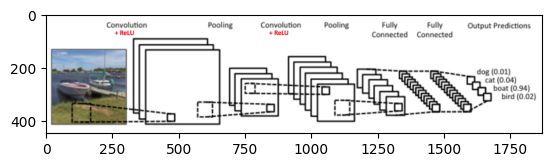

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('pic.jpg')
plt.imshow(img)

In [5]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision import datasets
#from logger import Logger

# 定义超参数
batch_size = 128
learning_rate = 1e-2
num_epoches = 20


def to_np(x):
    return x.cpu().data.numpy()


# 下载训练集 MNIST 手写数字训练集
train_dataset = datasets.MNIST(
    root='./data', train=True, transform=transforms.ToTensor(), download=True)

test_dataset = datasets.MNIST(
    root='./data', train=False, transform=transforms.ToTensor())

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


# 定义 Convolution Network 模型
class Cnn(nn.Module):
    def __init__(self, in_dim, n_class):
        super(Cnn, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_dim, 6, 3, stride=1, padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(6, 16, 5, stride=1, padding=0),
            nn.ReLU(True), nn.MaxPool2d(2, 2))

        self.fc = nn.Sequential(
            nn.Linear(400, 120), nn.Linear(120, 84), nn.Linear(84, n_class))

    def forward(self, x):
        out = self.conv(x)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out


model = Cnn(1, 10)  # 图片大小是28x28
use_gpu = torch.cuda.is_available()  # 判断是否有GPU加速
if use_gpu:
    model = model.cuda()
# 定义loss和optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
#logger = Logger('./logs')
# 开始训练
for epoch in range(num_epoches):
    print('epoch {}'.format(epoch + 1))
    print('*' * 10)
    running_loss = 0.0
    running_acc = 0.0
    for i, data in enumerate(train_loader, 1):
        img, label = data
        if use_gpu:
            img = img.cuda()
            label = label.cuda()
        img = Variable(img)
        label = Variable(label)
        # 向前传播
        out = model(img)
        loss = criterion(out, label)
        #running_loss += loss.data[0] * label.size(0)
        running_loss += loss.item() * label.size(0)
        _, pred = torch.max(out, 1)
        num_correct = (pred == label).sum()
        accuracy = (pred == label).float().mean()
        #running_acc += num_correct.data[0]
        running_acc += num_correct.item()
        # 向后传播
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # ========================= Log ======================
        step = epoch * len(train_loader) + i
        ## (1) Log the scalar values
        ##info = {'loss': loss.data[0], 'accuracy': accuracy.data[0]}
        #info = {'loss': loss.item(), 'accuracy': accuracy.item()}
        #
        #for tag, value in info.items():
        #    logger.scalar_summary(tag, value, step)
        #
        ## (2) Log values and gradients of the parameters (histogram)
        #for tag, value in model.named_parameters():
        #    tag = tag.replace('.', '/')
        #    logger.histo_summary(tag, to_np(value), step)
        #    logger.histo_summary(tag + '/grad', to_np(value.grad), step)
        #
        ## (3) Log the images
        #info = {'images': to_np(img.view(-1, 28, 28)[:10])}
        #
        #for tag, images in info.items():
        #    logger.image_summary(tag, images, step)
        if i % 300 == 0:
            print('[{}/{}] Loss: {:.6f}, Acc: {:.6f}'.format(
                 epoch + 1, num_epoches, running_loss / (batch_size * i),
                 running_acc / (batch_size * i)))
    print('Finish {} epoch, Loss: {:.6f}, Acc: {:.6f}'.format(
         epoch + 1, running_loss / (len(train_dataset)),
         running_acc / (len(train_dataset))))
    model.eval()
    eval_loss = 0
    eval_acc = 0
    for data in test_loader:
        img, label = data
        if use_gpu:
            img = Variable(img, volatile=True).cuda()
            label = Variable(label, volatile=True).cuda()
        else:
            img = Variable(img, volatile=True)
            label = Variable(label, volatile=True)
        out = model(img)
        loss = criterion(out, label)
        #eval_loss += loss.data[0] * label.size(0)
        eval_loss += loss.item() * label.size(0)
        _, pred = torch.max(out, 1)
        num_correct = (pred == label).sum()
        #eval_acc += num_correct.data[0]
        eval_acc += num_correct.item()
    print('Test Loss: {:.6f}, Acc: {:.6f}'.format(eval_loss / (len(test_dataset)), eval_acc / (len(test_dataset))))
    print()

# 保存模型
torch.save(model.state_dict(), './cnn.pth')

epoch 1
**********
[1/20] Loss: 2.249272, Acc: 0.269792
Finish 1 epoch, Loss: 2.011983, Acc: 0.408267


<ipython-input-5-96c9cc63232e>:123: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  img = Variable(img, volatile=True)
<ipython-input-5-96c9cc63232e>:124: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True)


Test Loss: 0.850189, Acc: 0.782400

epoch 2
**********
[2/20] Loss: 0.545011, Acc: 0.843151
Finish 2 epoch, Loss: 0.484901, Acc: 0.858983
Test Loss: 0.330157, Acc: 0.904200

epoch 3
**********
[3/20] Loss: 0.322349, Acc: 0.903255
Finish 3 epoch, Loss: 0.307566, Acc: 0.907617
Test Loss: 0.246741, Acc: 0.926600

epoch 4
**********
[4/20] Loss: 0.246795, Acc: 0.926120
Finish 4 epoch, Loss: 0.243224, Acc: 0.926867
Test Loss: 0.205145, Acc: 0.938100

epoch 5
**********
[5/20] Loss: 0.205582, Acc: 0.937917
Finish 5 epoch, Loss: 0.199600, Acc: 0.940000
Test Loss: 0.166090, Acc: 0.950500

epoch 6
**********
[6/20] Loss: 0.175157, Acc: 0.947578
Finish 6 epoch, Loss: 0.168913, Acc: 0.949550
Test Loss: 0.146114, Acc: 0.954200

epoch 7
**********
[7/20] Loss: 0.152729, Acc: 0.954219
Finish 7 epoch, Loss: 0.147389, Acc: 0.955333
Test Loss: 0.125620, Acc: 0.959000

epoch 8
**********
[8/20] Loss: 0.131099, Acc: 0.960026
Finish 8 epoch, Loss: 0.132978, Acc: 0.959483
Test Loss: 0.112988, Acc: 0.965300